# In this notebook, we will revise the classic Q-learning algorithm

<font color = green> Scenario:  </font>we have a set of actions a, states s and corresponding reward r(s,a) for the system. We play multiple episodes, each one has the form like this: <br>
- ep0: $$s_{0,0}, a_{0,0}, r_{0,0},s_{0,1}, a_{0,1}, r_{0,1},...,s_{0,N}, a_{0,N}, r_{0,N} $$
- ep2: $$s_{1,0}, a_{1,0}, r_{1,0},s_{1,1}, a_{1,1}, r_{1,1},...,s_{1,N}, a_{1,N}, r_{1,N} $$
... with the subscript refers to certain episodes for different states. <br>

**These actions do not need to follow any policy** <br>

<font color = red>**Basics function in RL** </font><br>
Q function (state-action value function):
$$ Q^{\pi}(s,a) = E[\sum_{t=0}^{\infty} \gamma^{t}r_{t} | s_{0} = s, a_{0} = a] $$
V function (state-value function):
$$ V^{\pi}(s) = E[\sum_{t=0}^{\infty} \gamma^{t}r_{t} | s_{0} = s] $$


In RL context, to estimate the Q value of each state-action, the Q learning algorithm is introduced (image from: http://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html)
<img src = "Q_learning.png"> 

**Other important concepts can be found more at**: http://rll.berkeley.edu/deeprlcoursesp17/#lectures


In [1]:
import gym
import numpy as np

## Visualization purpose
import helper
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import display

%matplotlib inline

In [2]:
env = gym.make('CartPole-v0')

[2017-10-03 16:47:55,071] Making new env: CartPole-v0


Number of step:  14



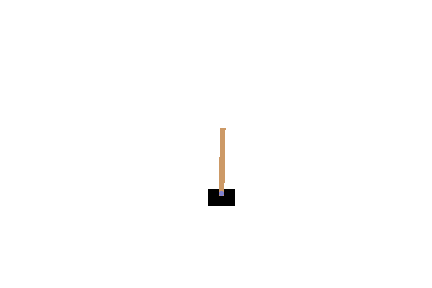
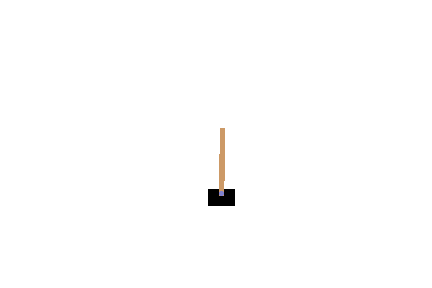
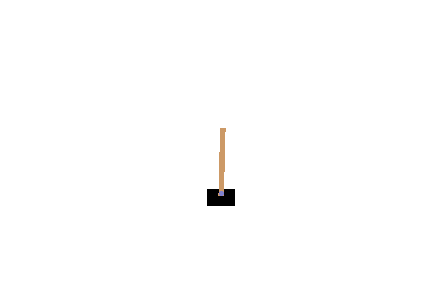
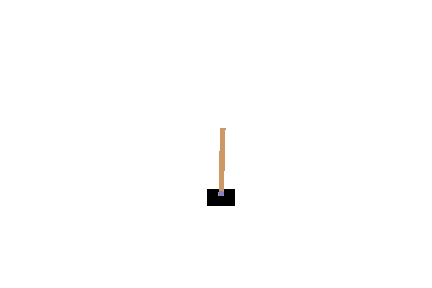
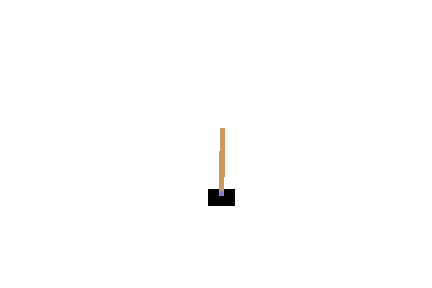
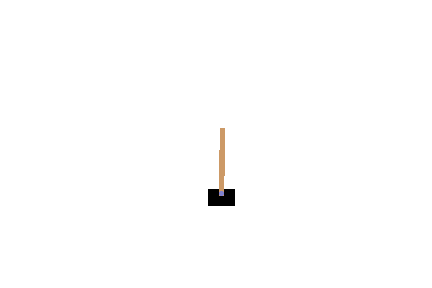
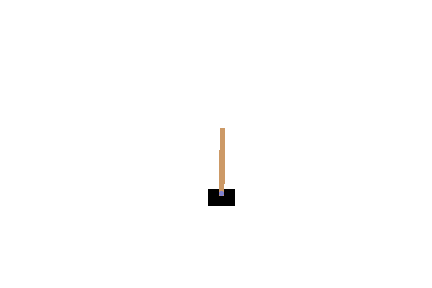
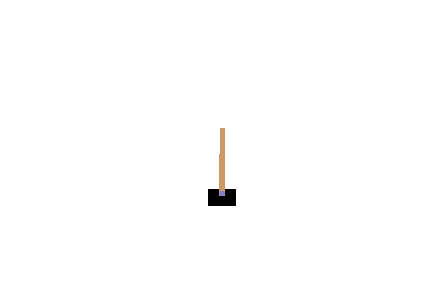
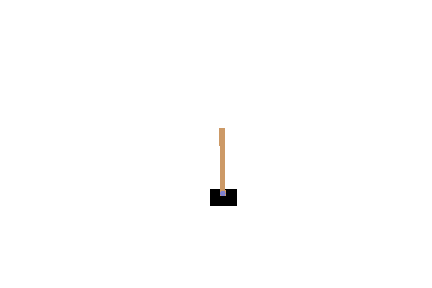
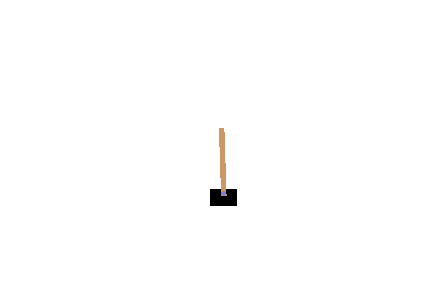
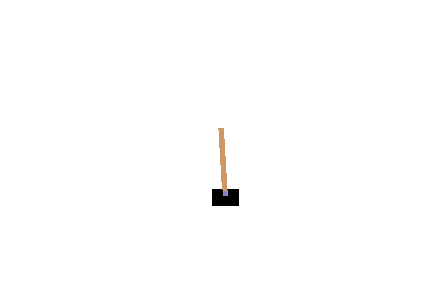
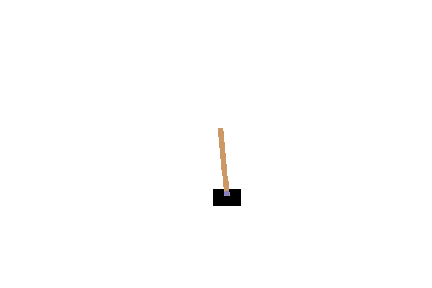
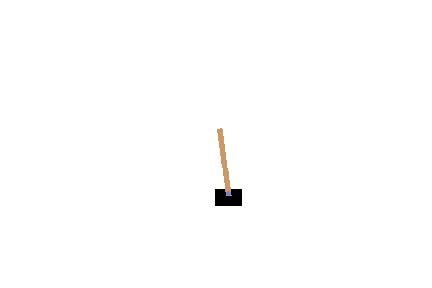
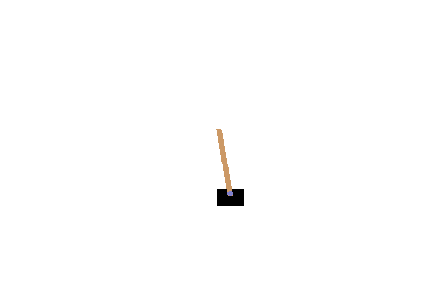
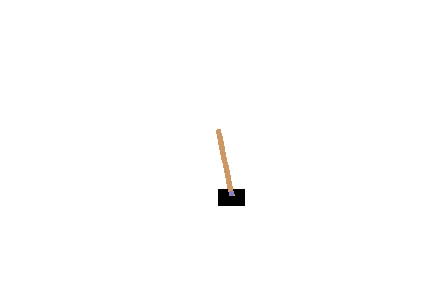

In [3]:
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print 'Number of step: ', t
        break
env.render(close=True)
helper.display_frames_as_gif(frames)  #<<< This one for Jupyter Notebook Display

In [4]:
'''From gym: "The episode ends when the pole is more than 15 degrees (0.261799 rad) from vertical
    , or the cart moves more than 2.4 units from the center."'''
'''What if we push over 1 side, what is the velocity?'''

#Want to find out possible maximum velocity
max_vx = 0
max_v_angle = 0  
for i in range(1000):
    done = False
    env.reset()
    while not done:
        obser, reward, done,info = env.step(1)
        #print obser
        if (np.abs(obser[1]) > max_vx):
            max_vx = np.abs(obser[1])
        if (np.abs(obser[3]) > max_v_angle):
            max_v_angle = np.abs(obser[3])
print 'Maximum horizontal speed: ', max_vx
print 'Maximum angular speed: ', max_v_angle

Maximum horizontal speed:  2.1957579472
Maximum angular speed:  3.33186405971


Horizontal speed < 2.5 units, Angular velocy absolute value < 3.5 <br>
Our grid would be as follows <br>
position:             [-2.5, 2.5] <br>
velocity:             [-2.5, 2.5] <br>
angle:                [-.27, .27] <br>
angular veclocity:    [-3.5, 3.5] <br>


In [5]:
position_bins = np.linspace(-2.5,2.5,9)
velo_bins = np.linspace(-2.5,2.5,9)
angular_bins = np.linspace(-0.27,0.27,9)
ang_velo_bins = np.linspace(-3.5,3.5,9)

In [6]:
#These function from: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/rl2/cartpole/q_learning_bins.py, best ones ever
#Best for creating bins

# build_state([1,2,3,4,5]) -> 12345 --- These lines are so wonderful man
def build_state(features):
    return int("".join(map(lambda feature: str(int(feature)), features)))

def to_bin(value, bins):
    return np.digitize(x=[value], bins=bins)[0]

In [7]:
# Q(s,a), where s is 4 dimension, a is a integer value (0,1)
# It is necessary to create a table & initialize the value for each bins
num_states = 10**(env.observation_space.shape[0])
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))
print Q_table

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 ..., 
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [8]:
def transform(states):
    cart_pos, cart_vel, pole_angle, pole_vel = states
    return build_state([
      to_bin(cart_pos, position_bins),
      to_bin(cart_vel, velo_bins),
      to_bin(pole_angle, angular_bins),
      to_bin(pole_vel, ang_velo_bins)])

In [9]:
s = env.reset()
print s
print transform(s)
print np.argmax(Q_table[transform(s)])
print np.max(Q_table[transform(s)])

[-0.02033153 -0.02427397  0.04338041  0.00171377]
4455
0
0.0


In [10]:
alpha = 0.1
gamma = 0.95
for i in range (20000): # We play 1000 episodes
    done = False
    s = env.reset()
    time = 0 #keep track how long
    total_reward = 0
    while not done:
        state_number = transform(s)
        action = np.argmax(Q_table[state_number]) # Whatever it can be, because Q learning is an off-policy learning algorithms
        s_landed, reward, done,info = env.step(action)
        time = time + 1
        if done and time < 199:
            reward = -321
        Q_table[transform(s), action] = Q_table[transform(s), action] + alpha* (reward + gamma*(np.max(Q_table[transform(s_landed)])) - Q_table[transform(s), action])
        s = s_landed
        total_reward += reward
    print 'Finish episode #', i, 'time is: ', time, 'reward is: ', total_reward

Finish episode # 0 time is:  10 reward is:  -312.0
Finish episode # 1 time is:  9 reward is:  -313.0
Finish episode # 2 time is:  10 reward is:  -312.0
Finish episode # 3 time is:  10 reward is:  -312.0
Finish episode # 4 time is:  9 reward is:  -313.0
Finish episode # 5 time is:  9 reward is:  -313.0
Finish episode # 6 time is:  10 reward is:  -312.0
Finish episode # 7 time is:  11 reward is:  -311.0
Finish episode # 8 time is:  12 reward is:  -310.0
Finish episode # 9 time is:  11 reward is:  -311.0
Finish episode # 10 time is:  11 reward is:  -311.0
Finish episode # 11 time is:  12 reward is:  -310.0
Finish episode # 12 time is:  12 reward is:  -310.0
Finish episode # 13 time is:  10 reward is:  -312.0
Finish episode # 14 time is:  11 reward is:  -311.0
Finish episode # 15 time is:  11 reward is:  -311.0
Finish episode # 16 time is:  11 reward is:  -311.0
Finish episode # 17 time is:  10 reward is:  -312.0
Finish episode # 18 time is:  11 reward is:  -311.0
Finish episode # 19 time 

Finish episode # 157 time is:  115 reward is:  -207.0
Finish episode # 158 time is:  102 reward is:  -220.0
Finish episode # 159 time is:  110 reward is:  -212.0
Finish episode # 160 time is:  104 reward is:  -218.0
Finish episode # 161 time is:  118 reward is:  -204.0
Finish episode # 162 time is:  112 reward is:  -210.0
Finish episode # 163 time is:  116 reward is:  -206.0
Finish episode # 164 time is:  109 reward is:  -213.0
Finish episode # 165 time is:  104 reward is:  -218.0
Finish episode # 166 time is:  103 reward is:  -219.0
Finish episode # 167 time is:  106 reward is:  -216.0
Finish episode # 168 time is:  92 reward is:  -230.0
Finish episode # 169 time is:  109 reward is:  -213.0
Finish episode # 170 time is:  119 reward is:  -203.0
Finish episode # 171 time is:  114 reward is:  -208.0
Finish episode # 172 time is:  97 reward is:  -225.0
Finish episode # 173 time is:  154 reward is:  -168.0
Finish episode # 174 time is:  107 reward is:  -215.0
Finish episode # 175 time is: 

Finish episode # 313 time is:  105 reward is:  -217.0
Finish episode # 314 time is:  120 reward is:  -202.0
Finish episode # 315 time is:  109 reward is:  -213.0
Finish episode # 316 time is:  104 reward is:  -218.0
Finish episode # 317 time is:  111 reward is:  -211.0
Finish episode # 318 time is:  120 reward is:  -202.0
Finish episode # 319 time is:  106 reward is:  -216.0
Finish episode # 320 time is:  106 reward is:  -216.0
Finish episode # 321 time is:  114 reward is:  -208.0
Finish episode # 322 time is:  123 reward is:  -199.0
Finish episode # 323 time is:  121 reward is:  -201.0
Finish episode # 324 time is:  123 reward is:  -199.0
Finish episode # 325 time is:  161 reward is:  -161.0
Finish episode # 326 time is:  119 reward is:  -203.0
Finish episode # 327 time is:  100 reward is:  -222.0
Finish episode # 328 time is:  117 reward is:  -205.0
Finish episode # 329 time is:  122 reward is:  -200.0
Finish episode # 330 time is:  105 reward is:  -217.0
Finish episode # 331 time is

Finish episode # 465 time is:  149 reward is:  -173.0
Finish episode # 466 time is:  118 reward is:  -204.0
Finish episode # 467 time is:  121 reward is:  -201.0
Finish episode # 468 time is:  102 reward is:  -220.0
Finish episode # 469 time is:  131 reward is:  -191.0
Finish episode # 470 time is:  109 reward is:  -213.0
Finish episode # 471 time is:  118 reward is:  -204.0
Finish episode # 472 time is:  99 reward is:  -223.0
Finish episode # 473 time is:  110 reward is:  -212.0
Finish episode # 474 time is:  97 reward is:  -225.0
Finish episode # 475 time is:  150 reward is:  -172.0
Finish episode # 476 time is:  117 reward is:  -205.0
Finish episode # 477 time is:  114 reward is:  -208.0
Finish episode # 478 time is:  123 reward is:  -199.0
Finish episode # 479 time is:  113 reward is:  -209.0
Finish episode # 480 time is:  104 reward is:  -218.0
Finish episode # 481 time is:  118 reward is:  -204.0
Finish episode # 482 time is:  165 reward is:  -157.0
Finish episode # 483 time is: 

Finish episode # 618 time is:  115 reward is:  -207.0
Finish episode # 619 time is:  149 reward is:  -173.0
Finish episode # 620 time is:  93 reward is:  -229.0
Finish episode # 621 time is:  104 reward is:  -218.0
Finish episode # 622 time is:  114 reward is:  -208.0
Finish episode # 623 time is:  113 reward is:  -209.0
Finish episode # 624 time is:  118 reward is:  -204.0
Finish episode # 625 time is:  105 reward is:  -217.0
Finish episode # 626 time is:  156 reward is:  -166.0
Finish episode # 627 time is:  92 reward is:  -230.0
Finish episode # 628 time is:  97 reward is:  -225.0
Finish episode # 629 time is:  110 reward is:  -212.0
Finish episode # 630 time is:  107 reward is:  -215.0
Finish episode # 631 time is:  105 reward is:  -217.0
Finish episode # 632 time is:  91 reward is:  -231.0
Finish episode # 633 time is:  115 reward is:  -207.0
Finish episode # 634 time is:  112 reward is:  -210.0
Finish episode # 635 time is:  92 reward is:  -230.0
Finish episode # 636 time is:  88

Finish episode # 778 time is:  99 reward is:  -223.0
Finish episode # 779 time is:  100 reward is:  -222.0
Finish episode # 780 time is:  107 reward is:  -215.0
Finish episode # 781 time is:  108 reward is:  -214.0
Finish episode # 782 time is:  109 reward is:  -213.0
Finish episode # 783 time is:  90 reward is:  -232.0
Finish episode # 784 time is:  105 reward is:  -217.0
Finish episode # 785 time is:  104 reward is:  -218.0
Finish episode # 786 time is:  109 reward is:  -213.0
Finish episode # 787 time is:  90 reward is:  -232.0
Finish episode # 788 time is:  110 reward is:  -212.0
Finish episode # 789 time is:  107 reward is:  -215.0
Finish episode # 790 time is:  142 reward is:  -180.0
Finish episode # 791 time is:  115 reward is:  -207.0
Finish episode # 792 time is:  100 reward is:  -222.0
Finish episode # 793 time is:  100 reward is:  -222.0
Finish episode # 794 time is:  104 reward is:  -218.0
Finish episode # 795 time is:  115 reward is:  -207.0
Finish episode # 796 time is:  

Finish episode # 937 time is:  121 reward is:  -201.0
Finish episode # 938 time is:  109 reward is:  -213.0
Finish episode # 939 time is:  117 reward is:  -205.0
Finish episode # 940 time is:  107 reward is:  -215.0
Finish episode # 941 time is:  142 reward is:  -180.0
Finish episode # 942 time is:  103 reward is:  -219.0
Finish episode # 943 time is:  129 reward is:  -193.0
Finish episode # 944 time is:  128 reward is:  -194.0
Finish episode # 945 time is:  168 reward is:  -154.0
Finish episode # 946 time is:  132 reward is:  -190.0
Finish episode # 947 time is:  89 reward is:  -233.0
Finish episode # 948 time is:  126 reward is:  -196.0
Finish episode # 949 time is:  86 reward is:  -236.0
Finish episode # 950 time is:  127 reward is:  -195.0
Finish episode # 951 time is:  91 reward is:  -231.0
Finish episode # 952 time is:  124 reward is:  -198.0
Finish episode # 953 time is:  111 reward is:  -211.0
Finish episode # 954 time is:  146 reward is:  -176.0
Finish episode # 955 time is:  

Finish episode # 1095 time is:  91 reward is:  -231.0
Finish episode # 1096 time is:  95 reward is:  -227.0
Finish episode # 1097 time is:  93 reward is:  -229.0
Finish episode # 1098 time is:  109 reward is:  -213.0
Finish episode # 1099 time is:  105 reward is:  -217.0
Finish episode # 1100 time is:  94 reward is:  -228.0
Finish episode # 1101 time is:  94 reward is:  -228.0
Finish episode # 1102 time is:  96 reward is:  -226.0
Finish episode # 1103 time is:  172 reward is:  -150.0
Finish episode # 1104 time is:  106 reward is:  -216.0
Finish episode # 1105 time is:  90 reward is:  -232.0
Finish episode # 1106 time is:  96 reward is:  -226.0
Finish episode # 1107 time is:  167 reward is:  -155.0
Finish episode # 1108 time is:  136 reward is:  -186.0
Finish episode # 1109 time is:  116 reward is:  -206.0
Finish episode # 1110 time is:  113 reward is:  -209.0
Finish episode # 1111 time is:  106 reward is:  -216.0
Finish episode # 1112 time is:  115 reward is:  -207.0
Finish episode # 1

Finish episode # 1250 time is:  122 reward is:  -200.0
Finish episode # 1251 time is:  98 reward is:  -224.0
Finish episode # 1252 time is:  140 reward is:  -182.0
Finish episode # 1253 time is:  113 reward is:  -209.0
Finish episode # 1254 time is:  131 reward is:  -191.0
Finish episode # 1255 time is:  126 reward is:  -196.0
Finish episode # 1256 time is:  157 reward is:  -165.0
Finish episode # 1257 time is:  104 reward is:  -218.0
Finish episode # 1258 time is:  106 reward is:  -216.0
Finish episode # 1259 time is:  131 reward is:  -191.0
Finish episode # 1260 time is:  106 reward is:  -216.0
Finish episode # 1261 time is:  95 reward is:  -227.0
Finish episode # 1262 time is:  115 reward is:  -207.0
Finish episode # 1263 time is:  116 reward is:  -206.0
Finish episode # 1264 time is:  113 reward is:  -209.0
Finish episode # 1265 time is:  115 reward is:  -207.0
Finish episode # 1266 time is:  136 reward is:  -186.0
Finish episode # 1267 time is:  103 reward is:  -219.0
Finish episo

Finish episode # 1411 time is:  124 reward is:  -198.0
Finish episode # 1412 time is:  94 reward is:  -228.0
Finish episode # 1413 time is:  130 reward is:  -192.0
Finish episode # 1414 time is:  105 reward is:  -217.0
Finish episode # 1415 time is:  100 reward is:  -222.0
Finish episode # 1416 time is:  84 reward is:  -238.0
Finish episode # 1417 time is:  117 reward is:  -205.0
Finish episode # 1418 time is:  125 reward is:  -197.0
Finish episode # 1419 time is:  118 reward is:  -204.0
Finish episode # 1420 time is:  117 reward is:  -205.0
Finish episode # 1421 time is:  142 reward is:  -180.0
Finish episode # 1422 time is:  121 reward is:  -201.0
Finish episode # 1423 time is:  135 reward is:  -187.0
Finish episode # 1424 time is:  138 reward is:  -184.0
Finish episode # 1425 time is:  134 reward is:  -188.0
Finish episode # 1426 time is:  126 reward is:  -196.0
Finish episode # 1427 time is:  109 reward is:  -213.0
Finish episode # 1428 time is:  107 reward is:  -215.0
Finish episo

Finish episode # 1570 time is:  126 reward is:  -196.0
Finish episode # 1571 time is:  152 reward is:  -170.0
Finish episode # 1572 time is:  151 reward is:  -171.0
Finish episode # 1573 time is:  117 reward is:  -205.0
Finish episode # 1574 time is:  151 reward is:  -171.0
Finish episode # 1575 time is:  114 reward is:  -208.0
Finish episode # 1576 time is:  125 reward is:  -197.0
Finish episode # 1577 time is:  125 reward is:  -197.0
Finish episode # 1578 time is:  122 reward is:  -200.0
Finish episode # 1579 time is:  112 reward is:  -210.0
Finish episode # 1580 time is:  165 reward is:  -157.0
Finish episode # 1581 time is:  126 reward is:  -196.0
Finish episode # 1582 time is:  107 reward is:  -215.0
Finish episode # 1583 time is:  112 reward is:  -210.0
Finish episode # 1584 time is:  80 reward is:  -242.0
Finish episode # 1585 time is:  118 reward is:  -204.0
Finish episode # 1586 time is:  132 reward is:  -190.0
Finish episode # 1587 time is:  128 reward is:  -194.0
Finish epis

Finish episode # 1734 time is:  118 reward is:  -204.0
Finish episode # 1735 time is:  105 reward is:  -217.0
Finish episode # 1736 time is:  118 reward is:  -204.0
Finish episode # 1737 time is:  127 reward is:  -195.0
Finish episode # 1738 time is:  115 reward is:  -207.0
Finish episode # 1739 time is:  118 reward is:  -204.0
Finish episode # 1740 time is:  137 reward is:  -185.0
Finish episode # 1741 time is:  129 reward is:  -193.0
Finish episode # 1742 time is:  118 reward is:  -204.0
Finish episode # 1743 time is:  164 reward is:  -158.0
Finish episode # 1744 time is:  132 reward is:  -190.0
Finish episode # 1745 time is:  99 reward is:  -223.0
Finish episode # 1746 time is:  140 reward is:  -182.0
Finish episode # 1747 time is:  97 reward is:  -225.0
Finish episode # 1748 time is:  135 reward is:  -187.0
Finish episode # 1749 time is:  117 reward is:  -205.0
Finish episode # 1750 time is:  117 reward is:  -205.0
Finish episode # 1751 time is:  102 reward is:  -220.0
Finish episo

Finish episode # 1889 time is:  109 reward is:  -213.0
Finish episode # 1890 time is:  132 reward is:  -190.0
Finish episode # 1891 time is:  92 reward is:  -230.0
Finish episode # 1892 time is:  117 reward is:  -205.0
Finish episode # 1893 time is:  106 reward is:  -216.0
Finish episode # 1894 time is:  100 reward is:  -222.0
Finish episode # 1895 time is:  109 reward is:  -213.0
Finish episode # 1896 time is:  90 reward is:  -232.0
Finish episode # 1897 time is:  90 reward is:  -232.0
Finish episode # 1898 time is:  118 reward is:  -204.0
Finish episode # 1899 time is:  84 reward is:  -238.0
Finish episode # 1900 time is:  129 reward is:  -193.0
Finish episode # 1901 time is:  93 reward is:  -229.0
Finish episode # 1902 time is:  114 reward is:  -208.0
Finish episode # 1903 time is:  103 reward is:  -219.0
Finish episode # 1904 time is:  99 reward is:  -223.0
Finish episode # 1905 time is:  84 reward is:  -238.0
Finish episode # 1906 time is:  138 reward is:  -184.0
Finish episode # 

Finish episode # 2048 time is:  131 reward is:  -191.0
Finish episode # 2049 time is:  108 reward is:  -214.0
Finish episode # 2050 time is:  117 reward is:  -205.0
Finish episode # 2051 time is:  137 reward is:  -185.0
Finish episode # 2052 time is:  174 reward is:  -148.0
Finish episode # 2053 time is:  110 reward is:  -212.0
Finish episode # 2054 time is:  116 reward is:  -206.0
Finish episode # 2055 time is:  116 reward is:  -206.0
Finish episode # 2056 time is:  111 reward is:  -211.0
Finish episode # 2057 time is:  121 reward is:  -201.0
Finish episode # 2058 time is:  115 reward is:  -207.0
Finish episode # 2059 time is:  120 reward is:  -202.0
Finish episode # 2060 time is:  174 reward is:  -148.0
Finish episode # 2061 time is:  131 reward is:  -191.0
Finish episode # 2062 time is:  138 reward is:  -184.0
Finish episode # 2063 time is:  141 reward is:  -181.0
Finish episode # 2064 time is:  113 reward is:  -209.0
Finish episode # 2065 time is:  134 reward is:  -188.0
Finish epi

Finish episode # 2206 time is:  127 reward is:  -195.0
Finish episode # 2207 time is:  199 reward is:  199.0
Finish episode # 2208 time is:  133 reward is:  -189.0
Finish episode # 2209 time is:  122 reward is:  -200.0
Finish episode # 2210 time is:  111 reward is:  -211.0
Finish episode # 2211 time is:  137 reward is:  -185.0
Finish episode # 2212 time is:  114 reward is:  -208.0
Finish episode # 2213 time is:  137 reward is:  -185.0
Finish episode # 2214 time is:  152 reward is:  -170.0
Finish episode # 2215 time is:  114 reward is:  -208.0
Finish episode # 2216 time is:  164 reward is:  -158.0
Finish episode # 2217 time is:  110 reward is:  -212.0
Finish episode # 2218 time is:  125 reward is:  -197.0
Finish episode # 2219 time is:  140 reward is:  -182.0
Finish episode # 2220 time is:  118 reward is:  -204.0
Finish episode # 2221 time is:  148 reward is:  -174.0
Finish episode # 2222 time is:  127 reward is:  -195.0
Finish episode # 2223 time is:  118 reward is:  -204.0
Finish epis

Finish episode # 2359 time is:  104 reward is:  -218.0
Finish episode # 2360 time is:  96 reward is:  -226.0
Finish episode # 2361 time is:  108 reward is:  -214.0
Finish episode # 2362 time is:  113 reward is:  -209.0
Finish episode # 2363 time is:  101 reward is:  -221.0
Finish episode # 2364 time is:  148 reward is:  -174.0
Finish episode # 2365 time is:  119 reward is:  -203.0
Finish episode # 2366 time is:  121 reward is:  -201.0
Finish episode # 2367 time is:  123 reward is:  -199.0
Finish episode # 2368 time is:  71 reward is:  -251.0
Finish episode # 2369 time is:  77 reward is:  -245.0
Finish episode # 2370 time is:  78 reward is:  -244.0
Finish episode # 2371 time is:  125 reward is:  -197.0
Finish episode # 2372 time is:  75 reward is:  -247.0
Finish episode # 2373 time is:  120 reward is:  -202.0
Finish episode # 2374 time is:  76 reward is:  -246.0
Finish episode # 2375 time is:  111 reward is:  -211.0
Finish episode # 2376 time is:  72 reward is:  -250.0
Finish episode # 

Finish episode # 2516 time is:  153 reward is:  -169.0
Finish episode # 2517 time is:  176 reward is:  -146.0
Finish episode # 2518 time is:  200 reward is:  200.0
Finish episode # 2519 time is:  119 reward is:  -203.0
Finish episode # 2520 time is:  172 reward is:  -150.0
Finish episode # 2521 time is:  120 reward is:  -202.0
Finish episode # 2522 time is:  125 reward is:  -197.0
Finish episode # 2523 time is:  127 reward is:  -195.0
Finish episode # 2524 time is:  132 reward is:  -190.0
Finish episode # 2525 time is:  139 reward is:  -183.0
Finish episode # 2526 time is:  129 reward is:  -193.0
Finish episode # 2527 time is:  86 reward is:  -236.0
Finish episode # 2528 time is:  65 reward is:  -257.0
Finish episode # 2529 time is:  174 reward is:  -148.0
Finish episode # 2530 time is:  158 reward is:  -164.0
Finish episode # 2531 time is:  77 reward is:  -245.0
Finish episode # 2532 time is:  129 reward is:  -193.0
Finish episode # 2533 time is:  200 reward is:  200.0
Finish episode 

Finish episode # 2667 time is:  141 reward is:  -181.0
Finish episode # 2668 time is:  191 reward is:  -131.0
Finish episode # 2669 time is:  145 reward is:  -177.0
Finish episode # 2670 time is:  108 reward is:  -214.0
Finish episode # 2671 time is:  95 reward is:  -227.0
Finish episode # 2672 time is:  85 reward is:  -237.0
Finish episode # 2673 time is:  93 reward is:  -229.0
Finish episode # 2674 time is:  118 reward is:  -204.0
Finish episode # 2675 time is:  147 reward is:  -175.0
Finish episode # 2676 time is:  170 reward is:  -152.0
Finish episode # 2677 time is:  200 reward is:  200.0
Finish episode # 2678 time is:  158 reward is:  -164.0
Finish episode # 2679 time is:  129 reward is:  -193.0
Finish episode # 2680 time is:  180 reward is:  -142.0
Finish episode # 2681 time is:  174 reward is:  -148.0
Finish episode # 2682 time is:  134 reward is:  -188.0
Finish episode # 2683 time is:  200 reward is:  200.0
Finish episode # 2684 time is:  117 reward is:  -205.0
Finish episode 

Finish episode # 2824 time is:  196 reward is:  -126.0
Finish episode # 2825 time is:  171 reward is:  -151.0
Finish episode # 2826 time is:  147 reward is:  -175.0
Finish episode # 2827 time is:  160 reward is:  -162.0
Finish episode # 2828 time is:  200 reward is:  200.0
Finish episode # 2829 time is:  176 reward is:  -146.0
Finish episode # 2830 time is:  200 reward is:  200.0
Finish episode # 2831 time is:  200 reward is:  200.0
Finish episode # 2832 time is:  152 reward is:  -170.0
Finish episode # 2833 time is:  141 reward is:  -181.0
Finish episode # 2834 time is:  183 reward is:  -139.0
Finish episode # 2835 time is:  148 reward is:  -174.0
Finish episode # 2836 time is:  142 reward is:  -180.0
Finish episode # 2837 time is:  189 reward is:  -133.0
Finish episode # 2838 time is:  165 reward is:  -157.0
Finish episode # 2839 time is:  162 reward is:  -160.0
Finish episode # 2840 time is:  166 reward is:  -156.0
Finish episode # 2841 time is:  178 reward is:  -144.0
Finish episod

Finish episode # 2984 time is:  200 reward is:  200.0
Finish episode # 2985 time is:  136 reward is:  -186.0
Finish episode # 2986 time is:  200 reward is:  200.0
Finish episode # 2987 time is:  156 reward is:  -166.0
Finish episode # 2988 time is:  200 reward is:  200.0
Finish episode # 2989 time is:  166 reward is:  -156.0
Finish episode # 2990 time is:  200 reward is:  200.0
Finish episode # 2991 time is:  200 reward is:  200.0
Finish episode # 2992 time is:  110 reward is:  -212.0
Finish episode # 2993 time is:  200 reward is:  200.0
Finish episode # 2994 time is:  200 reward is:  200.0
Finish episode # 2995 time is:  200 reward is:  200.0
Finish episode # 2996 time is:  126 reward is:  -196.0
Finish episode # 2997 time is:  200 reward is:  200.0
Finish episode # 2998 time is:  135 reward is:  -187.0
Finish episode # 2999 time is:  169 reward is:  -153.0
Finish episode # 3000 time is:  200 reward is:  200.0
Finish episode # 3001 time is:  160 reward is:  -162.0
Finish episode # 300

Finish episode # 3135 time is:  200 reward is:  200.0
Finish episode # 3136 time is:  162 reward is:  -160.0
Finish episode # 3137 time is:  131 reward is:  -191.0
Finish episode # 3138 time is:  200 reward is:  200.0
Finish episode # 3139 time is:  88 reward is:  -234.0
Finish episode # 3140 time is:  126 reward is:  -196.0
Finish episode # 3141 time is:  139 reward is:  -183.0
Finish episode # 3142 time is:  124 reward is:  -198.0
Finish episode # 3143 time is:  200 reward is:  200.0
Finish episode # 3144 time is:  147 reward is:  -175.0
Finish episode # 3145 time is:  200 reward is:  200.0
Finish episode # 3146 time is:  137 reward is:  -185.0
Finish episode # 3147 time is:  200 reward is:  200.0
Finish episode # 3148 time is:  200 reward is:  200.0
Finish episode # 3149 time is:  168 reward is:  -154.0
Finish episode # 3150 time is:  200 reward is:  200.0
Finish episode # 3151 time is:  200 reward is:  200.0
Finish episode # 3152 time is:  200 reward is:  200.0
Finish episode # 315

Finish episode # 3290 time is:  200 reward is:  200.0
Finish episode # 3291 time is:  146 reward is:  -176.0
Finish episode # 3292 time is:  196 reward is:  -126.0
Finish episode # 3293 time is:  200 reward is:  200.0
Finish episode # 3294 time is:  198 reward is:  -124.0
Finish episode # 3295 time is:  200 reward is:  200.0
Finish episode # 3296 time is:  200 reward is:  200.0
Finish episode # 3297 time is:  159 reward is:  -163.0
Finish episode # 3298 time is:  200 reward is:  200.0
Finish episode # 3299 time is:  118 reward is:  -204.0
Finish episode # 3300 time is:  125 reward is:  -197.0
Finish episode # 3301 time is:  200 reward is:  200.0
Finish episode # 3302 time is:  140 reward is:  -182.0
Finish episode # 3303 time is:  200 reward is:  200.0
Finish episode # 3304 time is:  168 reward is:  -154.0
Finish episode # 3305 time is:  128 reward is:  -194.0
Finish episode # 3306 time is:  138 reward is:  -184.0
Finish episode # 3307 time is:  179 reward is:  -143.0
Finish episode # 

Finish episode # 3444 time is:  200 reward is:  200.0
Finish episode # 3445 time is:  90 reward is:  -232.0
Finish episode # 3446 time is:  200 reward is:  200.0
Finish episode # 3447 time is:  200 reward is:  200.0
Finish episode # 3448 time is:  200 reward is:  200.0
Finish episode # 3449 time is:  185 reward is:  -137.0
Finish episode # 3450 time is:  200 reward is:  200.0
Finish episode # 3451 time is:  200 reward is:  200.0
Finish episode # 3452 time is:  200 reward is:  200.0
Finish episode # 3453 time is:  154 reward is:  -168.0
Finish episode # 3454 time is:  183 reward is:  -139.0
Finish episode # 3455 time is:  200 reward is:  200.0
Finish episode # 3456 time is:  160 reward is:  -162.0
Finish episode # 3457 time is:  174 reward is:  -148.0
Finish episode # 3458 time is:  200 reward is:  200.0
Finish episode # 3459 time is:  124 reward is:  -198.0
Finish episode # 3460 time is:  200 reward is:  200.0
Finish episode # 3461 time is:  200 reward is:  200.0
Finish episode # 3462 

Finish episode # 3599 time is:  200 reward is:  200.0
Finish episode # 3600 time is:  200 reward is:  200.0
Finish episode # 3601 time is:  133 reward is:  -189.0
Finish episode # 3602 time is:  200 reward is:  200.0
Finish episode # 3603 time is:  88 reward is:  -234.0
Finish episode # 3604 time is:  129 reward is:  -193.0
Finish episode # 3605 time is:  200 reward is:  200.0
Finish episode # 3606 time is:  200 reward is:  200.0
Finish episode # 3607 time is:  200 reward is:  200.0
Finish episode # 3608 time is:  129 reward is:  -193.0
Finish episode # 3609 time is:  200 reward is:  200.0
Finish episode # 3610 time is:  200 reward is:  200.0
Finish episode # 3611 time is:  200 reward is:  200.0
Finish episode # 3612 time is:  200 reward is:  200.0
Finish episode # 3613 time is:  200 reward is:  200.0
Finish episode # 3614 time is:  200 reward is:  200.0
Finish episode # 3615 time is:  200 reward is:  200.0
Finish episode # 3616 time is:  200 reward is:  200.0
Finish episode # 3617 tim

Finish episode # 3760 time is:  200 reward is:  200.0
Finish episode # 3761 time is:  171 reward is:  -151.0
Finish episode # 3762 time is:  200 reward is:  200.0
Finish episode # 3763 time is:  200 reward is:  200.0
Finish episode # 3764 time is:  127 reward is:  -195.0
Finish episode # 3765 time is:  135 reward is:  -187.0
Finish episode # 3766 time is:  200 reward is:  200.0
Finish episode # 3767 time is:  200 reward is:  200.0
Finish episode # 3768 time is:  200 reward is:  200.0
Finish episode # 3769 time is:  200 reward is:  200.0
Finish episode # 3770 time is:  150 reward is:  -172.0
Finish episode # 3771 time is:  200 reward is:  200.0
Finish episode # 3772 time is:  200 reward is:  200.0
Finish episode # 3773 time is:  117 reward is:  -205.0
Finish episode # 3774 time is:  114 reward is:  -208.0
Finish episode # 3775 time is:  200 reward is:  200.0
Finish episode # 3776 time is:  200 reward is:  200.0
Finish episode # 3777 time is:  200 reward is:  200.0
Finish episode # 3778 

Finish episode # 3917 time is:  200 reward is:  200.0
Finish episode # 3918 time is:  142 reward is:  -180.0
Finish episode # 3919 time is:  200 reward is:  200.0
Finish episode # 3920 time is:  200 reward is:  200.0
Finish episode # 3921 time is:  200 reward is:  200.0
Finish episode # 3922 time is:  200 reward is:  200.0
Finish episode # 3923 time is:  122 reward is:  -200.0
Finish episode # 3924 time is:  200 reward is:  200.0
Finish episode # 3925 time is:  200 reward is:  200.0
Finish episode # 3926 time is:  200 reward is:  200.0
Finish episode # 3927 time is:  200 reward is:  200.0
Finish episode # 3928 time is:  200 reward is:  200.0
Finish episode # 3929 time is:  200 reward is:  200.0
Finish episode # 3930 time is:  200 reward is:  200.0
Finish episode # 3931 time is:  146 reward is:  -176.0
Finish episode # 3932 time is:  200 reward is:  200.0
Finish episode # 3933 time is:  200 reward is:  200.0
Finish episode # 3934 time is:  200 reward is:  200.0
Finish episode # 3935 tim

Finish episode # 4072 time is:  200 reward is:  200.0
Finish episode # 4073 time is:  200 reward is:  200.0
Finish episode # 4074 time is:  200 reward is:  200.0
Finish episode # 4075 time is:  150 reward is:  -172.0
Finish episode # 4076 time is:  200 reward is:  200.0
Finish episode # 4077 time is:  200 reward is:  200.0
Finish episode # 4078 time is:  200 reward is:  200.0
Finish episode # 4079 time is:  148 reward is:  -174.0
Finish episode # 4080 time is:  200 reward is:  200.0
Finish episode # 4081 time is:  200 reward is:  200.0
Finish episode # 4082 time is:  200 reward is:  200.0
Finish episode # 4083 time is:  135 reward is:  -187.0
Finish episode # 4084 time is:  200 reward is:  200.0
Finish episode # 4085 time is:  200 reward is:  200.0
Finish episode # 4086 time is:  200 reward is:  200.0
Finish episode # 4087 time is:  200 reward is:  200.0
Finish episode # 4088 time is:  200 reward is:  200.0
Finish episode # 4089 time is:  200 reward is:  200.0
Finish episode # 4090 tim

Finish episode # 4230 time is:  200 reward is:  200.0
Finish episode # 4231 time is:  200 reward is:  200.0
Finish episode # 4232 time is:  200 reward is:  200.0
Finish episode # 4233 time is:  200 reward is:  200.0
Finish episode # 4234 time is:  200 reward is:  200.0
Finish episode # 4235 time is:  200 reward is:  200.0
Finish episode # 4236 time is:  200 reward is:  200.0
Finish episode # 4237 time is:  200 reward is:  200.0
Finish episode # 4238 time is:  200 reward is:  200.0
Finish episode # 4239 time is:  200 reward is:  200.0
Finish episode # 4240 time is:  200 reward is:  200.0
Finish episode # 4241 time is:  200 reward is:  200.0
Finish episode # 4242 time is:  200 reward is:  200.0
Finish episode # 4243 time is:  200 reward is:  200.0
Finish episode # 4244 time is:  200 reward is:  200.0
Finish episode # 4245 time is:  116 reward is:  -206.0
Finish episode # 4246 time is:  200 reward is:  200.0
Finish episode # 4247 time is:  200 reward is:  200.0
Finish episode # 4248 time 

Finish episode # 4386 time is:  200 reward is:  200.0
Finish episode # 4387 time is:  165 reward is:  -157.0
Finish episode # 4388 time is:  200 reward is:  200.0
Finish episode # 4389 time is:  200 reward is:  200.0
Finish episode # 4390 time is:  133 reward is:  -189.0
Finish episode # 4391 time is:  200 reward is:  200.0
Finish episode # 4392 time is:  200 reward is:  200.0
Finish episode # 4393 time is:  160 reward is:  -162.0
Finish episode # 4394 time is:  163 reward is:  -159.0
Finish episode # 4395 time is:  200 reward is:  200.0
Finish episode # 4396 time is:  200 reward is:  200.0
Finish episode # 4397 time is:  200 reward is:  200.0
Finish episode # 4398 time is:  140 reward is:  -182.0
Finish episode # 4399 time is:  200 reward is:  200.0
Finish episode # 4400 time is:  200 reward is:  200.0
Finish episode # 4401 time is:  200 reward is:  200.0
Finish episode # 4402 time is:  140 reward is:  -182.0
Finish episode # 4403 time is:  200 reward is:  200.0
Finish episode # 4404 

Finish episode # 4541 time is:  200 reward is:  200.0
Finish episode # 4542 time is:  200 reward is:  200.0
Finish episode # 4543 time is:  200 reward is:  200.0
Finish episode # 4544 time is:  138 reward is:  -184.0
Finish episode # 4545 time is:  200 reward is:  200.0
Finish episode # 4546 time is:  156 reward is:  -166.0
Finish episode # 4547 time is:  200 reward is:  200.0
Finish episode # 4548 time is:  200 reward is:  200.0
Finish episode # 4549 time is:  172 reward is:  -150.0
Finish episode # 4550 time is:  200 reward is:  200.0
Finish episode # 4551 time is:  200 reward is:  200.0
Finish episode # 4552 time is:  200 reward is:  200.0
Finish episode # 4553 time is:  200 reward is:  200.0
Finish episode # 4554 time is:  200 reward is:  200.0
Finish episode # 4555 time is:  200 reward is:  200.0
Finish episode # 4556 time is:  200 reward is:  200.0
Finish episode # 4557 time is:  200 reward is:  200.0
Finish episode # 4558 time is:  200 reward is:  200.0
Finish episode # 4559 tim

Finish episode # 4694 time is:  200 reward is:  200.0
Finish episode # 4695 time is:  200 reward is:  200.0
Finish episode # 4696 time is:  200 reward is:  200.0
Finish episode # 4697 time is:  200 reward is:  200.0
Finish episode # 4698 time is:  148 reward is:  -174.0
Finish episode # 4699 time is:  200 reward is:  200.0
Finish episode # 4700 time is:  200 reward is:  200.0
Finish episode # 4701 time is:  200 reward is:  200.0
Finish episode # 4702 time is:  200 reward is:  200.0
Finish episode # 4703 time is:  200 reward is:  200.0
Finish episode # 4704 time is:  153 reward is:  -169.0
Finish episode # 4705 time is:  200 reward is:  200.0
Finish episode # 4706 time is:  200 reward is:  200.0
Finish episode # 4707 time is:  200 reward is:  200.0
Finish episode # 4708 time is:  141 reward is:  -181.0
Finish episode # 4709 time is:  162 reward is:  -160.0
Finish episode # 4710 time is:  144 reward is:  -178.0
Finish episode # 4711 time is:  146 reward is:  -176.0
Finish episode # 4712 

Finish episode # 4854 time is:  150 reward is:  -172.0
Finish episode # 4855 time is:  200 reward is:  200.0
Finish episode # 4856 time is:  187 reward is:  -135.0
Finish episode # 4857 time is:  166 reward is:  -156.0
Finish episode # 4858 time is:  200 reward is:  200.0
Finish episode # 4859 time is:  157 reward is:  -165.0
Finish episode # 4860 time is:  200 reward is:  200.0
Finish episode # 4861 time is:  167 reward is:  -155.0
Finish episode # 4862 time is:  171 reward is:  -151.0
Finish episode # 4863 time is:  196 reward is:  -126.0
Finish episode # 4864 time is:  200 reward is:  200.0
Finish episode # 4865 time is:  169 reward is:  -153.0
Finish episode # 4866 time is:  200 reward is:  200.0
Finish episode # 4867 time is:  179 reward is:  -143.0
Finish episode # 4868 time is:  174 reward is:  -148.0
Finish episode # 4869 time is:  159 reward is:  -163.0
Finish episode # 4870 time is:  158 reward is:  -164.0
Finish episode # 4871 time is:  133 reward is:  -189.0
Finish episode 

Finish episode # 5013 time is:  200 reward is:  200.0
Finish episode # 5014 time is:  168 reward is:  -154.0
Finish episode # 5015 time is:  200 reward is:  200.0
Finish episode # 5016 time is:  148 reward is:  -174.0
Finish episode # 5017 time is:  200 reward is:  200.0
Finish episode # 5018 time is:  174 reward is:  -148.0
Finish episode # 5019 time is:  173 reward is:  -149.0
Finish episode # 5020 time is:  200 reward is:  200.0
Finish episode # 5021 time is:  200 reward is:  200.0
Finish episode # 5022 time is:  134 reward is:  -188.0
Finish episode # 5023 time is:  200 reward is:  200.0
Finish episode # 5024 time is:  200 reward is:  200.0
Finish episode # 5025 time is:  200 reward is:  200.0
Finish episode # 5026 time is:  139 reward is:  -183.0
Finish episode # 5027 time is:  158 reward is:  -164.0
Finish episode # 5028 time is:  200 reward is:  200.0
Finish episode # 5029 time is:  162 reward is:  -160.0
Finish episode # 5030 time is:  200 reward is:  200.0
Finish episode # 503

Finish episode # 5165 time is:  200 reward is:  200.0
Finish episode # 5166 time is:  200 reward is:  200.0
Finish episode # 5167 time is:  200 reward is:  200.0
Finish episode # 5168 time is:  157 reward is:  -165.0
Finish episode # 5169 time is:  200 reward is:  200.0
Finish episode # 5170 time is:  200 reward is:  200.0
Finish episode # 5171 time is:  181 reward is:  -141.0
Finish episode # 5172 time is:  143 reward is:  -179.0
Finish episode # 5173 time is:  179 reward is:  -143.0
Finish episode # 5174 time is:  200 reward is:  200.0
Finish episode # 5175 time is:  140 reward is:  -182.0
Finish episode # 5176 time is:  145 reward is:  -177.0
Finish episode # 5177 time is:  200 reward is:  200.0
Finish episode # 5178 time is:  131 reward is:  -191.0
Finish episode # 5179 time is:  178 reward is:  -144.0
Finish episode # 5180 time is:  170 reward is:  -152.0
Finish episode # 5181 time is:  200 reward is:  200.0
Finish episode # 5182 time is:  144 reward is:  -178.0
Finish episode # 5

Finish episode # 5472 time is:  182 reward is:  -140.0
Finish episode # 5473 time is:  166 reward is:  -156.0
Finish episode # 5474 time is:  200 reward is:  200.0
Finish episode # 5475 time is:  200 reward is:  200.0
Finish episode # 5476 time is:  200 reward is:  200.0
Finish episode # 5477 time is:  200 reward is:  200.0
Finish episode # 5478 time is:  200 reward is:  200.0
Finish episode # 5479 time is:  200 reward is:  200.0
Finish episode # 5480 time is:  200 reward is:  200.0
Finish episode # 5481 time is:  200 reward is:  200.0
Finish episode # 5482 time is:  200 reward is:  200.0
Finish episode # 5483 time is:  142 reward is:  -180.0
Finish episode # 5484 time is:  200 reward is:  200.0
Finish episode # 5485 time is:  200 reward is:  200.0
Finish episode # 5486 time is:  200 reward is:  200.0
Finish episode # 5487 time is:  200 reward is:  200.0
Finish episode # 5488 time is:  200 reward is:  200.0
Finish episode # 5489 time is:  200 reward is:  200.0
Finish episode # 5490 tim

Finish episode # 5626 time is:  200 reward is:  200.0
Finish episode # 5627 time is:  200 reward is:  200.0
Finish episode # 5628 time is:  200 reward is:  200.0
Finish episode # 5629 time is:  200 reward is:  200.0
Finish episode # 5630 time is:  200 reward is:  200.0
Finish episode # 5631 time is:  200 reward is:  200.0
Finish episode # 5632 time is:  146 reward is:  -176.0
Finish episode # 5633 time is:  122 reward is:  -200.0
Finish episode # 5634 time is:  200 reward is:  200.0
Finish episode # 5635 time is:  200 reward is:  200.0
Finish episode # 5636 time is:  200 reward is:  200.0
Finish episode # 5637 time is:  200 reward is:  200.0
Finish episode # 5638 time is:  200 reward is:  200.0
Finish episode # 5639 time is:  200 reward is:  200.0
Finish episode # 5640 time is:  200 reward is:  200.0
Finish episode # 5641 time is:  200 reward is:  200.0
Finish episode # 5642 time is:  200 reward is:  200.0
Finish episode # 5643 time is:  200 reward is:  200.0
Finish episode # 5644 time

Finish episode # 5785 time is:  200 reward is:  200.0
Finish episode # 5786 time is:  200 reward is:  200.0
Finish episode # 5787 time is:  200 reward is:  200.0
Finish episode # 5788 time is:  135 reward is:  -187.0
Finish episode # 5789 time is:  200 reward is:  200.0
Finish episode # 5790 time is:  200 reward is:  200.0
Finish episode # 5791 time is:  163 reward is:  -159.0
Finish episode # 5792 time is:  200 reward is:  200.0
Finish episode # 5793 time is:  200 reward is:  200.0
Finish episode # 5794 time is:  200 reward is:  200.0
Finish episode # 5795 time is:  200 reward is:  200.0
Finish episode # 5796 time is:  154 reward is:  -168.0
Finish episode # 5797 time is:  143 reward is:  -179.0
Finish episode # 5798 time is:  200 reward is:  200.0
Finish episode # 5799 time is:  200 reward is:  200.0
Finish episode # 5800 time is:  200 reward is:  200.0
Finish episode # 5801 time is:  200 reward is:  200.0
Finish episode # 5802 time is:  200 reward is:  200.0
Finish episode # 5803 ti

Finish episode # 5943 time is:  200 reward is:  200.0
Finish episode # 5944 time is:  200 reward is:  200.0
Finish episode # 5945 time is:  200 reward is:  200.0
Finish episode # 5946 time is:  200 reward is:  200.0
Finish episode # 5947 time is:  200 reward is:  200.0
Finish episode # 5948 time is:  200 reward is:  200.0
Finish episode # 5949 time is:  200 reward is:  200.0
Finish episode # 5950 time is:  200 reward is:  200.0
Finish episode # 5951 time is:  200 reward is:  200.0
Finish episode # 5952 time is:  200 reward is:  200.0
Finish episode # 5953 time is:  200 reward is:  200.0
Finish episode # 5954 time is:  200 reward is:  200.0
Finish episode # 5955 time is:  135 reward is:  -187.0
Finish episode # 5956 time is:  200 reward is:  200.0
Finish episode # 5957 time is:  200 reward is:  200.0
Finish episode # 5958 time is:  141 reward is:  -181.0
Finish episode # 5959 time is:  200 reward is:  200.0
Finish episode # 5960 time is:  200 reward is:  200.0
Finish episode # 5961 time

Finish episode # 6097 time is:  200 reward is:  200.0
Finish episode # 6098 time is:  200 reward is:  200.0
Finish episode # 6099 time is:  200 reward is:  200.0
Finish episode # 6100 time is:  149 reward is:  -173.0
Finish episode # 6101 time is:  200 reward is:  200.0
Finish episode # 6102 time is:  200 reward is:  200.0
Finish episode # 6103 time is:  200 reward is:  200.0
Finish episode # 6104 time is:  200 reward is:  200.0
Finish episode # 6105 time is:  200 reward is:  200.0
Finish episode # 6106 time is:  200 reward is:  200.0
Finish episode # 6107 time is:  200 reward is:  200.0
Finish episode # 6108 time is:  200 reward is:  200.0
Finish episode # 6109 time is:  200 reward is:  200.0
Finish episode # 6110 time is:  200 reward is:  200.0
Finish episode # 6111 time is:  200 reward is:  200.0
Finish episode # 6112 time is:  200 reward is:  200.0
Finish episode # 6113 time is:  200 reward is:  200.0
Finish episode # 6114 time is:  200 reward is:  200.0
Finish episode # 6115 time 

Finish episode # 6258 time is:  200 reward is:  200.0
Finish episode # 6259 time is:  148 reward is:  -174.0
Finish episode # 6260 time is:  200 reward is:  200.0
Finish episode # 6261 time is:  200 reward is:  200.0
Finish episode # 6262 time is:  200 reward is:  200.0
Finish episode # 6263 time is:  131 reward is:  -191.0
Finish episode # 6264 time is:  200 reward is:  200.0
Finish episode # 6265 time is:  200 reward is:  200.0
Finish episode # 6266 time is:  200 reward is:  200.0
Finish episode # 6267 time is:  200 reward is:  200.0
Finish episode # 6268 time is:  200 reward is:  200.0
Finish episode # 6269 time is:  200 reward is:  200.0
Finish episode # 6270 time is:  130 reward is:  -192.0
Finish episode # 6271 time is:  200 reward is:  200.0
Finish episode # 6272 time is:  200 reward is:  200.0
Finish episode # 6273 time is:  200 reward is:  200.0
Finish episode # 6274 time is:  200 reward is:  200.0
Finish episode # 6275 time is:  200 reward is:  200.0
Finish episode # 6276 tim

Finish episode # 6571 time is:  200 reward is:  200.0
Finish episode # 6572 time is:  200 reward is:  200.0
Finish episode # 6573 time is:  200 reward is:  200.0
Finish episode # 6574 time is:  200 reward is:  200.0
Finish episode # 6575 time is:  200 reward is:  200.0
Finish episode # 6576 time is:  200 reward is:  200.0
Finish episode # 6577 time is:  200 reward is:  200.0
Finish episode # 6578 time is:  151 reward is:  -171.0
Finish episode # 6579 time is:  156 reward is:  -166.0
Finish episode # 6580 time is:  200 reward is:  200.0
Finish episode # 6581 time is:  200 reward is:  200.0
Finish episode # 6582 time is:  200 reward is:  200.0
Finish episode # 6583 time is:  200 reward is:  200.0
Finish episode # 6584 time is:  200 reward is:  200.0
Finish episode # 6585 time is:  166 reward is:  -156.0
Finish episode # 6586 time is:  200 reward is:  200.0
Finish episode # 6587 time is:  153 reward is:  -169.0
Finish episode # 6588 time is:  143 reward is:  -179.0
Finish episode # 6589 t

Finish episode # 6724 time is:  200 reward is:  200.0
Finish episode # 6725 time is:  200 reward is:  200.0
Finish episode # 6726 time is:  132 reward is:  -190.0
Finish episode # 6727 time is:  141 reward is:  -181.0
Finish episode # 6728 time is:  200 reward is:  200.0
Finish episode # 6729 time is:  200 reward is:  200.0
Finish episode # 6730 time is:  200 reward is:  200.0
Finish episode # 6731 time is:  200 reward is:  200.0
Finish episode # 6732 time is:  200 reward is:  200.0
Finish episode # 6733 time is:  200 reward is:  200.0
Finish episode # 6734 time is:  200 reward is:  200.0
Finish episode # 6735 time is:  200 reward is:  200.0
Finish episode # 6736 time is:  200 reward is:  200.0
Finish episode # 6737 time is:  200 reward is:  200.0
Finish episode # 6738 time is:  200 reward is:  200.0
Finish episode # 6739 time is:  200 reward is:  200.0
Finish episode # 6740 time is:  200 reward is:  200.0
Finish episode # 6741 time is:  200 reward is:  200.0
Finish episode # 6742 time

Finish episode # 6883 time is:  200 reward is:  200.0
Finish episode # 6884 time is:  142 reward is:  -180.0
Finish episode # 6885 time is:  200 reward is:  200.0
Finish episode # 6886 time is:  200 reward is:  200.0
Finish episode # 6887 time is:  200 reward is:  200.0
Finish episode # 6888 time is:  200 reward is:  200.0
Finish episode # 6889 time is:  200 reward is:  200.0
Finish episode # 6890 time is:  200 reward is:  200.0
Finish episode # 6891 time is:  200 reward is:  200.0
Finish episode # 6892 time is:  200 reward is:  200.0
Finish episode # 6893 time is:  200 reward is:  200.0
Finish episode # 6894 time is:  200 reward is:  200.0
Finish episode # 6895 time is:  200 reward is:  200.0
Finish episode # 6896 time is:  200 reward is:  200.0
Finish episode # 6897 time is:  200 reward is:  200.0
Finish episode # 6898 time is:  200 reward is:  200.0
Finish episode # 6899 time is:  163 reward is:  -159.0
Finish episode # 6900 time is:  200 reward is:  200.0
Finish episode # 6901 time

Finish episode # 7038 time is:  200 reward is:  200.0
Finish episode # 7039 time is:  200 reward is:  200.0
Finish episode # 7040 time is:  200 reward is:  200.0
Finish episode # 7041 time is:  200 reward is:  200.0
Finish episode # 7042 time is:  134 reward is:  -188.0
Finish episode # 7043 time is:  200 reward is:  200.0
Finish episode # 7044 time is:  200 reward is:  200.0
Finish episode # 7045 time is:  200 reward is:  200.0
Finish episode # 7046 time is:  200 reward is:  200.0
Finish episode # 7047 time is:  140 reward is:  -182.0
Finish episode # 7048 time is:  200 reward is:  200.0
Finish episode # 7049 time is:  200 reward is:  200.0
Finish episode # 7050 time is:  200 reward is:  200.0
Finish episode # 7051 time is:  200 reward is:  200.0
Finish episode # 7052 time is:  200 reward is:  200.0
Finish episode # 7053 time is:  200 reward is:  200.0
Finish episode # 7054 time is:  200 reward is:  200.0
Finish episode # 7055 time is:  200 reward is:  200.0
Finish episode # 7056 time

Finish episode # 7200 time is:  200 reward is:  200.0
Finish episode # 7201 time is:  200 reward is:  200.0
Finish episode # 7202 time is:  200 reward is:  200.0
Finish episode # 7203 time is:  200 reward is:  200.0
Finish episode # 7204 time is:  200 reward is:  200.0
Finish episode # 7205 time is:  200 reward is:  200.0
Finish episode # 7206 time is:  123 reward is:  -199.0
Finish episode # 7207 time is:  200 reward is:  200.0
Finish episode # 7208 time is:  200 reward is:  200.0
Finish episode # 7209 time is:  200 reward is:  200.0
Finish episode # 7210 time is:  200 reward is:  200.0
Finish episode # 7211 time is:  200 reward is:  200.0
Finish episode # 7212 time is:  200 reward is:  200.0
Finish episode # 7213 time is:  200 reward is:  200.0
Finish episode # 7214 time is:  200 reward is:  200.0
Finish episode # 7215 time is:  200 reward is:  200.0
Finish episode # 7216 time is:  200 reward is:  200.0
Finish episode # 7217 time is:  200 reward is:  200.0
Finish episode # 7218 time 

Finish episode # 7360 time is:  124 reward is:  -198.0
Finish episode # 7361 time is:  200 reward is:  200.0
Finish episode # 7362 time is:  200 reward is:  200.0
Finish episode # 7363 time is:  200 reward is:  200.0
Finish episode # 7364 time is:  200 reward is:  200.0
Finish episode # 7365 time is:  200 reward is:  200.0
Finish episode # 7366 time is:  200 reward is:  200.0
Finish episode # 7367 time is:  148 reward is:  -174.0
Finish episode # 7368 time is:  200 reward is:  200.0
Finish episode # 7369 time is:  200 reward is:  200.0
Finish episode # 7370 time is:  200 reward is:  200.0
Finish episode # 7371 time is:  200 reward is:  200.0
Finish episode # 7372 time is:  200 reward is:  200.0
Finish episode # 7373 time is:  200 reward is:  200.0
Finish episode # 7374 time is:  143 reward is:  -179.0
Finish episode # 7375 time is:  200 reward is:  200.0
Finish episode # 7376 time is:  200 reward is:  200.0
Finish episode # 7377 time is:  200 reward is:  200.0
Finish episode # 7378 tim

Finish episode # 7520 time is:  200 reward is:  200.0
Finish episode # 7521 time is:  200 reward is:  200.0
Finish episode # 7522 time is:  200 reward is:  200.0
Finish episode # 7523 time is:  200 reward is:  200.0
Finish episode # 7524 time is:  200 reward is:  200.0
Finish episode # 7525 time is:  200 reward is:  200.0
Finish episode # 7526 time is:  200 reward is:  200.0
Finish episode # 7527 time is:  200 reward is:  200.0
Finish episode # 7528 time is:  200 reward is:  200.0
Finish episode # 7529 time is:  200 reward is:  200.0
Finish episode # 7530 time is:  200 reward is:  200.0
Finish episode # 7531 time is:  200 reward is:  200.0
Finish episode # 7532 time is:  200 reward is:  200.0
Finish episode # 7533 time is:  200 reward is:  200.0
Finish episode # 7534 time is:  200 reward is:  200.0
Finish episode # 7535 time is:  200 reward is:  200.0
Finish episode # 7536 time is:  200 reward is:  200.0
Finish episode # 7537 time is:  200 reward is:  200.0
Finish episode # 7538 time i

Finish episode # 7681 time is:  200 reward is:  200.0
Finish episode # 7682 time is:  200 reward is:  200.0
Finish episode # 7683 time is:  200 reward is:  200.0
Finish episode # 7684 time is:  200 reward is:  200.0
Finish episode # 7685 time is:  200 reward is:  200.0
Finish episode # 7686 time is:  143 reward is:  -179.0
Finish episode # 7687 time is:  200 reward is:  200.0
Finish episode # 7688 time is:  200 reward is:  200.0
Finish episode # 7689 time is:  200 reward is:  200.0
Finish episode # 7690 time is:  200 reward is:  200.0
Finish episode # 7691 time is:  200 reward is:  200.0
Finish episode # 7692 time is:  200 reward is:  200.0
Finish episode # 7693 time is:  200 reward is:  200.0
Finish episode # 7694 time is:  200 reward is:  200.0
Finish episode # 7695 time is:  200 reward is:  200.0
Finish episode # 7696 time is:  200 reward is:  200.0
Finish episode # 7697 time is:  135 reward is:  -187.0
Finish episode # 7698 time is:  200 reward is:  200.0
Finish episode # 7699 time

Finish episode # 7834 time is:  200 reward is:  200.0
Finish episode # 7835 time is:  200 reward is:  200.0
Finish episode # 7836 time is:  200 reward is:  200.0
Finish episode # 7837 time is:  200 reward is:  200.0
Finish episode # 7838 time is:  200 reward is:  200.0
Finish episode # 7839 time is:  200 reward is:  200.0
Finish episode # 7840 time is:  200 reward is:  200.0
Finish episode # 7841 time is:  200 reward is:  200.0
Finish episode # 7842 time is:  200 reward is:  200.0
Finish episode # 7843 time is:  200 reward is:  200.0
Finish episode # 7844 time is:  200 reward is:  200.0
Finish episode # 7845 time is:  200 reward is:  200.0
Finish episode # 7846 time is:  200 reward is:  200.0
Finish episode # 7847 time is:  200 reward is:  200.0
Finish episode # 7848 time is:  200 reward is:  200.0
Finish episode # 7849 time is:  200 reward is:  200.0
Finish episode # 7850 time is:  200 reward is:  200.0
Finish episode # 7851 time is:  182 reward is:  -140.0
Finish episode # 7852 time 

Finish episode # 8145 time is:  200 reward is:  200.0
Finish episode # 8146 time is:  200 reward is:  200.0
Finish episode # 8147 time is:  200 reward is:  200.0
Finish episode # 8148 time is:  200 reward is:  200.0
Finish episode # 8149 time is:  200 reward is:  200.0
Finish episode # 8150 time is:  200 reward is:  200.0
Finish episode # 8151 time is:  200 reward is:  200.0
Finish episode # 8152 time is:  200 reward is:  200.0
Finish episode # 8153 time is:  200 reward is:  200.0
Finish episode # 8154 time is:  200 reward is:  200.0
Finish episode # 8155 time is:  200 reward is:  200.0
Finish episode # 8156 time is:  200 reward is:  200.0
Finish episode # 8157 time is:  200 reward is:  200.0
Finish episode # 8158 time is:  200 reward is:  200.0
Finish episode # 8159 time is:  200 reward is:  200.0
Finish episode # 8160 time is:  200 reward is:  200.0
Finish episode # 8161 time is:  200 reward is:  200.0
Finish episode # 8162 time is:  200 reward is:  200.0
Finish episode # 8163 time i

Finish episode # 8302 time is:  200 reward is:  200.0
Finish episode # 8303 time is:  114 reward is:  -208.0
Finish episode # 8304 time is:  200 reward is:  200.0
Finish episode # 8305 time is:  124 reward is:  -198.0
Finish episode # 8306 time is:  200 reward is:  200.0
Finish episode # 8307 time is:  200 reward is:  200.0
Finish episode # 8308 time is:  200 reward is:  200.0
Finish episode # 8309 time is:  200 reward is:  200.0
Finish episode # 8310 time is:  128 reward is:  -194.0
Finish episode # 8311 time is:  138 reward is:  -184.0
Finish episode # 8312 time is:  129 reward is:  -193.0
Finish episode # 8313 time is:  151 reward is:  -171.0
Finish episode # 8314 time is:  200 reward is:  200.0
Finish episode # 8315 time is:  200 reward is:  200.0
Finish episode # 8316 time is:  200 reward is:  200.0
Finish episode # 8317 time is:  200 reward is:  200.0
Finish episode # 8318 time is:  200 reward is:  200.0
Finish episode # 8319 time is:  200 reward is:  200.0
Finish episode # 8320 

Finish episode # 8458 time is:  200 reward is:  200.0
Finish episode # 8459 time is:  200 reward is:  200.0
Finish episode # 8460 time is:  200 reward is:  200.0
Finish episode # 8461 time is:  200 reward is:  200.0
Finish episode # 8462 time is:  200 reward is:  200.0
Finish episode # 8463 time is:  200 reward is:  200.0
Finish episode # 8464 time is:  200 reward is:  200.0
Finish episode # 8465 time is:  200 reward is:  200.0
Finish episode # 8466 time is:  200 reward is:  200.0
Finish episode # 8467 time is:  200 reward is:  200.0
Finish episode # 8468 time is:  200 reward is:  200.0
Finish episode # 8469 time is:  200 reward is:  200.0
Finish episode # 8470 time is:  200 reward is:  200.0
Finish episode # 8471 time is:  200 reward is:  200.0
Finish episode # 8472 time is:  200 reward is:  200.0
Finish episode # 8473 time is:  200 reward is:  200.0
Finish episode # 8474 time is:  139 reward is:  -183.0
Finish episode # 8475 time is:  200 reward is:  200.0
Finish episode # 8476 time 

Finish episode # 8619 time is:  139 reward is:  -183.0
Finish episode # 8620 time is:  200 reward is:  200.0
Finish episode # 8621 time is:  200 reward is:  200.0
Finish episode # 8622 time is:  200 reward is:  200.0
Finish episode # 8623 time is:  200 reward is:  200.0
Finish episode # 8624 time is:  200 reward is:  200.0
Finish episode # 8625 time is:  200 reward is:  200.0
Finish episode # 8626 time is:  200 reward is:  200.0
Finish episode # 8627 time is:  200 reward is:  200.0
Finish episode # 8628 time is:  200 reward is:  200.0
Finish episode # 8629 time is:  200 reward is:  200.0
Finish episode # 8630 time is:  200 reward is:  200.0
Finish episode # 8631 time is:  200 reward is:  200.0
Finish episode # 8632 time is:  131 reward is:  -191.0
Finish episode # 8633 time is:  200 reward is:  200.0
Finish episode # 8634 time is:  200 reward is:  200.0
Finish episode # 8635 time is:  200 reward is:  200.0
Finish episode # 8636 time is:  200 reward is:  200.0
Finish episode # 8637 time

Finish episode # 8780 time is:  200 reward is:  200.0
Finish episode # 8781 time is:  170 reward is:  -152.0
Finish episode # 8782 time is:  200 reward is:  200.0
Finish episode # 8783 time is:  200 reward is:  200.0
Finish episode # 8784 time is:  200 reward is:  200.0
Finish episode # 8785 time is:  200 reward is:  200.0
Finish episode # 8786 time is:  200 reward is:  200.0
Finish episode # 8787 time is:  200 reward is:  200.0
Finish episode # 8788 time is:  200 reward is:  200.0
Finish episode # 8789 time is:  200 reward is:  200.0
Finish episode # 8790 time is:  200 reward is:  200.0
Finish episode # 8791 time is:  200 reward is:  200.0
Finish episode # 8792 time is:  200 reward is:  200.0
Finish episode # 8793 time is:  200 reward is:  200.0
Finish episode # 8794 time is:  200 reward is:  200.0
Finish episode # 8795 time is:  200 reward is:  200.0
Finish episode # 8796 time is:  200 reward is:  200.0
Finish episode # 8797 time is:  200 reward is:  200.0
Finish episode # 8798 time 

Finish episode # 8937 time is:  200 reward is:  200.0
Finish episode # 8938 time is:  200 reward is:  200.0
Finish episode # 8939 time is:  200 reward is:  200.0
Finish episode # 8940 time is:  200 reward is:  200.0
Finish episode # 8941 time is:  200 reward is:  200.0
Finish episode # 8942 time is:  200 reward is:  200.0
Finish episode # 8943 time is:  200 reward is:  200.0
Finish episode # 8944 time is:  200 reward is:  200.0
Finish episode # 8945 time is:  200 reward is:  200.0
Finish episode # 8946 time is:  200 reward is:  200.0
Finish episode # 8947 time is:  200 reward is:  200.0
Finish episode # 8948 time is:  200 reward is:  200.0
Finish episode # 8949 time is:  200 reward is:  200.0
Finish episode # 8950 time is:  200 reward is:  200.0
Finish episode # 8951 time is:  200 reward is:  200.0
Finish episode # 8952 time is:  200 reward is:  200.0
Finish episode # 8953 time is:  200 reward is:  200.0
Finish episode # 8954 time is:  200 reward is:  200.0
Finish episode # 8955 time i

Finish episode # 9093 time is:  200 reward is:  200.0
Finish episode # 9094 time is:  200 reward is:  200.0
Finish episode # 9095 time is:  200 reward is:  200.0
Finish episode # 9096 time is:  200 reward is:  200.0
Finish episode # 9097 time is:  200 reward is:  200.0
Finish episode # 9098 time is:  200 reward is:  200.0
Finish episode # 9099 time is:  200 reward is:  200.0
Finish episode # 9100 time is:  200 reward is:  200.0
Finish episode # 9101 time is:  136 reward is:  -186.0
Finish episode # 9102 time is:  200 reward is:  200.0
Finish episode # 9103 time is:  200 reward is:  200.0
Finish episode # 9104 time is:  136 reward is:  -186.0
Finish episode # 9105 time is:  200 reward is:  200.0
Finish episode # 9106 time is:  200 reward is:  200.0
Finish episode # 9107 time is:  200 reward is:  200.0
Finish episode # 9108 time is:  200 reward is:  200.0
Finish episode # 9109 time is:  139 reward is:  -183.0
Finish episode # 9110 time is:  200 reward is:  200.0
Finish episode # 9111 tim

Finish episode # 9253 time is:  200 reward is:  200.0
Finish episode # 9254 time is:  200 reward is:  200.0
Finish episode # 9255 time is:  200 reward is:  200.0
Finish episode # 9256 time is:  200 reward is:  200.0
Finish episode # 9257 time is:  200 reward is:  200.0
Finish episode # 9258 time is:  200 reward is:  200.0
Finish episode # 9259 time is:  123 reward is:  -199.0
Finish episode # 9260 time is:  200 reward is:  200.0
Finish episode # 9261 time is:  200 reward is:  200.0
Finish episode # 9262 time is:  200 reward is:  200.0
Finish episode # 9263 time is:  200 reward is:  200.0
Finish episode # 9264 time is:  200 reward is:  200.0
Finish episode # 9265 time is:  200 reward is:  200.0
Finish episode # 9266 time is:  200 reward is:  200.0
Finish episode # 9267 time is:  200 reward is:  200.0
Finish episode # 9268 time is:  200 reward is:  200.0
Finish episode # 9269 time is:  147 reward is:  -175.0
Finish episode # 9270 time is:  200 reward is:  200.0
Finish episode # 9271 time

Finish episode # 9413 time is:  200 reward is:  200.0
Finish episode # 9414 time is:  200 reward is:  200.0
Finish episode # 9415 time is:  200 reward is:  200.0
Finish episode # 9416 time is:  200 reward is:  200.0
Finish episode # 9417 time is:  200 reward is:  200.0
Finish episode # 9418 time is:  200 reward is:  200.0
Finish episode # 9419 time is:  163 reward is:  -159.0
Finish episode # 9420 time is:  200 reward is:  200.0
Finish episode # 9421 time is:  200 reward is:  200.0
Finish episode # 9422 time is:  200 reward is:  200.0
Finish episode # 9423 time is:  200 reward is:  200.0
Finish episode # 9424 time is:  200 reward is:  200.0
Finish episode # 9425 time is:  200 reward is:  200.0
Finish episode # 9426 time is:  200 reward is:  200.0
Finish episode # 9427 time is:  200 reward is:  200.0
Finish episode # 9428 time is:  200 reward is:  200.0
Finish episode # 9429 time is:  200 reward is:  200.0
Finish episode # 9430 time is:  200 reward is:  200.0
Finish episode # 9431 time 

Finish episode # 9573 time is:  200 reward is:  200.0
Finish episode # 9574 time is:  200 reward is:  200.0
Finish episode # 9575 time is:  200 reward is:  200.0
Finish episode # 9576 time is:  200 reward is:  200.0
Finish episode # 9577 time is:  200 reward is:  200.0
Finish episode # 9578 time is:  200 reward is:  200.0
Finish episode # 9579 time is:  200 reward is:  200.0
Finish episode # 9580 time is:  200 reward is:  200.0
Finish episode # 9581 time is:  145 reward is:  -177.0
Finish episode # 9582 time is:  200 reward is:  200.0
Finish episode # 9583 time is:  200 reward is:  200.0
Finish episode # 9584 time is:  200 reward is:  200.0
Finish episode # 9585 time is:  200 reward is:  200.0
Finish episode # 9586 time is:  143 reward is:  -179.0
Finish episode # 9587 time is:  200 reward is:  200.0
Finish episode # 9588 time is:  135 reward is:  -187.0
Finish episode # 9589 time is:  200 reward is:  200.0
Finish episode # 9590 time is:  200 reward is:  200.0
Finish episode # 9591 tim

Finish episode # 9725 time is:  200 reward is:  200.0
Finish episode # 9726 time is:  138 reward is:  -184.0
Finish episode # 9727 time is:  200 reward is:  200.0
Finish episode # 9728 time is:  200 reward is:  200.0
Finish episode # 9729 time is:  153 reward is:  -169.0
Finish episode # 9730 time is:  200 reward is:  200.0
Finish episode # 9731 time is:  200 reward is:  200.0
Finish episode # 9732 time is:  200 reward is:  200.0
Finish episode # 9733 time is:  200 reward is:  200.0
Finish episode # 9734 time is:  200 reward is:  200.0
Finish episode # 9735 time is:  200 reward is:  200.0
Finish episode # 9736 time is:  200 reward is:  200.0
Finish episode # 9737 time is:  151 reward is:  -171.0
Finish episode # 9738 time is:  200 reward is:  200.0
Finish episode # 9739 time is:  200 reward is:  200.0
Finish episode # 9740 time is:  200 reward is:  200.0
Finish episode # 9741 time is:  200 reward is:  200.0
Finish episode # 9742 time is:  162 reward is:  -160.0
Finish episode # 9743 ti

Finish episode # 9886 time is:  200 reward is:  200.0
Finish episode # 9887 time is:  200 reward is:  200.0
Finish episode # 9888 time is:  200 reward is:  200.0
Finish episode # 9889 time is:  200 reward is:  200.0
Finish episode # 9890 time is:  200 reward is:  200.0
Finish episode # 9891 time is:  200 reward is:  200.0
Finish episode # 9892 time is:  200 reward is:  200.0
Finish episode # 9893 time is:  200 reward is:  200.0
Finish episode # 9894 time is:  200 reward is:  200.0
Finish episode # 9895 time is:  200 reward is:  200.0
Finish episode # 9896 time is:  200 reward is:  200.0
Finish episode # 9897 time is:  200 reward is:  200.0
Finish episode # 9898 time is:  200 reward is:  200.0
Finish episode # 9899 time is:  200 reward is:  200.0
Finish episode # 9900 time is:  200 reward is:  200.0
Finish episode # 9901 time is:  200 reward is:  200.0
Finish episode # 9902 time is:  200 reward is:  200.0
Finish episode # 9903 time is:  200 reward is:  200.0
Finish episode # 9904 time i

Finish episode # 10046 time is:  200 reward is:  200.0
Finish episode # 10047 time is:  200 reward is:  200.0
Finish episode # 10048 time is:  200 reward is:  200.0
Finish episode # 10049 time is:  200 reward is:  200.0
Finish episode # 10050 time is:  200 reward is:  200.0
Finish episode # 10051 time is:  200 reward is:  200.0
Finish episode # 10052 time is:  200 reward is:  200.0
Finish episode # 10053 time is:  200 reward is:  200.0
Finish episode # 10054 time is:  200 reward is:  200.0
Finish episode # 10055 time is:  200 reward is:  200.0
Finish episode # 10056 time is:  200 reward is:  200.0
Finish episode # 10057 time is:  200 reward is:  200.0
Finish episode # 10058 time is:  200 reward is:  200.0
Finish episode # 10059 time is:  200 reward is:  200.0
Finish episode # 10060 time is:  200 reward is:  200.0
Finish episode # 10061 time is:  200 reward is:  200.0
Finish episode # 10062 time is:  200 reward is:  200.0
Finish episode # 10063 time is:  200 reward is:  200.0
Finish epi

Finish episode # 10206 time is:  200 reward is:  200.0
Finish episode # 10207 time is:  200 reward is:  200.0
Finish episode # 10208 time is:  198 reward is:  -124.0
Finish episode # 10209 time is:  200 reward is:  200.0
Finish episode # 10210 time is:  200 reward is:  200.0
Finish episode # 10211 time is:  200 reward is:  200.0
Finish episode # 10212 time is:  200 reward is:  200.0
Finish episode # 10213 time is:  137 reward is:  -185.0
Finish episode # 10214 time is:  200 reward is:  200.0
Finish episode # 10215 time is:  200 reward is:  200.0
Finish episode # 10216 time is:  200 reward is:  200.0
Finish episode # 10217 time is:  200 reward is:  200.0
Finish episode # 10218 time is:  200 reward is:  200.0
Finish episode # 10219 time is:  200 reward is:  200.0
Finish episode # 10220 time is:  200 reward is:  200.0
Finish episode # 10221 time is:  200 reward is:  200.0
Finish episode # 10222 time is:  155 reward is:  -167.0
Finish episode # 10223 time is:  200 reward is:  200.0
Finish 

Finish episode # 10363 time is:  200 reward is:  200.0
Finish episode # 10364 time is:  200 reward is:  200.0
Finish episode # 10365 time is:  200 reward is:  200.0
Finish episode # 10366 time is:  200 reward is:  200.0
Finish episode # 10367 time is:  200 reward is:  200.0
Finish episode # 10368 time is:  200 reward is:  200.0
Finish episode # 10369 time is:  200 reward is:  200.0
Finish episode # 10370 time is:  180 reward is:  -142.0
Finish episode # 10371 time is:  200 reward is:  200.0
Finish episode # 10372 time is:  200 reward is:  200.0
Finish episode # 10373 time is:  200 reward is:  200.0
Finish episode # 10374 time is:  200 reward is:  200.0
Finish episode # 10375 time is:  200 reward is:  200.0
Finish episode # 10376 time is:  200 reward is:  200.0
Finish episode # 10377 time is:  200 reward is:  200.0
Finish episode # 10378 time is:  200 reward is:  200.0
Finish episode # 10379 time is:  200 reward is:  200.0
Finish episode # 10380 time is:  200 reward is:  200.0
Finish ep

Finish episode # 10513 time is:  200 reward is:  200.0
Finish episode # 10514 time is:  200 reward is:  200.0
Finish episode # 10515 time is:  200 reward is:  200.0
Finish episode # 10516 time is:  200 reward is:  200.0
Finish episode # 10517 time is:  200 reward is:  200.0
Finish episode # 10518 time is:  200 reward is:  200.0
Finish episode # 10519 time is:  200 reward is:  200.0
Finish episode # 10520 time is:  200 reward is:  200.0
Finish episode # 10521 time is:  200 reward is:  200.0
Finish episode # 10522 time is:  200 reward is:  200.0
Finish episode # 10523 time is:  200 reward is:  200.0
Finish episode # 10524 time is:  200 reward is:  200.0
Finish episode # 10525 time is:  200 reward is:  200.0
Finish episode # 10526 time is:  200 reward is:  200.0
Finish episode # 10527 time is:  200 reward is:  200.0
Finish episode # 10528 time is:  200 reward is:  200.0
Finish episode # 10529 time is:  200 reward is:  200.0
Finish episode # 10530 time is:  200 reward is:  200.0
Finish epi

Finish episode # 10663 time is:  142 reward is:  -180.0
Finish episode # 10664 time is:  200 reward is:  200.0
Finish episode # 10665 time is:  200 reward is:  200.0
Finish episode # 10666 time is:  200 reward is:  200.0
Finish episode # 10667 time is:  200 reward is:  200.0
Finish episode # 10668 time is:  200 reward is:  200.0
Finish episode # 10669 time is:  200 reward is:  200.0
Finish episode # 10670 time is:  113 reward is:  -209.0
Finish episode # 10671 time is:  152 reward is:  -170.0
Finish episode # 10672 time is:  200 reward is:  200.0
Finish episode # 10673 time is:  200 reward is:  200.0
Finish episode # 10674 time is:  200 reward is:  200.0
Finish episode # 10675 time is:  200 reward is:  200.0
Finish episode # 10676 time is:  200 reward is:  200.0
Finish episode # 10677 time is:  200 reward is:  200.0
Finish episode # 10678 time is:  200 reward is:  200.0
Finish episode # 10679 time is:  200 reward is:  200.0
Finish episode # 10680 time is:  200 reward is:  200.0
Finish 

Finish episode # 10820 time is:  200 reward is:  200.0
Finish episode # 10821 time is:  200 reward is:  200.0
Finish episode # 10822 time is:  200 reward is:  200.0
Finish episode # 10823 time is:  200 reward is:  200.0
Finish episode # 10824 time is:  200 reward is:  200.0
Finish episode # 10825 time is:  200 reward is:  200.0
Finish episode # 10826 time is:  200 reward is:  200.0
Finish episode # 10827 time is:  200 reward is:  200.0
Finish episode # 10828 time is:  200 reward is:  200.0
Finish episode # 10829 time is:  200 reward is:  200.0
Finish episode # 10830 time is:  200 reward is:  200.0
Finish episode # 10831 time is:  200 reward is:  200.0
Finish episode # 10832 time is:  200 reward is:  200.0
Finish episode # 10833 time is:  200 reward is:  200.0
Finish episode # 10834 time is:  200 reward is:  200.0
Finish episode # 10835 time is:  200 reward is:  200.0
Finish episode # 10836 time is:  200 reward is:  200.0
Finish episode # 10837 time is:  200 reward is:  200.0
Finish epi

Finish episode # 10972 time is:  200 reward is:  200.0
Finish episode # 10973 time is:  200 reward is:  200.0
Finish episode # 10974 time is:  200 reward is:  200.0
Finish episode # 10975 time is:  200 reward is:  200.0
Finish episode # 10976 time is:  200 reward is:  200.0
Finish episode # 10977 time is:  200 reward is:  200.0
Finish episode # 10978 time is:  200 reward is:  200.0
Finish episode # 10979 time is:  138 reward is:  -184.0
Finish episode # 10980 time is:  200 reward is:  200.0
Finish episode # 10981 time is:  200 reward is:  200.0
Finish episode # 10982 time is:  200 reward is:  200.0
Finish episode # 10983 time is:  193 reward is:  -129.0
Finish episode # 10984 time is:  200 reward is:  200.0
Finish episode # 10985 time is:  200 reward is:  200.0
Finish episode # 10986 time is:  200 reward is:  200.0
Finish episode # 10987 time is:  135 reward is:  -187.0
Finish episode # 10988 time is:  200 reward is:  200.0
Finish episode # 10989 time is:  200 reward is:  200.0
Finish 

Finish episode # 11130 time is:  200 reward is:  200.0
Finish episode # 11131 time is:  200 reward is:  200.0
Finish episode # 11132 time is:  200 reward is:  200.0
Finish episode # 11133 time is:  200 reward is:  200.0
Finish episode # 11134 time is:  138 reward is:  -184.0
Finish episode # 11135 time is:  200 reward is:  200.0
Finish episode # 11136 time is:  141 reward is:  -181.0
Finish episode # 11137 time is:  200 reward is:  200.0
Finish episode # 11138 time is:  200 reward is:  200.0
Finish episode # 11139 time is:  200 reward is:  200.0
Finish episode # 11140 time is:  200 reward is:  200.0
Finish episode # 11141 time is:  200 reward is:  200.0
Finish episode # 11142 time is:  200 reward is:  200.0
Finish episode # 11143 time is:  200 reward is:  200.0
Finish episode # 11144 time is:  200 reward is:  200.0
Finish episode # 11145 time is:  200 reward is:  200.0
Finish episode # 11146 time is:  200 reward is:  200.0
Finish episode # 11147 time is:  200 reward is:  200.0
Finish e

Finish episode # 11282 time is:  200 reward is:  200.0
Finish episode # 11283 time is:  200 reward is:  200.0
Finish episode # 11284 time is:  200 reward is:  200.0
Finish episode # 11285 time is:  134 reward is:  -188.0
Finish episode # 11286 time is:  200 reward is:  200.0
Finish episode # 11287 time is:  200 reward is:  200.0
Finish episode # 11288 time is:  200 reward is:  200.0
Finish episode # 11289 time is:  200 reward is:  200.0
Finish episode # 11290 time is:  200 reward is:  200.0
Finish episode # 11291 time is:  200 reward is:  200.0
Finish episode # 11292 time is:  200 reward is:  200.0
Finish episode # 11293 time is:  200 reward is:  200.0
Finish episode # 11294 time is:  200 reward is:  200.0
Finish episode # 11295 time is:  200 reward is:  200.0
Finish episode # 11296 time is:  200 reward is:  200.0
Finish episode # 11297 time is:  104 reward is:  -218.0
Finish episode # 11298 time is:  200 reward is:  200.0
Finish episode # 11299 time is:  200 reward is:  200.0
Finish e

Finish episode # 11437 time is:  200 reward is:  200.0
Finish episode # 11438 time is:  147 reward is:  -175.0
Finish episode # 11439 time is:  200 reward is:  200.0
Finish episode # 11440 time is:  200 reward is:  200.0
Finish episode # 11441 time is:  200 reward is:  200.0
Finish episode # 11442 time is:  200 reward is:  200.0
Finish episode # 11443 time is:  200 reward is:  200.0
Finish episode # 11444 time is:  200 reward is:  200.0
Finish episode # 11445 time is:  200 reward is:  200.0
Finish episode # 11446 time is:  200 reward is:  200.0
Finish episode # 11447 time is:  200 reward is:  200.0
Finish episode # 11448 time is:  128 reward is:  -194.0
Finish episode # 11449 time is:  200 reward is:  200.0
Finish episode # 11450 time is:  200 reward is:  200.0
Finish episode # 11451 time is:  200 reward is:  200.0
Finish episode # 11452 time is:  148 reward is:  -174.0
Finish episode # 11453 time is:  200 reward is:  200.0
Finish episode # 11454 time is:  200 reward is:  200.0
Finish 

Finish episode # 11591 time is:  200 reward is:  200.0
Finish episode # 11592 time is:  200 reward is:  200.0
Finish episode # 11593 time is:  200 reward is:  200.0
Finish episode # 11594 time is:  200 reward is:  200.0
Finish episode # 11595 time is:  136 reward is:  -186.0
Finish episode # 11596 time is:  200 reward is:  200.0
Finish episode # 11597 time is:  200 reward is:  200.0
Finish episode # 11598 time is:  200 reward is:  200.0
Finish episode # 11599 time is:  200 reward is:  200.0
Finish episode # 11600 time is:  200 reward is:  200.0
Finish episode # 11601 time is:  200 reward is:  200.0
Finish episode # 11602 time is:  200 reward is:  200.0
Finish episode # 11603 time is:  200 reward is:  200.0
Finish episode # 11604 time is:  200 reward is:  200.0
Finish episode # 11605 time is:  200 reward is:  200.0
Finish episode # 11606 time is:  200 reward is:  200.0
Finish episode # 11607 time is:  143 reward is:  -179.0
Finish episode # 11608 time is:  200 reward is:  200.0
Finish e

Finish episode # 11742 time is:  200 reward is:  200.0
Finish episode # 11743 time is:  200 reward is:  200.0
Finish episode # 11744 time is:  200 reward is:  200.0
Finish episode # 11745 time is:  200 reward is:  200.0
Finish episode # 11746 time is:  200 reward is:  200.0
Finish episode # 11747 time is:  200 reward is:  200.0
Finish episode # 11748 time is:  200 reward is:  200.0
Finish episode # 11749 time is:  149 reward is:  -173.0
Finish episode # 11750 time is:  200 reward is:  200.0
Finish episode # 11751 time is:  200 reward is:  200.0
Finish episode # 11752 time is:  200 reward is:  200.0
Finish episode # 11753 time is:  200 reward is:  200.0
Finish episode # 11754 time is:  200 reward is:  200.0
Finish episode # 11755 time is:  200 reward is:  200.0
Finish episode # 11756 time is:  138 reward is:  -184.0
Finish episode # 11757 time is:  200 reward is:  200.0
Finish episode # 11758 time is:  200 reward is:  200.0
Finish episode # 11759 time is:  200 reward is:  200.0
Finish e

Finish episode # 11894 time is:  200 reward is:  200.0
Finish episode # 11895 time is:  200 reward is:  200.0
Finish episode # 11896 time is:  200 reward is:  200.0
Finish episode # 11897 time is:  128 reward is:  -194.0
Finish episode # 11898 time is:  200 reward is:  200.0
Finish episode # 11899 time is:  200 reward is:  200.0
Finish episode # 11900 time is:  200 reward is:  200.0
Finish episode # 11901 time is:  200 reward is:  200.0
Finish episode # 11902 time is:  200 reward is:  200.0
Finish episode # 11903 time is:  200 reward is:  200.0
Finish episode # 11904 time is:  200 reward is:  200.0
Finish episode # 11905 time is:  200 reward is:  200.0
Finish episode # 11906 time is:  200 reward is:  200.0
Finish episode # 11907 time is:  200 reward is:  200.0
Finish episode # 11908 time is:  200 reward is:  200.0
Finish episode # 11909 time is:  200 reward is:  200.0
Finish episode # 11910 time is:  200 reward is:  200.0
Finish episode # 11911 time is:  200 reward is:  200.0
Finish ep

Finish episode # 12047 time is:  136 reward is:  -186.0
Finish episode # 12048 time is:  200 reward is:  200.0
Finish episode # 12049 time is:  143 reward is:  -179.0
Finish episode # 12050 time is:  200 reward is:  200.0
Finish episode # 12051 time is:  200 reward is:  200.0
Finish episode # 12052 time is:  200 reward is:  200.0
Finish episode # 12053 time is:  200 reward is:  200.0
Finish episode # 12054 time is:  200 reward is:  200.0
Finish episode # 12055 time is:  200 reward is:  200.0
Finish episode # 12056 time is:  200 reward is:  200.0
Finish episode # 12057 time is:  200 reward is:  200.0
Finish episode # 12058 time is:  200 reward is:  200.0
Finish episode # 12059 time is:  200 reward is:  200.0
Finish episode # 12060 time is:  200 reward is:  200.0
Finish episode # 12061 time is:  200 reward is:  200.0
Finish episode # 12062 time is:  200 reward is:  200.0
Finish episode # 12063 time is:  141 reward is:  -181.0
Finish episode # 12064 time is:  200 reward is:  200.0
Finish 

Finish episode # 12198 time is:  200 reward is:  200.0
Finish episode # 12199 time is:  200 reward is:  200.0
Finish episode # 12200 time is:  200 reward is:  200.0
Finish episode # 12201 time is:  200 reward is:  200.0
Finish episode # 12202 time is:  200 reward is:  200.0
Finish episode # 12203 time is:  200 reward is:  200.0
Finish episode # 12204 time is:  137 reward is:  -185.0
Finish episode # 12205 time is:  200 reward is:  200.0
Finish episode # 12206 time is:  200 reward is:  200.0
Finish episode # 12207 time is:  200 reward is:  200.0
Finish episode # 12208 time is:  200 reward is:  200.0
Finish episode # 12209 time is:  200 reward is:  200.0
Finish episode # 12210 time is:  200 reward is:  200.0
Finish episode # 12211 time is:  200 reward is:  200.0
Finish episode # 12212 time is:  200 reward is:  200.0
Finish episode # 12213 time is:  200 reward is:  200.0
Finish episode # 12214 time is:  200 reward is:  200.0
Finish episode # 12215 time is:  200 reward is:  200.0
Finish ep

Finish episode # 12351 time is:  200 reward is:  200.0
Finish episode # 12352 time is:  200 reward is:  200.0
Finish episode # 12353 time is:  200 reward is:  200.0
Finish episode # 12354 time is:  200 reward is:  200.0
Finish episode # 12355 time is:  200 reward is:  200.0
Finish episode # 12356 time is:  200 reward is:  200.0
Finish episode # 12357 time is:  200 reward is:  200.0
Finish episode # 12358 time is:  200 reward is:  200.0
Finish episode # 12359 time is:  200 reward is:  200.0
Finish episode # 12360 time is:  120 reward is:  -202.0
Finish episode # 12361 time is:  200 reward is:  200.0
Finish episode # 12362 time is:  200 reward is:  200.0
Finish episode # 12363 time is:  200 reward is:  200.0
Finish episode # 12364 time is:  200 reward is:  200.0
Finish episode # 12365 time is:  149 reward is:  -173.0
Finish episode # 12366 time is:  200 reward is:  200.0
Finish episode # 12367 time is:  200 reward is:  200.0
Finish episode # 12368 time is:  200 reward is:  200.0
Finish e

Finish episode # 12509 time is:  200 reward is:  200.0
Finish episode # 12510 time is:  200 reward is:  200.0
Finish episode # 12511 time is:  200 reward is:  200.0
Finish episode # 12512 time is:  200 reward is:  200.0
Finish episode # 12513 time is:  200 reward is:  200.0
Finish episode # 12514 time is:  200 reward is:  200.0
Finish episode # 12515 time is:  200 reward is:  200.0
Finish episode # 12516 time is:  200 reward is:  200.0
Finish episode # 12517 time is:  200 reward is:  200.0
Finish episode # 12518 time is:  200 reward is:  200.0
Finish episode # 12519 time is:  200 reward is:  200.0
Finish episode # 12520 time is:  200 reward is:  200.0
Finish episode # 12521 time is:  200 reward is:  200.0
Finish episode # 12522 time is:  200 reward is:  200.0
Finish episode # 12523 time is:  200 reward is:  200.0
Finish episode # 12524 time is:  200 reward is:  200.0
Finish episode # 12525 time is:  200 reward is:  200.0
Finish episode # 12526 time is:  200 reward is:  200.0
Finish epi

Finish episode # 12661 time is:  200 reward is:  200.0
Finish episode # 12662 time is:  200 reward is:  200.0
Finish episode # 12663 time is:  200 reward is:  200.0
Finish episode # 12664 time is:  200 reward is:  200.0
Finish episode # 12665 time is:  200 reward is:  200.0
Finish episode # 12666 time is:  200 reward is:  200.0
Finish episode # 12667 time is:  200 reward is:  200.0
Finish episode # 12668 time is:  195 reward is:  -127.0
Finish episode # 12669 time is:  181 reward is:  -141.0
Finish episode # 12670 time is:  200 reward is:  200.0
Finish episode # 12671 time is:  200 reward is:  200.0
Finish episode # 12672 time is:  200 reward is:  200.0
Finish episode # 12673 time is:  200 reward is:  200.0
Finish episode # 12674 time is:  200 reward is:  200.0
Finish episode # 12675 time is:  200 reward is:  200.0
Finish episode # 12676 time is:  200 reward is:  200.0
Finish episode # 12677 time is:  200 reward is:  200.0
Finish episode # 12678 time is:  200 reward is:  200.0
Finish e

Finish episode # 12815 time is:  200 reward is:  200.0
Finish episode # 12816 time is:  200 reward is:  200.0
Finish episode # 12817 time is:  200 reward is:  200.0
Finish episode # 12818 time is:  200 reward is:  200.0
Finish episode # 12819 time is:  200 reward is:  200.0
Finish episode # 12820 time is:  200 reward is:  200.0
Finish episode # 12821 time is:  200 reward is:  200.0
Finish episode # 12822 time is:  200 reward is:  200.0
Finish episode # 12823 time is:  172 reward is:  -150.0
Finish episode # 12824 time is:  145 reward is:  -177.0
Finish episode # 12825 time is:  200 reward is:  200.0
Finish episode # 12826 time is:  200 reward is:  200.0
Finish episode # 12827 time is:  200 reward is:  200.0
Finish episode # 12828 time is:  200 reward is:  200.0
Finish episode # 12829 time is:  200 reward is:  200.0
Finish episode # 12830 time is:  200 reward is:  200.0
Finish episode # 12831 time is:  200 reward is:  200.0
Finish episode # 12832 time is:  200 reward is:  200.0
Finish e

Finish episode # 12972 time is:  200 reward is:  200.0
Finish episode # 12973 time is:  200 reward is:  200.0
Finish episode # 12974 time is:  200 reward is:  200.0
Finish episode # 12975 time is:  200 reward is:  200.0
Finish episode # 12976 time is:  200 reward is:  200.0
Finish episode # 12977 time is:  200 reward is:  200.0
Finish episode # 12978 time is:  200 reward is:  200.0
Finish episode # 12979 time is:  200 reward is:  200.0
Finish episode # 12980 time is:  200 reward is:  200.0
Finish episode # 12981 time is:  200 reward is:  200.0
Finish episode # 12982 time is:  155 reward is:  -167.0
Finish episode # 12983 time is:  200 reward is:  200.0
Finish episode # 12984 time is:  173 reward is:  -149.0
Finish episode # 12985 time is:  200 reward is:  200.0
Finish episode # 12986 time is:  200 reward is:  200.0
Finish episode # 12987 time is:  200 reward is:  200.0
Finish episode # 12988 time is:  200 reward is:  200.0
Finish episode # 12989 time is:  200 reward is:  200.0
Finish e

Finish episode # 13124 time is:  181 reward is:  -141.0
Finish episode # 13125 time is:  200 reward is:  200.0
Finish episode # 13126 time is:  124 reward is:  -198.0
Finish episode # 13127 time is:  200 reward is:  200.0
Finish episode # 13128 time is:  200 reward is:  200.0
Finish episode # 13129 time is:  200 reward is:  200.0
Finish episode # 13130 time is:  200 reward is:  200.0
Finish episode # 13131 time is:  200 reward is:  200.0
Finish episode # 13132 time is:  200 reward is:  200.0
Finish episode # 13133 time is:  200 reward is:  200.0
Finish episode # 13134 time is:  200 reward is:  200.0
Finish episode # 13135 time is:  200 reward is:  200.0
Finish episode # 13136 time is:  200 reward is:  200.0
Finish episode # 13137 time is:  200 reward is:  200.0
Finish episode # 13138 time is:  200 reward is:  200.0
Finish episode # 13139 time is:  200 reward is:  200.0
Finish episode # 13140 time is:  200 reward is:  200.0
Finish episode # 13141 time is:  200 reward is:  200.0
Finish e

Finish episode # 13273 time is:  200 reward is:  200.0
Finish episode # 13274 time is:  200 reward is:  200.0
Finish episode # 13275 time is:  200 reward is:  200.0
Finish episode # 13276 time is:  200 reward is:  200.0
Finish episode # 13277 time is:  200 reward is:  200.0
Finish episode # 13278 time is:  200 reward is:  200.0
Finish episode # 13279 time is:  200 reward is:  200.0
Finish episode # 13280 time is:  200 reward is:  200.0
Finish episode # 13281 time is:  200 reward is:  200.0
Finish episode # 13282 time is:  200 reward is:  200.0
Finish episode # 13283 time is:  200 reward is:  200.0
Finish episode # 13284 time is:  200 reward is:  200.0
Finish episode # 13285 time is:  200 reward is:  200.0
Finish episode # 13286 time is:  139 reward is:  -183.0
Finish episode # 13287 time is:  200 reward is:  200.0
Finish episode # 13288 time is:  200 reward is:  200.0
Finish episode # 13289 time is:  200 reward is:  200.0
Finish episode # 13290 time is:  200 reward is:  200.0
Finish ep

Finish episode # 13428 time is:  200 reward is:  200.0
Finish episode # 13429 time is:  200 reward is:  200.0
Finish episode # 13430 time is:  200 reward is:  200.0
Finish episode # 13431 time is:  200 reward is:  200.0
Finish episode # 13432 time is:  200 reward is:  200.0
Finish episode # 13433 time is:  200 reward is:  200.0
Finish episode # 13434 time is:  200 reward is:  200.0
Finish episode # 13435 time is:  200 reward is:  200.0
Finish episode # 13436 time is:  200 reward is:  200.0
Finish episode # 13437 time is:  145 reward is:  -177.0
Finish episode # 13438 time is:  200 reward is:  200.0
Finish episode # 13439 time is:  200 reward is:  200.0
Finish episode # 13440 time is:  200 reward is:  200.0
Finish episode # 13441 time is:  200 reward is:  200.0
Finish episode # 13442 time is:  200 reward is:  200.0
Finish episode # 13443 time is:  200 reward is:  200.0
Finish episode # 13444 time is:  200 reward is:  200.0
Finish episode # 13445 time is:  200 reward is:  200.0
Finish ep

Finish episode # 13581 time is:  200 reward is:  200.0
Finish episode # 13582 time is:  200 reward is:  200.0
Finish episode # 13583 time is:  200 reward is:  200.0
Finish episode # 13584 time is:  200 reward is:  200.0
Finish episode # 13585 time is:  200 reward is:  200.0
Finish episode # 13586 time is:  200 reward is:  200.0
Finish episode # 13587 time is:  200 reward is:  200.0
Finish episode # 13588 time is:  200 reward is:  200.0
Finish episode # 13589 time is:  200 reward is:  200.0
Finish episode # 13590 time is:  200 reward is:  200.0
Finish episode # 13591 time is:  200 reward is:  200.0
Finish episode # 13592 time is:  200 reward is:  200.0
Finish episode # 13593 time is:  200 reward is:  200.0
Finish episode # 13594 time is:  200 reward is:  200.0
Finish episode # 13595 time is:  200 reward is:  200.0
Finish episode # 13596 time is:  140 reward is:  -182.0
Finish episode # 13597 time is:  200 reward is:  200.0
Finish episode # 13598 time is:  200 reward is:  200.0
Finish ep

Finish episode # 13882 time is:  200 reward is:  200.0
Finish episode # 13883 time is:  200 reward is:  200.0
Finish episode # 13884 time is:  200 reward is:  200.0
Finish episode # 13885 time is:  200 reward is:  200.0
Finish episode # 13886 time is:  133 reward is:  -189.0
Finish episode # 13887 time is:  200 reward is:  200.0
Finish episode # 13888 time is:  200 reward is:  200.0
Finish episode # 13889 time is:  136 reward is:  -186.0
Finish episode # 13890 time is:  200 reward is:  200.0
Finish episode # 13891 time is:  200 reward is:  200.0
Finish episode # 13892 time is:  200 reward is:  200.0
Finish episode # 13893 time is:  150 reward is:  -172.0
Finish episode # 13894 time is:  200 reward is:  200.0
Finish episode # 13895 time is:  200 reward is:  200.0
Finish episode # 13896 time is:  200 reward is:  200.0
Finish episode # 13897 time is:  200 reward is:  200.0
Finish episode # 13898 time is:  128 reward is:  -194.0
Finish episode # 13899 time is:  200 reward is:  200.0
Finish

Finish episode # 14033 time is:  200 reward is:  200.0
Finish episode # 14034 time is:  200 reward is:  200.0
Finish episode # 14035 time is:  200 reward is:  200.0
Finish episode # 14036 time is:  200 reward is:  200.0
Finish episode # 14037 time is:  200 reward is:  200.0
Finish episode # 14038 time is:  200 reward is:  200.0
Finish episode # 14039 time is:  200 reward is:  200.0
Finish episode # 14040 time is:  200 reward is:  200.0
Finish episode # 14041 time is:  200 reward is:  200.0
Finish episode # 14042 time is:  200 reward is:  200.0
Finish episode # 14043 time is:  200 reward is:  200.0
Finish episode # 14044 time is:  200 reward is:  200.0
Finish episode # 14045 time is:  200 reward is:  200.0
Finish episode # 14046 time is:  138 reward is:  -184.0
Finish episode # 14047 time is:  200 reward is:  200.0
Finish episode # 14048 time is:  154 reward is:  -168.0
Finish episode # 14049 time is:  200 reward is:  200.0
Finish episode # 14050 time is:  139 reward is:  -183.0
Finish 

Finish episode # 14183 time is:  200 reward is:  200.0
Finish episode # 14184 time is:  200 reward is:  200.0
Finish episode # 14185 time is:  200 reward is:  200.0
Finish episode # 14186 time is:  200 reward is:  200.0
Finish episode # 14187 time is:  128 reward is:  -194.0
Finish episode # 14188 time is:  200 reward is:  200.0
Finish episode # 14189 time is:  200 reward is:  200.0
Finish episode # 14190 time is:  200 reward is:  200.0
Finish episode # 14191 time is:  200 reward is:  200.0
Finish episode # 14192 time is:  200 reward is:  200.0
Finish episode # 14193 time is:  200 reward is:  200.0
Finish episode # 14194 time is:  200 reward is:  200.0
Finish episode # 14195 time is:  200 reward is:  200.0
Finish episode # 14196 time is:  200 reward is:  200.0
Finish episode # 14197 time is:  200 reward is:  200.0
Finish episode # 14198 time is:  200 reward is:  200.0
Finish episode # 14199 time is:  200 reward is:  200.0
Finish episode # 14200 time is:  200 reward is:  200.0
Finish ep

Finish episode # 14336 time is:  200 reward is:  200.0
Finish episode # 14337 time is:  200 reward is:  200.0
Finish episode # 14338 time is:  200 reward is:  200.0
Finish episode # 14339 time is:  200 reward is:  200.0
Finish episode # 14340 time is:  200 reward is:  200.0
Finish episode # 14341 time is:  200 reward is:  200.0
Finish episode # 14342 time is:  200 reward is:  200.0
Finish episode # 14343 time is:  200 reward is:  200.0
Finish episode # 14344 time is:  200 reward is:  200.0
Finish episode # 14345 time is:  200 reward is:  200.0
Finish episode # 14346 time is:  200 reward is:  200.0
Finish episode # 14347 time is:  200 reward is:  200.0
Finish episode # 14348 time is:  200 reward is:  200.0
Finish episode # 14349 time is:  200 reward is:  200.0
Finish episode # 14350 time is:  200 reward is:  200.0
Finish episode # 14351 time is:  200 reward is:  200.0
Finish episode # 14352 time is:  200 reward is:  200.0
Finish episode # 14353 time is:  200 reward is:  200.0
Finish epi

Finish episode # 14487 time is:  200 reward is:  200.0
Finish episode # 14488 time is:  200 reward is:  200.0
Finish episode # 14489 time is:  200 reward is:  200.0
Finish episode # 14490 time is:  200 reward is:  200.0
Finish episode # 14491 time is:  200 reward is:  200.0
Finish episode # 14492 time is:  200 reward is:  200.0
Finish episode # 14493 time is:  200 reward is:  200.0
Finish episode # 14494 time is:  160 reward is:  -162.0
Finish episode # 14495 time is:  200 reward is:  200.0
Finish episode # 14496 time is:  200 reward is:  200.0
Finish episode # 14497 time is:  200 reward is:  200.0
Finish episode # 14498 time is:  200 reward is:  200.0
Finish episode # 14499 time is:  136 reward is:  -186.0
Finish episode # 14500 time is:  200 reward is:  200.0
Finish episode # 14501 time is:  200 reward is:  200.0
Finish episode # 14502 time is:  200 reward is:  200.0
Finish episode # 14503 time is:  138 reward is:  -184.0
Finish episode # 14504 time is:  200 reward is:  200.0
Finish 

Finish episode # 14643 time is:  138 reward is:  -184.0
Finish episode # 14644 time is:  200 reward is:  200.0
Finish episode # 14645 time is:  200 reward is:  200.0
Finish episode # 14646 time is:  136 reward is:  -186.0
Finish episode # 14647 time is:  200 reward is:  200.0
Finish episode # 14648 time is:  200 reward is:  200.0
Finish episode # 14649 time is:  200 reward is:  200.0
Finish episode # 14650 time is:  200 reward is:  200.0
Finish episode # 14651 time is:  200 reward is:  200.0
Finish episode # 14652 time is:  200 reward is:  200.0
Finish episode # 14653 time is:  200 reward is:  200.0
Finish episode # 14654 time is:  200 reward is:  200.0
Finish episode # 14655 time is:  114 reward is:  -208.0
Finish episode # 14656 time is:  200 reward is:  200.0
Finish episode # 14657 time is:  132 reward is:  -190.0
Finish episode # 14658 time is:  170 reward is:  -152.0
Finish episode # 14659 time is:  200 reward is:  200.0
Finish episode # 14660 time is:  200 reward is:  200.0
Finis

Finish episode # 14794 time is:  200 reward is:  200.0
Finish episode # 14795 time is:  200 reward is:  200.0
Finish episode # 14796 time is:  200 reward is:  200.0
Finish episode # 14797 time is:  200 reward is:  200.0
Finish episode # 14798 time is:  200 reward is:  200.0
Finish episode # 14799 time is:  200 reward is:  200.0
Finish episode # 14800 time is:  200 reward is:  200.0
Finish episode # 14801 time is:  200 reward is:  200.0
Finish episode # 14802 time is:  200 reward is:  200.0
Finish episode # 14803 time is:  200 reward is:  200.0
Finish episode # 14804 time is:  200 reward is:  200.0
Finish episode # 14805 time is:  200 reward is:  200.0
Finish episode # 14806 time is:  200 reward is:  200.0
Finish episode # 14807 time is:  200 reward is:  200.0
Finish episode # 14808 time is:  133 reward is:  -189.0
Finish episode # 14809 time is:  111 reward is:  -211.0
Finish episode # 14810 time is:  200 reward is:  200.0
Finish episode # 14811 time is:  200 reward is:  200.0
Finish e

Finish episode # 14953 time is:  200 reward is:  200.0
Finish episode # 14954 time is:  200 reward is:  200.0
Finish episode # 14955 time is:  200 reward is:  200.0
Finish episode # 14956 time is:  200 reward is:  200.0
Finish episode # 14957 time is:  200 reward is:  200.0
Finish episode # 14958 time is:  200 reward is:  200.0
Finish episode # 14959 time is:  137 reward is:  -185.0
Finish episode # 14960 time is:  200 reward is:  200.0
Finish episode # 14961 time is:  200 reward is:  200.0
Finish episode # 14962 time is:  200 reward is:  200.0
Finish episode # 14963 time is:  200 reward is:  200.0
Finish episode # 14964 time is:  200 reward is:  200.0
Finish episode # 14965 time is:  200 reward is:  200.0
Finish episode # 14966 time is:  200 reward is:  200.0
Finish episode # 14967 time is:  200 reward is:  200.0
Finish episode # 14968 time is:  200 reward is:  200.0
Finish episode # 14969 time is:  200 reward is:  200.0
Finish episode # 14970 time is:  200 reward is:  200.0
Finish ep

Finish episode # 15102 time is:  200 reward is:  200.0
Finish episode # 15103 time is:  200 reward is:  200.0
Finish episode # 15104 time is:  200 reward is:  200.0
Finish episode # 15105 time is:  200 reward is:  200.0
Finish episode # 15106 time is:  200 reward is:  200.0
Finish episode # 15107 time is:  200 reward is:  200.0
Finish episode # 15108 time is:  115 reward is:  -207.0
Finish episode # 15109 time is:  200 reward is:  200.0
Finish episode # 15110 time is:  200 reward is:  200.0
Finish episode # 15111 time is:  200 reward is:  200.0
Finish episode # 15112 time is:  200 reward is:  200.0
Finish episode # 15113 time is:  200 reward is:  200.0
Finish episode # 15114 time is:  200 reward is:  200.0
Finish episode # 15115 time is:  200 reward is:  200.0
Finish episode # 15116 time is:  200 reward is:  200.0
Finish episode # 15117 time is:  200 reward is:  200.0
Finish episode # 15118 time is:  200 reward is:  200.0
Finish episode # 15119 time is:  200 reward is:  200.0
Finish ep

Finish episode # 15254 time is:  200 reward is:  200.0
Finish episode # 15255 time is:  200 reward is:  200.0
Finish episode # 15256 time is:  139 reward is:  -183.0
Finish episode # 15257 time is:  200 reward is:  200.0
Finish episode # 15258 time is:  136 reward is:  -186.0
Finish episode # 15259 time is:  200 reward is:  200.0
Finish episode # 15260 time is:  200 reward is:  200.0
Finish episode # 15261 time is:  200 reward is:  200.0
Finish episode # 15262 time is:  200 reward is:  200.0
Finish episode # 15263 time is:  200 reward is:  200.0
Finish episode # 15264 time is:  200 reward is:  200.0
Finish episode # 15265 time is:  200 reward is:  200.0
Finish episode # 15266 time is:  200 reward is:  200.0
Finish episode # 15267 time is:  125 reward is:  -197.0
Finish episode # 15268 time is:  200 reward is:  200.0
Finish episode # 15269 time is:  200 reward is:  200.0
Finish episode # 15270 time is:  200 reward is:  200.0
Finish episode # 15271 time is:  120 reward is:  -202.0
Finish

Finish episode # 15410 time is:  134 reward is:  -188.0
Finish episode # 15411 time is:  200 reward is:  200.0
Finish episode # 15412 time is:  200 reward is:  200.0
Finish episode # 15413 time is:  138 reward is:  -184.0
Finish episode # 15414 time is:  200 reward is:  200.0
Finish episode # 15415 time is:  200 reward is:  200.0
Finish episode # 15416 time is:  117 reward is:  -205.0
Finish episode # 15417 time is:  200 reward is:  200.0
Finish episode # 15418 time is:  138 reward is:  -184.0
Finish episode # 15419 time is:  200 reward is:  200.0
Finish episode # 15420 time is:  200 reward is:  200.0
Finish episode # 15421 time is:  200 reward is:  200.0
Finish episode # 15422 time is:  200 reward is:  200.0
Finish episode # 15423 time is:  200 reward is:  200.0
Finish episode # 15424 time is:  200 reward is:  200.0
Finish episode # 15425 time is:  200 reward is:  200.0
Finish episode # 15426 time is:  200 reward is:  200.0
Finish episode # 15427 time is:  200 reward is:  200.0
Finish

Finish episode # 15561 time is:  127 reward is:  -195.0
Finish episode # 15562 time is:  200 reward is:  200.0
Finish episode # 15563 time is:  200 reward is:  200.0
Finish episode # 15564 time is:  200 reward is:  200.0
Finish episode # 15565 time is:  200 reward is:  200.0
Finish episode # 15566 time is:  200 reward is:  200.0
Finish episode # 15567 time is:  200 reward is:  200.0
Finish episode # 15568 time is:  200 reward is:  200.0
Finish episode # 15569 time is:  200 reward is:  200.0
Finish episode # 15570 time is:  200 reward is:  200.0
Finish episode # 15571 time is:  200 reward is:  200.0
Finish episode # 15572 time is:  200 reward is:  200.0
Finish episode # 15573 time is:  146 reward is:  -176.0
Finish episode # 15574 time is:  200 reward is:  200.0
Finish episode # 15575 time is:  200 reward is:  200.0
Finish episode # 15576 time is:  200 reward is:  200.0
Finish episode # 15577 time is:  200 reward is:  200.0
Finish episode # 15578 time is:  200 reward is:  200.0
Finish e

Finish episode # 15718 time is:  200 reward is:  200.0
Finish episode # 15719 time is:  134 reward is:  -188.0
Finish episode # 15720 time is:  200 reward is:  200.0
Finish episode # 15721 time is:  142 reward is:  -180.0
Finish episode # 15722 time is:  200 reward is:  200.0
Finish episode # 15723 time is:  200 reward is:  200.0
Finish episode # 15724 time is:  200 reward is:  200.0
Finish episode # 15725 time is:  200 reward is:  200.0
Finish episode # 15726 time is:  200 reward is:  200.0
Finish episode # 15727 time is:  200 reward is:  200.0
Finish episode # 15728 time is:  200 reward is:  200.0
Finish episode # 15729 time is:  200 reward is:  200.0
Finish episode # 15730 time is:  200 reward is:  200.0
Finish episode # 15731 time is:  200 reward is:  200.0
Finish episode # 15732 time is:  200 reward is:  200.0
Finish episode # 15733 time is:  154 reward is:  -168.0
Finish episode # 15734 time is:  138 reward is:  -184.0
Finish episode # 15735 time is:  200 reward is:  200.0
Finish

Finish episode # 15875 time is:  200 reward is:  200.0
Finish episode # 15876 time is:  200 reward is:  200.0
Finish episode # 15877 time is:  200 reward is:  200.0
Finish episode # 15878 time is:  200 reward is:  200.0
Finish episode # 15879 time is:  200 reward is:  200.0
Finish episode # 15880 time is:  200 reward is:  200.0
Finish episode # 15881 time is:  200 reward is:  200.0
Finish episode # 15882 time is:  200 reward is:  200.0
Finish episode # 15883 time is:  200 reward is:  200.0
Finish episode # 15884 time is:  127 reward is:  -195.0
Finish episode # 15885 time is:  200 reward is:  200.0
Finish episode # 15886 time is:  200 reward is:  200.0
Finish episode # 15887 time is:  200 reward is:  200.0
Finish episode # 15888 time is:  200 reward is:  200.0
Finish episode # 15889 time is:  200 reward is:  200.0
Finish episode # 15890 time is:  200 reward is:  200.0
Finish episode # 15891 time is:  200 reward is:  200.0
Finish episode # 15892 time is:  152 reward is:  -170.0
Finish e

Finish episode # 16029 time is:  153 reward is:  -169.0
Finish episode # 16030 time is:  200 reward is:  200.0
Finish episode # 16031 time is:  152 reward is:  -170.0
Finish episode # 16032 time is:  200 reward is:  200.0
Finish episode # 16033 time is:  200 reward is:  200.0
Finish episode # 16034 time is:  200 reward is:  200.0
Finish episode # 16035 time is:  200 reward is:  200.0
Finish episode # 16036 time is:  200 reward is:  200.0
Finish episode # 16037 time is:  200 reward is:  200.0
Finish episode # 16038 time is:  200 reward is:  200.0
Finish episode # 16039 time is:  200 reward is:  200.0
Finish episode # 16040 time is:  200 reward is:  200.0
Finish episode # 16041 time is:  146 reward is:  -176.0
Finish episode # 16042 time is:  141 reward is:  -181.0
Finish episode # 16043 time is:  200 reward is:  200.0
Finish episode # 16044 time is:  200 reward is:  200.0
Finish episode # 16045 time is:  200 reward is:  200.0
Finish episode # 16046 time is:  200 reward is:  200.0
Finish

Finish episode # 16185 time is:  200 reward is:  200.0
Finish episode # 16186 time is:  200 reward is:  200.0
Finish episode # 16187 time is:  200 reward is:  200.0
Finish episode # 16188 time is:  200 reward is:  200.0
Finish episode # 16189 time is:  200 reward is:  200.0
Finish episode # 16190 time is:  200 reward is:  200.0
Finish episode # 16191 time is:  200 reward is:  200.0
Finish episode # 16192 time is:  135 reward is:  -187.0
Finish episode # 16193 time is:  200 reward is:  200.0
Finish episode # 16194 time is:  200 reward is:  200.0
Finish episode # 16195 time is:  200 reward is:  200.0
Finish episode # 16196 time is:  200 reward is:  200.0
Finish episode # 16197 time is:  143 reward is:  -179.0
Finish episode # 16198 time is:  200 reward is:  200.0
Finish episode # 16199 time is:  200 reward is:  200.0
Finish episode # 16200 time is:  200 reward is:  200.0
Finish episode # 16201 time is:  200 reward is:  200.0
Finish episode # 16202 time is:  200 reward is:  200.0
Finish e

Finish episode # 16343 time is:  200 reward is:  200.0
Finish episode # 16344 time is:  200 reward is:  200.0
Finish episode # 16345 time is:  200 reward is:  200.0
Finish episode # 16346 time is:  200 reward is:  200.0
Finish episode # 16347 time is:  200 reward is:  200.0
Finish episode # 16348 time is:  200 reward is:  200.0
Finish episode # 16349 time is:  200 reward is:  200.0
Finish episode # 16350 time is:  200 reward is:  200.0
Finish episode # 16351 time is:  200 reward is:  200.0
Finish episode # 16352 time is:  130 reward is:  -192.0
Finish episode # 16353 time is:  200 reward is:  200.0
Finish episode # 16354 time is:  200 reward is:  200.0
Finish episode # 16355 time is:  200 reward is:  200.0
Finish episode # 16356 time is:  200 reward is:  200.0
Finish episode # 16357 time is:  200 reward is:  200.0
Finish episode # 16358 time is:  200 reward is:  200.0
Finish episode # 16359 time is:  200 reward is:  200.0
Finish episode # 16360 time is:  200 reward is:  200.0
Finish ep

Finish episode # 16648 time is:  200 reward is:  200.0
Finish episode # 16649 time is:  140 reward is:  -182.0
Finish episode # 16650 time is:  200 reward is:  200.0
Finish episode # 16651 time is:  200 reward is:  200.0
Finish episode # 16652 time is:  200 reward is:  200.0
Finish episode # 16653 time is:  200 reward is:  200.0
Finish episode # 16654 time is:  200 reward is:  200.0
Finish episode # 16655 time is:  200 reward is:  200.0
Finish episode # 16656 time is:  200 reward is:  200.0
Finish episode # 16657 time is:  200 reward is:  200.0
Finish episode # 16658 time is:  146 reward is:  -176.0
Finish episode # 16659 time is:  200 reward is:  200.0
Finish episode # 16660 time is:  136 reward is:  -186.0
Finish episode # 16661 time is:  200 reward is:  200.0
Finish episode # 16662 time is:  200 reward is:  200.0
Finish episode # 16663 time is:  200 reward is:  200.0
Finish episode # 16664 time is:  200 reward is:  200.0
Finish episode # 16665 time is:  142 reward is:  -180.0
Finish

Finish episode # 16806 time is:  200 reward is:  200.0
Finish episode # 16807 time is:  200 reward is:  200.0
Finish episode # 16808 time is:  200 reward is:  200.0
Finish episode # 16809 time is:  200 reward is:  200.0
Finish episode # 16810 time is:  200 reward is:  200.0
Finish episode # 16811 time is:  200 reward is:  200.0
Finish episode # 16812 time is:  200 reward is:  200.0
Finish episode # 16813 time is:  200 reward is:  200.0
Finish episode # 16814 time is:  200 reward is:  200.0
Finish episode # 16815 time is:  200 reward is:  200.0
Finish episode # 16816 time is:  200 reward is:  200.0
Finish episode # 16817 time is:  200 reward is:  200.0
Finish episode # 16818 time is:  200 reward is:  200.0
Finish episode # 16819 time is:  200 reward is:  200.0
Finish episode # 16820 time is:  200 reward is:  200.0
Finish episode # 16821 time is:  200 reward is:  200.0
Finish episode # 16822 time is:  200 reward is:  200.0
Finish episode # 16823 time is:  200 reward is:  200.0
Finish epi

Finish episode # 16955 time is:  200 reward is:  200.0
Finish episode # 16956 time is:  200 reward is:  200.0
Finish episode # 16957 time is:  143 reward is:  -179.0
Finish episode # 16958 time is:  200 reward is:  200.0
Finish episode # 16959 time is:  200 reward is:  200.0
Finish episode # 16960 time is:  200 reward is:  200.0
Finish episode # 16961 time is:  200 reward is:  200.0
Finish episode # 16962 time is:  200 reward is:  200.0
Finish episode # 16963 time is:  200 reward is:  200.0
Finish episode # 16964 time is:  200 reward is:  200.0
Finish episode # 16965 time is:  200 reward is:  200.0
Finish episode # 16966 time is:  142 reward is:  -180.0
Finish episode # 16967 time is:  148 reward is:  -174.0
Finish episode # 16968 time is:  200 reward is:  200.0
Finish episode # 16969 time is:  200 reward is:  200.0
Finish episode # 16970 time is:  200 reward is:  200.0
Finish episode # 16971 time is:  200 reward is:  200.0
Finish episode # 16972 time is:  200 reward is:  200.0
Finish 

Finish episode # 17104 time is:  200 reward is:  200.0
Finish episode # 17105 time is:  200 reward is:  200.0
Finish episode # 17106 time is:  200 reward is:  200.0
Finish episode # 17107 time is:  200 reward is:  200.0
Finish episode # 17108 time is:  200 reward is:  200.0
Finish episode # 17109 time is:  200 reward is:  200.0
Finish episode # 17110 time is:  200 reward is:  200.0
Finish episode # 17111 time is:  200 reward is:  200.0
Finish episode # 17112 time is:  200 reward is:  200.0
Finish episode # 17113 time is:  200 reward is:  200.0
Finish episode # 17114 time is:  200 reward is:  200.0
Finish episode # 17115 time is:  200 reward is:  200.0
Finish episode # 17116 time is:  200 reward is:  200.0
Finish episode # 17117 time is:  200 reward is:  200.0
Finish episode # 17118 time is:  200 reward is:  200.0
Finish episode # 17119 time is:  200 reward is:  200.0
Finish episode # 17120 time is:  200 reward is:  200.0
Finish episode # 17121 time is:  200 reward is:  200.0
Finish epi

Finish episode # 17258 time is:  200 reward is:  200.0
Finish episode # 17259 time is:  200 reward is:  200.0
Finish episode # 17260 time is:  200 reward is:  200.0
Finish episode # 17261 time is:  174 reward is:  -148.0
Finish episode # 17262 time is:  200 reward is:  200.0
Finish episode # 17263 time is:  200 reward is:  200.0
Finish episode # 17264 time is:  200 reward is:  200.0
Finish episode # 17265 time is:  200 reward is:  200.0
Finish episode # 17266 time is:  200 reward is:  200.0
Finish episode # 17267 time is:  200 reward is:  200.0
Finish episode # 17268 time is:  200 reward is:  200.0
Finish episode # 17269 time is:  200 reward is:  200.0
Finish episode # 17270 time is:  200 reward is:  200.0
Finish episode # 17271 time is:  132 reward is:  -190.0
Finish episode # 17272 time is:  200 reward is:  200.0
Finish episode # 17273 time is:  200 reward is:  200.0
Finish episode # 17274 time is:  200 reward is:  200.0
Finish episode # 17275 time is:  139 reward is:  -183.0
Finish 

Finish episode # 17407 time is:  200 reward is:  200.0
Finish episode # 17408 time is:  147 reward is:  -175.0
Finish episode # 17409 time is:  200 reward is:  200.0
Finish episode # 17410 time is:  200 reward is:  200.0
Finish episode # 17411 time is:  200 reward is:  200.0
Finish episode # 17412 time is:  200 reward is:  200.0
Finish episode # 17413 time is:  200 reward is:  200.0
Finish episode # 17414 time is:  200 reward is:  200.0
Finish episode # 17415 time is:  200 reward is:  200.0
Finish episode # 17416 time is:  150 reward is:  -172.0
Finish episode # 17417 time is:  151 reward is:  -171.0
Finish episode # 17418 time is:  200 reward is:  200.0
Finish episode # 17419 time is:  200 reward is:  200.0
Finish episode # 17420 time is:  200 reward is:  200.0
Finish episode # 17421 time is:  200 reward is:  200.0
Finish episode # 17422 time is:  200 reward is:  200.0
Finish episode # 17423 time is:  200 reward is:  200.0
Finish episode # 17424 time is:  200 reward is:  200.0
Finish 

Finish episode # 17562 time is:  200 reward is:  200.0
Finish episode # 17563 time is:  200 reward is:  200.0
Finish episode # 17564 time is:  200 reward is:  200.0
Finish episode # 17565 time is:  200 reward is:  200.0
Finish episode # 17566 time is:  200 reward is:  200.0
Finish episode # 17567 time is:  200 reward is:  200.0
Finish episode # 17568 time is:  200 reward is:  200.0
Finish episode # 17569 time is:  200 reward is:  200.0
Finish episode # 17570 time is:  200 reward is:  200.0
Finish episode # 17571 time is:  129 reward is:  -193.0
Finish episode # 17572 time is:  200 reward is:  200.0
Finish episode # 17573 time is:  200 reward is:  200.0
Finish episode # 17574 time is:  200 reward is:  200.0
Finish episode # 17575 time is:  200 reward is:  200.0
Finish episode # 17576 time is:  200 reward is:  200.0
Finish episode # 17577 time is:  200 reward is:  200.0
Finish episode # 17578 time is:  200 reward is:  200.0
Finish episode # 17579 time is:  200 reward is:  200.0
Finish ep

Finish episode # 17715 time is:  200 reward is:  200.0
Finish episode # 17716 time is:  200 reward is:  200.0
Finish episode # 17717 time is:  200 reward is:  200.0
Finish episode # 17718 time is:  200 reward is:  200.0
Finish episode # 17719 time is:  200 reward is:  200.0
Finish episode # 17720 time is:  200 reward is:  200.0
Finish episode # 17721 time is:  200 reward is:  200.0
Finish episode # 17722 time is:  200 reward is:  200.0
Finish episode # 17723 time is:  200 reward is:  200.0
Finish episode # 17724 time is:  136 reward is:  -186.0
Finish episode # 17725 time is:  146 reward is:  -176.0
Finish episode # 17726 time is:  200 reward is:  200.0
Finish episode # 17727 time is:  200 reward is:  200.0
Finish episode # 17728 time is:  200 reward is:  200.0
Finish episode # 17729 time is:  200 reward is:  200.0
Finish episode # 17730 time is:  145 reward is:  -177.0
Finish episode # 17731 time is:  200 reward is:  200.0
Finish episode # 17732 time is:  200 reward is:  200.0
Finish 

Finish episode # 17872 time is:  138 reward is:  -184.0
Finish episode # 17873 time is:  200 reward is:  200.0
Finish episode # 17874 time is:  200 reward is:  200.0
Finish episode # 17875 time is:  200 reward is:  200.0
Finish episode # 17876 time is:  198 reward is:  -124.0
Finish episode # 17877 time is:  200 reward is:  200.0
Finish episode # 17878 time is:  200 reward is:  200.0
Finish episode # 17879 time is:  200 reward is:  200.0
Finish episode # 17880 time is:  200 reward is:  200.0
Finish episode # 17881 time is:  200 reward is:  200.0
Finish episode # 17882 time is:  139 reward is:  -183.0
Finish episode # 17883 time is:  200 reward is:  200.0
Finish episode # 17884 time is:  200 reward is:  200.0
Finish episode # 17885 time is:  200 reward is:  200.0
Finish episode # 17886 time is:  200 reward is:  200.0
Finish episode # 17887 time is:  200 reward is:  200.0
Finish episode # 17888 time is:  200 reward is:  200.0
Finish episode # 17889 time is:  200 reward is:  200.0
Finish 

Finish episode # 18030 time is:  200 reward is:  200.0
Finish episode # 18031 time is:  200 reward is:  200.0
Finish episode # 18032 time is:  200 reward is:  200.0
Finish episode # 18033 time is:  200 reward is:  200.0
Finish episode # 18034 time is:  200 reward is:  200.0
Finish episode # 18035 time is:  200 reward is:  200.0
Finish episode # 18036 time is:  200 reward is:  200.0
Finish episode # 18037 time is:  200 reward is:  200.0
Finish episode # 18038 time is:  200 reward is:  200.0
Finish episode # 18039 time is:  200 reward is:  200.0
Finish episode # 18040 time is:  130 reward is:  -192.0
Finish episode # 18041 time is:  200 reward is:  200.0
Finish episode # 18042 time is:  200 reward is:  200.0
Finish episode # 18043 time is:  200 reward is:  200.0
Finish episode # 18044 time is:  133 reward is:  -189.0
Finish episode # 18045 time is:  200 reward is:  200.0
Finish episode # 18046 time is:  200 reward is:  200.0
Finish episode # 18047 time is:  200 reward is:  200.0
Finish e

Finish episode # 18186 time is:  162 reward is:  -160.0
Finish episode # 18187 time is:  200 reward is:  200.0
Finish episode # 18188 time is:  200 reward is:  200.0
Finish episode # 18189 time is:  200 reward is:  200.0
Finish episode # 18190 time is:  200 reward is:  200.0
Finish episode # 18191 time is:  200 reward is:  200.0
Finish episode # 18192 time is:  200 reward is:  200.0
Finish episode # 18193 time is:  200 reward is:  200.0
Finish episode # 18194 time is:  200 reward is:  200.0
Finish episode # 18195 time is:  200 reward is:  200.0
Finish episode # 18196 time is:  200 reward is:  200.0
Finish episode # 18197 time is:  200 reward is:  200.0
Finish episode # 18198 time is:  151 reward is:  -171.0
Finish episode # 18199 time is:  200 reward is:  200.0
Finish episode # 18200 time is:  200 reward is:  200.0
Finish episode # 18201 time is:  200 reward is:  200.0
Finish episode # 18202 time is:  200 reward is:  200.0
Finish episode # 18203 time is:  200 reward is:  200.0
Finish e

Finish episode # 18343 time is:  200 reward is:  200.0
Finish episode # 18344 time is:  200 reward is:  200.0
Finish episode # 18345 time is:  200 reward is:  200.0
Finish episode # 18346 time is:  200 reward is:  200.0
Finish episode # 18347 time is:  200 reward is:  200.0
Finish episode # 18348 time is:  200 reward is:  200.0
Finish episode # 18349 time is:  200 reward is:  200.0
Finish episode # 18350 time is:  200 reward is:  200.0
Finish episode # 18351 time is:  200 reward is:  200.0
Finish episode # 18352 time is:  200 reward is:  200.0
Finish episode # 18353 time is:  200 reward is:  200.0
Finish episode # 18354 time is:  200 reward is:  200.0
Finish episode # 18355 time is:  200 reward is:  200.0
Finish episode # 18356 time is:  200 reward is:  200.0
Finish episode # 18357 time is:  200 reward is:  200.0
Finish episode # 18358 time is:  200 reward is:  200.0
Finish episode # 18359 time is:  200 reward is:  200.0
Finish episode # 18360 time is:  200 reward is:  200.0
Finish epi

Finish episode # 18502 time is:  200 reward is:  200.0
Finish episode # 18503 time is:  200 reward is:  200.0
Finish episode # 18504 time is:  200 reward is:  200.0
Finish episode # 18505 time is:  144 reward is:  -178.0
Finish episode # 18506 time is:  200 reward is:  200.0
Finish episode # 18507 time is:  200 reward is:  200.0
Finish episode # 18508 time is:  200 reward is:  200.0
Finish episode # 18509 time is:  200 reward is:  200.0
Finish episode # 18510 time is:  200 reward is:  200.0
Finish episode # 18511 time is:  200 reward is:  200.0
Finish episode # 18512 time is:  200 reward is:  200.0
Finish episode # 18513 time is:  200 reward is:  200.0
Finish episode # 18514 time is:  200 reward is:  200.0
Finish episode # 18515 time is:  200 reward is:  200.0
Finish episode # 18516 time is:  200 reward is:  200.0
Finish episode # 18517 time is:  200 reward is:  200.0
Finish episode # 18518 time is:  200 reward is:  200.0
Finish episode # 18519 time is:  200 reward is:  200.0
Finish ep

Finish episode # 18659 time is:  200 reward is:  200.0
Finish episode # 18660 time is:  200 reward is:  200.0
Finish episode # 18661 time is:  200 reward is:  200.0
Finish episode # 18662 time is:  200 reward is:  200.0
Finish episode # 18663 time is:  129 reward is:  -193.0
Finish episode # 18664 time is:  157 reward is:  -165.0
Finish episode # 18665 time is:  200 reward is:  200.0
Finish episode # 18666 time is:  200 reward is:  200.0
Finish episode # 18667 time is:  200 reward is:  200.0
Finish episode # 18668 time is:  200 reward is:  200.0
Finish episode # 18669 time is:  200 reward is:  200.0
Finish episode # 18670 time is:  200 reward is:  200.0
Finish episode # 18671 time is:  200 reward is:  200.0
Finish episode # 18672 time is:  200 reward is:  200.0
Finish episode # 18673 time is:  200 reward is:  200.0
Finish episode # 18674 time is:  200 reward is:  200.0
Finish episode # 18675 time is:  200 reward is:  200.0
Finish episode # 18676 time is:  200 reward is:  200.0
Finish e

Finish episode # 18808 time is:  200 reward is:  200.0
Finish episode # 18809 time is:  200 reward is:  200.0
Finish episode # 18810 time is:  200 reward is:  200.0
Finish episode # 18811 time is:  200 reward is:  200.0
Finish episode # 18812 time is:  200 reward is:  200.0
Finish episode # 18813 time is:  200 reward is:  200.0
Finish episode # 18814 time is:  200 reward is:  200.0
Finish episode # 18815 time is:  200 reward is:  200.0
Finish episode # 18816 time is:  200 reward is:  200.0
Finish episode # 18817 time is:  200 reward is:  200.0
Finish episode # 18818 time is:  200 reward is:  200.0
Finish episode # 18819 time is:  200 reward is:  200.0
Finish episode # 18820 time is:  145 reward is:  -177.0
Finish episode # 18821 time is:  200 reward is:  200.0
Finish episode # 18822 time is:  200 reward is:  200.0
Finish episode # 18823 time is:  137 reward is:  -185.0
Finish episode # 18824 time is:  200 reward is:  200.0
Finish episode # 18825 time is:  200 reward is:  200.0
Finish e

Finish episode # 18958 time is:  200 reward is:  200.0
Finish episode # 18959 time is:  200 reward is:  200.0
Finish episode # 18960 time is:  200 reward is:  200.0
Finish episode # 18961 time is:  155 reward is:  -167.0
Finish episode # 18962 time is:  200 reward is:  200.0
Finish episode # 18963 time is:  200 reward is:  200.0
Finish episode # 18964 time is:  200 reward is:  200.0
Finish episode # 18965 time is:  200 reward is:  200.0
Finish episode # 18966 time is:  200 reward is:  200.0
Finish episode # 18967 time is:  200 reward is:  200.0
Finish episode # 18968 time is:  200 reward is:  200.0
Finish episode # 18969 time is:  200 reward is:  200.0
Finish episode # 18970 time is:  200 reward is:  200.0
Finish episode # 18971 time is:  200 reward is:  200.0
Finish episode # 18972 time is:  130 reward is:  -192.0
Finish episode # 18973 time is:  200 reward is:  200.0
Finish episode # 18974 time is:  200 reward is:  200.0
Finish episode # 18975 time is:  200 reward is:  200.0
Finish e

Finish episode # 19115 time is:  200 reward is:  200.0
Finish episode # 19116 time is:  200 reward is:  200.0
Finish episode # 19117 time is:  200 reward is:  200.0
Finish episode # 19118 time is:  200 reward is:  200.0
Finish episode # 19119 time is:  200 reward is:  200.0
Finish episode # 19120 time is:  200 reward is:  200.0
Finish episode # 19121 time is:  200 reward is:  200.0
Finish episode # 19122 time is:  200 reward is:  200.0
Finish episode # 19123 time is:  200 reward is:  200.0
Finish episode # 19124 time is:  158 reward is:  -164.0
Finish episode # 19125 time is:  200 reward is:  200.0
Finish episode # 19126 time is:  200 reward is:  200.0
Finish episode # 19127 time is:  192 reward is:  -130.0
Finish episode # 19128 time is:  200 reward is:  200.0
Finish episode # 19129 time is:  200 reward is:  200.0
Finish episode # 19130 time is:  200 reward is:  200.0
Finish episode # 19131 time is:  200 reward is:  200.0
Finish episode # 19132 time is:  200 reward is:  200.0
Finish e

Finish episode # 19265 time is:  200 reward is:  200.0
Finish episode # 19266 time is:  153 reward is:  -169.0
Finish episode # 19267 time is:  200 reward is:  200.0
Finish episode # 19268 time is:  200 reward is:  200.0
Finish episode # 19269 time is:  200 reward is:  200.0
Finish episode # 19270 time is:  200 reward is:  200.0
Finish episode # 19271 time is:  200 reward is:  200.0
Finish episode # 19272 time is:  200 reward is:  200.0
Finish episode # 19273 time is:  145 reward is:  -177.0
Finish episode # 19274 time is:  200 reward is:  200.0
Finish episode # 19275 time is:  200 reward is:  200.0
Finish episode # 19276 time is:  200 reward is:  200.0
Finish episode # 19277 time is:  130 reward is:  -192.0
Finish episode # 19278 time is:  200 reward is:  200.0
Finish episode # 19279 time is:  200 reward is:  200.0
Finish episode # 19280 time is:  144 reward is:  -178.0
Finish episode # 19281 time is:  200 reward is:  200.0
Finish episode # 19282 time is:  137 reward is:  -185.0
Finis

Finish episode # 19414 time is:  200 reward is:  200.0
Finish episode # 19415 time is:  200 reward is:  200.0
Finish episode # 19416 time is:  200 reward is:  200.0
Finish episode # 19417 time is:  200 reward is:  200.0
Finish episode # 19418 time is:  200 reward is:  200.0
Finish episode # 19419 time is:  143 reward is:  -179.0
Finish episode # 19420 time is:  200 reward is:  200.0
Finish episode # 19421 time is:  151 reward is:  -171.0
Finish episode # 19422 time is:  200 reward is:  200.0
Finish episode # 19423 time is:  200 reward is:  200.0
Finish episode # 19424 time is:  200 reward is:  200.0
Finish episode # 19425 time is:  200 reward is:  200.0
Finish episode # 19426 time is:  200 reward is:  200.0
Finish episode # 19427 time is:  200 reward is:  200.0
Finish episode # 19428 time is:  200 reward is:  200.0
Finish episode # 19429 time is:  200 reward is:  200.0
Finish episode # 19430 time is:  200 reward is:  200.0
Finish episode # 19431 time is:  200 reward is:  200.0
Finish e

Finish episode # 19564 time is:  200 reward is:  200.0
Finish episode # 19565 time is:  200 reward is:  200.0
Finish episode # 19566 time is:  200 reward is:  200.0
Finish episode # 19567 time is:  200 reward is:  200.0
Finish episode # 19568 time is:  200 reward is:  200.0
Finish episode # 19569 time is:  200 reward is:  200.0
Finish episode # 19570 time is:  200 reward is:  200.0
Finish episode # 19571 time is:  200 reward is:  200.0
Finish episode # 19572 time is:  200 reward is:  200.0
Finish episode # 19573 time is:  200 reward is:  200.0
Finish episode # 19574 time is:  200 reward is:  200.0
Finish episode # 19575 time is:  200 reward is:  200.0
Finish episode # 19576 time is:  200 reward is:  200.0
Finish episode # 19577 time is:  200 reward is:  200.0
Finish episode # 19578 time is:  143 reward is:  -179.0
Finish episode # 19579 time is:  200 reward is:  200.0
Finish episode # 19580 time is:  200 reward is:  200.0
Finish episode # 19581 time is:  200 reward is:  200.0
Finish ep

Finish episode # 19718 time is:  200 reward is:  200.0
Finish episode # 19719 time is:  200 reward is:  200.0
Finish episode # 19720 time is:  200 reward is:  200.0
Finish episode # 19721 time is:  200 reward is:  200.0
Finish episode # 19722 time is:  200 reward is:  200.0
Finish episode # 19723 time is:  182 reward is:  -140.0
Finish episode # 19724 time is:  200 reward is:  200.0
Finish episode # 19725 time is:  200 reward is:  200.0
Finish episode # 19726 time is:  200 reward is:  200.0
Finish episode # 19727 time is:  200 reward is:  200.0
Finish episode # 19728 time is:  200 reward is:  200.0
Finish episode # 19729 time is:  200 reward is:  200.0
Finish episode # 19730 time is:  200 reward is:  200.0
Finish episode # 19731 time is:  200 reward is:  200.0
Finish episode # 19732 time is:  200 reward is:  200.0
Finish episode # 19733 time is:  200 reward is:  200.0
Finish episode # 19734 time is:  200 reward is:  200.0
Finish episode # 19735 time is:  200 reward is:  200.0
Finish ep

Finish episode # 19875 time is:  200 reward is:  200.0
Finish episode # 19876 time is:  200 reward is:  200.0
Finish episode # 19877 time is:  200 reward is:  200.0
Finish episode # 19878 time is:  200 reward is:  200.0
Finish episode # 19879 time is:  142 reward is:  -180.0
Finish episode # 19880 time is:  200 reward is:  200.0
Finish episode # 19881 time is:  200 reward is:  200.0
Finish episode # 19882 time is:  133 reward is:  -189.0
Finish episode # 19883 time is:  142 reward is:  -180.0
Finish episode # 19884 time is:  167 reward is:  -155.0
Finish episode # 19885 time is:  200 reward is:  200.0
Finish episode # 19886 time is:  200 reward is:  200.0
Finish episode # 19887 time is:  200 reward is:  200.0
Finish episode # 19888 time is:  200 reward is:  200.0
Finish episode # 19889 time is:  200 reward is:  200.0
Finish episode # 19890 time is:  148 reward is:  -174.0
Finish episode # 19891 time is:  200 reward is:  200.0
Finish episode # 19892 time is:  200 reward is:  200.0
Finis

# You are encouraged to plot and see the learning effects (theoretically, there are special properties for the learning rates in order to make the algorithm converges) 

Number of step:  199



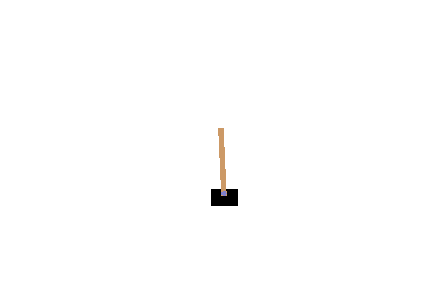
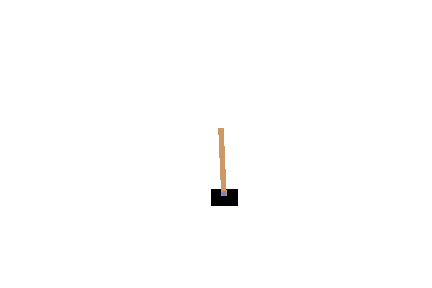
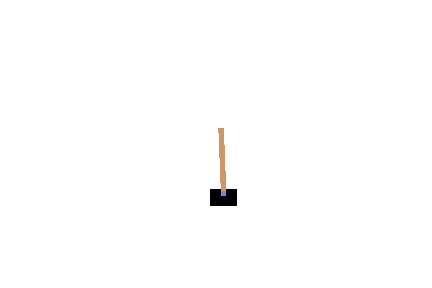
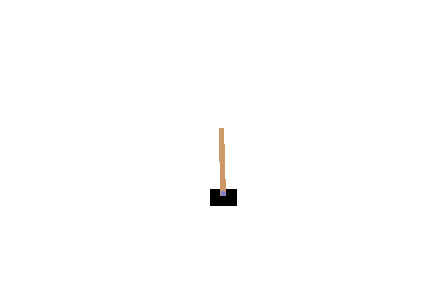
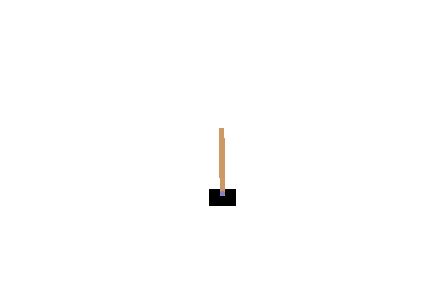
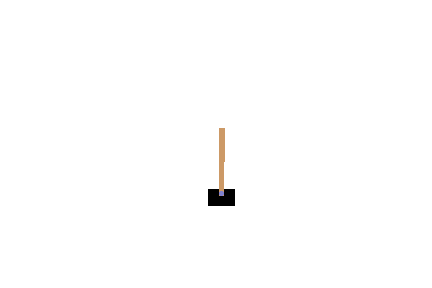
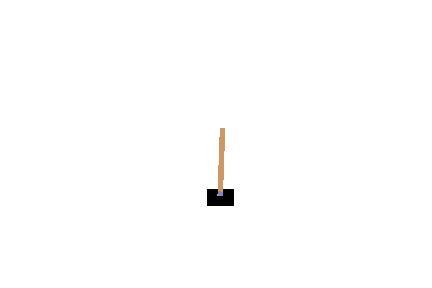
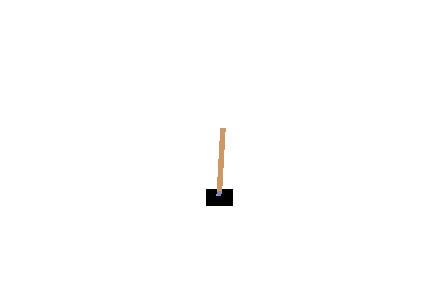
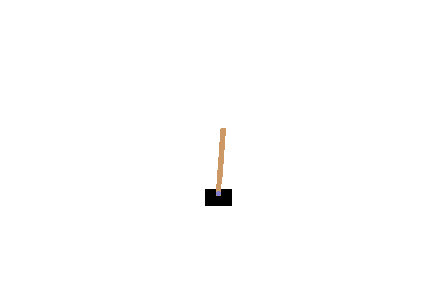
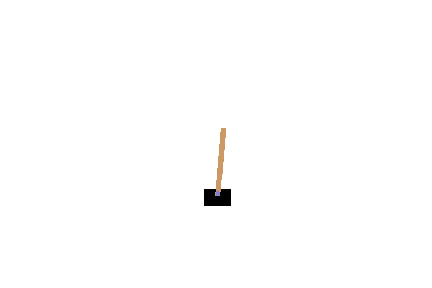
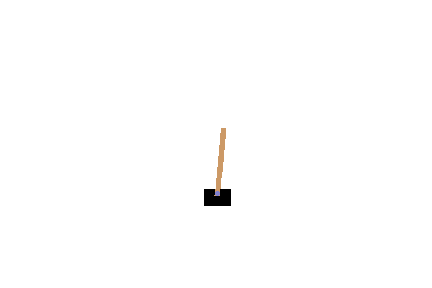
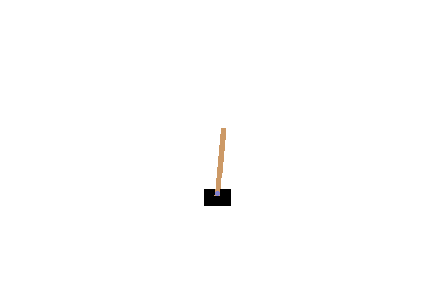
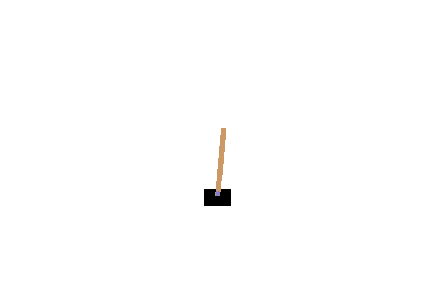
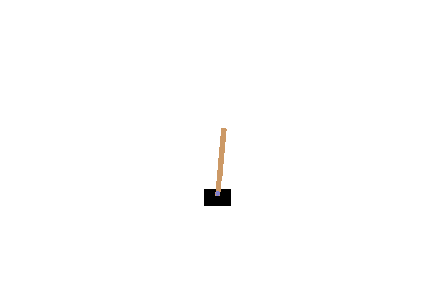
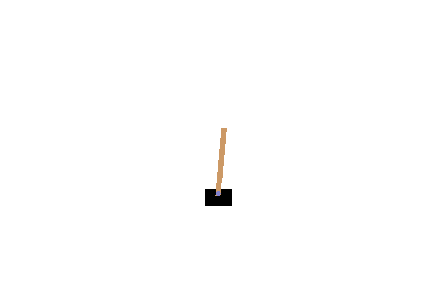
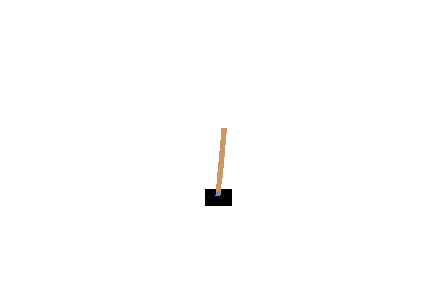
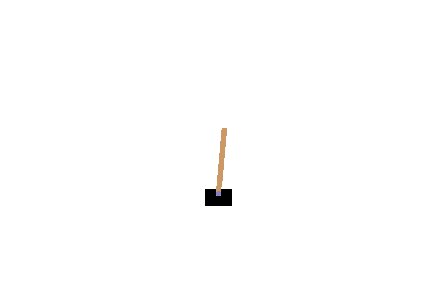
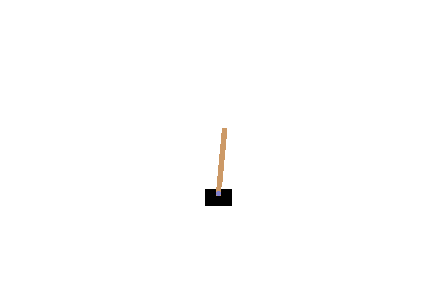
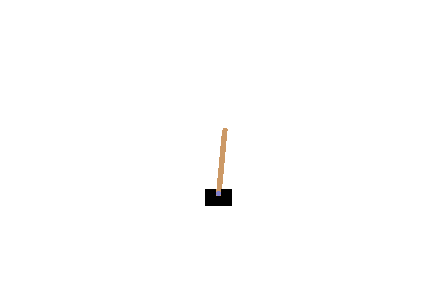
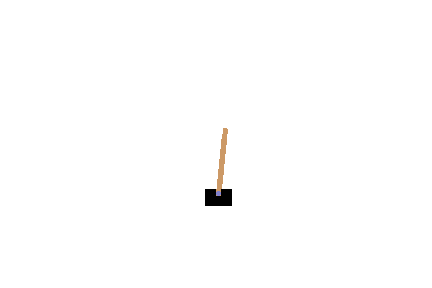
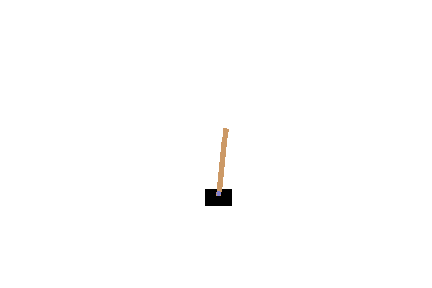
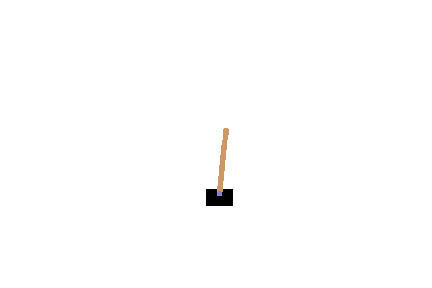
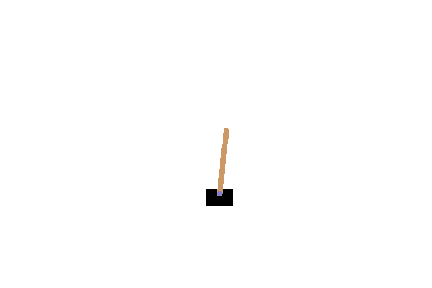
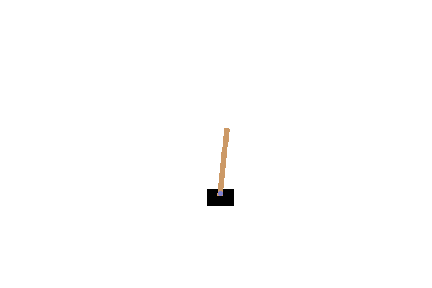
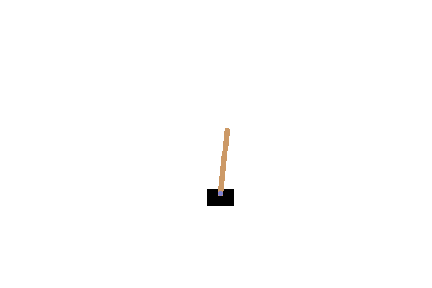
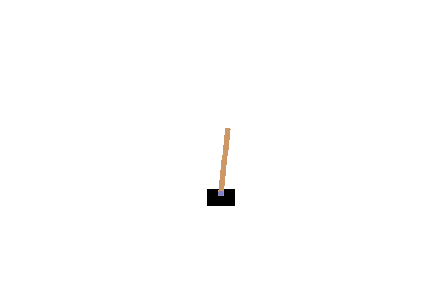
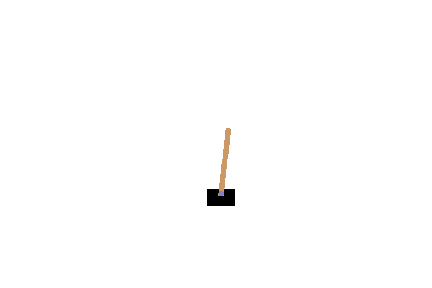
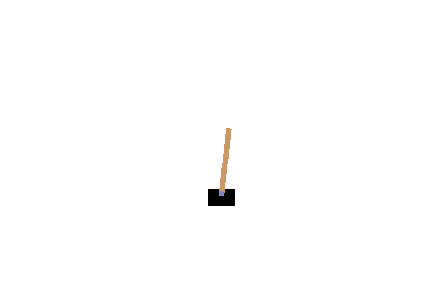
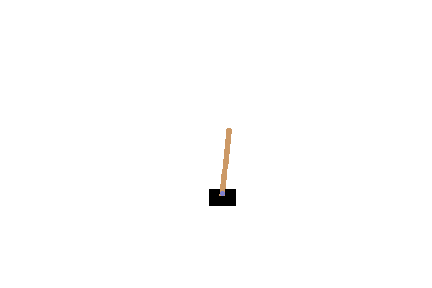
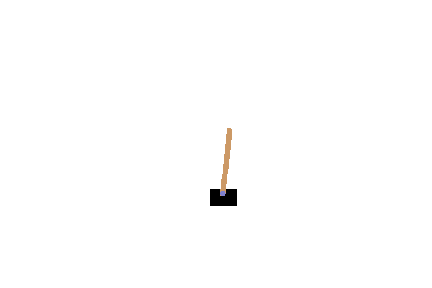
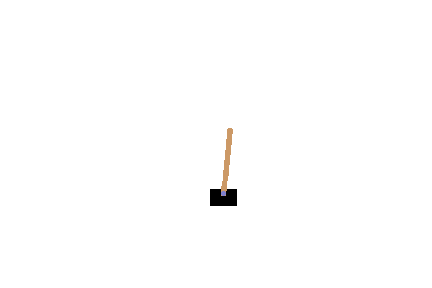
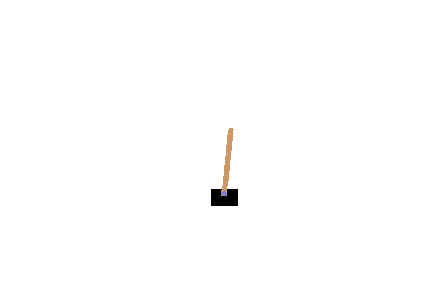
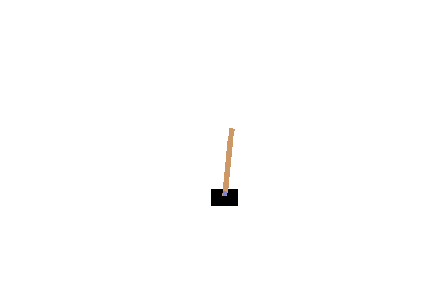
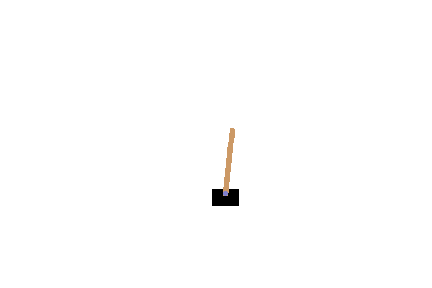
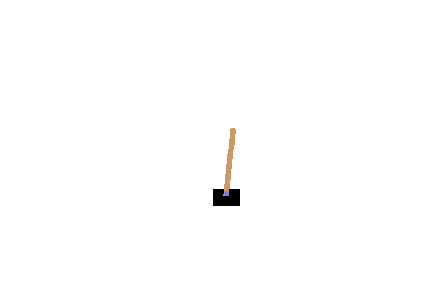
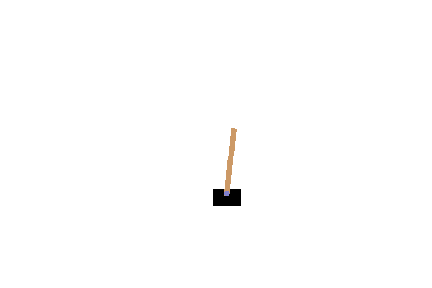
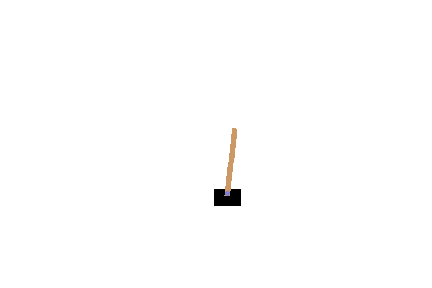
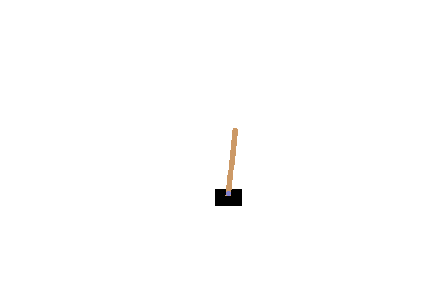
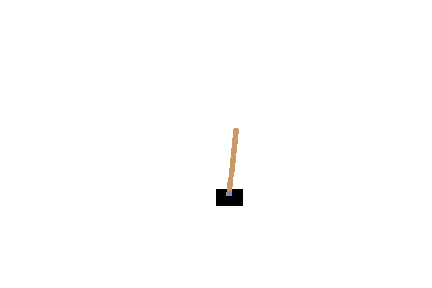
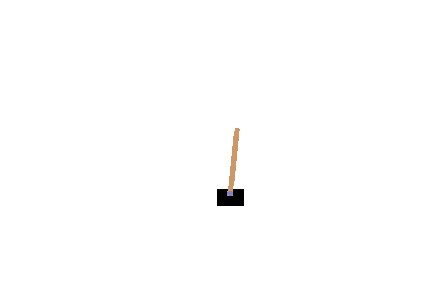
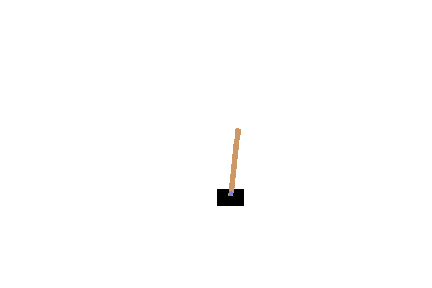
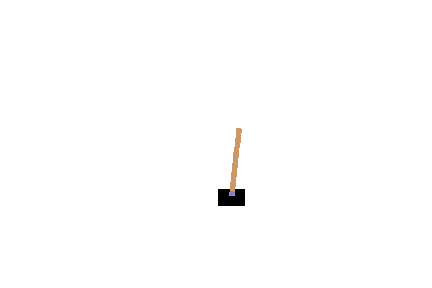
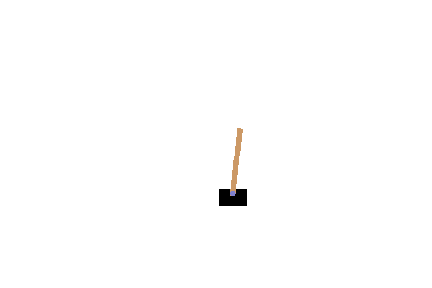
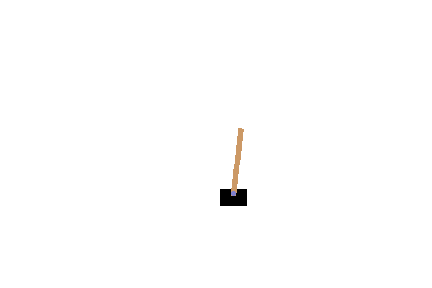
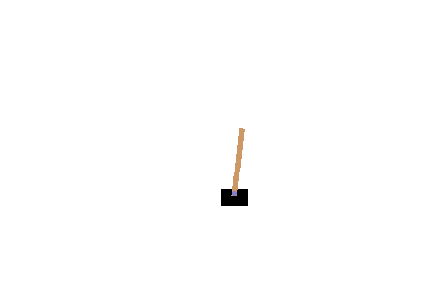
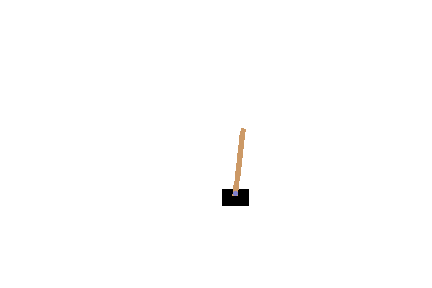
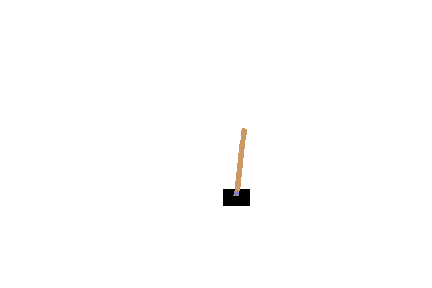
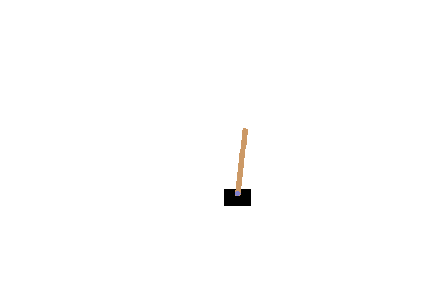
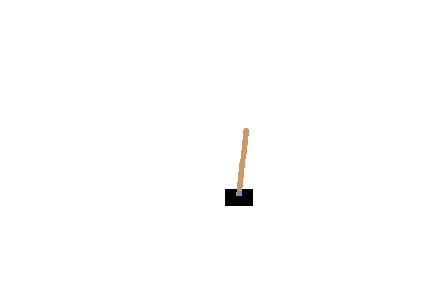
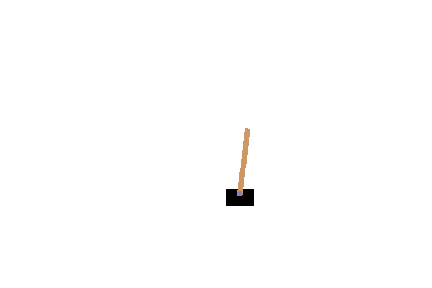
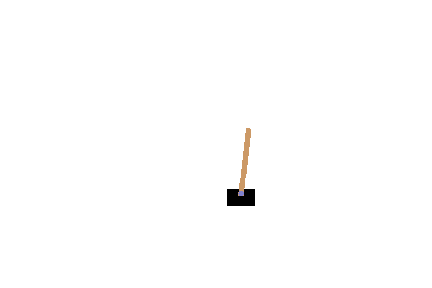
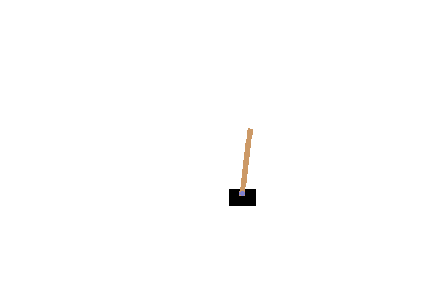
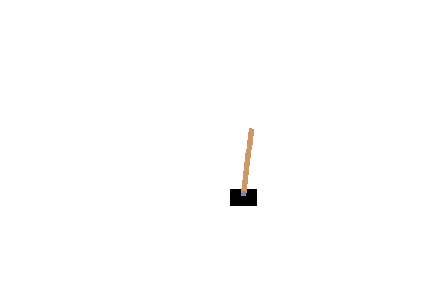
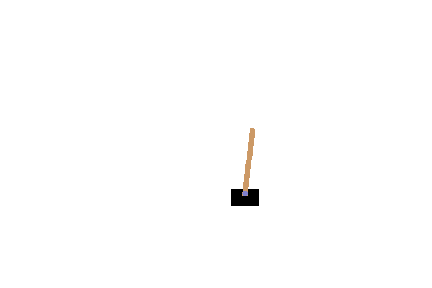
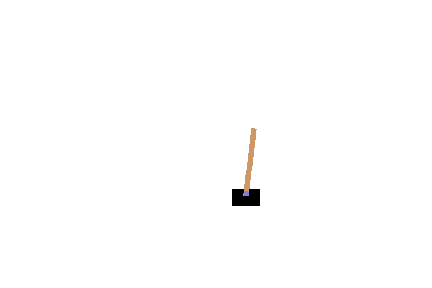
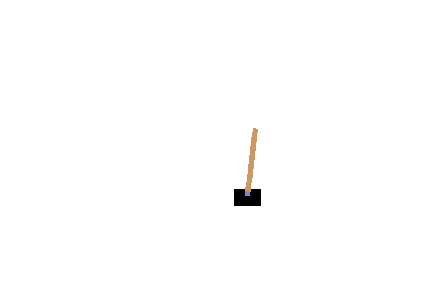
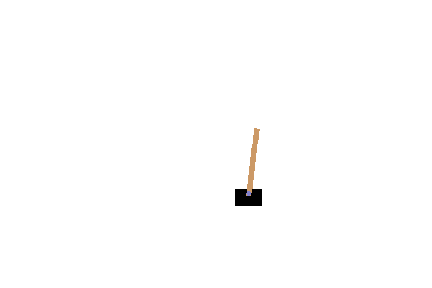
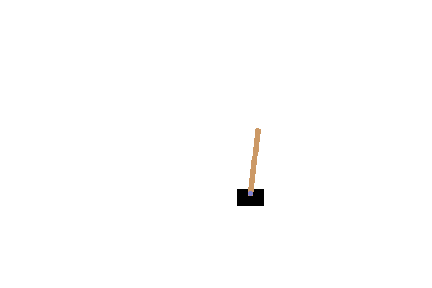
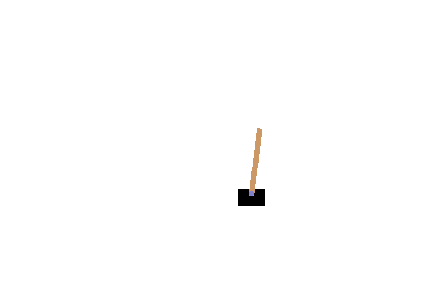
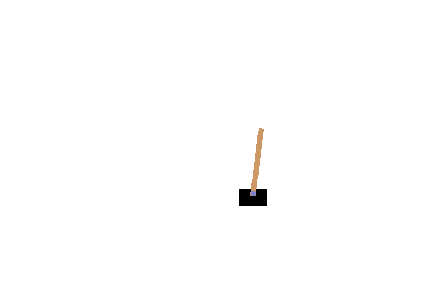
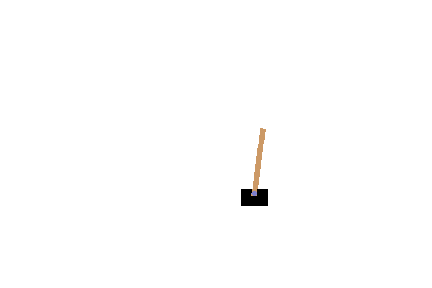
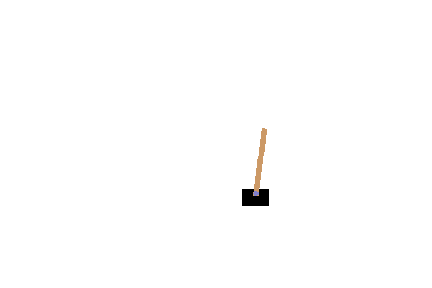
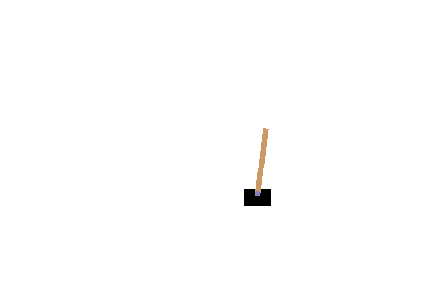
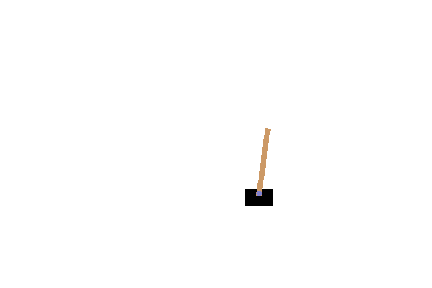
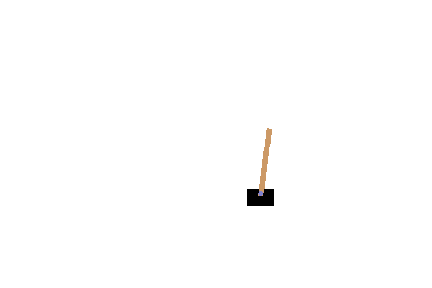
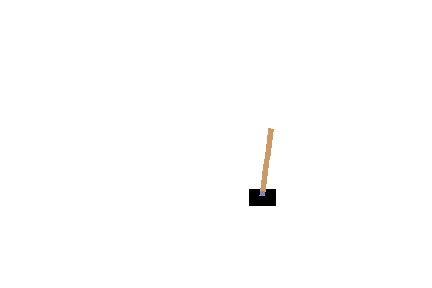
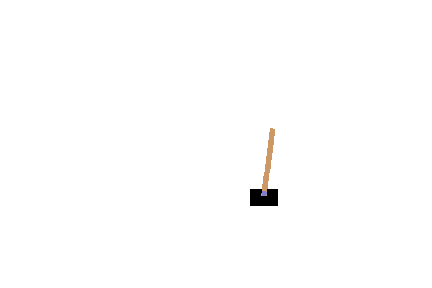
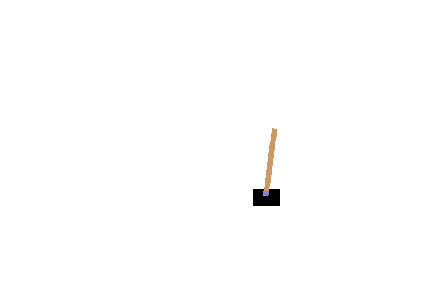
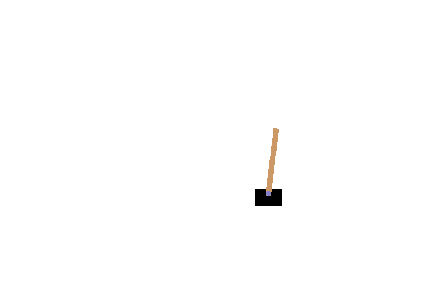
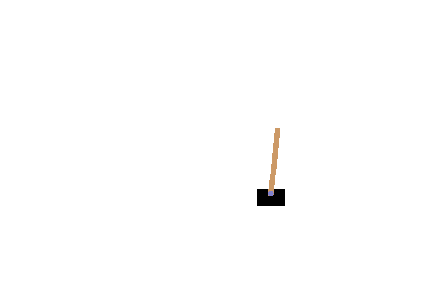
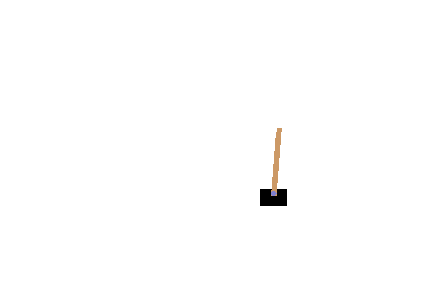
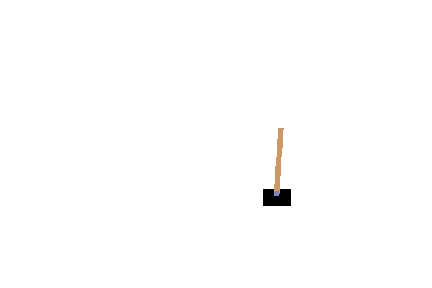
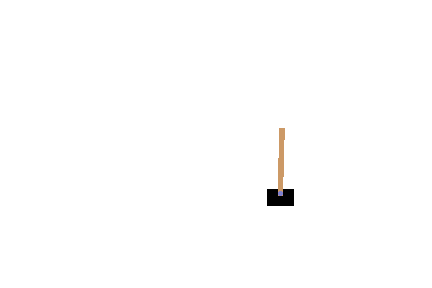
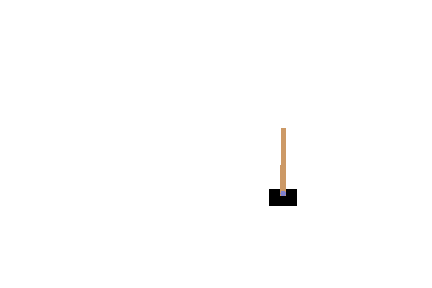
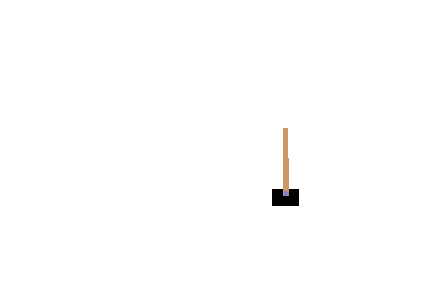
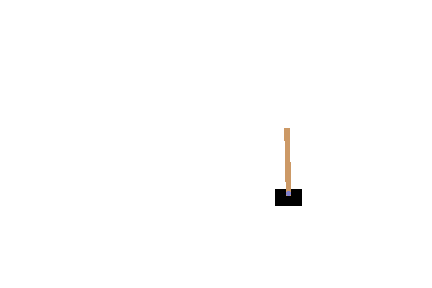
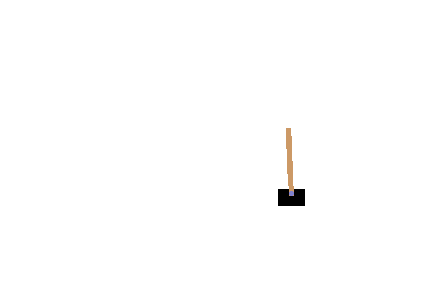
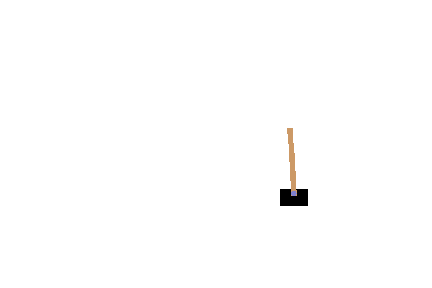
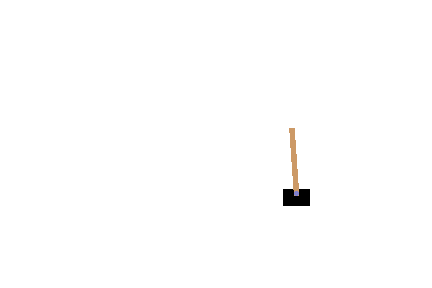
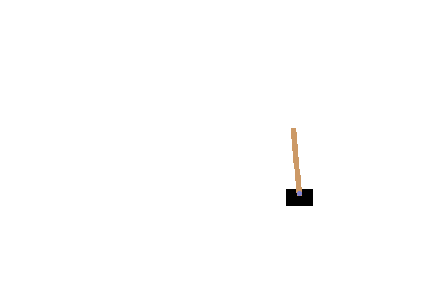
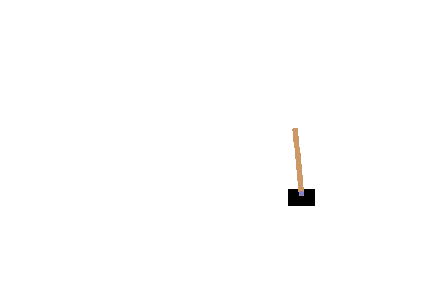
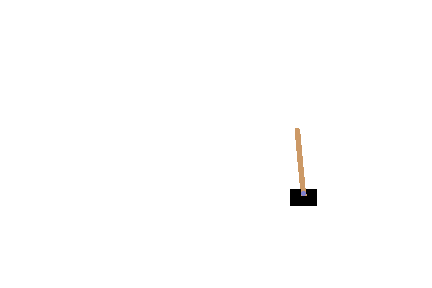
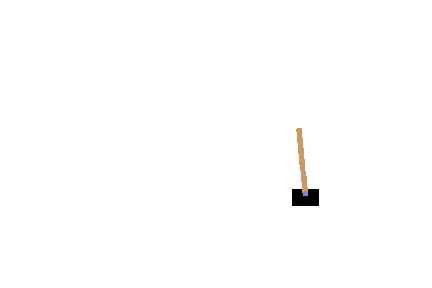
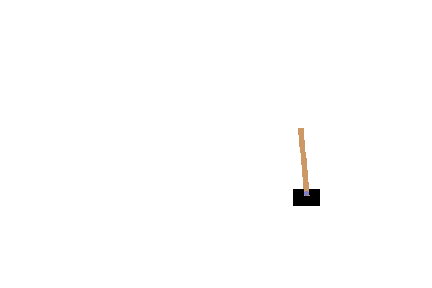
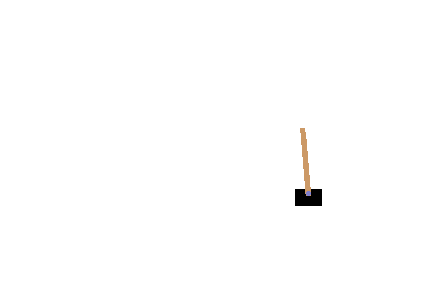
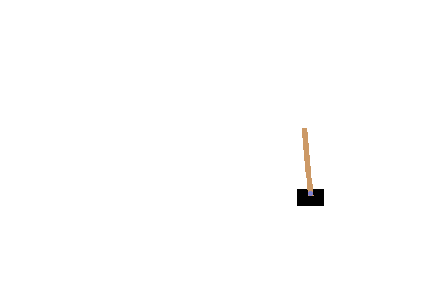
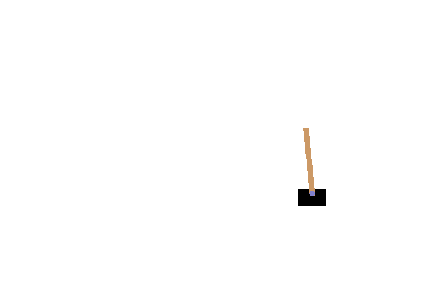
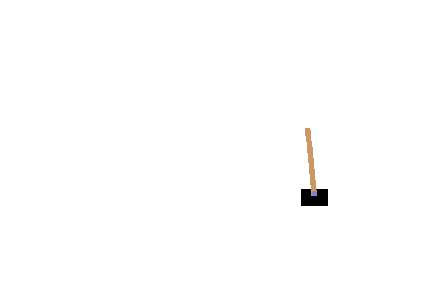
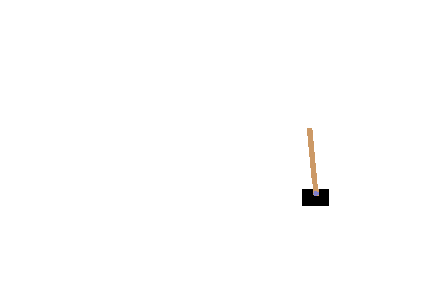
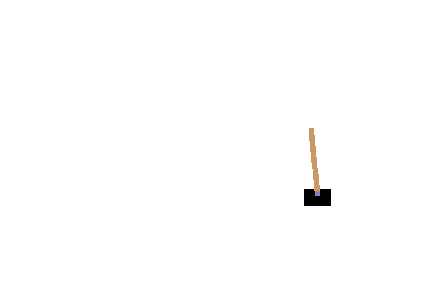
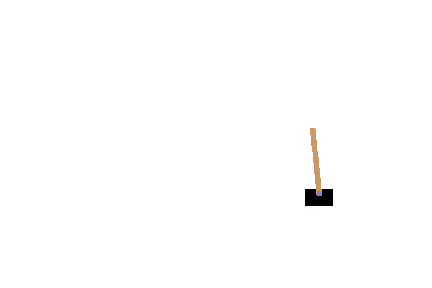
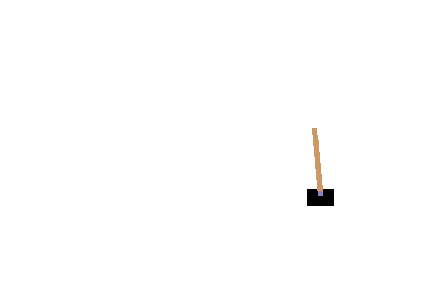
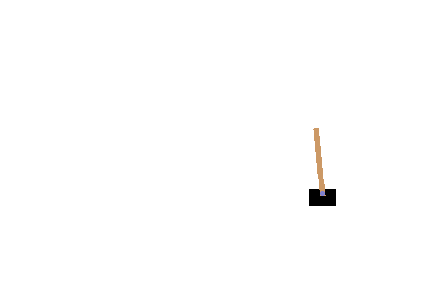
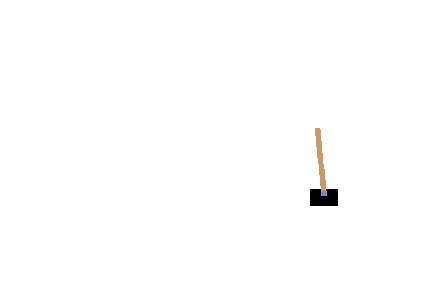
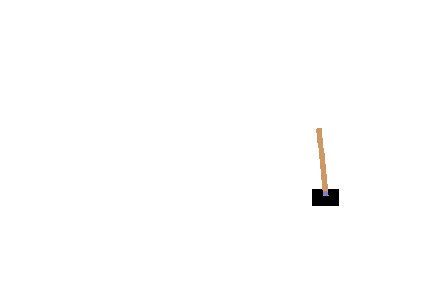
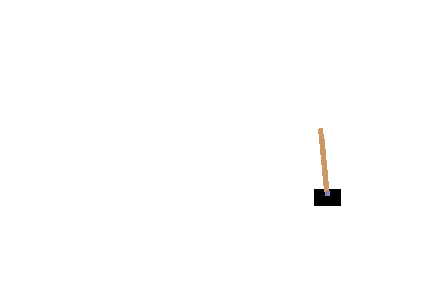
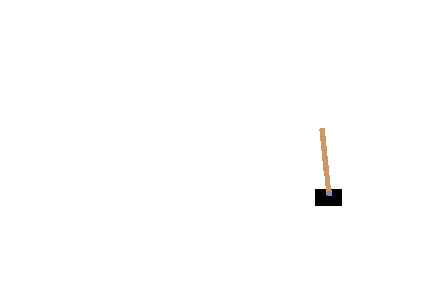
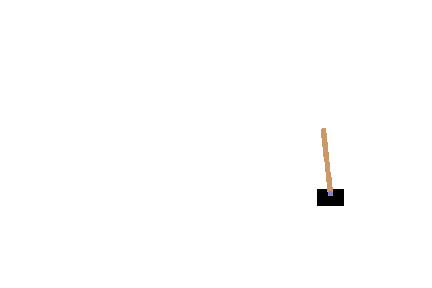
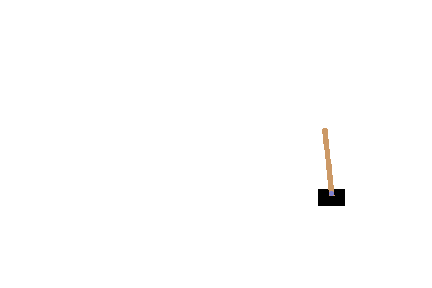
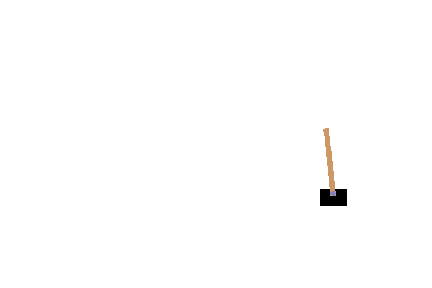
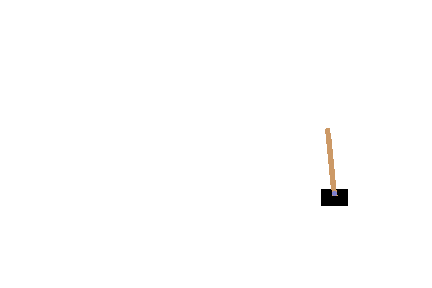
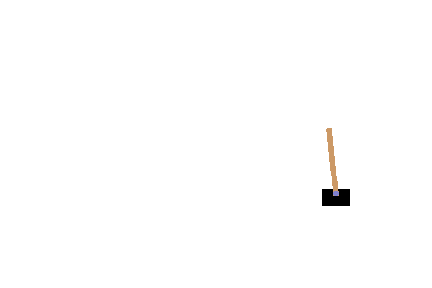
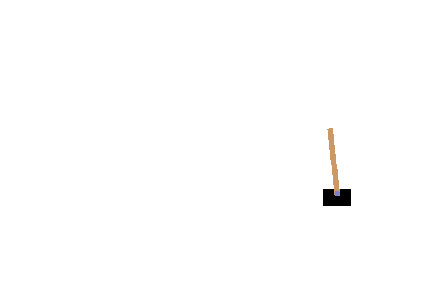
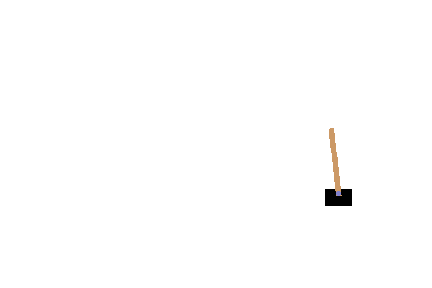
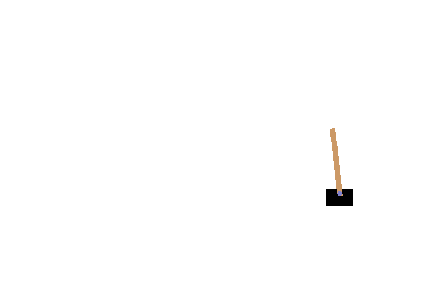
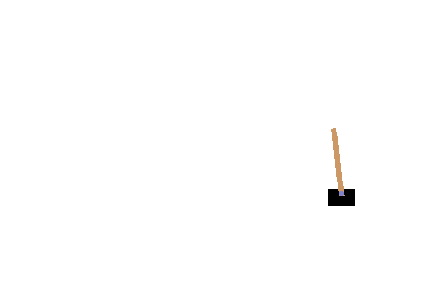
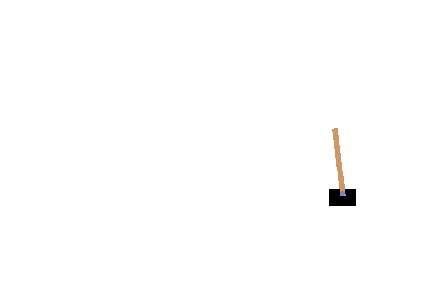
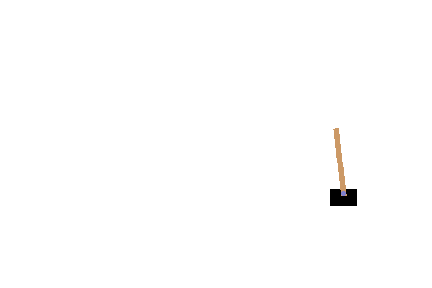
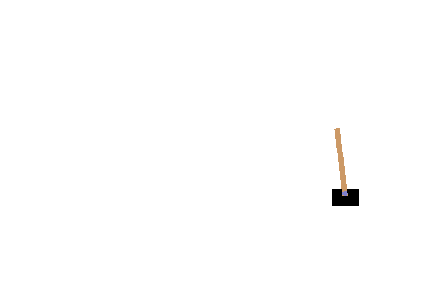
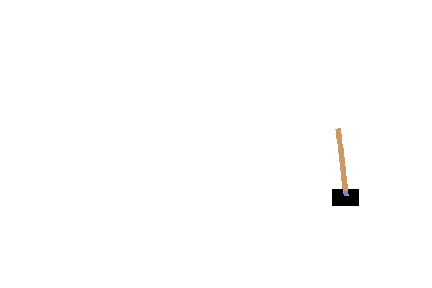
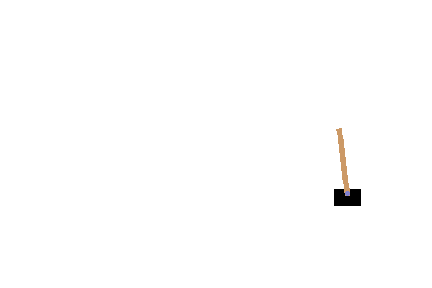
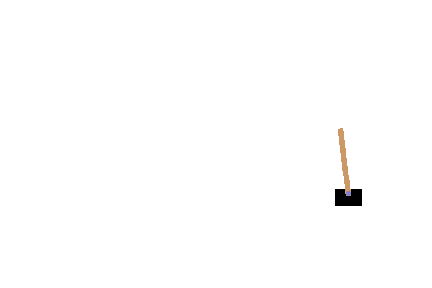
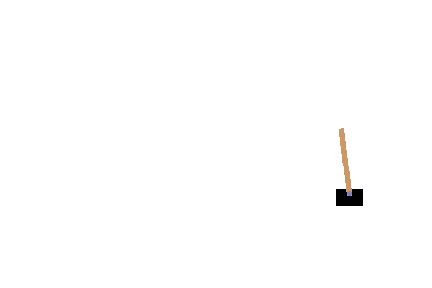
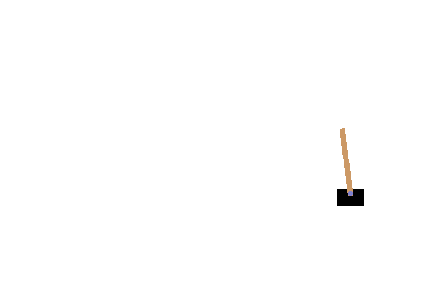
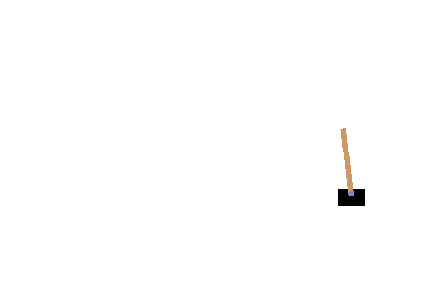
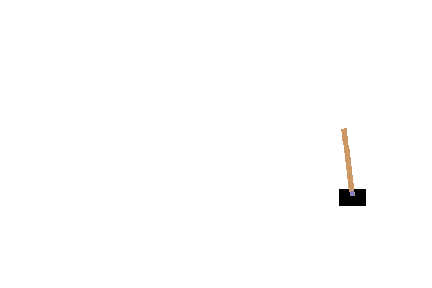
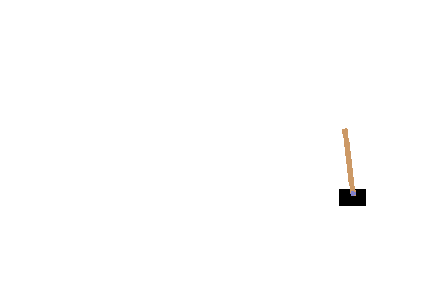
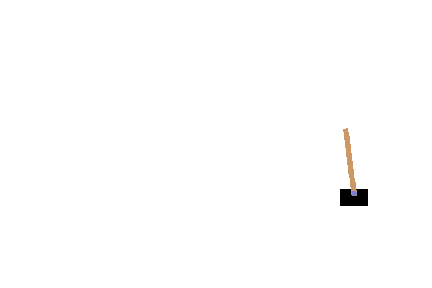
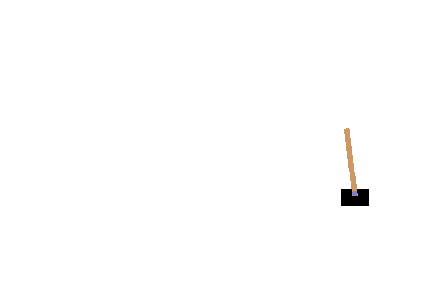
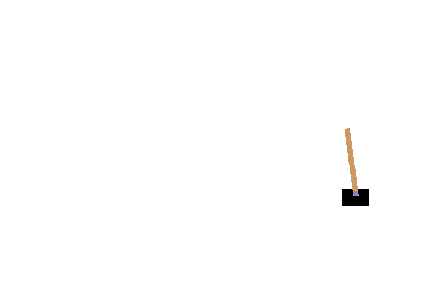
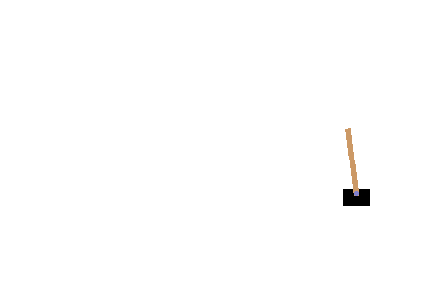
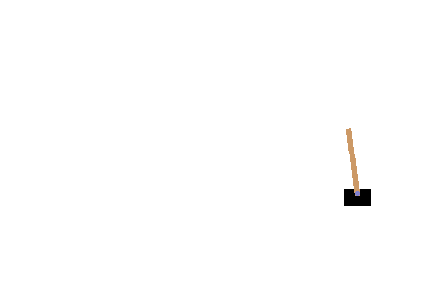
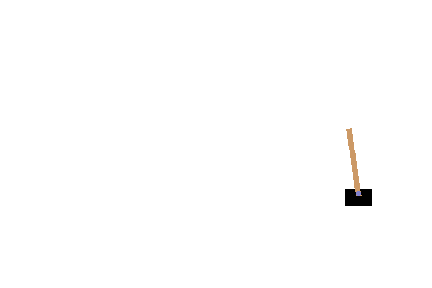
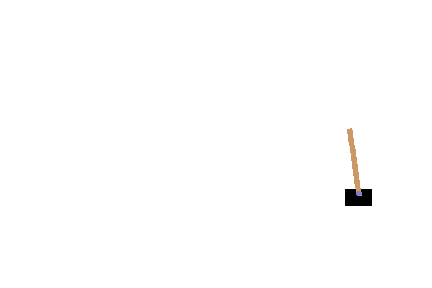
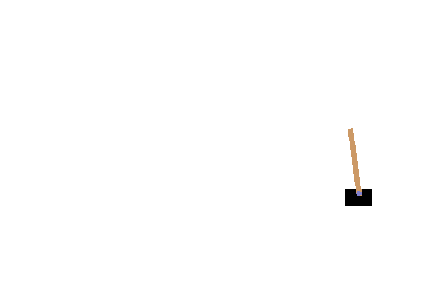
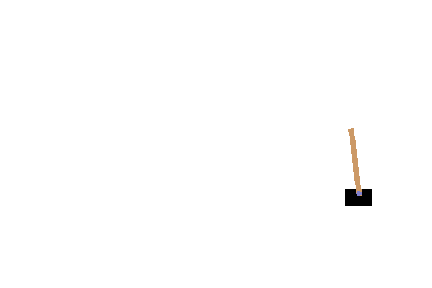
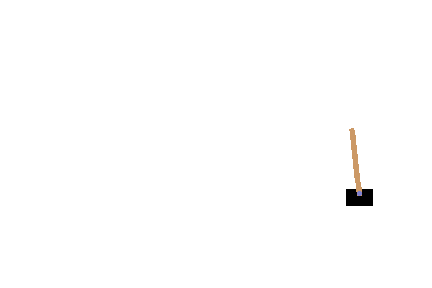
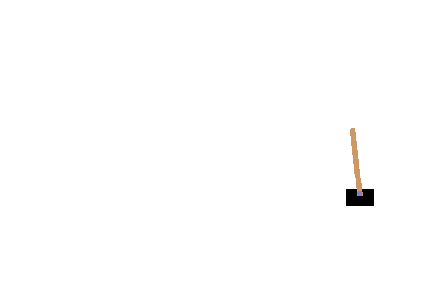
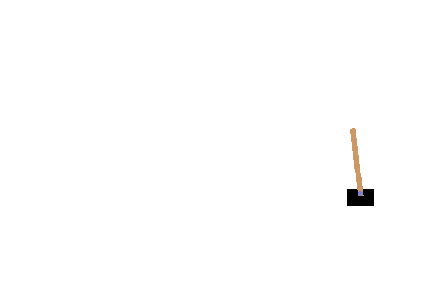
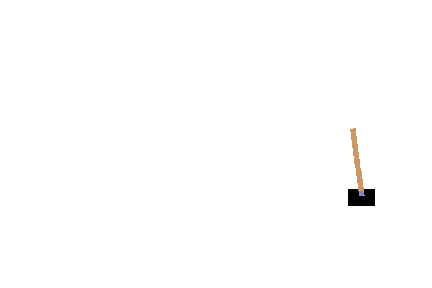
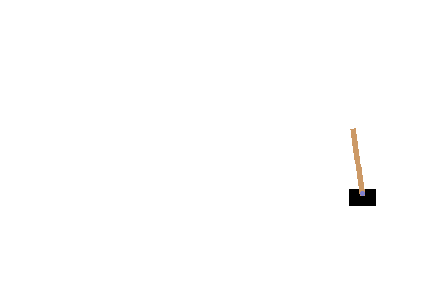
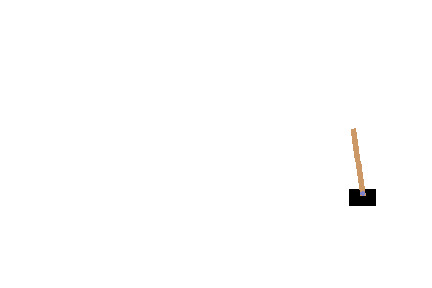
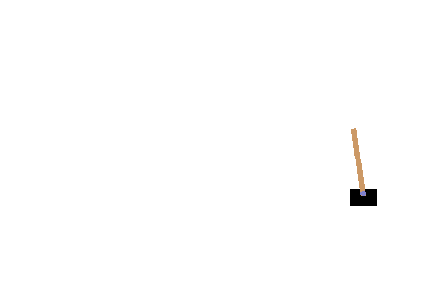
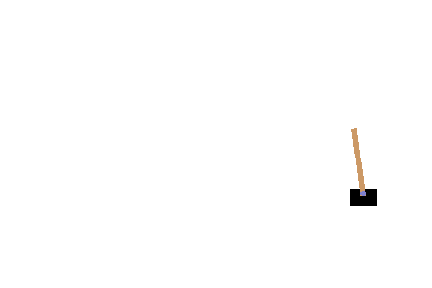
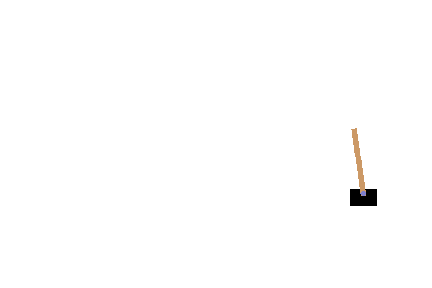
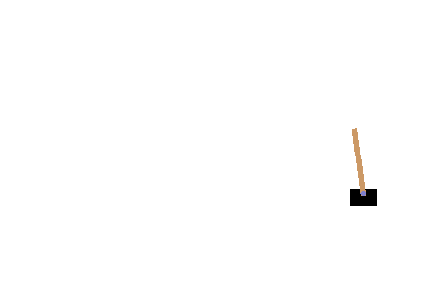
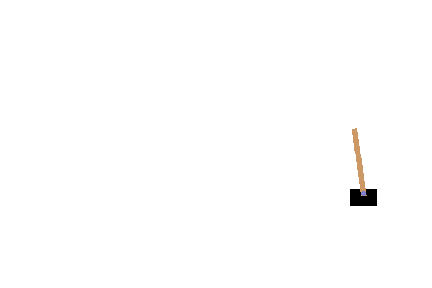
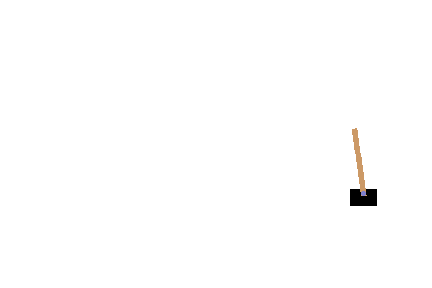
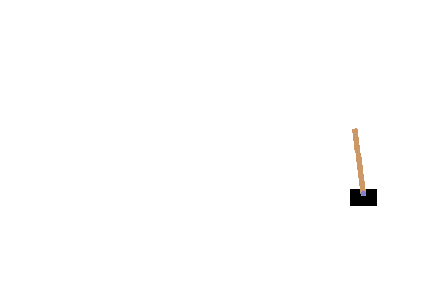
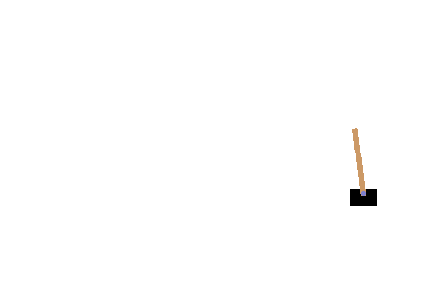
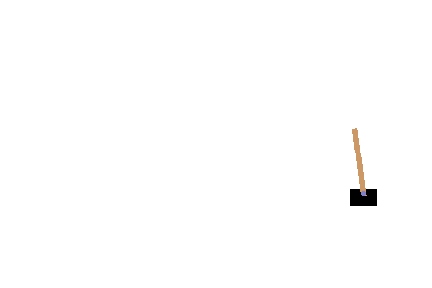
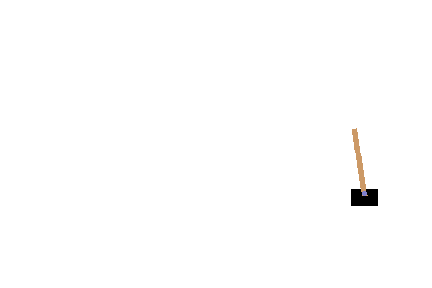
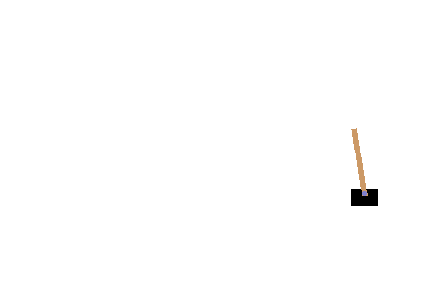
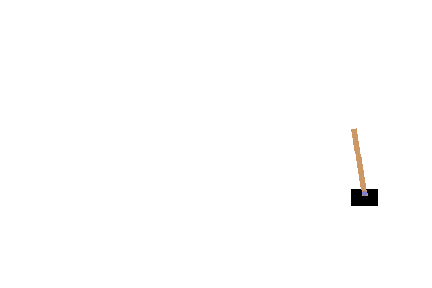
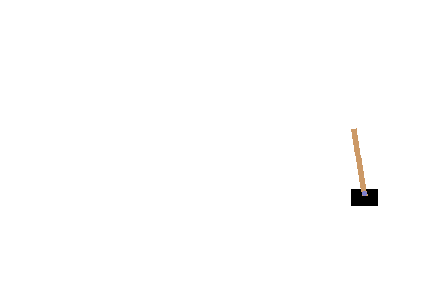
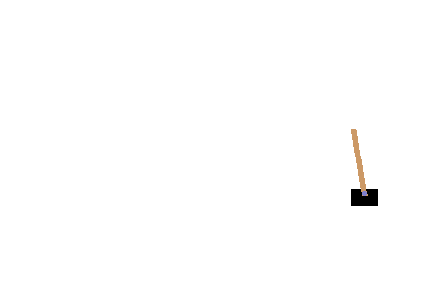
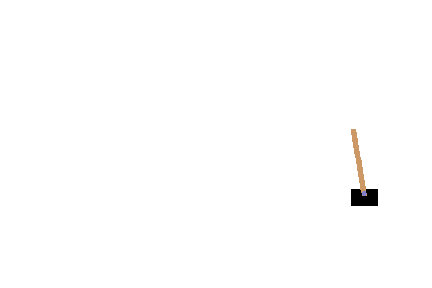
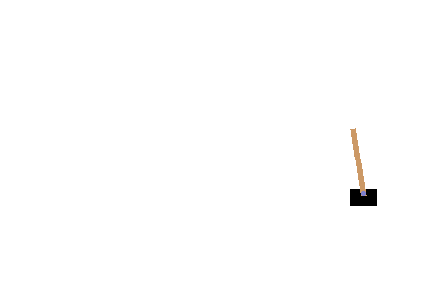
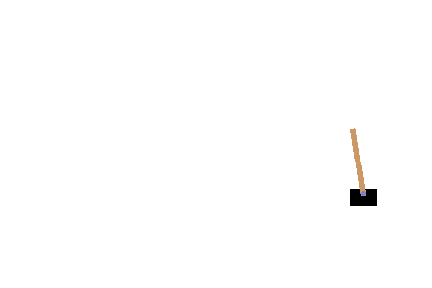
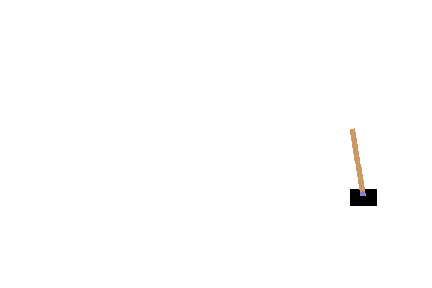
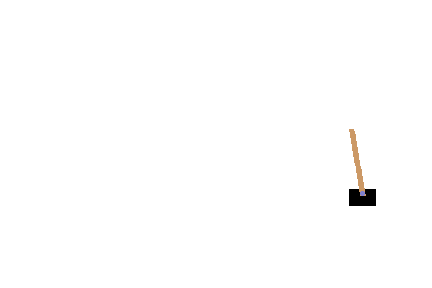
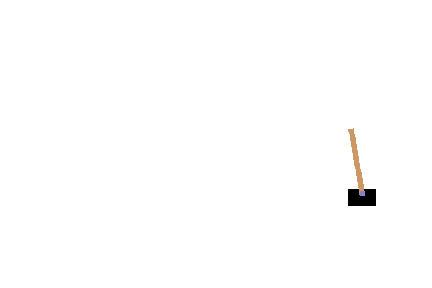
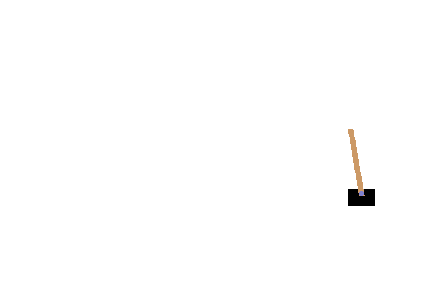
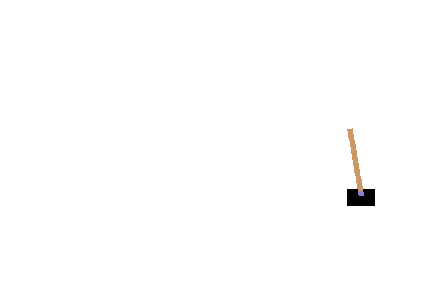
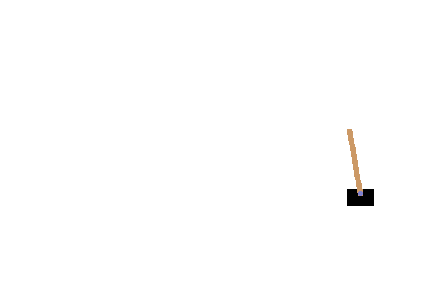
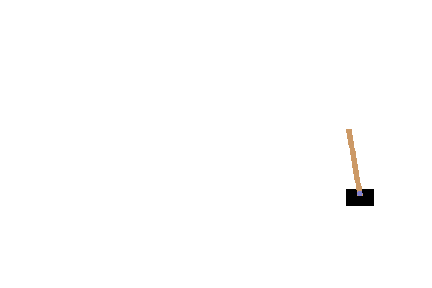
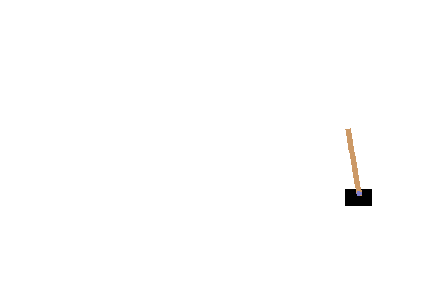
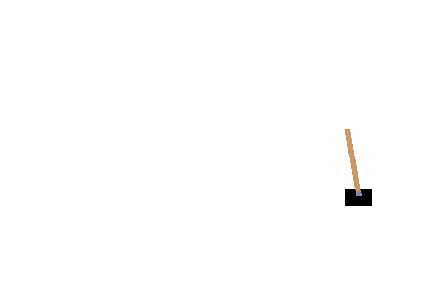
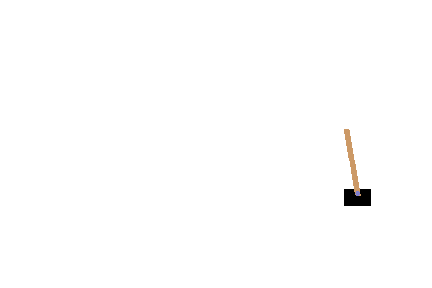
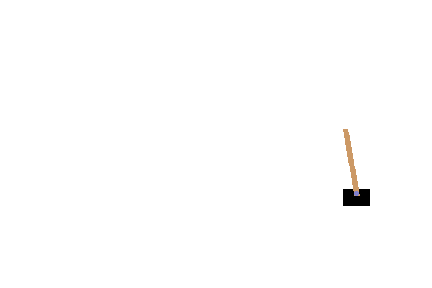
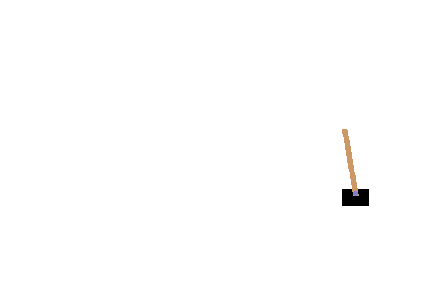
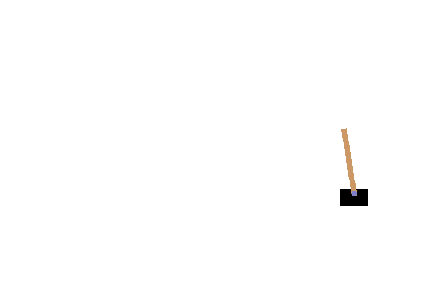
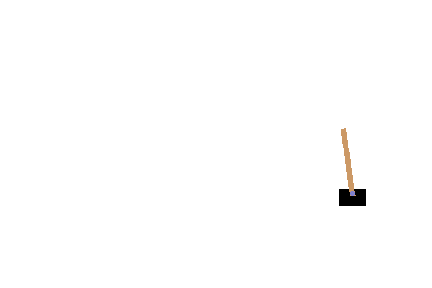
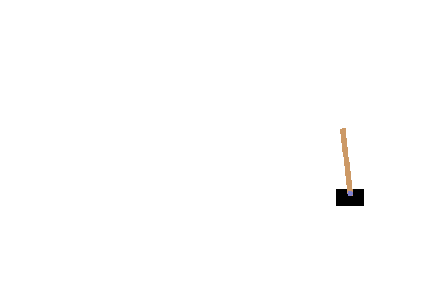
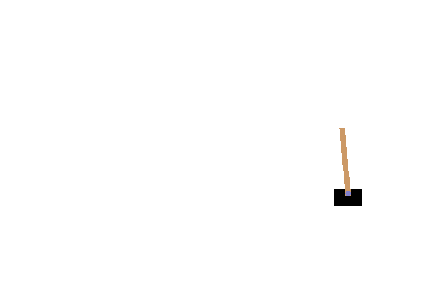
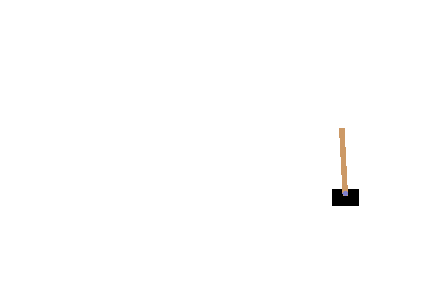
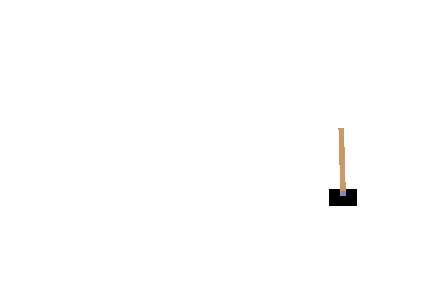
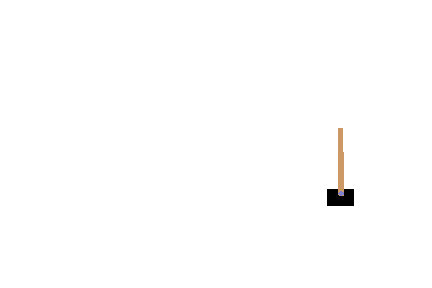
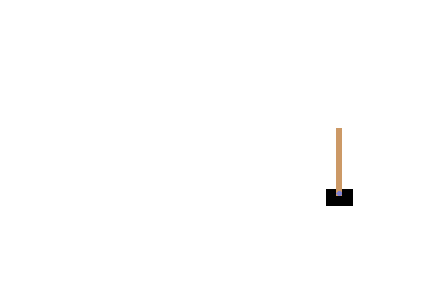
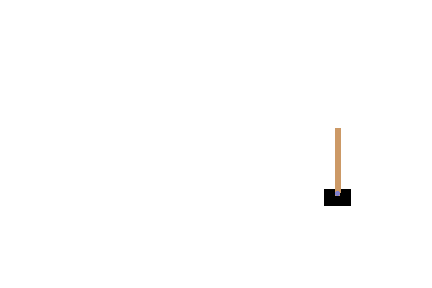
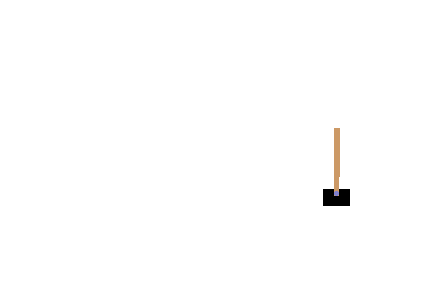
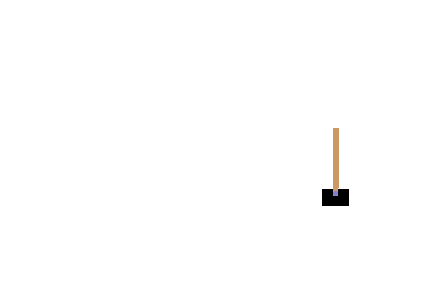
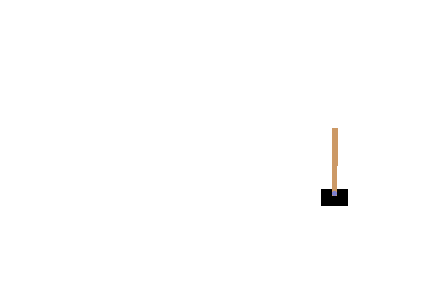
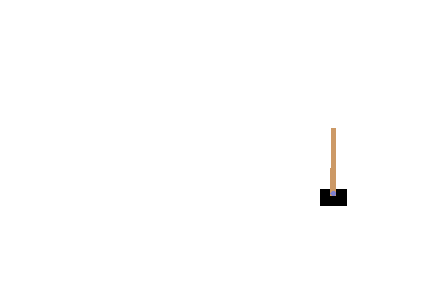
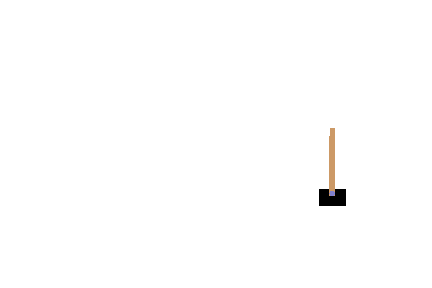
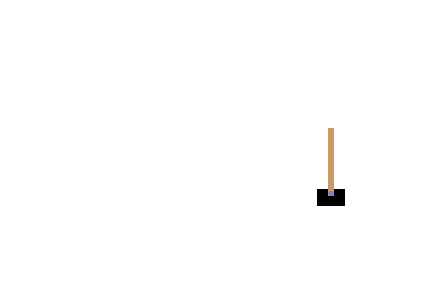
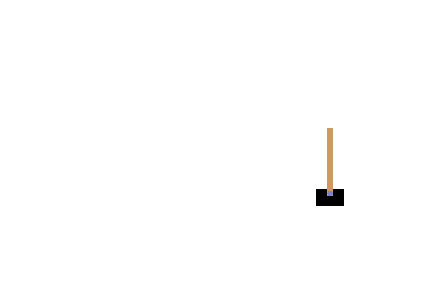
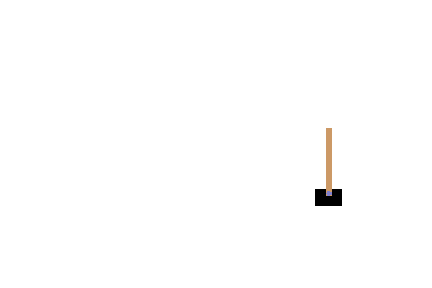
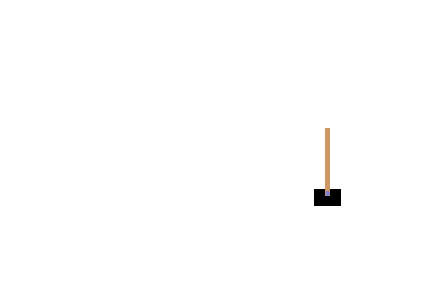
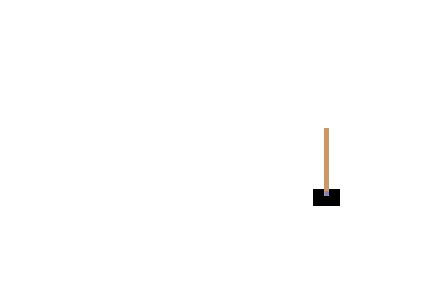
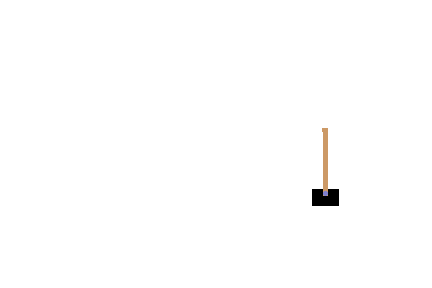
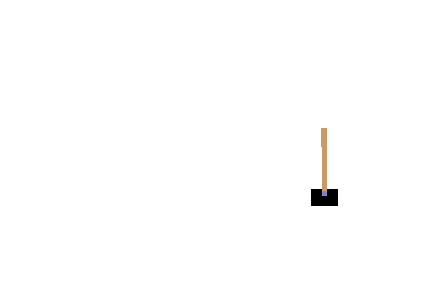
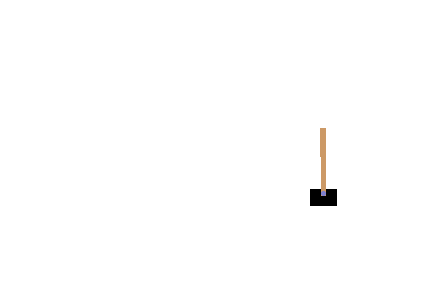
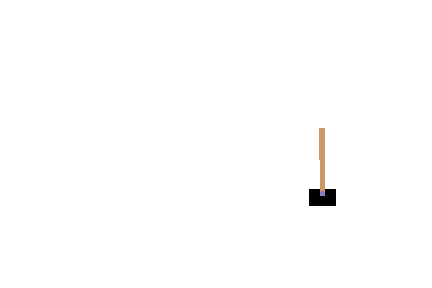
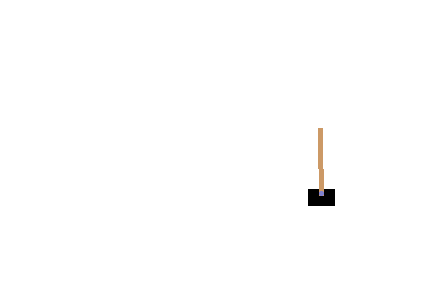
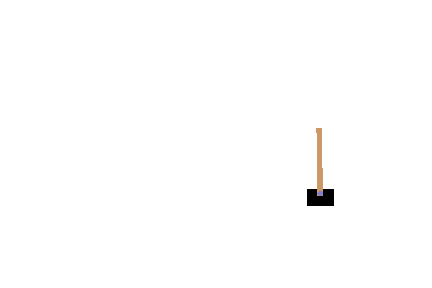
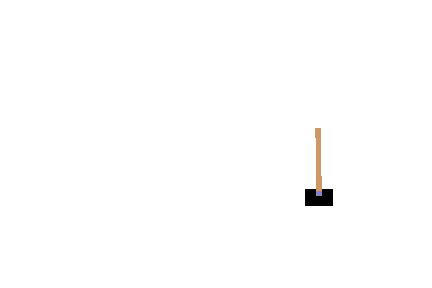
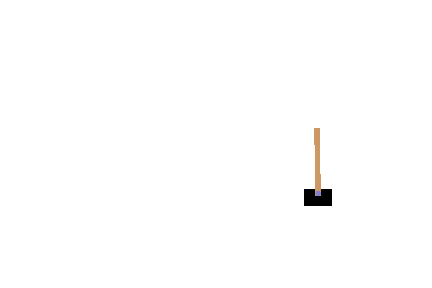
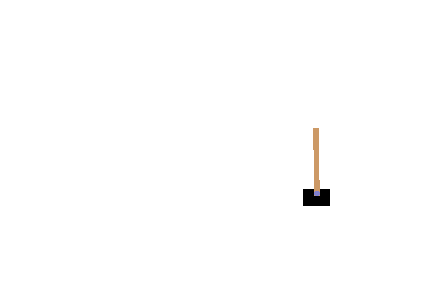
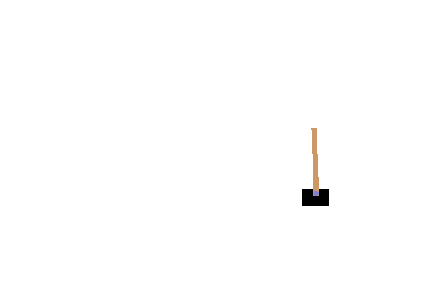
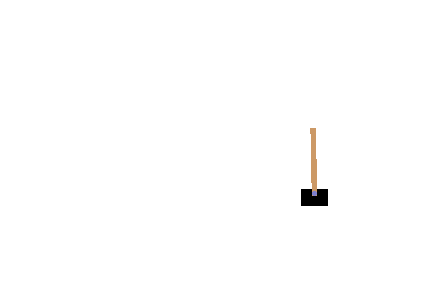
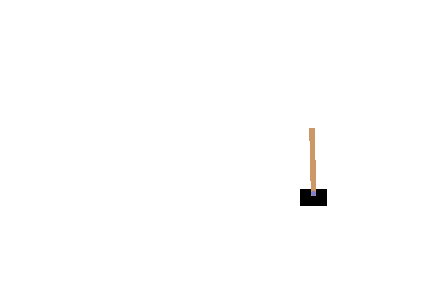
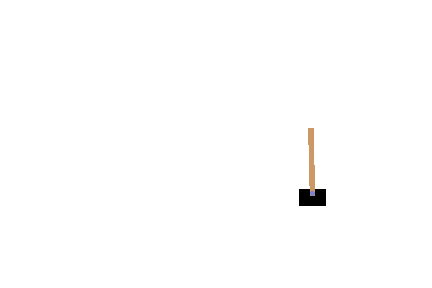
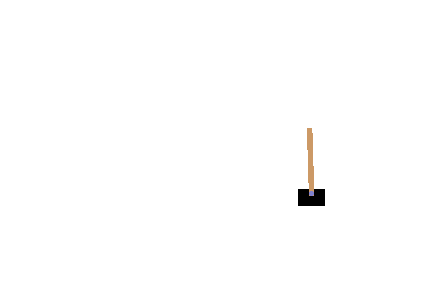
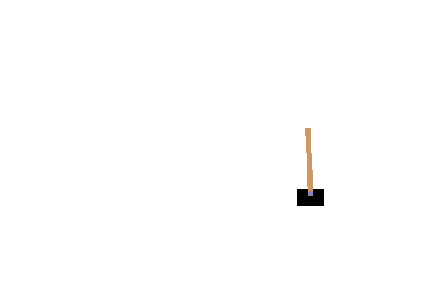
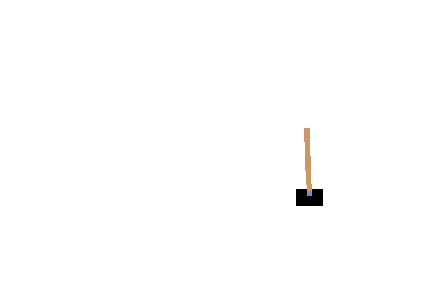
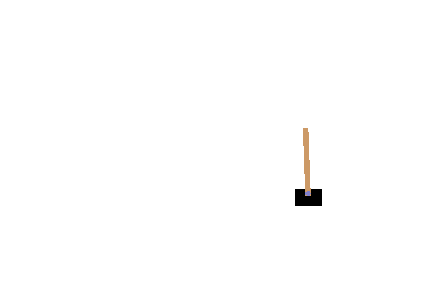
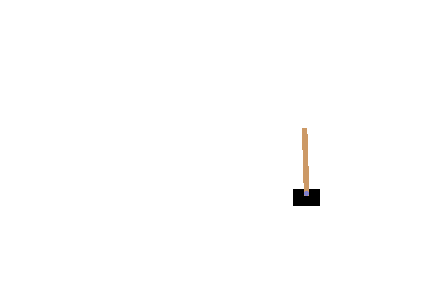
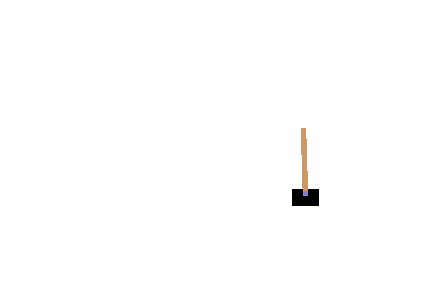
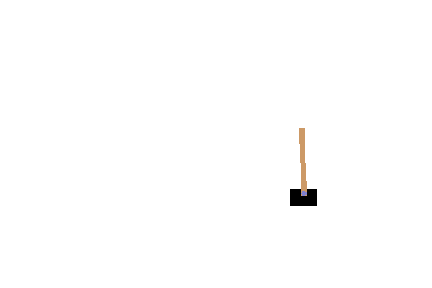

In [11]:
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    state_number = transform(observation)
    action = np.argmax(Q_table[state_number])
    observation, reward, done, info = env.step(action)
    if done:
        print 'Number of step: ', t
        break
env.render(close=True)
helper.display_frames_as_gif(frames)  #<<< This one for Jupyter Notebook Display

** We see that the cart is moving quite far from the origin. So how can we stop that? We can in fact modify a cost function such that it will penalize the policy if it goes too far**

In [13]:
alpha = 0.1
gamma = 0.95
Q_table = np.zeros((num_states, num_actions))
for i in range (20000): # We play 1000 episodes
    done = False
    s = env.reset()
    time = 0 #keep track how long
    total_reward = 0
    while not done:
        state_number = transform(s)
        action = np.argmax(Q_table[state_number]) # Whatever it can be, because Q learning is an off-policy learning algorithms
        s_landed, reward, done,info = env.step(action)
        time = time + 1
        if done and time < 199:
            reward = reward -322
        if abs(s_landed[0]) > 0.5:
            reward = reward - abs(s_landed[0])* 10 ## THIS IS WHAT WE MODIFIED
        Q_table[transform(s), action] = Q_table[transform(s), action] + alpha* (reward + gamma*(np.max(Q_table[transform(s_landed)])) - Q_table[transform(s), action])
        s = s_landed
        total_reward += reward
    print 'Finish episode #', i, 'time is: ', time, 'reward is: ', total_reward

Finish episode # 0 time is:  9 reward is:  -313.0
Finish episode # 1 time is:  10 reward is:  -312.0
Finish episode # 2 time is:  9 reward is:  -313.0
Finish episode # 3 time is:  10 reward is:  -312.0
Finish episode # 4 time is:  10 reward is:  -312.0
Finish episode # 5 time is:  8 reward is:  -314.0
Finish episode # 6 time is:  10 reward is:  -312.0
Finish episode # 7 time is:  10 reward is:  -312.0
Finish episode # 8 time is:  10 reward is:  -312.0
Finish episode # 9 time is:  11 reward is:  -311.0
Finish episode # 10 time is:  12 reward is:  -310.0
Finish episode # 11 time is:  11 reward is:  -311.0
Finish episode # 12 time is:  11 reward is:  -311.0
Finish episode # 13 time is:  9 reward is:  -313.0
Finish episode # 14 time is:  11 reward is:  -311.0
Finish episode # 15 time is:  11 reward is:  -311.0
Finish episode # 16 time is:  10 reward is:  -312.0
Finish episode # 17 time is:  11 reward is:  -311.0
Finish episode # 18 time is:  11 reward is:  -311.0
Finish episode # 19 time i

Finish episode # 165 time is:  99 reward is:  -762.73092818
Finish episode # 166 time is:  93 reward is:  -591.245771844
Finish episode # 167 time is:  97 reward is:  -628.231611898
Finish episode # 168 time is:  80 reward is:  -460.375492106
Finish episode # 169 time is:  67 reward is:  -333.327448907
Finish episode # 170 time is:  53 reward is:  -305.40435803
Finish episode # 171 time is:  70 reward is:  -366.313704606
Finish episode # 172 time is:  57 reward is:  -302.435901677
Finish episode # 173 time is:  64 reward is:  -341.342456936
Finish episode # 174 time is:  109 reward is:  -798.776052377
Finish episode # 175 time is:  63 reward is:  -302.767299839
Finish episode # 176 time is:  56 reward is:  -296.225113577
Finish episode # 177 time is:  64 reward is:  -302.370308517
Finish episode # 178 time is:  61 reward is:  -319.826441353
Finish episode # 179 time is:  60 reward is:  -306.434127523
Finish episode # 180 time is:  64 reward is:  -315.307147531
Finish episode # 181 time

Finish episode # 306 time is:  74 reward is:  -406.466584086
Finish episode # 307 time is:  66 reward is:  -334.209414241
Finish episode # 308 time is:  79 reward is:  -421.372910519
Finish episode # 309 time is:  111 reward is:  -816.592749838
Finish episode # 310 time is:  53 reward is:  -293.604273737
Finish episode # 311 time is:  55 reward is:  -285.022530493
Finish episode # 312 time is:  105 reward is:  -869.757502278
Finish episode # 313 time is:  83 reward is:  -356.299319591
Finish episode # 314 time is:  63 reward is:  -312.361096762
Finish episode # 315 time is:  61 reward is:  -292.277895358
Finish episode # 316 time is:  56 reward is:  -302.444282665
Finish episode # 317 time is:  52 reward is:  -288.04215466
Finish episode # 318 time is:  58 reward is:  -275.48386893
Finish episode # 319 time is:  59 reward is:  -293.276602377
Finish episode # 320 time is:  61 reward is:  -285.853084659
Finish episode # 321 time is:  58 reward is:  -309.757054942
Finish episode # 322 tim

Finish episode # 451 time is:  88 reward is:  -554.508425679
Finish episode # 452 time is:  84 reward is:  -470.381062398
Finish episode # 453 time is:  117 reward is:  -1042.25897467
Finish episode # 454 time is:  106 reward is:  -766.942481829
Finish episode # 455 time is:  74 reward is:  -422.232201983
Finish episode # 456 time is:  105 reward is:  -881.427160323
Finish episode # 457 time is:  88 reward is:  -500.549457381
Finish episode # 458 time is:  86 reward is:  -535.198423896
Finish episode # 459 time is:  94 reward is:  -687.704767078
Finish episode # 460 time is:  82 reward is:  -453.372217765
Finish episode # 461 time is:  90 reward is:  -587.773881292
Finish episode # 462 time is:  78 reward is:  -434.085195848
Finish episode # 463 time is:  65 reward is:  -298.219003472
Finish episode # 464 time is:  44 reward is:  -278.0
Finish episode # 465 time is:  112 reward is:  -992.939339008
Finish episode # 466 time is:  121 reward is:  -1310.42310612
Finish episode # 467 time i

Finish episode # 589 time is:  109 reward is:  -893.349298145
Finish episode # 590 time is:  111 reward is:  -869.856549059
Finish episode # 591 time is:  86 reward is:  -558.14045798
Finish episode # 592 time is:  91 reward is:  -584.07670359
Finish episode # 593 time is:  116 reward is:  -1068.67765014
Finish episode # 594 time is:  52 reward is:  -270.0
Finish episode # 595 time is:  116 reward is:  -1010.43383654
Finish episode # 596 time is:  71 reward is:  -429.658676645
Finish episode # 597 time is:  111 reward is:  -1109.20391592
Finish episode # 598 time is:  73 reward is:  -438.393061186
Finish episode # 599 time is:  98 reward is:  -652.422837164
Finish episode # 600 time is:  76 reward is:  -436.191213019
Finish episode # 601 time is:  79 reward is:  -423.980895471
Finish episode # 602 time is:  82 reward is:  -492.234704378
Finish episode # 603 time is:  93 reward is:  -633.391035172
Finish episode # 604 time is:  100 reward is:  -693.74958518
Finish episode # 605 time is:

Finish episode # 749 time is:  86 reward is:  -517.895035223
Finish episode # 750 time is:  66 reward is:  -323.349655602
Finish episode # 751 time is:  46 reward is:  -276.0
Finish episode # 752 time is:  53 reward is:  -284.68176517
Finish episode # 753 time is:  50 reward is:  -272.0
Finish episode # 754 time is:  109 reward is:  -735.298568926
Finish episode # 755 time is:  46 reward is:  -276.0
Finish episode # 756 time is:  10 reward is:  -312.0
Finish episode # 757 time is:  65 reward is:  -257.0
Finish episode # 758 time is:  46 reward is:  -276.0
Finish episode # 759 time is:  34 reward is:  -288.0
Finish episode # 760 time is:  101 reward is:  -654.533783834
Finish episode # 761 time is:  72 reward is:  -364.688950462
Finish episode # 762 time is:  78 reward is:  -450.331580255
Finish episode # 763 time is:  34 reward is:  -288.0
Finish episode # 764 time is:  56 reward is:  -266.0
Finish episode # 765 time is:  96 reward is:  -686.508352368
Finish episode # 766 time is:  31 

Finish episode # 904 time is:  178 reward is:  -144.0
Finish episode # 905 time is:  200 reward is:  200.0
Finish episode # 906 time is:  200 reward is:  200.0
Finish episode # 907 time is:  22 reward is:  -300.0
Finish episode # 908 time is:  43 reward is:  -279.0
Finish episode # 909 time is:  200 reward is:  200.0
Finish episode # 910 time is:  131 reward is:  -191.0
Finish episode # 911 time is:  138 reward is:  -184.0
Finish episode # 912 time is:  200 reward is:  200.0
Finish episode # 913 time is:  168 reward is:  -154.0
Finish episode # 914 time is:  13 reward is:  -309.0
Finish episode # 915 time is:  200 reward is:  200.0
Finish episode # 916 time is:  183 reward is:  -139.0
Finish episode # 917 time is:  200 reward is:  200.0
Finish episode # 918 time is:  200 reward is:  200.0
Finish episode # 919 time is:  200 reward is:  200.0
Finish episode # 920 time is:  200 reward is:  200.0
Finish episode # 921 time is:  200 reward is:  200.0
Finish episode # 922 time is:  200 reward

Finish episode # 1059 time is:  200 reward is:  200.0
Finish episode # 1060 time is:  200 reward is:  200.0
Finish episode # 1061 time is:  200 reward is:  200.0
Finish episode # 1062 time is:  200 reward is:  200.0
Finish episode # 1063 time is:  200 reward is:  200.0
Finish episode # 1064 time is:  200 reward is:  200.0
Finish episode # 1065 time is:  200 reward is:  200.0
Finish episode # 1066 time is:  200 reward is:  200.0
Finish episode # 1067 time is:  200 reward is:  200.0
Finish episode # 1068 time is:  167 reward is:  -155.0
Finish episode # 1069 time is:  200 reward is:  200.0
Finish episode # 1070 time is:  200 reward is:  134.768308464
Finish episode # 1071 time is:  200 reward is:  200.0
Finish episode # 1072 time is:  200 reward is:  200.0
Finish episode # 1073 time is:  200 reward is:  200.0
Finish episode # 1074 time is:  200 reward is:  200.0
Finish episode # 1075 time is:  200 reward is:  200.0
Finish episode # 1076 time is:  200 reward is:  200.0
Finish episode # 10

Finish episode # 1211 time is:  200 reward is:  200.0
Finish episode # 1212 time is:  200 reward is:  200.0
Finish episode # 1213 time is:  200 reward is:  200.0
Finish episode # 1214 time is:  200 reward is:  200.0
Finish episode # 1215 time is:  200 reward is:  200.0
Finish episode # 1216 time is:  200 reward is:  200.0
Finish episode # 1217 time is:  34 reward is:  -288.0
Finish episode # 1218 time is:  200 reward is:  200.0
Finish episode # 1219 time is:  121 reward is:  -201.0
Finish episode # 1220 time is:  200 reward is:  200.0
Finish episode # 1221 time is:  200 reward is:  200.0
Finish episode # 1222 time is:  200 reward is:  200.0
Finish episode # 1223 time is:  200 reward is:  200.0
Finish episode # 1224 time is:  200 reward is:  117.475556809
Finish episode # 1225 time is:  200 reward is:  184.492294669
Finish episode # 1226 time is:  200 reward is:  200.0
Finish episode # 1227 time is:  200 reward is:  200.0
Finish episode # 1228 time is:  200 reward is:  200.0
Finish epis

Finish episode # 1368 time is:  200 reward is:  200.0
Finish episode # 1369 time is:  186 reward is:  -690.506545678
Finish episode # 1370 time is:  200 reward is:  200.0
Finish episode # 1371 time is:  200 reward is:  200.0
Finish episode # 1372 time is:  200 reward is:  200.0
Finish episode # 1373 time is:  200 reward is:  200.0
Finish episode # 1374 time is:  200 reward is:  200.0
Finish episode # 1375 time is:  200 reward is:  200.0
Finish episode # 1376 time is:  200 reward is:  104.305485826
Finish episode # 1377 time is:  200 reward is:  200.0
Finish episode # 1378 time is:  200 reward is:  200.0
Finish episode # 1379 time is:  200 reward is:  200.0
Finish episode # 1380 time is:  200 reward is:  200.0
Finish episode # 1381 time is:  200 reward is:  200.0
Finish episode # 1382 time is:  200 reward is:  200.0
Finish episode # 1383 time is:  200 reward is:  200.0
Finish episode # 1384 time is:  200 reward is:  144.042603598
Finish episode # 1385 time is:  200 reward is:  137.57766

Finish episode # 1520 time is:  200 reward is:  200.0
Finish episode # 1521 time is:  200 reward is:  200.0
Finish episode # 1522 time is:  200 reward is:  200.0
Finish episode # 1523 time is:  200 reward is:  200.0
Finish episode # 1524 time is:  200 reward is:  200.0
Finish episode # 1525 time is:  200 reward is:  200.0
Finish episode # 1526 time is:  200 reward is:  200.0
Finish episode # 1527 time is:  200 reward is:  86.9166807412
Finish episode # 1528 time is:  200 reward is:  200.0
Finish episode # 1529 time is:  200 reward is:  200.0
Finish episode # 1530 time is:  200 reward is:  200.0
Finish episode # 1531 time is:  200 reward is:  200.0
Finish episode # 1532 time is:  200 reward is:  200.0
Finish episode # 1533 time is:  200 reward is:  200.0
Finish episode # 1534 time is:  200 reward is:  200.0
Finish episode # 1535 time is:  200 reward is:  200.0
Finish episode # 1536 time is:  200 reward is:  200.0
Finish episode # 1537 time is:  200 reward is:  200.0
Finish episode # 153

Finish episode # 1670 time is:  155 reward is:  -307.966678224
Finish episode # 1671 time is:  200 reward is:  200.0
Finish episode # 1672 time is:  200 reward is:  200.0
Finish episode # 1673 time is:  200 reward is:  200.0
Finish episode # 1674 time is:  200 reward is:  200.0
Finish episode # 1675 time is:  200 reward is:  200.0
Finish episode # 1676 time is:  200 reward is:  200.0
Finish episode # 1677 time is:  200 reward is:  200.0
Finish episode # 1678 time is:  200 reward is:  200.0
Finish episode # 1679 time is:  200 reward is:  200.0
Finish episode # 1680 time is:  200 reward is:  200.0
Finish episode # 1681 time is:  200 reward is:  200.0
Finish episode # 1682 time is:  200 reward is:  200.0
Finish episode # 1683 time is:  200 reward is:  200.0
Finish episode # 1684 time is:  200 reward is:  200.0
Finish episode # 1685 time is:  200 reward is:  200.0
Finish episode # 1686 time is:  200 reward is:  200.0
Finish episode # 1687 time is:  200 reward is:  200.0
Finish episode # 16

Finish episode # 1825 time is:  200 reward is:  200.0
Finish episode # 1826 time is:  200 reward is:  104.409048374
Finish episode # 1827 time is:  200 reward is:  183.80172317
Finish episode # 1828 time is:  200 reward is:  200.0
Finish episode # 1829 time is:  200 reward is:  -104.340589093
Finish episode # 1830 time is:  200 reward is:  200.0
Finish episode # 1831 time is:  200 reward is:  200.0
Finish episode # 1832 time is:  200 reward is:  200.0
Finish episode # 1833 time is:  200 reward is:  200.0
Finish episode # 1834 time is:  200 reward is:  87.5041059244
Finish episode # 1835 time is:  200 reward is:  200.0
Finish episode # 1836 time is:  200 reward is:  200.0
Finish episode # 1837 time is:  200 reward is:  200.0
Finish episode # 1838 time is:  200 reward is:  200.0
Finish episode # 1839 time is:  200 reward is:  200.0
Finish episode # 1840 time is:  200 reward is:  200.0
Finish episode # 1841 time is:  200 reward is:  200.0
Finish episode # 1842 time is:  200 reward is:  20

Finish episode # 1979 time is:  200 reward is:  200.0
Finish episode # 1980 time is:  200 reward is:  179.254687228
Finish episode # 1981 time is:  200 reward is:  200.0
Finish episode # 1982 time is:  200 reward is:  178.812629281
Finish episode # 1983 time is:  200 reward is:  200.0
Finish episode # 1984 time is:  200 reward is:  200.0
Finish episode # 1985 time is:  200 reward is:  200.0
Finish episode # 1986 time is:  200 reward is:  200.0
Finish episode # 1987 time is:  200 reward is:  200.0
Finish episode # 1988 time is:  200 reward is:  200.0
Finish episode # 1989 time is:  200 reward is:  -566.969708924
Finish episode # 1990 time is:  200 reward is:  200.0
Finish episode # 1991 time is:  200 reward is:  -144.47180308
Finish episode # 1992 time is:  200 reward is:  200.0
Finish episode # 1993 time is:  200 reward is:  200.0
Finish episode # 1994 time is:  200 reward is:  179.9044578
Finish episode # 1995 time is:  200 reward is:  200.0
Finish episode # 1996 time is:  200 reward 

Finish episode # 2137 time is:  200 reward is:  200.0
Finish episode # 2138 time is:  155 reward is:  -291.298692319
Finish episode # 2139 time is:  200 reward is:  104.935234043
Finish episode # 2140 time is:  200 reward is:  200.0
Finish episode # 2141 time is:  200 reward is:  200.0
Finish episode # 2142 time is:  200 reward is:  200.0
Finish episode # 2143 time is:  200 reward is:  200.0
Finish episode # 2144 time is:  200 reward is:  200.0
Finish episode # 2145 time is:  200 reward is:  200.0
Finish episode # 2146 time is:  200 reward is:  200.0
Finish episode # 2147 time is:  200 reward is:  200.0
Finish episode # 2148 time is:  200 reward is:  200.0
Finish episode # 2149 time is:  200 reward is:  200.0
Finish episode # 2150 time is:  200 reward is:  133.252333674
Finish episode # 2151 time is:  200 reward is:  200.0
Finish episode # 2152 time is:  200 reward is:  200.0
Finish episode # 2153 time is:  200 reward is:  200.0
Finish episode # 2154 time is:  200 reward is:  200.0
Fin

Finish episode # 2292 time is:  200 reward is:  200.0
Finish episode # 2293 time is:  200 reward is:  38.3917266847
Finish episode # 2294 time is:  200 reward is:  200.0
Finish episode # 2295 time is:  200 reward is:  200.0
Finish episode # 2296 time is:  200 reward is:  200.0
Finish episode # 2297 time is:  200 reward is:  200.0
Finish episode # 2298 time is:  200 reward is:  200.0
Finish episode # 2299 time is:  200 reward is:  200.0
Finish episode # 2300 time is:  200 reward is:  169.460549106
Finish episode # 2301 time is:  200 reward is:  200.0
Finish episode # 2302 time is:  200 reward is:  200.0
Finish episode # 2303 time is:  200 reward is:  200.0
Finish episode # 2304 time is:  200 reward is:  -14.7682000536
Finish episode # 2305 time is:  200 reward is:  200.0
Finish episode # 2306 time is:  200 reward is:  200.0
Finish episode # 2307 time is:  200 reward is:  200.0
Finish episode # 2308 time is:  200 reward is:  200.0
Finish episode # 2309 time is:  200 reward is:  200.0
Fin

Finish episode # 2445 time is:  200 reward is:  200.0
Finish episode # 2446 time is:  200 reward is:  200.0
Finish episode # 2447 time is:  200 reward is:  200.0
Finish episode # 2448 time is:  200 reward is:  200.0
Finish episode # 2449 time is:  200 reward is:  200.0
Finish episode # 2450 time is:  200 reward is:  200.0
Finish episode # 2451 time is:  186 reward is:  -391.57524561
Finish episode # 2452 time is:  200 reward is:  200.0
Finish episode # 2453 time is:  200 reward is:  200.0
Finish episode # 2454 time is:  200 reward is:  200.0
Finish episode # 2455 time is:  200 reward is:  200.0
Finish episode # 2456 time is:  200 reward is:  200.0
Finish episode # 2457 time is:  200 reward is:  157.859861337
Finish episode # 2458 time is:  200 reward is:  200.0
Finish episode # 2459 time is:  200 reward is:  200.0
Finish episode # 2460 time is:  200 reward is:  200.0
Finish episode # 2461 time is:  200 reward is:  200.0
Finish episode # 2462 time is:  200 reward is:  200.0
Finish episo

Finish episode # 2595 time is:  200 reward is:  200.0
Finish episode # 2596 time is:  200 reward is:  -185.955861461
Finish episode # 2597 time is:  200 reward is:  200.0
Finish episode # 2598 time is:  200 reward is:  200.0
Finish episode # 2599 time is:  200 reward is:  200.0
Finish episode # 2600 time is:  200 reward is:  200.0
Finish episode # 2601 time is:  200 reward is:  200.0
Finish episode # 2602 time is:  200 reward is:  200.0
Finish episode # 2603 time is:  200 reward is:  200.0
Finish episode # 2604 time is:  184 reward is:  -378.581575611
Finish episode # 2605 time is:  200 reward is:  200.0
Finish episode # 2606 time is:  200 reward is:  200.0
Finish episode # 2607 time is:  200 reward is:  200.0
Finish episode # 2608 time is:  200 reward is:  200.0
Finish episode # 2609 time is:  200 reward is:  200.0
Finish episode # 2610 time is:  200 reward is:  200.0
Finish episode # 2611 time is:  200 reward is:  200.0
Finish episode # 2612 time is:  200 reward is:  200.0
Finish epi

Finish episode # 2744 time is:  200 reward is:  48.6131568412
Finish episode # 2745 time is:  200 reward is:  200.0
Finish episode # 2746 time is:  200 reward is:  200.0
Finish episode # 2747 time is:  200 reward is:  200.0
Finish episode # 2748 time is:  200 reward is:  200.0
Finish episode # 2749 time is:  200 reward is:  200.0
Finish episode # 2750 time is:  200 reward is:  200.0
Finish episode # 2751 time is:  200 reward is:  200.0
Finish episode # 2752 time is:  200 reward is:  200.0
Finish episode # 2753 time is:  200 reward is:  200.0
Finish episode # 2754 time is:  200 reward is:  200.0
Finish episode # 2755 time is:  200 reward is:  15.4300945989
Finish episode # 2756 time is:  194 reward is:  -378.837986149
Finish episode # 2757 time is:  200 reward is:  -123.379041906
Finish episode # 2758 time is:  200 reward is:  200.0
Finish episode # 2759 time is:  200 reward is:  200.0
Finish episode # 2760 time is:  200 reward is:  200.0
Finish episode # 2761 time is:  200 reward is:  

Finish episode # 2897 time is:  200 reward is:  200.0
Finish episode # 2898 time is:  200 reward is:  200.0
Finish episode # 2899 time is:  200 reward is:  200.0
Finish episode # 2900 time is:  200 reward is:  200.0
Finish episode # 2901 time is:  200 reward is:  200.0
Finish episode # 2902 time is:  200 reward is:  200.0
Finish episode # 2903 time is:  200 reward is:  200.0
Finish episode # 2904 time is:  200 reward is:  200.0
Finish episode # 2905 time is:  200 reward is:  200.0
Finish episode # 2906 time is:  200 reward is:  200.0
Finish episode # 2907 time is:  200 reward is:  68.4960497
Finish episode # 2908 time is:  200 reward is:  200.0
Finish episode # 2909 time is:  200 reward is:  200.0
Finish episode # 2910 time is:  200 reward is:  200.0
Finish episode # 2911 time is:  200 reward is:  200.0
Finish episode # 2912 time is:  200 reward is:  200.0
Finish episode # 2913 time is:  200 reward is:  200.0
Finish episode # 2914 time is:  200 reward is:  200.0
Finish episode # 2915 t

Finish episode # 3047 time is:  200 reward is:  -28.8975452035
Finish episode # 3048 time is:  200 reward is:  200.0
Finish episode # 3049 time is:  200 reward is:  200.0
Finish episode # 3050 time is:  200 reward is:  200.0
Finish episode # 3051 time is:  200 reward is:  194.900551464
Finish episode # 3052 time is:  200 reward is:  200.0
Finish episode # 3053 time is:  200 reward is:  200.0
Finish episode # 3054 time is:  200 reward is:  200.0
Finish episode # 3055 time is:  200 reward is:  200.0
Finish episode # 3056 time is:  158 reward is:  -301.719598399
Finish episode # 3057 time is:  200 reward is:  200.0
Finish episode # 3058 time is:  200 reward is:  200.0
Finish episode # 3059 time is:  200 reward is:  200.0
Finish episode # 3060 time is:  200 reward is:  200.0
Finish episode # 3061 time is:  200 reward is:  200.0
Finish episode # 3062 time is:  200 reward is:  200.0
Finish episode # 3063 time is:  200 reward is:  149.183761484
Finish episode # 3064 time is:  200 reward is:  

Finish episode # 3198 time is:  200 reward is:  200.0
Finish episode # 3199 time is:  200 reward is:  200.0
Finish episode # 3200 time is:  200 reward is:  200.0
Finish episode # 3201 time is:  200 reward is:  200.0
Finish episode # 3202 time is:  200 reward is:  200.0
Finish episode # 3203 time is:  200 reward is:  200.0
Finish episode # 3204 time is:  200 reward is:  99.7940771278
Finish episode # 3205 time is:  200 reward is:  200.0
Finish episode # 3206 time is:  200 reward is:  200.0
Finish episode # 3207 time is:  200 reward is:  200.0
Finish episode # 3208 time is:  200 reward is:  200.0
Finish episode # 3209 time is:  200 reward is:  200.0
Finish episode # 3210 time is:  200 reward is:  200.0
Finish episode # 3211 time is:  200 reward is:  -194.149561554
Finish episode # 3212 time is:  200 reward is:  200.0
Finish episode # 3213 time is:  200 reward is:  200.0
Finish episode # 3214 time is:  200 reward is:  200.0
Finish episode # 3215 time is:  200 reward is:  200.0
Finish epis

Finish episode # 3346 time is:  200 reward is:  200.0
Finish episode # 3347 time is:  200 reward is:  200.0
Finish episode # 3348 time is:  200 reward is:  200.0
Finish episode # 3349 time is:  200 reward is:  200.0
Finish episode # 3350 time is:  200 reward is:  189.692941609
Finish episode # 3351 time is:  200 reward is:  200.0
Finish episode # 3352 time is:  200 reward is:  200.0
Finish episode # 3353 time is:  200 reward is:  200.0
Finish episode # 3354 time is:  200 reward is:  200.0
Finish episode # 3355 time is:  200 reward is:  200.0
Finish episode # 3356 time is:  200 reward is:  200.0
Finish episode # 3357 time is:  200 reward is:  200.0
Finish episode # 3358 time is:  200 reward is:  200.0
Finish episode # 3359 time is:  200 reward is:  46.7872120106
Finish episode # 3360 time is:  200 reward is:  200.0
Finish episode # 3361 time is:  179 reward is:  -419.863139116
Finish episode # 3362 time is:  200 reward is:  179.850987745
Finish episode # 3363 time is:  200 reward is:  2

Finish episode # 3499 time is:  200 reward is:  200.0
Finish episode # 3500 time is:  200 reward is:  200.0
Finish episode # 3501 time is:  200 reward is:  200.0
Finish episode # 3502 time is:  200 reward is:  200.0
Finish episode # 3503 time is:  200 reward is:  200.0
Finish episode # 3504 time is:  200 reward is:  200.0
Finish episode # 3505 time is:  200 reward is:  200.0
Finish episode # 3506 time is:  200 reward is:  200.0
Finish episode # 3507 time is:  200 reward is:  179.815433362
Finish episode # 3508 time is:  200 reward is:  200.0
Finish episode # 3509 time is:  200 reward is:  80.7055181408
Finish episode # 3510 time is:  200 reward is:  200.0
Finish episode # 3511 time is:  200 reward is:  200.0
Finish episode # 3512 time is:  200 reward is:  200.0
Finish episode # 3513 time is:  200 reward is:  200.0
Finish episode # 3514 time is:  200 reward is:  200.0
Finish episode # 3515 time is:  200 reward is:  200.0
Finish episode # 3516 time is:  200 reward is:  200.0
Finish episo

Finish episode # 3650 time is:  200 reward is:  200.0
Finish episode # 3651 time is:  200 reward is:  200.0
Finish episode # 3652 time is:  200 reward is:  200.0
Finish episode # 3653 time is:  200 reward is:  200.0
Finish episode # 3654 time is:  200 reward is:  200.0
Finish episode # 3655 time is:  200 reward is:  200.0
Finish episode # 3656 time is:  200 reward is:  200.0
Finish episode # 3657 time is:  200 reward is:  200.0
Finish episode # 3658 time is:  200 reward is:  200.0
Finish episode # 3659 time is:  200 reward is:  -149.067219745
Finish episode # 3660 time is:  200 reward is:  200.0
Finish episode # 3661 time is:  200 reward is:  200.0
Finish episode # 3662 time is:  200 reward is:  200.0
Finish episode # 3663 time is:  200 reward is:  200.0
Finish episode # 3664 time is:  200 reward is:  200.0
Finish episode # 3665 time is:  200 reward is:  200.0
Finish episode # 3666 time is:  200 reward is:  200.0
Finish episode # 3667 time is:  200 reward is:  200.0
Finish episode # 36

Finish episode # 3800 time is:  200 reward is:  200.0
Finish episode # 3801 time is:  200 reward is:  200.0
Finish episode # 3802 time is:  200 reward is:  200.0
Finish episode # 3803 time is:  200 reward is:  200.0
Finish episode # 3804 time is:  199 reward is:  -172.485319144
Finish episode # 3805 time is:  200 reward is:  -538.085430524
Finish episode # 3806 time is:  200 reward is:  -241.429512378
Finish episode # 3807 time is:  200 reward is:  200.0
Finish episode # 3808 time is:  200 reward is:  200.0
Finish episode # 3809 time is:  200 reward is:  200.0
Finish episode # 3810 time is:  200 reward is:  200.0
Finish episode # 3811 time is:  200 reward is:  200.0
Finish episode # 3812 time is:  200 reward is:  200.0
Finish episode # 3813 time is:  200 reward is:  200.0
Finish episode # 3814 time is:  200 reward is:  200.0
Finish episode # 3815 time is:  200 reward is:  200.0
Finish episode # 3816 time is:  200 reward is:  200.0
Finish episode # 3817 time is:  200 reward is:  200.0
F

Finish episode # 3957 time is:  200 reward is:  200.0
Finish episode # 3958 time is:  200 reward is:  200.0
Finish episode # 3959 time is:  200 reward is:  200.0
Finish episode # 3960 time is:  200 reward is:  -377.556926818
Finish episode # 3961 time is:  200 reward is:  200.0
Finish episode # 3962 time is:  200 reward is:  200.0
Finish episode # 3963 time is:  200 reward is:  -134.650455622
Finish episode # 3964 time is:  200 reward is:  200.0
Finish episode # 3965 time is:  200 reward is:  200.0
Finish episode # 3966 time is:  200 reward is:  200.0
Finish episode # 3967 time is:  200 reward is:  200.0
Finish episode # 3968 time is:  200 reward is:  200.0
Finish episode # 3969 time is:  200 reward is:  200.0
Finish episode # 3970 time is:  200 reward is:  200.0
Finish episode # 3971 time is:  200 reward is:  200.0
Finish episode # 3972 time is:  200 reward is:  -66.4746732359
Finish episode # 3973 time is:  200 reward is:  200.0
Finish episode # 3974 time is:  200 reward is:  169.469

Finish episode # 4108 time is:  200 reward is:  3.64384250869
Finish episode # 4109 time is:  200 reward is:  200.0
Finish episode # 4110 time is:  200 reward is:  200.0
Finish episode # 4111 time is:  200 reward is:  200.0
Finish episode # 4112 time is:  200 reward is:  -237.662635527
Finish episode # 4113 time is:  200 reward is:  200.0
Finish episode # 4114 time is:  200 reward is:  200.0
Finish episode # 4115 time is:  200 reward is:  200.0
Finish episode # 4116 time is:  200 reward is:  200.0
Finish episode # 4117 time is:  200 reward is:  171.447041947
Finish episode # 4118 time is:  200 reward is:  91.7549549466
Finish episode # 4119 time is:  200 reward is:  200.0
Finish episode # 4120 time is:  200 reward is:  200.0
Finish episode # 4121 time is:  200 reward is:  200.0
Finish episode # 4122 time is:  200 reward is:  200.0
Finish episode # 4123 time is:  200 reward is:  200.0
Finish episode # 4124 time is:  200 reward is:  200.0
Finish episode # 4125 time is:  200 reward is:  2

Finish episode # 4260 time is:  200 reward is:  200.0
Finish episode # 4261 time is:  200 reward is:  200.0
Finish episode # 4262 time is:  200 reward is:  200.0
Finish episode # 4263 time is:  200 reward is:  200.0
Finish episode # 4264 time is:  200 reward is:  194.980447943
Finish episode # 4265 time is:  200 reward is:  200.0
Finish episode # 4266 time is:  200 reward is:  200.0
Finish episode # 4267 time is:  200 reward is:  200.0
Finish episode # 4268 time is:  200 reward is:  200.0
Finish episode # 4269 time is:  200 reward is:  200.0
Finish episode # 4270 time is:  200 reward is:  200.0
Finish episode # 4271 time is:  200 reward is:  200.0
Finish episode # 4272 time is:  200 reward is:  200.0
Finish episode # 4273 time is:  200 reward is:  -124.085612968
Finish episode # 4274 time is:  200 reward is:  200.0
Finish episode # 4275 time is:  200 reward is:  200.0
Finish episode # 4276 time is:  200 reward is:  200.0
Finish episode # 4277 time is:  200 reward is:  200.0
Finish epis

Finish episode # 4415 time is:  200 reward is:  200.0
Finish episode # 4416 time is:  200 reward is:  200.0
Finish episode # 4417 time is:  200 reward is:  200.0
Finish episode # 4418 time is:  200 reward is:  194.981987988
Finish episode # 4419 time is:  200 reward is:  200.0
Finish episode # 4420 time is:  200 reward is:  200.0
Finish episode # 4421 time is:  200 reward is:  200.0
Finish episode # 4422 time is:  200 reward is:  200.0
Finish episode # 4423 time is:  200 reward is:  200.0
Finish episode # 4424 time is:  200 reward is:  200.0
Finish episode # 4425 time is:  200 reward is:  200.0
Finish episode # 4426 time is:  200 reward is:  200.0
Finish episode # 4427 time is:  200 reward is:  101.995406376
Finish episode # 4428 time is:  200 reward is:  200.0
Finish episode # 4429 time is:  200 reward is:  200.0
Finish episode # 4430 time is:  200 reward is:  200.0
Finish episode # 4431 time is:  200 reward is:  200.0
Finish episode # 4432 time is:  200 reward is:  200.0
Finish episo

Finish episode # 4567 time is:  200 reward is:  200.0
Finish episode # 4568 time is:  200 reward is:  -196.947393498
Finish episode # 4569 time is:  200 reward is:  200.0
Finish episode # 4570 time is:  200 reward is:  200.0
Finish episode # 4571 time is:  200 reward is:  200.0
Finish episode # 4572 time is:  200 reward is:  200.0
Finish episode # 4573 time is:  200 reward is:  200.0
Finish episode # 4574 time is:  200 reward is:  200.0
Finish episode # 4575 time is:  200 reward is:  200.0
Finish episode # 4576 time is:  200 reward is:  200.0
Finish episode # 4577 time is:  200 reward is:  200.0
Finish episode # 4578 time is:  200 reward is:  -26.9913486445
Finish episode # 4579 time is:  200 reward is:  200.0
Finish episode # 4580 time is:  200 reward is:  200.0
Finish episode # 4581 time is:  200 reward is:  200.0
Finish episode # 4582 time is:  200 reward is:  200.0
Finish episode # 4583 time is:  200 reward is:  200.0
Finish episode # 4584 time is:  200 reward is:  200.0
Finish epi

Finish episode # 4718 time is:  200 reward is:  200.0
Finish episode # 4719 time is:  200 reward is:  200.0
Finish episode # 4720 time is:  200 reward is:  200.0
Finish episode # 4721 time is:  200 reward is:  200.0
Finish episode # 4722 time is:  200 reward is:  200.0
Finish episode # 4723 time is:  200 reward is:  200.0
Finish episode # 4724 time is:  200 reward is:  200.0
Finish episode # 4725 time is:  200 reward is:  200.0
Finish episode # 4726 time is:  200 reward is:  200.0
Finish episode # 4727 time is:  200 reward is:  200.0
Finish episode # 4728 time is:  200 reward is:  200.0
Finish episode # 4729 time is:  200 reward is:  200.0
Finish episode # 4730 time is:  200 reward is:  200.0
Finish episode # 4731 time is:  200 reward is:  200.0
Finish episode # 4732 time is:  200 reward is:  200.0
Finish episode # 4733 time is:  200 reward is:  200.0
Finish episode # 4734 time is:  200 reward is:  200.0
Finish episode # 4735 time is:  200 reward is:  200.0
Finish episode # 4736 time i

Finish episode # 4872 time is:  200 reward is:  200.0
Finish episode # 4873 time is:  200 reward is:  200.0
Finish episode # 4874 time is:  200 reward is:  200.0
Finish episode # 4875 time is:  200 reward is:  52.6555081915
Finish episode # 4876 time is:  200 reward is:  200.0
Finish episode # 4877 time is:  200 reward is:  200.0
Finish episode # 4878 time is:  200 reward is:  200.0
Finish episode # 4879 time is:  200 reward is:  200.0
Finish episode # 4880 time is:  177 reward is:  -588.153101207
Finish episode # 4881 time is:  200 reward is:  200.0
Finish episode # 4882 time is:  200 reward is:  200.0
Finish episode # 4883 time is:  200 reward is:  200.0
Finish episode # 4884 time is:  200 reward is:  200.0
Finish episode # 4885 time is:  200 reward is:  200.0
Finish episode # 4886 time is:  200 reward is:  200.0
Finish episode # 4887 time is:  200 reward is:  200.0
Finish episode # 4888 time is:  200 reward is:  200.0
Finish episode # 4889 time is:  200 reward is:  200.0
Finish epis

Finish episode # 5024 time is:  200 reward is:  200.0
Finish episode # 5025 time is:  200 reward is:  200.0
Finish episode # 5026 time is:  200 reward is:  200.0
Finish episode # 5027 time is:  200 reward is:  200.0
Finish episode # 5028 time is:  200 reward is:  200.0
Finish episode # 5029 time is:  200 reward is:  200.0
Finish episode # 5030 time is:  200 reward is:  200.0
Finish episode # 5031 time is:  200 reward is:  57.9872507866
Finish episode # 5032 time is:  200 reward is:  200.0
Finish episode # 5033 time is:  200 reward is:  1.81744856236
Finish episode # 5034 time is:  200 reward is:  200.0
Finish episode # 5035 time is:  200 reward is:  200.0
Finish episode # 5036 time is:  200 reward is:  158.69396156
Finish episode # 5037 time is:  200 reward is:  200.0
Finish episode # 5038 time is:  200 reward is:  200.0
Finish episode # 5039 time is:  200 reward is:  169.516107344
Finish episode # 5040 time is:  191 reward is:  -538.639592815
Finish episode # 5041 time is:  200 reward

Finish episode # 5175 time is:  200 reward is:  200.0
Finish episode # 5176 time is:  200 reward is:  200.0
Finish episode # 5177 time is:  195 reward is:  -409.448044514
Finish episode # 5178 time is:  200 reward is:  200.0
Finish episode # 5179 time is:  137 reward is:  -528.493807568
Finish episode # 5180 time is:  200 reward is:  174.687018132
Finish episode # 5181 time is:  200 reward is:  200.0
Finish episode # 5182 time is:  200 reward is:  200.0
Finish episode # 5183 time is:  200 reward is:  200.0
Finish episode # 5184 time is:  200 reward is:  200.0
Finish episode # 5185 time is:  200 reward is:  10.3930583943
Finish episode # 5186 time is:  200 reward is:  200.0
Finish episode # 5187 time is:  177 reward is:  -357.90401436
Finish episode # 5188 time is:  200 reward is:  200.0
Finish episode # 5189 time is:  200 reward is:  200.0
Finish episode # 5190 time is:  200 reward is:  200.0
Finish episode # 5191 time is:  200 reward is:  200.0
Finish episode # 5192 time is:  200 rewa

Finish episode # 5330 time is:  200 reward is:  200.0
Finish episode # 5331 time is:  200 reward is:  200.0
Finish episode # 5332 time is:  200 reward is:  200.0
Finish episode # 5333 time is:  200 reward is:  200.0
Finish episode # 5334 time is:  200 reward is:  200.0
Finish episode # 5335 time is:  200 reward is:  66.2475162248
Finish episode # 5336 time is:  200 reward is:  200.0
Finish episode # 5337 time is:  200 reward is:  200.0
Finish episode # 5338 time is:  200 reward is:  200.0
Finish episode # 5339 time is:  200 reward is:  200.0
Finish episode # 5340 time is:  200 reward is:  200.0
Finish episode # 5341 time is:  200 reward is:  52.7333555864
Finish episode # 5342 time is:  200 reward is:  200.0
Finish episode # 5343 time is:  200 reward is:  200.0
Finish episode # 5344 time is:  200 reward is:  200.0
Finish episode # 5345 time is:  200 reward is:  200.0
Finish episode # 5346 time is:  200 reward is:  200.0
Finish episode # 5347 time is:  187 reward is:  -351.031858512
Fin

Finish episode # 5482 time is:  200 reward is:  200.0
Finish episode # 5483 time is:  200 reward is:  200.0
Finish episode # 5484 time is:  200 reward is:  200.0
Finish episode # 5485 time is:  200 reward is:  200.0
Finish episode # 5486 time is:  200 reward is:  200.0
Finish episode # 5487 time is:  200 reward is:  200.0
Finish episode # 5488 time is:  200 reward is:  200.0
Finish episode # 5489 time is:  200 reward is:  200.0
Finish episode # 5490 time is:  200 reward is:  200.0
Finish episode # 5491 time is:  200 reward is:  200.0
Finish episode # 5492 time is:  200 reward is:  200.0
Finish episode # 5493 time is:  200 reward is:  200.0
Finish episode # 5494 time is:  200 reward is:  200.0
Finish episode # 5495 time is:  200 reward is:  200.0
Finish episode # 5496 time is:  200 reward is:  200.0
Finish episode # 5497 time is:  200 reward is:  200.0
Finish episode # 5498 time is:  200 reward is:  200.0
Finish episode # 5499 time is:  200 reward is:  6.66020570355
Finish episode # 550

Finish episode # 5637 time is:  200 reward is:  122.53800885
Finish episode # 5638 time is:  200 reward is:  200.0
Finish episode # 5639 time is:  200 reward is:  200.0
Finish episode # 5640 time is:  200 reward is:  90.4996072251
Finish episode # 5641 time is:  200 reward is:  200.0
Finish episode # 5642 time is:  200 reward is:  200.0
Finish episode # 5643 time is:  200 reward is:  200.0
Finish episode # 5644 time is:  200 reward is:  200.0
Finish episode # 5645 time is:  200 reward is:  200.0
Finish episode # 5646 time is:  200 reward is:  200.0
Finish episode # 5647 time is:  200 reward is:  200.0
Finish episode # 5648 time is:  200 reward is:  200.0
Finish episode # 5649 time is:  200 reward is:  200.0
Finish episode # 5650 time is:  200 reward is:  200.0
Finish episode # 5651 time is:  200 reward is:  200.0
Finish episode # 5652 time is:  200 reward is:  200.0
Finish episode # 5653 time is:  200 reward is:  200.0
Finish episode # 5654 time is:  200 reward is:  184.916235501
Finis

Finish episode # 5794 time is:  200 reward is:  200.0
Finish episode # 5795 time is:  200 reward is:  200.0
Finish episode # 5796 time is:  200 reward is:  200.0
Finish episode # 5797 time is:  200 reward is:  200.0
Finish episode # 5798 time is:  200 reward is:  200.0
Finish episode # 5799 time is:  200 reward is:  200.0
Finish episode # 5800 time is:  200 reward is:  200.0
Finish episode # 5801 time is:  200 reward is:  -33.7486101713
Finish episode # 5802 time is:  200 reward is:  200.0
Finish episode # 5803 time is:  200 reward is:  200.0
Finish episode # 5804 time is:  200 reward is:  200.0
Finish episode # 5805 time is:  200 reward is:  200.0
Finish episode # 5806 time is:  200 reward is:  200.0
Finish episode # 5807 time is:  200 reward is:  200.0
Finish episode # 5808 time is:  200 reward is:  200.0
Finish episode # 5809 time is:  194 reward is:  -271.324844932
Finish episode # 5810 time is:  200 reward is:  200.0
Finish episode # 5811 time is:  200 reward is:  200.0
Finish epi

Finish episode # 5942 time is:  200 reward is:  200.0
Finish episode # 5943 time is:  200 reward is:  200.0
Finish episode # 5944 time is:  200 reward is:  42.1956298681
Finish episode # 5945 time is:  200 reward is:  200.0
Finish episode # 5946 time is:  200 reward is:  200.0
Finish episode # 5947 time is:  200 reward is:  200.0
Finish episode # 5948 time is:  200 reward is:  200.0
Finish episode # 5949 time is:  200 reward is:  200.0
Finish episode # 5950 time is:  200 reward is:  101.213542026
Finish episode # 5951 time is:  200 reward is:  200.0
Finish episode # 5952 time is:  200 reward is:  200.0
Finish episode # 5953 time is:  200 reward is:  200.0
Finish episode # 5954 time is:  200 reward is:  200.0
Finish episode # 5955 time is:  200 reward is:  200.0
Finish episode # 5956 time is:  200 reward is:  200.0
Finish episode # 5957 time is:  200 reward is:  200.0
Finish episode # 5958 time is:  189 reward is:  -519.654233281
Finish episode # 5959 time is:  200 reward is:  200.0
Fin

Finish episode # 6093 time is:  200 reward is:  200.0
Finish episode # 6094 time is:  200 reward is:  200.0
Finish episode # 6095 time is:  200 reward is:  200.0
Finish episode # 6096 time is:  200 reward is:  200.0
Finish episode # 6097 time is:  200 reward is:  200.0
Finish episode # 6098 time is:  200 reward is:  200.0
Finish episode # 6099 time is:  200 reward is:  200.0
Finish episode # 6100 time is:  200 reward is:  200.0
Finish episode # 6101 time is:  200 reward is:  200.0
Finish episode # 6102 time is:  200 reward is:  200.0
Finish episode # 6103 time is:  200 reward is:  200.0
Finish episode # 6104 time is:  200 reward is:  184.903452439
Finish episode # 6105 time is:  200 reward is:  200.0
Finish episode # 6106 time is:  200 reward is:  200.0
Finish episode # 6107 time is:  200 reward is:  200.0
Finish episode # 6108 time is:  200 reward is:  157.161070856
Finish episode # 6109 time is:  200 reward is:  200.0
Finish episode # 6110 time is:  200 reward is:  200.0
Finish episo

Finish episode # 6245 time is:  200 reward is:  200.0
Finish episode # 6246 time is:  200 reward is:  200.0
Finish episode # 6247 time is:  200 reward is:  200.0
Finish episode # 6248 time is:  200 reward is:  200.0
Finish episode # 6249 time is:  200 reward is:  80.2882137965
Finish episode # 6250 time is:  197 reward is:  -382.071890408
Finish episode # 6251 time is:  200 reward is:  189.945008568
Finish episode # 6252 time is:  200 reward is:  200.0
Finish episode # 6253 time is:  200 reward is:  200.0
Finish episode # 6254 time is:  200 reward is:  200.0
Finish episode # 6255 time is:  200 reward is:  200.0
Finish episode # 6256 time is:  200 reward is:  200.0
Finish episode # 6257 time is:  200 reward is:  200.0
Finish episode # 6258 time is:  200 reward is:  200.0
Finish episode # 6259 time is:  200 reward is:  200.0
Finish episode # 6260 time is:  200 reward is:  200.0
Finish episode # 6261 time is:  179 reward is:  -342.698820773
Finish episode # 6262 time is:  200 reward is:  

Finish episode # 6401 time is:  200 reward is:  200.0
Finish episode # 6402 time is:  200 reward is:  200.0
Finish episode # 6403 time is:  200 reward is:  200.0
Finish episode # 6404 time is:  200 reward is:  200.0
Finish episode # 6405 time is:  200 reward is:  -631.165986088
Finish episode # 6406 time is:  200 reward is:  200.0
Finish episode # 6407 time is:  200 reward is:  200.0
Finish episode # 6408 time is:  200 reward is:  200.0
Finish episode # 6409 time is:  200 reward is:  200.0
Finish episode # 6410 time is:  200 reward is:  200.0
Finish episode # 6411 time is:  200 reward is:  189.942587834
Finish episode # 6412 time is:  200 reward is:  200.0
Finish episode # 6413 time is:  200 reward is:  200.0
Finish episode # 6414 time is:  200 reward is:  200.0
Finish episode # 6415 time is:  200 reward is:  200.0
Finish episode # 6416 time is:  200 reward is:  200.0
Finish episode # 6417 time is:  200 reward is:  200.0
Finish episode # 6418 time is:  200 reward is:  200.0
Finish epis

Finish episode # 6554 time is:  200 reward is:  200.0
Finish episode # 6555 time is:  200 reward is:  -281.015129073
Finish episode # 6556 time is:  200 reward is:  200.0
Finish episode # 6557 time is:  200 reward is:  200.0
Finish episode # 6558 time is:  200 reward is:  152.75203225
Finish episode # 6559 time is:  200 reward is:  200.0
Finish episode # 6560 time is:  200 reward is:  200.0
Finish episode # 6561 time is:  200 reward is:  200.0
Finish episode # 6562 time is:  200 reward is:  200.0
Finish episode # 6563 time is:  200 reward is:  200.0
Finish episode # 6564 time is:  200 reward is:  200.0
Finish episode # 6565 time is:  200 reward is:  200.0
Finish episode # 6566 time is:  200 reward is:  200.0
Finish episode # 6567 time is:  200 reward is:  200.0
Finish episode # 6568 time is:  200 reward is:  200.0
Finish episode # 6569 time is:  200 reward is:  200.0
Finish episode # 6570 time is:  200 reward is:  200.0
Finish episode # 6571 time is:  200 reward is:  163.842618666
Fini

Finish episode # 6705 time is:  200 reward is:  200.0
Finish episode # 6706 time is:  200 reward is:  200.0
Finish episode # 6707 time is:  200 reward is:  200.0
Finish episode # 6708 time is:  200 reward is:  200.0
Finish episode # 6709 time is:  200 reward is:  127.931273849
Finish episode # 6710 time is:  200 reward is:  200.0
Finish episode # 6711 time is:  200 reward is:  200.0
Finish episode # 6712 time is:  200 reward is:  200.0
Finish episode # 6713 time is:  200 reward is:  200.0
Finish episode # 6714 time is:  200 reward is:  200.0
Finish episode # 6715 time is:  200 reward is:  200.0
Finish episode # 6716 time is:  200 reward is:  -280.45465938
Finish episode # 6717 time is:  200 reward is:  200.0
Finish episode # 6718 time is:  200 reward is:  200.0
Finish episode # 6719 time is:  200 reward is:  200.0
Finish episode # 6720 time is:  200 reward is:  200.0
Finish episode # 6721 time is:  200 reward is:  83.8554233964
Finish episode # 6722 time is:  200 reward is:  200.0
Fini

Finish episode # 6857 time is:  200 reward is:  200.0
Finish episode # 6858 time is:  200 reward is:  200.0
Finish episode # 6859 time is:  200 reward is:  200.0
Finish episode # 6860 time is:  200 reward is:  200.0
Finish episode # 6861 time is:  200 reward is:  200.0
Finish episode # 6862 time is:  200 reward is:  200.0
Finish episode # 6863 time is:  200 reward is:  200.0
Finish episode # 6864 time is:  200 reward is:  200.0
Finish episode # 6865 time is:  200 reward is:  -61.0951777404
Finish episode # 6866 time is:  200 reward is:  200.0
Finish episode # 6867 time is:  200 reward is:  200.0
Finish episode # 6868 time is:  200 reward is:  200.0
Finish episode # 6869 time is:  200 reward is:  200.0
Finish episode # 6870 time is:  200 reward is:  200.0
Finish episode # 6871 time is:  200 reward is:  200.0
Finish episode # 6872 time is:  200 reward is:  200.0
Finish episode # 6873 time is:  200 reward is:  200.0
Finish episode # 6874 time is:  200 reward is:  200.0
Finish episode # 68

Finish episode # 7011 time is:  200 reward is:  200.0
Finish episode # 7012 time is:  200 reward is:  200.0
Finish episode # 7013 time is:  200 reward is:  200.0
Finish episode # 7014 time is:  200 reward is:  200.0
Finish episode # 7015 time is:  200 reward is:  200.0
Finish episode # 7016 time is:  200 reward is:  200.0
Finish episode # 7017 time is:  200 reward is:  200.0
Finish episode # 7018 time is:  200 reward is:  200.0
Finish episode # 7019 time is:  200 reward is:  133.367032559
Finish episode # 7020 time is:  200 reward is:  200.0
Finish episode # 7021 time is:  200 reward is:  200.0
Finish episode # 7022 time is:  200 reward is:  200.0
Finish episode # 7023 time is:  200 reward is:  200.0
Finish episode # 7024 time is:  200 reward is:  200.0
Finish episode # 7025 time is:  200 reward is:  200.0
Finish episode # 7026 time is:  200 reward is:  200.0
Finish episode # 7027 time is:  200 reward is:  200.0
Finish episode # 7028 time is:  200 reward is:  200.0
Finish episode # 702

Finish episode # 7170 time is:  200 reward is:  200.0
Finish episode # 7171 time is:  200 reward is:  200.0
Finish episode # 7172 time is:  200 reward is:  200.0
Finish episode # 7173 time is:  200 reward is:  200.0
Finish episode # 7174 time is:  200 reward is:  200.0
Finish episode # 7175 time is:  200 reward is:  200.0
Finish episode # 7176 time is:  200 reward is:  200.0
Finish episode # 7177 time is:  200 reward is:  200.0
Finish episode # 7178 time is:  200 reward is:  200.0
Finish episode # 7179 time is:  200 reward is:  200.0
Finish episode # 7180 time is:  200 reward is:  159.069865716
Finish episode # 7181 time is:  200 reward is:  200.0
Finish episode # 7182 time is:  200 reward is:  200.0
Finish episode # 7183 time is:  200 reward is:  200.0
Finish episode # 7184 time is:  200 reward is:  200.0
Finish episode # 7185 time is:  200 reward is:  200.0
Finish episode # 7186 time is:  200 reward is:  200.0
Finish episode # 7187 time is:  200 reward is:  200.0
Finish episode # 718

Finish episode # 7329 time is:  200 reward is:  78.0414518378
Finish episode # 7330 time is:  200 reward is:  200.0
Finish episode # 7331 time is:  200 reward is:  200.0
Finish episode # 7332 time is:  200 reward is:  200.0
Finish episode # 7333 time is:  200 reward is:  200.0
Finish episode # 7334 time is:  200 reward is:  200.0
Finish episode # 7335 time is:  200 reward is:  200.0
Finish episode # 7336 time is:  200 reward is:  200.0
Finish episode # 7337 time is:  200 reward is:  200.0
Finish episode # 7338 time is:  200 reward is:  200.0
Finish episode # 7339 time is:  200 reward is:  200.0
Finish episode # 7340 time is:  200 reward is:  200.0
Finish episode # 7341 time is:  200 reward is:  200.0
Finish episode # 7342 time is:  200 reward is:  200.0
Finish episode # 7343 time is:  200 reward is:  200.0
Finish episode # 7344 time is:  200 reward is:  200.0
Finish episode # 7345 time is:  200 reward is:  200.0
Finish episode # 7346 time is:  200 reward is:  200.0
Finish episode # 734

Finish episode # 7481 time is:  200 reward is:  200.0
Finish episode # 7482 time is:  200 reward is:  200.0
Finish episode # 7483 time is:  200 reward is:  200.0
Finish episode # 7484 time is:  200 reward is:  200.0
Finish episode # 7485 time is:  200 reward is:  200.0
Finish episode # 7486 time is:  200 reward is:  100.137799829
Finish episode # 7487 time is:  200 reward is:  200.0
Finish episode # 7488 time is:  200 reward is:  200.0
Finish episode # 7489 time is:  200 reward is:  -71.0111835448
Finish episode # 7490 time is:  200 reward is:  200.0
Finish episode # 7491 time is:  200 reward is:  200.0
Finish episode # 7492 time is:  200 reward is:  200.0
Finish episode # 7493 time is:  200 reward is:  200.0
Finish episode # 7494 time is:  200 reward is:  200.0
Finish episode # 7495 time is:  200 reward is:  200.0
Finish episode # 7496 time is:  200 reward is:  200.0
Finish episode # 7497 time is:  200 reward is:  200.0
Finish episode # 7498 time is:  200 reward is:  200.0
Finish epis

Finish episode # 7631 time is:  200 reward is:  200.0
Finish episode # 7632 time is:  200 reward is:  200.0
Finish episode # 7633 time is:  200 reward is:  200.0
Finish episode # 7634 time is:  200 reward is:  200.0
Finish episode # 7635 time is:  200 reward is:  200.0
Finish episode # 7636 time is:  200 reward is:  200.0
Finish episode # 7637 time is:  200 reward is:  200.0
Finish episode # 7638 time is:  200 reward is:  200.0
Finish episode # 7639 time is:  200 reward is:  200.0
Finish episode # 7640 time is:  200 reward is:  200.0
Finish episode # 7641 time is:  200 reward is:  200.0
Finish episode # 7642 time is:  200 reward is:  200.0
Finish episode # 7643 time is:  200 reward is:  200.0
Finish episode # 7644 time is:  200 reward is:  200.0
Finish episode # 7645 time is:  200 reward is:  160.500085901
Finish episode # 7646 time is:  200 reward is:  -130.362692178
Finish episode # 7647 time is:  200 reward is:  200.0
Finish episode # 7648 time is:  200 reward is:  200.0
Finish epis

Finish episode # 7782 time is:  200 reward is:  200.0
Finish episode # 7783 time is:  200 reward is:  200.0
Finish episode # 7784 time is:  200 reward is:  200.0
Finish episode # 7785 time is:  200 reward is:  200.0
Finish episode # 7786 time is:  200 reward is:  200.0
Finish episode # 7787 time is:  200 reward is:  200.0
Finish episode # 7788 time is:  86 reward is:  -236.0
Finish episode # 7789 time is:  200 reward is:  200.0
Finish episode # 7790 time is:  200 reward is:  200.0
Finish episode # 7791 time is:  200 reward is:  200.0
Finish episode # 7792 time is:  200 reward is:  200.0
Finish episode # 7793 time is:  200 reward is:  200.0
Finish episode # 7794 time is:  200 reward is:  200.0
Finish episode # 7795 time is:  200 reward is:  102.275107292
Finish episode # 7796 time is:  200 reward is:  200.0
Finish episode # 7797 time is:  200 reward is:  200.0
Finish episode # 7798 time is:  200 reward is:  200.0
Finish episode # 7799 time is:  200 reward is:  -99.9826591456
Finish epis

Finish episode # 7933 time is:  200 reward is:  200.0
Finish episode # 7934 time is:  200 reward is:  200.0
Finish episode # 7935 time is:  200 reward is:  -27.4564934509
Finish episode # 7936 time is:  200 reward is:  -300.656917976
Finish episode # 7937 time is:  200 reward is:  200.0
Finish episode # 7938 time is:  200 reward is:  200.0
Finish episode # 7939 time is:  200 reward is:  200.0
Finish episode # 7940 time is:  200 reward is:  200.0
Finish episode # 7941 time is:  200 reward is:  200.0
Finish episode # 7942 time is:  200 reward is:  200.0
Finish episode # 7943 time is:  200 reward is:  200.0
Finish episode # 7944 time is:  200 reward is:  200.0
Finish episode # 7945 time is:  200 reward is:  200.0
Finish episode # 7946 time is:  200 reward is:  200.0
Finish episode # 7947 time is:  200 reward is:  200.0
Finish episode # 7948 time is:  200 reward is:  200.0
Finish episode # 7949 time is:  200 reward is:  200.0
Finish episode # 7950 time is:  200 reward is:  200.0
Finish epi

Finish episode # 8085 time is:  200 reward is:  200.0
Finish episode # 8086 time is:  200 reward is:  200.0
Finish episode # 8087 time is:  200 reward is:  200.0
Finish episode # 8088 time is:  200 reward is:  200.0
Finish episode # 8089 time is:  200 reward is:  200.0
Finish episode # 8090 time is:  200 reward is:  200.0
Finish episode # 8091 time is:  200 reward is:  200.0
Finish episode # 8092 time is:  200 reward is:  200.0
Finish episode # 8093 time is:  200 reward is:  200.0
Finish episode # 8094 time is:  200 reward is:  200.0
Finish episode # 8095 time is:  200 reward is:  -49.7076304367
Finish episode # 8096 time is:  200 reward is:  200.0
Finish episode # 8097 time is:  200 reward is:  200.0
Finish episode # 8098 time is:  200 reward is:  200.0
Finish episode # 8099 time is:  200 reward is:  200.0
Finish episode # 8100 time is:  200 reward is:  200.0
Finish episode # 8101 time is:  200 reward is:  200.0
Finish episode # 8102 time is:  200 reward is:  200.0
Finish episode # 81

Finish episode # 8235 time is:  200 reward is:  200.0
Finish episode # 8236 time is:  200 reward is:  200.0
Finish episode # 8237 time is:  186 reward is:  -581.152181463
Finish episode # 8238 time is:  200 reward is:  200.0
Finish episode # 8239 time is:  200 reward is:  200.0
Finish episode # 8240 time is:  200 reward is:  200.0
Finish episode # 8241 time is:  200 reward is:  200.0
Finish episode # 8242 time is:  200 reward is:  200.0
Finish episode # 8243 time is:  200 reward is:  -238.618170725
Finish episode # 8244 time is:  200 reward is:  200.0
Finish episode # 8245 time is:  200 reward is:  82.2390497663
Finish episode # 8246 time is:  200 reward is:  200.0
Finish episode # 8247 time is:  200 reward is:  200.0
Finish episode # 8248 time is:  200 reward is:  200.0
Finish episode # 8249 time is:  200 reward is:  200.0
Finish episode # 8250 time is:  200 reward is:  200.0
Finish episode # 8251 time is:  200 reward is:  200.0
Finish episode # 8252 time is:  200 reward is:  200.0
Fi

Finish episode # 8392 time is:  200 reward is:  200.0
Finish episode # 8393 time is:  200 reward is:  200.0
Finish episode # 8394 time is:  200 reward is:  200.0
Finish episode # 8395 time is:  200 reward is:  200.0
Finish episode # 8396 time is:  200 reward is:  200.0
Finish episode # 8397 time is:  200 reward is:  -447.566892484
Finish episode # 8398 time is:  200 reward is:  48.9151526626
Finish episode # 8399 time is:  200 reward is:  200.0
Finish episode # 8400 time is:  200 reward is:  200.0
Finish episode # 8401 time is:  200 reward is:  200.0
Finish episode # 8402 time is:  200 reward is:  200.0
Finish episode # 8403 time is:  200 reward is:  200.0
Finish episode # 8404 time is:  200 reward is:  200.0
Finish episode # 8405 time is:  200 reward is:  179.711364024
Finish episode # 8406 time is:  200 reward is:  200.0
Finish episode # 8407 time is:  200 reward is:  -82.6096338025
Finish episode # 8408 time is:  200 reward is:  200.0
Finish episode # 8409 time is:  200 reward is:  

Finish episode # 8541 time is:  200 reward is:  200.0
Finish episode # 8542 time is:  200 reward is:  -243.849604704
Finish episode # 8543 time is:  200 reward is:  200.0
Finish episode # 8544 time is:  200 reward is:  200.0
Finish episode # 8545 time is:  200 reward is:  30.5153400487
Finish episode # 8546 time is:  200 reward is:  200.0
Finish episode # 8547 time is:  200 reward is:  169.584090536
Finish episode # 8548 time is:  200 reward is:  200.0
Finish episode # 8549 time is:  200 reward is:  200.0
Finish episode # 8550 time is:  200 reward is:  200.0
Finish episode # 8551 time is:  200 reward is:  200.0
Finish episode # 8552 time is:  200 reward is:  200.0
Finish episode # 8553 time is:  200 reward is:  200.0
Finish episode # 8554 time is:  200 reward is:  -197.257491627
Finish episode # 8555 time is:  200 reward is:  200.0
Finish episode # 8556 time is:  200 reward is:  200.0
Finish episode # 8557 time is:  200 reward is:  200.0
Finish episode # 8558 time is:  200 reward is:  

Finish episode # 8697 time is:  200 reward is:  200.0
Finish episode # 8698 time is:  200 reward is:  200.0
Finish episode # 8699 time is:  200 reward is:  200.0
Finish episode # 8700 time is:  200 reward is:  200.0
Finish episode # 8701 time is:  200 reward is:  83.6856292582
Finish episode # 8702 time is:  200 reward is:  200.0
Finish episode # 8703 time is:  200 reward is:  200.0
Finish episode # 8704 time is:  200 reward is:  200.0
Finish episode # 8705 time is:  200 reward is:  200.0
Finish episode # 8706 time is:  200 reward is:  200.0
Finish episode # 8707 time is:  200 reward is:  200.0
Finish episode # 8708 time is:  200 reward is:  200.0
Finish episode # 8709 time is:  200 reward is:  200.0
Finish episode # 8710 time is:  200 reward is:  200.0
Finish episode # 8711 time is:  200 reward is:  200.0
Finish episode # 8712 time is:  200 reward is:  200.0
Finish episode # 8713 time is:  200 reward is:  200.0
Finish episode # 8714 time is:  200 reward is:  200.0
Finish episode # 871

Finish episode # 8852 time is:  200 reward is:  200.0
Finish episode # 8853 time is:  200 reward is:  200.0
Finish episode # 8854 time is:  200 reward is:  200.0
Finish episode # 8855 time is:  200 reward is:  200.0
Finish episode # 8856 time is:  200 reward is:  200.0
Finish episode # 8857 time is:  200 reward is:  200.0
Finish episode # 8858 time is:  200 reward is:  200.0
Finish episode # 8859 time is:  200 reward is:  200.0
Finish episode # 8860 time is:  200 reward is:  200.0
Finish episode # 8861 time is:  200 reward is:  92.8542492789
Finish episode # 8862 time is:  200 reward is:  200.0
Finish episode # 8863 time is:  200 reward is:  200.0
Finish episode # 8864 time is:  200 reward is:  -39.9087736852
Finish episode # 8865 time is:  200 reward is:  200.0
Finish episode # 8866 time is:  200 reward is:  -13.3161844129
Finish episode # 8867 time is:  200 reward is:  136.872621754
Finish episode # 8868 time is:  200 reward is:  200.0
Finish episode # 8869 time is:  200 reward is:  

Finish episode # 9005 time is:  200 reward is:  200.0
Finish episode # 9006 time is:  200 reward is:  200.0
Finish episode # 9007 time is:  200 reward is:  200.0
Finish episode # 9008 time is:  200 reward is:  -87.6117176343
Finish episode # 9009 time is:  200 reward is:  184.909954689
Finish episode # 9010 time is:  200 reward is:  200.0
Finish episode # 9011 time is:  200 reward is:  200.0
Finish episode # 9012 time is:  200 reward is:  104.798362606
Finish episode # 9013 time is:  200 reward is:  200.0
Finish episode # 9014 time is:  200 reward is:  200.0
Finish episode # 9015 time is:  200 reward is:  200.0
Finish episode # 9016 time is:  200 reward is:  169.167972699
Finish episode # 9017 time is:  200 reward is:  200.0
Finish episode # 9018 time is:  200 reward is:  200.0
Finish episode # 9019 time is:  200 reward is:  200.0
Finish episode # 9020 time is:  200 reward is:  200.0
Finish episode # 9021 time is:  200 reward is:  200.0
Finish episode # 9022 time is:  200 reward is:  5

Finish episode # 9159 time is:  200 reward is:  200.0
Finish episode # 9160 time is:  200 reward is:  200.0
Finish episode # 9161 time is:  200 reward is:  200.0
Finish episode # 9162 time is:  200 reward is:  200.0
Finish episode # 9163 time is:  200 reward is:  200.0
Finish episode # 9164 time is:  200 reward is:  200.0
Finish episode # 9165 time is:  200 reward is:  200.0
Finish episode # 9166 time is:  200 reward is:  200.0
Finish episode # 9167 time is:  200 reward is:  200.0
Finish episode # 9168 time is:  200 reward is:  200.0
Finish episode # 9169 time is:  200 reward is:  200.0
Finish episode # 9170 time is:  200 reward is:  200.0
Finish episode # 9171 time is:  200 reward is:  200.0
Finish episode # 9172 time is:  200 reward is:  200.0
Finish episode # 9173 time is:  200 reward is:  200.0
Finish episode # 9174 time is:  200 reward is:  200.0
Finish episode # 9175 time is:  200 reward is:  200.0
Finish episode # 9176 time is:  200 reward is:  200.0
Finish episode # 9177 time i

Finish episode # 9314 time is:  200 reward is:  200.0
Finish episode # 9315 time is:  200 reward is:  200.0
Finish episode # 9316 time is:  200 reward is:  200.0
Finish episode # 9317 time is:  200 reward is:  200.0
Finish episode # 9318 time is:  200 reward is:  200.0
Finish episode # 9319 time is:  200 reward is:  200.0
Finish episode # 9320 time is:  171 reward is:  -658.03899304
Finish episode # 9321 time is:  200 reward is:  200.0
Finish episode # 9322 time is:  200 reward is:  200.0
Finish episode # 9323 time is:  200 reward is:  200.0
Finish episode # 9324 time is:  200 reward is:  200.0
Finish episode # 9325 time is:  200 reward is:  200.0
Finish episode # 9326 time is:  200 reward is:  200.0
Finish episode # 9327 time is:  200 reward is:  200.0
Finish episode # 9328 time is:  200 reward is:  200.0
Finish episode # 9329 time is:  200 reward is:  200.0
Finish episode # 9330 time is:  200 reward is:  200.0
Finish episode # 9331 time is:  200 reward is:  200.0
Finish episode # 933

Finish episode # 9465 time is:  200 reward is:  200.0
Finish episode # 9466 time is:  200 reward is:  200.0
Finish episode # 9467 time is:  200 reward is:  200.0
Finish episode # 9468 time is:  200 reward is:  200.0
Finish episode # 9469 time is:  200 reward is:  158.099828745
Finish episode # 9470 time is:  200 reward is:  200.0
Finish episode # 9471 time is:  200 reward is:  200.0
Finish episode # 9472 time is:  200 reward is:  200.0
Finish episode # 9473 time is:  200 reward is:  200.0
Finish episode # 9474 time is:  200 reward is:  200.0
Finish episode # 9475 time is:  200 reward is:  200.0
Finish episode # 9476 time is:  200 reward is:  200.0
Finish episode # 9477 time is:  200 reward is:  200.0
Finish episode # 9478 time is:  200 reward is:  109.963581674
Finish episode # 9479 time is:  193 reward is:  -578.312552057
Finish episode # 9480 time is:  200 reward is:  200.0
Finish episode # 9481 time is:  200 reward is:  141.437005169
Finish episode # 9482 time is:  200 reward is:  2

Finish episode # 9618 time is:  200 reward is:  200.0
Finish episode # 9619 time is:  200 reward is:  200.0
Finish episode # 9620 time is:  200 reward is:  200.0
Finish episode # 9621 time is:  200 reward is:  200.0
Finish episode # 9622 time is:  197 reward is:  -457.667032583
Finish episode # 9623 time is:  200 reward is:  128.937707996
Finish episode # 9624 time is:  200 reward is:  200.0
Finish episode # 9625 time is:  200 reward is:  200.0
Finish episode # 9626 time is:  200 reward is:  200.0
Finish episode # 9627 time is:  200 reward is:  200.0
Finish episode # 9628 time is:  200 reward is:  200.0
Finish episode # 9629 time is:  200 reward is:  200.0
Finish episode # 9630 time is:  200 reward is:  200.0
Finish episode # 9631 time is:  200 reward is:  200.0
Finish episode # 9632 time is:  200 reward is:  73.4378083689
Finish episode # 9633 time is:  200 reward is:  200.0
Finish episode # 9634 time is:  200 reward is:  -52.6439932397
Finish episode # 9635 time is:  200 reward is:  

Finish episode # 9771 time is:  200 reward is:  200.0
Finish episode # 9772 time is:  200 reward is:  200.0
Finish episode # 9773 time is:  200 reward is:  200.0
Finish episode # 9774 time is:  200 reward is:  200.0
Finish episode # 9775 time is:  200 reward is:  200.0
Finish episode # 9776 time is:  200 reward is:  200.0
Finish episode # 9777 time is:  200 reward is:  -298.982503131
Finish episode # 9778 time is:  200 reward is:  200.0
Finish episode # 9779 time is:  200 reward is:  -59.9415748342
Finish episode # 9780 time is:  200 reward is:  200.0
Finish episode # 9781 time is:  200 reward is:  200.0
Finish episode # 9782 time is:  200 reward is:  200.0
Finish episode # 9783 time is:  200 reward is:  200.0
Finish episode # 9784 time is:  200 reward is:  33.6951979485
Finish episode # 9785 time is:  200 reward is:  200.0
Finish episode # 9786 time is:  200 reward is:  200.0
Finish episode # 9787 time is:  200 reward is:  200.0
Finish episode # 9788 time is:  200 reward is:  53.10263

Finish episode # 9923 time is:  200 reward is:  200.0
Finish episode # 9924 time is:  200 reward is:  184.90196197
Finish episode # 9925 time is:  200 reward is:  200.0
Finish episode # 9926 time is:  200 reward is:  200.0
Finish episode # 9927 time is:  200 reward is:  200.0
Finish episode # 9928 time is:  200 reward is:  37.7389100223
Finish episode # 9929 time is:  200 reward is:  200.0
Finish episode # 9930 time is:  200 reward is:  200.0
Finish episode # 9931 time is:  200 reward is:  200.0
Finish episode # 9932 time is:  200 reward is:  200.0
Finish episode # 9933 time is:  200 reward is:  200.0
Finish episode # 9934 time is:  200 reward is:  200.0
Finish episode # 9935 time is:  200 reward is:  108.984314859
Finish episode # 9936 time is:  200 reward is:  200.0
Finish episode # 9937 time is:  200 reward is:  200.0
Finish episode # 9938 time is:  200 reward is:  200.0
Finish episode # 9939 time is:  200 reward is:  200.0
Finish episode # 9940 time is:  200 reward is:  200.0
Finis

Finish episode # 10077 time is:  200 reward is:  -121.972829283
Finish episode # 10078 time is:  200 reward is:  200.0
Finish episode # 10079 time is:  200 reward is:  200.0
Finish episode # 10080 time is:  200 reward is:  200.0
Finish episode # 10081 time is:  200 reward is:  200.0
Finish episode # 10082 time is:  200 reward is:  98.2803236772
Finish episode # 10083 time is:  200 reward is:  200.0
Finish episode # 10084 time is:  200 reward is:  200.0
Finish episode # 10085 time is:  200 reward is:  200.0
Finish episode # 10086 time is:  200 reward is:  200.0
Finish episode # 10087 time is:  200 reward is:  76.0715087955
Finish episode # 10088 time is:  200 reward is:  200.0
Finish episode # 10089 time is:  200 reward is:  200.0
Finish episode # 10090 time is:  200 reward is:  200.0
Finish episode # 10091 time is:  200 reward is:  200.0
Finish episode # 10092 time is:  200 reward is:  49.9858841561
Finish episode # 10093 time is:  200 reward is:  200.0
Finish episode # 10094 time is: 

Finish episode # 10226 time is:  200 reward is:  200.0
Finish episode # 10227 time is:  180 reward is:  -286.358839103
Finish episode # 10228 time is:  200 reward is:  200.0
Finish episode # 10229 time is:  200 reward is:  200.0
Finish episode # 10230 time is:  200 reward is:  200.0
Finish episode # 10231 time is:  63 reward is:  -259.0
Finish episode # 10232 time is:  200 reward is:  200.0
Finish episode # 10233 time is:  200 reward is:  200.0
Finish episode # 10234 time is:  200 reward is:  200.0
Finish episode # 10235 time is:  200 reward is:  200.0
Finish episode # 10236 time is:  200 reward is:  200.0
Finish episode # 10237 time is:  200 reward is:  200.0
Finish episode # 10238 time is:  200 reward is:  -240.3698493
Finish episode # 10239 time is:  200 reward is:  200.0
Finish episode # 10240 time is:  200 reward is:  200.0
Finish episode # 10241 time is:  200 reward is:  200.0
Finish episode # 10242 time is:  200 reward is:  200.0
Finish episode # 10243 time is:  200 reward is:  

Finish episode # 10378 time is:  200 reward is:  200.0
Finish episode # 10379 time is:  200 reward is:  200.0
Finish episode # 10380 time is:  200 reward is:  143.525832232
Finish episode # 10381 time is:  200 reward is:  149.127849316
Finish episode # 10382 time is:  200 reward is:  200.0
Finish episode # 10383 time is:  200 reward is:  200.0
Finish episode # 10384 time is:  200 reward is:  200.0
Finish episode # 10385 time is:  200 reward is:  160.987833181
Finish episode # 10386 time is:  200 reward is:  200.0
Finish episode # 10387 time is:  200 reward is:  200.0
Finish episode # 10388 time is:  200 reward is:  200.0
Finish episode # 10389 time is:  200 reward is:  200.0
Finish episode # 10390 time is:  200 reward is:  200.0
Finish episode # 10391 time is:  200 reward is:  200.0
Finish episode # 10392 time is:  200 reward is:  200.0
Finish episode # 10393 time is:  200 reward is:  200.0
Finish episode # 10394 time is:  200 reward is:  200.0
Finish episode # 10395 time is:  200 rewa

Finish episode # 10532 time is:  200 reward is:  200.0
Finish episode # 10533 time is:  200 reward is:  200.0
Finish episode # 10534 time is:  200 reward is:  200.0
Finish episode # 10535 time is:  200 reward is:  200.0
Finish episode # 10536 time is:  200 reward is:  200.0
Finish episode # 10537 time is:  200 reward is:  200.0
Finish episode # 10538 time is:  200 reward is:  200.0
Finish episode # 10539 time is:  200 reward is:  200.0
Finish episode # 10540 time is:  200 reward is:  105.60640635
Finish episode # 10541 time is:  200 reward is:  200.0
Finish episode # 10542 time is:  200 reward is:  200.0
Finish episode # 10543 time is:  200 reward is:  200.0
Finish episode # 10544 time is:  200 reward is:  200.0
Finish episode # 10545 time is:  200 reward is:  200.0
Finish episode # 10546 time is:  200 reward is:  200.0
Finish episode # 10547 time is:  171 reward is:  -528.548569347
Finish episode # 10548 time is:  200 reward is:  200.0
Finish episode # 10549 time is:  200 reward is:  

Finish episode # 10682 time is:  200 reward is:  200.0
Finish episode # 10683 time is:  200 reward is:  200.0
Finish episode # 10684 time is:  200 reward is:  163.652273236
Finish episode # 10685 time is:  200 reward is:  200.0
Finish episode # 10686 time is:  200 reward is:  200.0
Finish episode # 10687 time is:  200 reward is:  71.8837043753
Finish episode # 10688 time is:  200 reward is:  200.0
Finish episode # 10689 time is:  200 reward is:  200.0
Finish episode # 10690 time is:  200 reward is:  159.048982338
Finish episode # 10691 time is:  200 reward is:  98.8585169146
Finish episode # 10692 time is:  200 reward is:  200.0
Finish episode # 10693 time is:  200 reward is:  200.0
Finish episode # 10694 time is:  200 reward is:  200.0
Finish episode # 10695 time is:  200 reward is:  200.0
Finish episode # 10696 time is:  200 reward is:  200.0
Finish episode # 10697 time is:  200 reward is:  200.0
Finish episode # 10698 time is:  200 reward is:  200.0
Finish episode # 10699 time is:  

Finish episode # 10833 time is:  200 reward is:  150.511827813
Finish episode # 10834 time is:  200 reward is:  200.0
Finish episode # 10835 time is:  200 reward is:  200.0
Finish episode # 10836 time is:  200 reward is:  86.8166031195
Finish episode # 10837 time is:  200 reward is:  200.0
Finish episode # 10838 time is:  200 reward is:  200.0
Finish episode # 10839 time is:  200 reward is:  200.0
Finish episode # 10840 time is:  200 reward is:  200.0
Finish episode # 10841 time is:  200 reward is:  200.0
Finish episode # 10842 time is:  200 reward is:  200.0
Finish episode # 10843 time is:  200 reward is:  200.0
Finish episode # 10844 time is:  200 reward is:  200.0
Finish episode # 10845 time is:  200 reward is:  200.0
Finish episode # 10846 time is:  200 reward is:  200.0
Finish episode # 10847 time is:  200 reward is:  122.747249362
Finish episode # 10848 time is:  200 reward is:  200.0
Finish episode # 10849 time is:  200 reward is:  200.0
Finish episode # 10850 time is:  200 rewa

Finish episode # 10984 time is:  200 reward is:  200.0
Finish episode # 10985 time is:  200 reward is:  200.0
Finish episode # 10986 time is:  200 reward is:  200.0
Finish episode # 10987 time is:  200 reward is:  200.0
Finish episode # 10988 time is:  200 reward is:  200.0
Finish episode # 10989 time is:  200 reward is:  200.0
Finish episode # 10990 time is:  200 reward is:  200.0
Finish episode # 10991 time is:  200 reward is:  200.0
Finish episode # 10992 time is:  200 reward is:  200.0
Finish episode # 10993 time is:  200 reward is:  76.5996132638
Finish episode # 10994 time is:  200 reward is:  200.0
Finish episode # 10995 time is:  200 reward is:  143.61598002
Finish episode # 10996 time is:  200 reward is:  200.0
Finish episode # 10997 time is:  200 reward is:  200.0
Finish episode # 10998 time is:  200 reward is:  200.0
Finish episode # 10999 time is:  200 reward is:  200.0
Finish episode # 11000 time is:  170 reward is:  -577.187623812
Finish episode # 11001 time is:  200 rewa

Finish episode # 11139 time is:  200 reward is:  -116.468304011
Finish episode # 11140 time is:  200 reward is:  169.516013069
Finish episode # 11141 time is:  200 reward is:  200.0
Finish episode # 11142 time is:  200 reward is:  200.0
Finish episode # 11143 time is:  200 reward is:  200.0
Finish episode # 11144 time is:  200 reward is:  167.386181577
Finish episode # 11145 time is:  200 reward is:  200.0
Finish episode # 11146 time is:  200 reward is:  87.6940781102
Finish episode # 11147 time is:  200 reward is:  200.0
Finish episode # 11148 time is:  200 reward is:  200.0
Finish episode # 11149 time is:  200 reward is:  200.0
Finish episode # 11150 time is:  200 reward is:  200.0
Finish episode # 11151 time is:  200 reward is:  200.0
Finish episode # 11152 time is:  200 reward is:  200.0
Finish episode # 11153 time is:  200 reward is:  19.8546370342
Finish episode # 11154 time is:  200 reward is:  153.961119078
Finish episode # 11155 time is:  200 reward is:  200.0
Finish episode #

Finish episode # 11286 time is:  200 reward is:  200.0
Finish episode # 11287 time is:  200 reward is:  200.0
Finish episode # 11288 time is:  200 reward is:  200.0
Finish episode # 11289 time is:  200 reward is:  200.0
Finish episode # 11290 time is:  200 reward is:  200.0
Finish episode # 11291 time is:  200 reward is:  200.0
Finish episode # 11292 time is:  200 reward is:  200.0
Finish episode # 11293 time is:  200 reward is:  200.0
Finish episode # 11294 time is:  200 reward is:  200.0
Finish episode # 11295 time is:  200 reward is:  200.0
Finish episode # 11296 time is:  200 reward is:  200.0
Finish episode # 11297 time is:  200 reward is:  200.0
Finish episode # 11298 time is:  200 reward is:  200.0
Finish episode # 11299 time is:  200 reward is:  69.5232506268
Finish episode # 11300 time is:  200 reward is:  75.0181158373
Finish episode # 11301 time is:  200 reward is:  200.0
Finish episode # 11302 time is:  200 reward is:  200.0
Finish episode # 11303 time is:  200 reward is:  

Finish episode # 11438 time is:  200 reward is:  108.962473428
Finish episode # 11439 time is:  200 reward is:  200.0
Finish episode # 11440 time is:  200 reward is:  200.0
Finish episode # 11441 time is:  200 reward is:  200.0
Finish episode # 11442 time is:  200 reward is:  200.0
Finish episode # 11443 time is:  200 reward is:  200.0
Finish episode # 11444 time is:  200 reward is:  200.0
Finish episode # 11445 time is:  200 reward is:  200.0
Finish episode # 11446 time is:  200 reward is:  200.0
Finish episode # 11447 time is:  200 reward is:  200.0
Finish episode # 11448 time is:  200 reward is:  200.0
Finish episode # 11449 time is:  200 reward is:  200.0
Finish episode # 11450 time is:  200 reward is:  19.2329520684
Finish episode # 11451 time is:  200 reward is:  -262.000436005
Finish episode # 11452 time is:  200 reward is:  200.0
Finish episode # 11453 time is:  200 reward is:  200.0
Finish episode # 11454 time is:  200 reward is:  200.0
Finish episode # 11455 time is:  200 rew

Finish episode # 11591 time is:  200 reward is:  200.0
Finish episode # 11592 time is:  200 reward is:  200.0
Finish episode # 11593 time is:  200 reward is:  200.0
Finish episode # 11594 time is:  177 reward is:  -486.793174054
Finish episode # 11595 time is:  200 reward is:  200.0
Finish episode # 11596 time is:  196 reward is:  -411.398066103
Finish episode # 11597 time is:  200 reward is:  200.0
Finish episode # 11598 time is:  200 reward is:  200.0
Finish episode # 11599 time is:  200 reward is:  200.0
Finish episode # 11600 time is:  200 reward is:  200.0
Finish episode # 11601 time is:  200 reward is:  200.0
Finish episode # 11602 time is:  200 reward is:  200.0
Finish episode # 11603 time is:  200 reward is:  200.0
Finish episode # 11604 time is:  200 reward is:  200.0
Finish episode # 11605 time is:  200 reward is:  200.0
Finish episode # 11606 time is:  200 reward is:  200.0
Finish episode # 11607 time is:  200 reward is:  200.0
Finish episode # 11608 time is:  200 reward is:

Finish episode # 11741 time is:  200 reward is:  200.0
Finish episode # 11742 time is:  200 reward is:  200.0
Finish episode # 11743 time is:  200 reward is:  200.0
Finish episode # 11744 time is:  200 reward is:  58.9222625085
Finish episode # 11745 time is:  200 reward is:  200.0
Finish episode # 11746 time is:  200 reward is:  200.0
Finish episode # 11747 time is:  200 reward is:  200.0
Finish episode # 11748 time is:  200 reward is:  200.0
Finish episode # 11749 time is:  200 reward is:  200.0
Finish episode # 11750 time is:  200 reward is:  51.4429991377
Finish episode # 11751 time is:  200 reward is:  200.0
Finish episode # 11752 time is:  200 reward is:  200.0
Finish episode # 11753 time is:  200 reward is:  200.0
Finish episode # 11754 time is:  200 reward is:  200.0
Finish episode # 11755 time is:  200 reward is:  200.0
Finish episode # 11756 time is:  200 reward is:  -58.8160862412
Finish episode # 11757 time is:  200 reward is:  -33.2799202359
Finish episode # 11758 time is:

Finish episode # 11894 time is:  200 reward is:  200.0
Finish episode # 11895 time is:  200 reward is:  200.0
Finish episode # 11896 time is:  200 reward is:  27.3736046417
Finish episode # 11897 time is:  200 reward is:  200.0
Finish episode # 11898 time is:  200 reward is:  200.0
Finish episode # 11899 time is:  200 reward is:  200.0
Finish episode # 11900 time is:  200 reward is:  200.0
Finish episode # 11901 time is:  200 reward is:  200.0
Finish episode # 11902 time is:  157 reward is:  -349.804052114
Finish episode # 11903 time is:  200 reward is:  200.0
Finish episode # 11904 time is:  200 reward is:  200.0
Finish episode # 11905 time is:  200 reward is:  200.0
Finish episode # 11906 time is:  200 reward is:  200.0
Finish episode # 11907 time is:  200 reward is:  200.0
Finish episode # 11908 time is:  200 reward is:  200.0
Finish episode # 11909 time is:  200 reward is:  121.196803766
Finish episode # 11910 time is:  200 reward is:  200.0
Finish episode # 11911 time is:  200 rew

Finish episode # 12049 time is:  200 reward is:  200.0
Finish episode # 12050 time is:  200 reward is:  200.0
Finish episode # 12051 time is:  200 reward is:  200.0
Finish episode # 12052 time is:  200 reward is:  200.0
Finish episode # 12053 time is:  200 reward is:  200.0
Finish episode # 12054 time is:  200 reward is:  200.0
Finish episode # 12055 time is:  200 reward is:  200.0
Finish episode # 12056 time is:  200 reward is:  200.0
Finish episode # 12057 time is:  200 reward is:  200.0
Finish episode # 12058 time is:  200 reward is:  200.0
Finish episode # 12059 time is:  193 reward is:  -254.548957496
Finish episode # 12060 time is:  200 reward is:  200.0
Finish episode # 12061 time is:  200 reward is:  200.0
Finish episode # 12062 time is:  200 reward is:  200.0
Finish episode # 12063 time is:  200 reward is:  200.0
Finish episode # 12064 time is:  200 reward is:  200.0
Finish episode # 12065 time is:  200 reward is:  200.0
Finish episode # 12066 time is:  200 reward is:  200.0
F

Finish episode # 12203 time is:  200 reward is:  200.0
Finish episode # 12204 time is:  200 reward is:  200.0
Finish episode # 12205 time is:  200 reward is:  200.0
Finish episode # 12206 time is:  200 reward is:  200.0
Finish episode # 12207 time is:  200 reward is:  200.0
Finish episode # 12208 time is:  200 reward is:  200.0
Finish episode # 12209 time is:  200 reward is:  200.0
Finish episode # 12210 time is:  200 reward is:  200.0
Finish episode # 12211 time is:  200 reward is:  200.0
Finish episode # 12212 time is:  200 reward is:  200.0
Finish episode # 12213 time is:  200 reward is:  200.0
Finish episode # 12214 time is:  200 reward is:  200.0
Finish episode # 12215 time is:  200 reward is:  200.0
Finish episode # 12216 time is:  200 reward is:  200.0
Finish episode # 12217 time is:  200 reward is:  200.0
Finish episode # 12218 time is:  200 reward is:  200.0
Finish episode # 12219 time is:  200 reward is:  200.0
Finish episode # 12220 time is:  200 reward is:  200.0
Finish epi

Finish episode # 12357 time is:  200 reward is:  200.0
Finish episode # 12358 time is:  200 reward is:  200.0
Finish episode # 12359 time is:  200 reward is:  200.0
Finish episode # 12360 time is:  200 reward is:  200.0
Finish episode # 12361 time is:  200 reward is:  200.0
Finish episode # 12362 time is:  200 reward is:  162.222170328
Finish episode # 12363 time is:  200 reward is:  200.0
Finish episode # 12364 time is:  200 reward is:  200.0
Finish episode # 12365 time is:  200 reward is:  200.0
Finish episode # 12366 time is:  200 reward is:  200.0
Finish episode # 12367 time is:  200 reward is:  200.0
Finish episode # 12368 time is:  200 reward is:  200.0
Finish episode # 12369 time is:  200 reward is:  200.0
Finish episode # 12370 time is:  200 reward is:  200.0
Finish episode # 12371 time is:  200 reward is:  200.0
Finish episode # 12372 time is:  200 reward is:  200.0
Finish episode # 12373 time is:  200 reward is:  200.0
Finish episode # 12374 time is:  200 reward is:  200.0
Fi

Finish episode # 12510 time is:  200 reward is:  200.0
Finish episode # 12511 time is:  11 reward is:  -311.0
Finish episode # 12512 time is:  47 reward is:  -275.0
Finish episode # 12513 time is:  71 reward is:  -251.0
Finish episode # 12514 time is:  102 reward is:  -220.0
Finish episode # 12515 time is:  200 reward is:  200.0
Finish episode # 12516 time is:  29 reward is:  -293.0
Finish episode # 12517 time is:  11 reward is:  -311.0
Finish episode # 12518 time is:  10 reward is:  -312.0
Finish episode # 12519 time is:  27 reward is:  -295.0
Finish episode # 12520 time is:  35 reward is:  -287.0
Finish episode # 12521 time is:  14 reward is:  -308.0
Finish episode # 12522 time is:  200 reward is:  200.0
Finish episode # 12523 time is:  10 reward is:  -312.0
Finish episode # 12524 time is:  200 reward is:  200.0
Finish episode # 12525 time is:  14 reward is:  -308.0
Finish episode # 12526 time is:  68 reward is:  -254.0
Finish episode # 12527 time is:  10 reward is:  -312.0
Finish ep

Finish episode # 12656 time is:  200 reward is:  200.0
Finish episode # 12657 time is:  200 reward is:  106.272774012
Finish episode # 12658 time is:  200 reward is:  200.0
Finish episode # 12659 time is:  200 reward is:  200.0
Finish episode # 12660 time is:  200 reward is:  200.0
Finish episode # 12661 time is:  200 reward is:  200.0
Finish episode # 12662 time is:  200 reward is:  200.0
Finish episode # 12663 time is:  200 reward is:  200.0
Finish episode # 12664 time is:  200 reward is:  200.0
Finish episode # 12665 time is:  200 reward is:  10.5452117458
Finish episode # 12666 time is:  200 reward is:  200.0
Finish episode # 12667 time is:  200 reward is:  200.0
Finish episode # 12668 time is:  200 reward is:  179.682066782
Finish episode # 12669 time is:  200 reward is:  200.0
Finish episode # 12670 time is:  200 reward is:  200.0
Finish episode # 12671 time is:  200 reward is:  200.0
Finish episode # 12672 time is:  200 reward is:  200.0
Finish episode # 12673 time is:  200 rewa

Finish episode # 12805 time is:  200 reward is:  -50.9214285956
Finish episode # 12806 time is:  200 reward is:  200.0
Finish episode # 12807 time is:  200 reward is:  200.0
Finish episode # 12808 time is:  200 reward is:  200.0
Finish episode # 12809 time is:  200 reward is:  200.0
Finish episode # 12810 time is:  200 reward is:  200.0
Finish episode # 12811 time is:  200 reward is:  200.0
Finish episode # 12812 time is:  200 reward is:  200.0
Finish episode # 12813 time is:  200 reward is:  200.0
Finish episode # 12814 time is:  200 reward is:  200.0
Finish episode # 12815 time is:  200 reward is:  200.0
Finish episode # 12816 time is:  200 reward is:  200.0
Finish episode # 12817 time is:  200 reward is:  200.0
Finish episode # 12818 time is:  200 reward is:  200.0
Finish episode # 12819 time is:  200 reward is:  200.0
Finish episode # 12820 time is:  200 reward is:  200.0
Finish episode # 12821 time is:  200 reward is:  200.0
Finish episode # 12822 time is:  200 reward is:  200.0
F

Finish episode # 12960 time is:  200 reward is:  200.0
Finish episode # 12961 time is:  200 reward is:  200.0
Finish episode # 12962 time is:  200 reward is:  200.0
Finish episode # 12963 time is:  200 reward is:  200.0
Finish episode # 12964 time is:  200 reward is:  -73.3093433231
Finish episode # 12965 time is:  200 reward is:  200.0
Finish episode # 12966 time is:  200 reward is:  200.0
Finish episode # 12967 time is:  200 reward is:  200.0
Finish episode # 12968 time is:  200 reward is:  200.0
Finish episode # 12969 time is:  200 reward is:  200.0
Finish episode # 12970 time is:  200 reward is:  -138.102961103
Finish episode # 12971 time is:  200 reward is:  200.0
Finish episode # 12972 time is:  200 reward is:  25.8509770197
Finish episode # 12973 time is:  200 reward is:  200.0
Finish episode # 12974 time is:  200 reward is:  200.0
Finish episode # 12975 time is:  200 reward is:  200.0
Finish episode # 12976 time is:  200 reward is:  200.0
Finish episode # 12977 time is:  200 re

Finish episode # 13112 time is:  200 reward is:  200.0
Finish episode # 13113 time is:  200 reward is:  200.0
Finish episode # 13114 time is:  200 reward is:  200.0
Finish episode # 13115 time is:  200 reward is:  200.0
Finish episode # 13116 time is:  200 reward is:  200.0
Finish episode # 13117 time is:  200 reward is:  200.0
Finish episode # 13118 time is:  196 reward is:  -380.567497758
Finish episode # 13119 time is:  200 reward is:  200.0
Finish episode # 13120 time is:  200 reward is:  200.0
Finish episode # 13121 time is:  200 reward is:  200.0
Finish episode # 13122 time is:  200 reward is:  200.0
Finish episode # 13123 time is:  200 reward is:  200.0
Finish episode # 13124 time is:  200 reward is:  200.0
Finish episode # 13125 time is:  200 reward is:  200.0
Finish episode # 13126 time is:  200 reward is:  178.900015411
Finish episode # 13127 time is:  200 reward is:  200.0
Finish episode # 13128 time is:  200 reward is:  -122.435603738
Finish episode # 13129 time is:  200 re

Finish episode # 13267 time is:  200 reward is:  200.0
Finish episode # 13268 time is:  200 reward is:  200.0
Finish episode # 13269 time is:  200 reward is:  200.0
Finish episode # 13270 time is:  200 reward is:  200.0
Finish episode # 13271 time is:  200 reward is:  200.0
Finish episode # 13272 time is:  200 reward is:  200.0
Finish episode # 13273 time is:  200 reward is:  127.35094926
Finish episode # 13274 time is:  200 reward is:  200.0
Finish episode # 13275 time is:  200 reward is:  200.0
Finish episode # 13276 time is:  200 reward is:  200.0
Finish episode # 13277 time is:  200 reward is:  200.0
Finish episode # 13278 time is:  200 reward is:  24.7017411864
Finish episode # 13279 time is:  200 reward is:  200.0
Finish episode # 13280 time is:  200 reward is:  200.0
Finish episode # 13281 time is:  200 reward is:  200.0
Finish episode # 13282 time is:  200 reward is:  200.0
Finish episode # 13283 time is:  200 reward is:  200.0
Finish episode # 13284 time is:  200 reward is:  2

Finish episode # 13421 time is:  200 reward is:  200.0
Finish episode # 13422 time is:  200 reward is:  200.0
Finish episode # 13423 time is:  200 reward is:  200.0
Finish episode # 13424 time is:  200 reward is:  200.0
Finish episode # 13425 time is:  200 reward is:  200.0
Finish episode # 13426 time is:  200 reward is:  200.0
Finish episode # 13427 time is:  200 reward is:  200.0
Finish episode # 13428 time is:  200 reward is:  200.0
Finish episode # 13429 time is:  200 reward is:  200.0
Finish episode # 13430 time is:  200 reward is:  200.0
Finish episode # 13431 time is:  200 reward is:  200.0
Finish episode # 13432 time is:  200 reward is:  93.5220423849
Finish episode # 13433 time is:  200 reward is:  147.235138512
Finish episode # 13434 time is:  200 reward is:  200.0
Finish episode # 13435 time is:  181 reward is:  -593.177339872
Finish episode # 13436 time is:  200 reward is:  200.0
Finish episode # 13437 time is:  200 reward is:  184.260518746
Finish episode # 13438 time is: 

Finish episode # 13574 time is:  200 reward is:  200.0
Finish episode # 13575 time is:  200 reward is:  200.0
Finish episode # 13576 time is:  200 reward is:  200.0
Finish episode # 13577 time is:  200 reward is:  200.0
Finish episode # 13578 time is:  200 reward is:  200.0
Finish episode # 13579 time is:  200 reward is:  200.0
Finish episode # 13580 time is:  200 reward is:  200.0
Finish episode # 13581 time is:  200 reward is:  200.0
Finish episode # 13582 time is:  200 reward is:  200.0
Finish episode # 13583 time is:  200 reward is:  200.0
Finish episode # 13584 time is:  200 reward is:  200.0
Finish episode # 13585 time is:  200 reward is:  200.0
Finish episode # 13586 time is:  200 reward is:  200.0
Finish episode # 13587 time is:  200 reward is:  200.0
Finish episode # 13588 time is:  200 reward is:  200.0
Finish episode # 13589 time is:  200 reward is:  200.0
Finish episode # 13590 time is:  200 reward is:  163.960461963
Finish episode # 13591 time is:  200 reward is:  200.0
Fi

Finish episode # 13728 time is:  200 reward is:  200.0
Finish episode # 13729 time is:  200 reward is:  35.4191446733
Finish episode # 13730 time is:  200 reward is:  200.0
Finish episode # 13731 time is:  200 reward is:  200.0
Finish episode # 13732 time is:  200 reward is:  200.0
Finish episode # 13733 time is:  200 reward is:  200.0
Finish episode # 13734 time is:  200 reward is:  -61.7572469382
Finish episode # 13735 time is:  200 reward is:  200.0
Finish episode # 13736 time is:  200 reward is:  200.0
Finish episode # 13737 time is:  200 reward is:  200.0
Finish episode # 13738 time is:  200 reward is:  200.0
Finish episode # 13739 time is:  200 reward is:  200.0
Finish episode # 13740 time is:  200 reward is:  -17.8671001376
Finish episode # 13741 time is:  200 reward is:  200.0
Finish episode # 13742 time is:  200 reward is:  200.0
Finish episode # 13743 time is:  200 reward is:  200.0
Finish episode # 13744 time is:  200 reward is:  200.0
Finish episode # 13745 time is:  200 re

Finish episode # 13881 time is:  200 reward is:  200.0
Finish episode # 13882 time is:  200 reward is:  200.0
Finish episode # 13883 time is:  200 reward is:  200.0
Finish episode # 13884 time is:  200 reward is:  200.0
Finish episode # 13885 time is:  200 reward is:  200.0
Finish episode # 13886 time is:  200 reward is:  200.0
Finish episode # 13887 time is:  200 reward is:  200.0
Finish episode # 13888 time is:  200 reward is:  200.0
Finish episode # 13889 time is:  200 reward is:  200.0
Finish episode # 13890 time is:  200 reward is:  200.0
Finish episode # 13891 time is:  200 reward is:  200.0
Finish episode # 13892 time is:  162 reward is:  -389.985558725
Finish episode # 13893 time is:  200 reward is:  200.0
Finish episode # 13894 time is:  200 reward is:  200.0
Finish episode # 13895 time is:  200 reward is:  200.0
Finish episode # 13896 time is:  200 reward is:  200.0
Finish episode # 13897 time is:  200 reward is:  200.0
Finish episode # 13898 time is:  200 reward is:  121.652

Finish episode # 14034 time is:  200 reward is:  200.0
Finish episode # 14035 time is:  200 reward is:  200.0
Finish episode # 14036 time is:  200 reward is:  200.0
Finish episode # 14037 time is:  200 reward is:  200.0
Finish episode # 14038 time is:  200 reward is:  200.0
Finish episode # 14039 time is:  200 reward is:  200.0
Finish episode # 14040 time is:  200 reward is:  200.0
Finish episode # 14041 time is:  200 reward is:  200.0
Finish episode # 14042 time is:  200 reward is:  200.0
Finish episode # 14043 time is:  200 reward is:  200.0
Finish episode # 14044 time is:  200 reward is:  200.0
Finish episode # 14045 time is:  200 reward is:  200.0
Finish episode # 14046 time is:  200 reward is:  200.0
Finish episode # 14047 time is:  200 reward is:  200.0
Finish episode # 14048 time is:  200 reward is:  200.0
Finish episode # 14049 time is:  200 reward is:  200.0
Finish episode # 14050 time is:  200 reward is:  86.0499512346
Finish episode # 14051 time is:  200 reward is:  200.0
Fi

Finish episode # 14185 time is:  200 reward is:  -187.190944795
Finish episode # 14186 time is:  200 reward is:  200.0
Finish episode # 14187 time is:  200 reward is:  200.0
Finish episode # 14188 time is:  200 reward is:  200.0
Finish episode # 14189 time is:  200 reward is:  200.0
Finish episode # 14190 time is:  200 reward is:  200.0
Finish episode # 14191 time is:  200 reward is:  200.0
Finish episode # 14192 time is:  200 reward is:  10.3191019821
Finish episode # 14193 time is:  200 reward is:  200.0
Finish episode # 14194 time is:  200 reward is:  184.883219829
Finish episode # 14195 time is:  200 reward is:  200.0
Finish episode # 14196 time is:  200 reward is:  200.0
Finish episode # 14197 time is:  200 reward is:  200.0
Finish episode # 14198 time is:  200 reward is:  159.28892808
Finish episode # 14199 time is:  200 reward is:  200.0
Finish episode # 14200 time is:  200 reward is:  200.0
Finish episode # 14201 time is:  200 reward is:  200.0
Finish episode # 14202 time is:  

Finish episode # 14338 time is:  200 reward is:  200.0
Finish episode # 14339 time is:  200 reward is:  200.0
Finish episode # 14340 time is:  200 reward is:  200.0
Finish episode # 14341 time is:  200 reward is:  200.0
Finish episode # 14342 time is:  200 reward is:  200.0
Finish episode # 14343 time is:  200 reward is:  137.405102177
Finish episode # 14344 time is:  200 reward is:  200.0
Finish episode # 14345 time is:  200 reward is:  200.0
Finish episode # 14346 time is:  200 reward is:  200.0
Finish episode # 14347 time is:  200 reward is:  200.0
Finish episode # 14348 time is:  200 reward is:  200.0
Finish episode # 14349 time is:  200 reward is:  200.0
Finish episode # 14350 time is:  200 reward is:  200.0
Finish episode # 14351 time is:  200 reward is:  145.958594354
Finish episode # 14352 time is:  200 reward is:  200.0
Finish episode # 14353 time is:  200 reward is:  200.0
Finish episode # 14354 time is:  200 reward is:  200.0
Finish episode # 14355 time is:  200 reward is:  

Finish episode # 14493 time is:  200 reward is:  200.0
Finish episode # 14494 time is:  200 reward is:  200.0
Finish episode # 14495 time is:  200 reward is:  189.86666509
Finish episode # 14496 time is:  200 reward is:  200.0
Finish episode # 14497 time is:  200 reward is:  200.0
Finish episode # 14498 time is:  200 reward is:  200.0
Finish episode # 14499 time is:  200 reward is:  200.0
Finish episode # 14500 time is:  200 reward is:  189.989483755
Finish episode # 14501 time is:  200 reward is:  200.0
Finish episode # 14502 time is:  200 reward is:  189.819482039
Finish episode # 14503 time is:  200 reward is:  200.0
Finish episode # 14504 time is:  200 reward is:  -52.5117245076
Finish episode # 14505 time is:  200 reward is:  200.0
Finish episode # 14506 time is:  200 reward is:  200.0
Finish episode # 14507 time is:  200 reward is:  200.0
Finish episode # 14508 time is:  200 reward is:  200.0
Finish episode # 14509 time is:  200 reward is:  130.218197778
Finish episode # 14510 ti

Finish episode # 14647 time is:  200 reward is:  200.0
Finish episode # 14648 time is:  200 reward is:  200.0
Finish episode # 14649 time is:  200 reward is:  200.0
Finish episode # 14650 time is:  200 reward is:  200.0
Finish episode # 14651 time is:  200 reward is:  200.0
Finish episode # 14652 time is:  200 reward is:  115.606811945
Finish episode # 14653 time is:  200 reward is:  200.0
Finish episode # 14654 time is:  200 reward is:  200.0
Finish episode # 14655 time is:  200 reward is:  200.0
Finish episode # 14656 time is:  200 reward is:  200.0
Finish episode # 14657 time is:  200 reward is:  200.0
Finish episode # 14658 time is:  200 reward is:  200.0
Finish episode # 14659 time is:  200 reward is:  200.0
Finish episode # 14660 time is:  200 reward is:  200.0
Finish episode # 14661 time is:  200 reward is:  200.0
Finish episode # 14662 time is:  200 reward is:  200.0
Finish episode # 14663 time is:  200 reward is:  143.707977414
Finish episode # 14664 time is:  186 reward is:  

Finish episode # 14802 time is:  200 reward is:  200.0
Finish episode # 14803 time is:  200 reward is:  200.0
Finish episode # 14804 time is:  200 reward is:  200.0
Finish episode # 14805 time is:  200 reward is:  200.0
Finish episode # 14806 time is:  200 reward is:  84.2631265365
Finish episode # 14807 time is:  200 reward is:  200.0
Finish episode # 14808 time is:  200 reward is:  200.0
Finish episode # 14809 time is:  200 reward is:  200.0
Finish episode # 14810 time is:  200 reward is:  200.0
Finish episode # 14811 time is:  200 reward is:  -161.567586562
Finish episode # 14812 time is:  200 reward is:  200.0
Finish episode # 14813 time is:  200 reward is:  200.0
Finish episode # 14814 time is:  200 reward is:  200.0
Finish episode # 14815 time is:  200 reward is:  200.0
Finish episode # 14816 time is:  200 reward is:  -1.69780312976
Finish episode # 14817 time is:  200 reward is:  200.0
Finish episode # 14818 time is:  200 reward is:  200.0
Finish episode # 14819 time is:  200 re

Finish episode # 14955 time is:  200 reward is:  200.0
Finish episode # 14956 time is:  200 reward is:  200.0
Finish episode # 14957 time is:  200 reward is:  200.0
Finish episode # 14958 time is:  200 reward is:  200.0
Finish episode # 14959 time is:  200 reward is:  200.0
Finish episode # 14960 time is:  200 reward is:  200.0
Finish episode # 14961 time is:  200 reward is:  200.0
Finish episode # 14962 time is:  200 reward is:  200.0
Finish episode # 14963 time is:  200 reward is:  200.0
Finish episode # 14964 time is:  200 reward is:  200.0
Finish episode # 14965 time is:  200 reward is:  200.0
Finish episode # 14966 time is:  200 reward is:  200.0
Finish episode # 14967 time is:  200 reward is:  200.0
Finish episode # 14968 time is:  200 reward is:  200.0
Finish episode # 14969 time is:  200 reward is:  200.0
Finish episode # 14970 time is:  200 reward is:  200.0
Finish episode # 14971 time is:  200 reward is:  200.0
Finish episode # 14972 time is:  200 reward is:  200.0
Finish epi

Finish episode # 15109 time is:  200 reward is:  200.0
Finish episode # 15110 time is:  200 reward is:  200.0
Finish episode # 15111 time is:  200 reward is:  111.329255224
Finish episode # 15112 time is:  200 reward is:  200.0
Finish episode # 15113 time is:  200 reward is:  87.9561984352
Finish episode # 15114 time is:  189 reward is:  -941.125326759
Finish episode # 15115 time is:  200 reward is:  200.0
Finish episode # 15116 time is:  200 reward is:  200.0
Finish episode # 15117 time is:  200 reward is:  200.0
Finish episode # 15118 time is:  200 reward is:  200.0
Finish episode # 15119 time is:  200 reward is:  200.0
Finish episode # 15120 time is:  200 reward is:  200.0
Finish episode # 15121 time is:  200 reward is:  200.0
Finish episode # 15122 time is:  200 reward is:  200.0
Finish episode # 15123 time is:  200 reward is:  200.0
Finish episode # 15124 time is:  200 reward is:  64.626890727
Finish episode # 15125 time is:  200 reward is:  200.0
Finish episode # 15126 time is:  

Finish episode # 15263 time is:  200 reward is:  200.0
Finish episode # 15264 time is:  200 reward is:  200.0
Finish episode # 15265 time is:  200 reward is:  200.0
Finish episode # 15266 time is:  200 reward is:  200.0
Finish episode # 15267 time is:  200 reward is:  200.0
Finish episode # 15268 time is:  200 reward is:  200.0
Finish episode # 15269 time is:  200 reward is:  200.0
Finish episode # 15270 time is:  200 reward is:  200.0
Finish episode # 15271 time is:  200 reward is:  200.0
Finish episode # 15272 time is:  200 reward is:  200.0
Finish episode # 15273 time is:  200 reward is:  200.0
Finish episode # 15274 time is:  200 reward is:  200.0
Finish episode # 15275 time is:  200 reward is:  200.0
Finish episode # 15276 time is:  200 reward is:  200.0
Finish episode # 15277 time is:  200 reward is:  200.0
Finish episode # 15278 time is:  200 reward is:  200.0
Finish episode # 15279 time is:  200 reward is:  200.0
Finish episode # 15280 time is:  200 reward is:  200.0
Finish epi

Finish episode # 15414 time is:  200 reward is:  -578.453608672
Finish episode # 15415 time is:  200 reward is:  200.0
Finish episode # 15416 time is:  200 reward is:  200.0
Finish episode # 15417 time is:  200 reward is:  200.0
Finish episode # 15418 time is:  200 reward is:  200.0
Finish episode # 15419 time is:  200 reward is:  200.0
Finish episode # 15420 time is:  200 reward is:  200.0
Finish episode # 15421 time is:  200 reward is:  200.0
Finish episode # 15422 time is:  200 reward is:  200.0
Finish episode # 15423 time is:  200 reward is:  200.0
Finish episode # 15424 time is:  200 reward is:  200.0
Finish episode # 15425 time is:  200 reward is:  63.4056144287
Finish episode # 15426 time is:  200 reward is:  200.0
Finish episode # 15427 time is:  200 reward is:  200.0
Finish episode # 15428 time is:  200 reward is:  200.0
Finish episode # 15429 time is:  200 reward is:  200.0
Finish episode # 15430 time is:  200 reward is:  200.0
Finish episode # 15431 time is:  200 reward is: 

Finish episode # 15566 time is:  200 reward is:  200.0
Finish episode # 15567 time is:  200 reward is:  200.0
Finish episode # 15568 time is:  200 reward is:  200.0
Finish episode # 15569 time is:  200 reward is:  200.0
Finish episode # 15570 time is:  200 reward is:  200.0
Finish episode # 15571 time is:  200 reward is:  200.0
Finish episode # 15572 time is:  200 reward is:  200.0
Finish episode # 15573 time is:  200 reward is:  200.0
Finish episode # 15574 time is:  200 reward is:  200.0
Finish episode # 15575 time is:  200 reward is:  200.0
Finish episode # 15576 time is:  200 reward is:  200.0
Finish episode # 15577 time is:  200 reward is:  200.0
Finish episode # 15578 time is:  200 reward is:  200.0
Finish episode # 15579 time is:  200 reward is:  89.6528466031
Finish episode # 15580 time is:  200 reward is:  200.0
Finish episode # 15581 time is:  200 reward is:  200.0
Finish episode # 15582 time is:  200 reward is:  200.0
Finish episode # 15583 time is:  200 reward is:  200.0
Fi

Finish episode # 15716 time is:  200 reward is:  200.0
Finish episode # 15717 time is:  200 reward is:  200.0
Finish episode # 15718 time is:  200 reward is:  200.0
Finish episode # 15719 time is:  200 reward is:  200.0
Finish episode # 15720 time is:  200 reward is:  200.0
Finish episode # 15721 time is:  200 reward is:  200.0
Finish episode # 15722 time is:  200 reward is:  200.0
Finish episode # 15723 time is:  200 reward is:  164.548627326
Finish episode # 15724 time is:  200 reward is:  200.0
Finish episode # 15725 time is:  200 reward is:  200.0
Finish episode # 15726 time is:  200 reward is:  146.941181552
Finish episode # 15727 time is:  159 reward is:  -435.662478956
Finish episode # 15728 time is:  200 reward is:  200.0
Finish episode # 15729 time is:  200 reward is:  146.709548455
Finish episode # 15730 time is:  200 reward is:  200.0
Finish episode # 15731 time is:  200 reward is:  200.0
Finish episode # 15732 time is:  200 reward is:  200.0
Finish episode # 15733 time is: 

Finish episode # 15869 time is:  200 reward is:  200.0
Finish episode # 15870 time is:  200 reward is:  200.0
Finish episode # 15871 time is:  200 reward is:  200.0
Finish episode # 15872 time is:  200 reward is:  200.0
Finish episode # 15873 time is:  200 reward is:  200.0
Finish episode # 15874 time is:  200 reward is:  200.0
Finish episode # 15875 time is:  200 reward is:  200.0
Finish episode # 15876 time is:  200 reward is:  200.0
Finish episode # 15877 time is:  200 reward is:  200.0
Finish episode # 15878 time is:  200 reward is:  200.0
Finish episode # 15879 time is:  200 reward is:  200.0
Finish episode # 15880 time is:  200 reward is:  200.0
Finish episode # 15881 time is:  200 reward is:  200.0
Finish episode # 15882 time is:  200 reward is:  200.0
Finish episode # 15883 time is:  200 reward is:  200.0
Finish episode # 15884 time is:  200 reward is:  200.0
Finish episode # 15885 time is:  200 reward is:  200.0
Finish episode # 15886 time is:  200 reward is:  200.0
Finish epi

Finish episode # 16022 time is:  200 reward is:  200.0
Finish episode # 16023 time is:  200 reward is:  169.367589894
Finish episode # 16024 time is:  200 reward is:  200.0
Finish episode # 16025 time is:  200 reward is:  200.0
Finish episode # 16026 time is:  200 reward is:  200.0
Finish episode # 16027 time is:  200 reward is:  200.0
Finish episode # 16028 time is:  200 reward is:  -78.3667250329
Finish episode # 16029 time is:  200 reward is:  200.0
Finish episode # 16030 time is:  200 reward is:  200.0
Finish episode # 16031 time is:  200 reward is:  200.0
Finish episode # 16032 time is:  200 reward is:  173.083108198
Finish episode # 16033 time is:  200 reward is:  179.737562756
Finish episode # 16034 time is:  200 reward is:  200.0
Finish episode # 16035 time is:  200 reward is:  200.0
Finish episode # 16036 time is:  200 reward is:  200.0
Finish episode # 16037 time is:  200 reward is:  200.0
Finish episode # 16038 time is:  200 reward is:  200.0
Finish episode # 16039 time is: 

Finish episode # 16176 time is:  200 reward is:  200.0
Finish episode # 16177 time is:  200 reward is:  200.0
Finish episode # 16178 time is:  200 reward is:  200.0
Finish episode # 16179 time is:  200 reward is:  200.0
Finish episode # 16180 time is:  200 reward is:  200.0
Finish episode # 16181 time is:  200 reward is:  179.124831496
Finish episode # 16182 time is:  200 reward is:  200.0
Finish episode # 16183 time is:  200 reward is:  200.0
Finish episode # 16184 time is:  200 reward is:  200.0
Finish episode # 16185 time is:  200 reward is:  200.0
Finish episode # 16186 time is:  200 reward is:  200.0
Finish episode # 16187 time is:  200 reward is:  200.0
Finish episode # 16188 time is:  200 reward is:  200.0
Finish episode # 16189 time is:  200 reward is:  200.0
Finish episode # 16190 time is:  200 reward is:  200.0
Finish episode # 16191 time is:  200 reward is:  200.0
Finish episode # 16192 time is:  200 reward is:  200.0
Finish episode # 16193 time is:  200 reward is:  200.0
Fi

Finish episode # 16324 time is:  200 reward is:  200.0
Finish episode # 16325 time is:  200 reward is:  200.0
Finish episode # 16326 time is:  200 reward is:  -207.265962034
Finish episode # 16327 time is:  200 reward is:  200.0
Finish episode # 16328 time is:  200 reward is:  200.0
Finish episode # 16329 time is:  200 reward is:  200.0
Finish episode # 16330 time is:  200 reward is:  174.623835986
Finish episode # 16331 time is:  200 reward is:  200.0
Finish episode # 16332 time is:  200 reward is:  -184.058682924
Finish episode # 16333 time is:  200 reward is:  200.0
Finish episode # 16334 time is:  200 reward is:  200.0
Finish episode # 16335 time is:  200 reward is:  200.0
Finish episode # 16336 time is:  200 reward is:  200.0
Finish episode # 16337 time is:  200 reward is:  200.0
Finish episode # 16338 time is:  200 reward is:  200.0
Finish episode # 16339 time is:  200 reward is:  200.0
Finish episode # 16340 time is:  200 reward is:  200.0
Finish episode # 16341 time is:  200 re

Finish episode # 16477 time is:  200 reward is:  200.0
Finish episode # 16478 time is:  200 reward is:  200.0
Finish episode # 16479 time is:  200 reward is:  200.0
Finish episode # 16480 time is:  200 reward is:  200.0
Finish episode # 16481 time is:  200 reward is:  200.0
Finish episode # 16482 time is:  200 reward is:  200.0
Finish episode # 16483 time is:  200 reward is:  200.0
Finish episode # 16484 time is:  200 reward is:  200.0
Finish episode # 16485 time is:  200 reward is:  200.0
Finish episode # 16486 time is:  200 reward is:  200.0
Finish episode # 16487 time is:  200 reward is:  200.0
Finish episode # 16488 time is:  200 reward is:  -7.19351286449
Finish episode # 16489 time is:  200 reward is:  200.0
Finish episode # 16490 time is:  200 reward is:  200.0
Finish episode # 16491 time is:  200 reward is:  200.0
Finish episode # 16492 time is:  200 reward is:  200.0
Finish episode # 16493 time is:  200 reward is:  200.0
Finish episode # 16494 time is:  200 reward is:  200.0
F

Finish episode # 16629 time is:  200 reward is:  116.474324236
Finish episode # 16630 time is:  200 reward is:  200.0
Finish episode # 16631 time is:  200 reward is:  200.0
Finish episode # 16632 time is:  168 reward is:  -887.062438621
Finish episode # 16633 time is:  200 reward is:  200.0
Finish episode # 16634 time is:  200 reward is:  200.0
Finish episode # 16635 time is:  200 reward is:  200.0
Finish episode # 16636 time is:  200 reward is:  200.0
Finish episode # 16637 time is:  200 reward is:  200.0
Finish episode # 16638 time is:  200 reward is:  -71.5618812116
Finish episode # 16639 time is:  200 reward is:  200.0
Finish episode # 16640 time is:  200 reward is:  200.0
Finish episode # 16641 time is:  200 reward is:  200.0
Finish episode # 16642 time is:  200 reward is:  200.0
Finish episode # 16643 time is:  200 reward is:  200.0
Finish episode # 16644 time is:  200 reward is:  124.289952999
Finish episode # 16645 time is:  200 reward is:  200.0
Finish episode # 16646 time is:

Finish episode # 16778 time is:  200 reward is:  200.0
Finish episode # 16779 time is:  200 reward is:  200.0
Finish episode # 16780 time is:  200 reward is:  200.0
Finish episode # 16781 time is:  200 reward is:  200.0
Finish episode # 16782 time is:  200 reward is:  200.0
Finish episode # 16783 time is:  200 reward is:  200.0
Finish episode # 16784 time is:  200 reward is:  71.4445433647
Finish episode # 16785 time is:  200 reward is:  169.038347185
Finish episode # 16786 time is:  200 reward is:  -402.746622864
Finish episode # 16787 time is:  200 reward is:  200.0
Finish episode # 16788 time is:  200 reward is:  -251.26350175
Finish episode # 16789 time is:  200 reward is:  200.0
Finish episode # 16790 time is:  200 reward is:  200.0
Finish episode # 16791 time is:  200 reward is:  200.0
Finish episode # 16792 time is:  200 reward is:  -119.886025796
Finish episode # 16793 time is:  200 reward is:  200.0
Finish episode # 16794 time is:  200 reward is:  200.0
Finish episode # 16795 

Finish episode # 16933 time is:  200 reward is:  200.0
Finish episode # 16934 time is:  200 reward is:  200.0
Finish episode # 16935 time is:  200 reward is:  200.0
Finish episode # 16936 time is:  200 reward is:  -5.00872000791
Finish episode # 16937 time is:  200 reward is:  200.0
Finish episode # 16938 time is:  200 reward is:  200.0
Finish episode # 16939 time is:  200 reward is:  200.0
Finish episode # 16940 time is:  200 reward is:  200.0
Finish episode # 16941 time is:  200 reward is:  200.0
Finish episode # 16942 time is:  200 reward is:  200.0
Finish episode # 16943 time is:  200 reward is:  200.0
Finish episode # 16944 time is:  200 reward is:  200.0
Finish episode # 16945 time is:  200 reward is:  200.0
Finish episode # 16946 time is:  200 reward is:  200.0
Finish episode # 16947 time is:  200 reward is:  157.834336805
Finish episode # 16948 time is:  200 reward is:  200.0
Finish episode # 16949 time is:  200 reward is:  200.0
Finish episode # 16950 time is:  200 reward is: 

Finish episode # 17085 time is:  200 reward is:  200.0
Finish episode # 17086 time is:  200 reward is:  200.0
Finish episode # 17087 time is:  200 reward is:  200.0
Finish episode # 17088 time is:  200 reward is:  200.0
Finish episode # 17089 time is:  200 reward is:  148.419213923
Finish episode # 17090 time is:  200 reward is:  200.0
Finish episode # 17091 time is:  200 reward is:  200.0
Finish episode # 17092 time is:  200 reward is:  200.0
Finish episode # 17093 time is:  200 reward is:  200.0
Finish episode # 17094 time is:  200 reward is:  200.0
Finish episode # 17095 time is:  200 reward is:  200.0
Finish episode # 17096 time is:  200 reward is:  200.0
Finish episode # 17097 time is:  200 reward is:  184.9183034
Finish episode # 17098 time is:  200 reward is:  200.0
Finish episode # 17099 time is:  200 reward is:  200.0
Finish episode # 17100 time is:  200 reward is:  200.0
Finish episode # 17101 time is:  200 reward is:  200.0
Finish episode # 17102 time is:  200 reward is:  20

Finish episode # 17237 time is:  200 reward is:  200.0
Finish episode # 17238 time is:  200 reward is:  200.0
Finish episode # 17239 time is:  200 reward is:  200.0
Finish episode # 17240 time is:  200 reward is:  -248.445523212
Finish episode # 17241 time is:  200 reward is:  200.0
Finish episode # 17242 time is:  200 reward is:  200.0
Finish episode # 17243 time is:  200 reward is:  200.0
Finish episode # 17244 time is:  200 reward is:  200.0
Finish episode # 17245 time is:  200 reward is:  200.0
Finish episode # 17246 time is:  200 reward is:  200.0
Finish episode # 17247 time is:  200 reward is:  200.0
Finish episode # 17248 time is:  200 reward is:  200.0
Finish episode # 17249 time is:  200 reward is:  200.0
Finish episode # 17250 time is:  200 reward is:  200.0
Finish episode # 17251 time is:  200 reward is:  200.0
Finish episode # 17252 time is:  200 reward is:  200.0
Finish episode # 17253 time is:  200 reward is:  200.0
Finish episode # 17254 time is:  200 reward is:  200.0
F

Finish episode # 17389 time is:  200 reward is:  200.0
Finish episode # 17390 time is:  200 reward is:  200.0
Finish episode # 17391 time is:  200 reward is:  200.0
Finish episode # 17392 time is:  200 reward is:  71.7339911831
Finish episode # 17393 time is:  200 reward is:  200.0
Finish episode # 17394 time is:  200 reward is:  200.0
Finish episode # 17395 time is:  200 reward is:  200.0
Finish episode # 17396 time is:  200 reward is:  200.0
Finish episode # 17397 time is:  200 reward is:  200.0
Finish episode # 17398 time is:  198 reward is:  -1061.77415341
Finish episode # 17399 time is:  200 reward is:  116.916506939
Finish episode # 17400 time is:  200 reward is:  200.0
Finish episode # 17401 time is:  200 reward is:  200.0
Finish episode # 17402 time is:  197 reward is:  -921.424600474
Finish episode # 17403 time is:  200 reward is:  200.0
Finish episode # 17404 time is:  200 reward is:  200.0
Finish episode # 17405 time is:  200 reward is:  125.448731946
Finish episode # 17406 

Finish episode # 17538 time is:  200 reward is:  200.0
Finish episode # 17539 time is:  200 reward is:  148.343465901
Finish episode # 17540 time is:  200 reward is:  200.0
Finish episode # 17541 time is:  200 reward is:  200.0
Finish episode # 17542 time is:  200 reward is:  200.0
Finish episode # 17543 time is:  200 reward is:  200.0
Finish episode # 17544 time is:  200 reward is:  200.0
Finish episode # 17545 time is:  200 reward is:  200.0
Finish episode # 17546 time is:  200 reward is:  200.0
Finish episode # 17547 time is:  200 reward is:  200.0
Finish episode # 17548 time is:  200 reward is:  200.0
Finish episode # 17549 time is:  200 reward is:  200.0
Finish episode # 17550 time is:  200 reward is:  200.0
Finish episode # 17551 time is:  200 reward is:  200.0
Finish episode # 17552 time is:  160 reward is:  -759.768638412
Finish episode # 17553 time is:  200 reward is:  148.920061274
Finish episode # 17554 time is:  200 reward is:  -276.092542432
Finish episode # 17555 time is:

Finish episode # 17689 time is:  200 reward is:  5.48138419273
Finish episode # 17690 time is:  200 reward is:  200.0
Finish episode # 17691 time is:  200 reward is:  200.0
Finish episode # 17692 time is:  200 reward is:  200.0
Finish episode # 17693 time is:  200 reward is:  200.0
Finish episode # 17694 time is:  200 reward is:  159.191671029
Finish episode # 17695 time is:  200 reward is:  200.0
Finish episode # 17696 time is:  200 reward is:  200.0
Finish episode # 17697 time is:  200 reward is:  200.0
Finish episode # 17698 time is:  200 reward is:  200.0
Finish episode # 17699 time is:  200 reward is:  200.0
Finish episode # 17700 time is:  200 reward is:  200.0
Finish episode # 17701 time is:  200 reward is:  200.0
Finish episode # 17702 time is:  200 reward is:  200.0
Finish episode # 17703 time is:  200 reward is:  200.0
Finish episode # 17704 time is:  200 reward is:  200.0
Finish episode # 17705 time is:  200 reward is:  200.0
Finish episode # 17706 time is:  200 reward is:  

Finish episode # 17842 time is:  200 reward is:  200.0
Finish episode # 17843 time is:  200 reward is:  200.0
Finish episode # 17844 time is:  200 reward is:  200.0
Finish episode # 17845 time is:  200 reward is:  200.0
Finish episode # 17846 time is:  200 reward is:  200.0
Finish episode # 17847 time is:  200 reward is:  200.0
Finish episode # 17848 time is:  200 reward is:  200.0
Finish episode # 17849 time is:  200 reward is:  200.0
Finish episode # 17850 time is:  200 reward is:  200.0
Finish episode # 17851 time is:  200 reward is:  200.0
Finish episode # 17852 time is:  200 reward is:  53.2833850147
Finish episode # 17853 time is:  200 reward is:  200.0
Finish episode # 17854 time is:  200 reward is:  200.0
Finish episode # 17855 time is:  200 reward is:  200.0
Finish episode # 17856 time is:  200 reward is:  -184.698860305
Finish episode # 17857 time is:  200 reward is:  113.177586098
Finish episode # 17858 time is:  200 reward is:  200.0
Finish episode # 17859 time is:  200 rew

Finish episode # 17992 time is:  200 reward is:  200.0
Finish episode # 17993 time is:  200 reward is:  200.0
Finish episode # 17994 time is:  200 reward is:  200.0
Finish episode # 17995 time is:  200 reward is:  200.0
Finish episode # 17996 time is:  200 reward is:  200.0
Finish episode # 17997 time is:  200 reward is:  200.0
Finish episode # 17998 time is:  200 reward is:  200.0
Finish episode # 17999 time is:  183 reward is:  -626.927744535
Finish episode # 18000 time is:  200 reward is:  200.0
Finish episode # 18001 time is:  200 reward is:  -29.1686132611
Finish episode # 18002 time is:  200 reward is:  200.0
Finish episode # 18003 time is:  200 reward is:  200.0
Finish episode # 18004 time is:  200 reward is:  200.0
Finish episode # 18005 time is:  200 reward is:  200.0
Finish episode # 18006 time is:  200 reward is:  200.0
Finish episode # 18007 time is:  200 reward is:  200.0
Finish episode # 18008 time is:  200 reward is:  200.0
Finish episode # 18009 time is:  200 reward is:

Finish episode # 18147 time is:  200 reward is:  200.0
Finish episode # 18148 time is:  200 reward is:  200.0
Finish episode # 18149 time is:  200 reward is:  189.991997771
Finish episode # 18150 time is:  200 reward is:  200.0
Finish episode # 18151 time is:  200 reward is:  200.0
Finish episode # 18152 time is:  200 reward is:  200.0
Finish episode # 18153 time is:  200 reward is:  200.0
Finish episode # 18154 time is:  200 reward is:  200.0
Finish episode # 18155 time is:  200 reward is:  200.0
Finish episode # 18156 time is:  200 reward is:  200.0
Finish episode # 18157 time is:  200 reward is:  -427.693602354
Finish episode # 18158 time is:  200 reward is:  200.0
Finish episode # 18159 time is:  200 reward is:  200.0
Finish episode # 18160 time is:  200 reward is:  200.0
Finish episode # 18161 time is:  200 reward is:  200.0
Finish episode # 18162 time is:  200 reward is:  200.0
Finish episode # 18163 time is:  200 reward is:  200.0
Finish episode # 18164 time is:  200 reward is: 

Finish episode # 18295 time is:  200 reward is:  200.0
Finish episode # 18296 time is:  200 reward is:  200.0
Finish episode # 18297 time is:  200 reward is:  200.0
Finish episode # 18298 time is:  200 reward is:  200.0
Finish episode # 18299 time is:  200 reward is:  200.0
Finish episode # 18300 time is:  200 reward is:  200.0
Finish episode # 18301 time is:  200 reward is:  200.0
Finish episode # 18302 time is:  200 reward is:  200.0
Finish episode # 18303 time is:  200 reward is:  200.0
Finish episode # 18304 time is:  200 reward is:  200.0
Finish episode # 18305 time is:  200 reward is:  -318.710040857
Finish episode # 18306 time is:  200 reward is:  200.0
Finish episode # 18307 time is:  200 reward is:  200.0
Finish episode # 18308 time is:  200 reward is:  200.0
Finish episode # 18309 time is:  200 reward is:  105.412519321
Finish episode # 18310 time is:  200 reward is:  200.0
Finish episode # 18311 time is:  200 reward is:  200.0
Finish episode # 18312 time is:  200 reward is: 

Finish episode # 18448 time is:  200 reward is:  200.0
Finish episode # 18449 time is:  200 reward is:  200.0
Finish episode # 18450 time is:  200 reward is:  200.0
Finish episode # 18451 time is:  200 reward is:  200.0
Finish episode # 18452 time is:  200 reward is:  200.0
Finish episode # 18453 time is:  200 reward is:  122.51171803
Finish episode # 18454 time is:  200 reward is:  200.0
Finish episode # 18455 time is:  200 reward is:  200.0
Finish episode # 18456 time is:  200 reward is:  200.0
Finish episode # 18457 time is:  200 reward is:  200.0
Finish episode # 18458 time is:  200 reward is:  85.8222281179
Finish episode # 18459 time is:  200 reward is:  200.0
Finish episode # 18460 time is:  200 reward is:  -64.1038687579
Finish episode # 18461 time is:  200 reward is:  200.0
Finish episode # 18462 time is:  200 reward is:  200.0
Finish episode # 18463 time is:  200 reward is:  106.365474416
Finish episode # 18464 time is:  200 reward is:  200.0
Finish episode # 18465 time is:  

Finish episode # 18601 time is:  200 reward is:  22.954965342
Finish episode # 18602 time is:  200 reward is:  200.0
Finish episode # 18603 time is:  200 reward is:  200.0
Finish episode # 18604 time is:  200 reward is:  200.0
Finish episode # 18605 time is:  200 reward is:  200.0
Finish episode # 18606 time is:  200 reward is:  200.0
Finish episode # 18607 time is:  200 reward is:  200.0
Finish episode # 18608 time is:  200 reward is:  200.0
Finish episode # 18609 time is:  200 reward is:  -737.929845237
Finish episode # 18610 time is:  200 reward is:  169.327549589
Finish episode # 18611 time is:  200 reward is:  200.0
Finish episode # 18612 time is:  200 reward is:  -341.457318271
Finish episode # 18613 time is:  200 reward is:  200.0
Finish episode # 18614 time is:  200 reward is:  -55.0246047464
Finish episode # 18615 time is:  200 reward is:  200.0
Finish episode # 18616 time is:  200 reward is:  47.7247651511
Finish episode # 18617 time is:  200 reward is:  200.0
Finish episode 

Finish episode # 18753 time is:  141 reward is:  -716.6703146
Finish episode # 18754 time is:  200 reward is:  200.0
Finish episode # 18755 time is:  200 reward is:  200.0
Finish episode # 18756 time is:  200 reward is:  200.0
Finish episode # 18757 time is:  200 reward is:  200.0
Finish episode # 18758 time is:  200 reward is:  -14.3139698566
Finish episode # 18759 time is:  200 reward is:  200.0
Finish episode # 18760 time is:  200 reward is:  44.9012168678
Finish episode # 18761 time is:  200 reward is:  179.748265199
Finish episode # 18762 time is:  200 reward is:  200.0
Finish episode # 18763 time is:  200 reward is:  200.0
Finish episode # 18764 time is:  184 reward is:  -138.0
Finish episode # 18765 time is:  200 reward is:  81.1627001125
Finish episode # 18766 time is:  200 reward is:  200.0
Finish episode # 18767 time is:  200 reward is:  200.0
Finish episode # 18768 time is:  200 reward is:  200.0
Finish episode # 18769 time is:  200 reward is:  200.0
Finish episode # 18770 t

Finish episode # 18897 time is:  200 reward is:  200.0
Finish episode # 18898 time is:  200 reward is:  174.888015571
Finish episode # 18899 time is:  200 reward is:  -32.365308233
Finish episode # 18900 time is:  200 reward is:  200.0
Finish episode # 18901 time is:  196 reward is:  -812.41508815
Finish episode # 18902 time is:  200 reward is:  200.0
Finish episode # 18903 time is:  200 reward is:  200.0
Finish episode # 18904 time is:  200 reward is:  200.0
Finish episode # 18905 time is:  183 reward is:  -247.686065892
Finish episode # 18906 time is:  200 reward is:  200.0
Finish episode # 18907 time is:  200 reward is:  200.0
Finish episode # 18908 time is:  200 reward is:  200.0
Finish episode # 18909 time is:  200 reward is:  200.0
Finish episode # 18910 time is:  200 reward is:  200.0
Finish episode # 18911 time is:  200 reward is:  200.0
Finish episode # 18912 time is:  200 reward is:  -12.7004266224
Finish episode # 18913 time is:  196 reward is:  -331.305345802
Finish episode

Finish episode # 19042 time is:  200 reward is:  200.0
Finish episode # 19043 time is:  200 reward is:  200.0
Finish episode # 19044 time is:  200 reward is:  200.0
Finish episode # 19045 time is:  200 reward is:  200.0
Finish episode # 19046 time is:  200 reward is:  200.0
Finish episode # 19047 time is:  200 reward is:  -10.4929764963
Finish episode # 19048 time is:  143 reward is:  -405.966748066
Finish episode # 19049 time is:  200 reward is:  200.0
Finish episode # 19050 time is:  196 reward is:  -342.392159491
Finish episode # 19051 time is:  200 reward is:  200.0
Finish episode # 19052 time is:  155 reward is:  -530.786604206
Finish episode # 19053 time is:  200 reward is:  200.0
Finish episode # 19054 time is:  146 reward is:  -242.790970952
Finish episode # 19055 time is:  200 reward is:  200.0
Finish episode # 19056 time is:  200 reward is:  200.0
Finish episode # 19057 time is:  200 reward is:  200.0
Finish episode # 19058 time is:  200 reward is:  200.0
Finish episode # 190

Finish episode # 19195 time is:  200 reward is:  200.0
Finish episode # 19196 time is:  200 reward is:  200.0
Finish episode # 19197 time is:  164 reward is:  -310.853593425
Finish episode # 19198 time is:  200 reward is:  200.0
Finish episode # 19199 time is:  200 reward is:  200.0
Finish episode # 19200 time is:  200 reward is:  200.0
Finish episode # 19201 time is:  200 reward is:  200.0
Finish episode # 19202 time is:  200 reward is:  200.0
Finish episode # 19203 time is:  200 reward is:  200.0
Finish episode # 19204 time is:  200 reward is:  200.0
Finish episode # 19205 time is:  200 reward is:  200.0
Finish episode # 19206 time is:  200 reward is:  200.0
Finish episode # 19207 time is:  200 reward is:  200.0
Finish episode # 19208 time is:  200 reward is:  165.2190952
Finish episode # 19209 time is:  200 reward is:  200.0
Finish episode # 19210 time is:  200 reward is:  200.0
Finish episode # 19211 time is:  200 reward is:  -247.934682692
Finish episode # 19212 time is:  187 rewa

Finish episode # 19493 time is:  161 reward is:  -543.638991471
Finish episode # 19494 time is:  200 reward is:  -62.6677280469
Finish episode # 19495 time is:  200 reward is:  48.4966908433
Finish episode # 19496 time is:  171 reward is:  -344.74243765
Finish episode # 19497 time is:  200 reward is:  200.0
Finish episode # 19498 time is:  200 reward is:  200.0
Finish episode # 19499 time is:  200 reward is:  200.0
Finish episode # 19500 time is:  200 reward is:  200.0
Finish episode # 19501 time is:  200 reward is:  200.0
Finish episode # 19502 time is:  200 reward is:  200.0
Finish episode # 19503 time is:  200 reward is:  200.0
Finish episode # 19504 time is:  200 reward is:  200.0
Finish episode # 19505 time is:  200 reward is:  -98.5499684763
Finish episode # 19506 time is:  200 reward is:  200.0
Finish episode # 19507 time is:  200 reward is:  200.0
Finish episode # 19508 time is:  200 reward is:  169.062627689
Finish episode # 19509 time is:  200 reward is:  200.0
Finish episode

Finish episode # 19646 time is:  200 reward is:  200.0
Finish episode # 19647 time is:  200 reward is:  200.0
Finish episode # 19648 time is:  200 reward is:  200.0
Finish episode # 19649 time is:  200 reward is:  200.0
Finish episode # 19650 time is:  200 reward is:  200.0
Finish episode # 19651 time is:  200 reward is:  200.0
Finish episode # 19652 time is:  200 reward is:  200.0
Finish episode # 19653 time is:  200 reward is:  200.0
Finish episode # 19654 time is:  200 reward is:  200.0
Finish episode # 19655 time is:  200 reward is:  200.0
Finish episode # 19656 time is:  200 reward is:  200.0
Finish episode # 19657 time is:  200 reward is:  65.8448247809
Finish episode # 19658 time is:  200 reward is:  200.0
Finish episode # 19659 time is:  200 reward is:  165.995172242
Finish episode # 19660 time is:  200 reward is:  200.0
Finish episode # 19661 time is:  200 reward is:  200.0
Finish episode # 19662 time is:  200 reward is:  200.0
Finish episode # 19663 time is:  200 reward is:  

Finish episode # 19799 time is:  200 reward is:  200.0
Finish episode # 19800 time is:  178 reward is:  -578.986865092
Finish episode # 19801 time is:  200 reward is:  200.0
Finish episode # 19802 time is:  200 reward is:  200.0
Finish episode # 19803 time is:  200 reward is:  200.0
Finish episode # 19804 time is:  200 reward is:  200.0
Finish episode # 19805 time is:  200 reward is:  200.0
Finish episode # 19806 time is:  200 reward is:  200.0
Finish episode # 19807 time is:  200 reward is:  200.0
Finish episode # 19808 time is:  200 reward is:  200.0
Finish episode # 19809 time is:  200 reward is:  200.0
Finish episode # 19810 time is:  200 reward is:  200.0
Finish episode # 19811 time is:  200 reward is:  200.0
Finish episode # 19812 time is:  200 reward is:  200.0
Finish episode # 19813 time is:  200 reward is:  200.0
Finish episode # 19814 time is:  200 reward is:  200.0
Finish episode # 19815 time is:  200 reward is:  -26.7427947699
Finish episode # 19816 time is:  200 reward is:

Finish episode # 19951 time is:  200 reward is:  200.0
Finish episode # 19952 time is:  200 reward is:  200.0
Finish episode # 19953 time is:  200 reward is:  200.0
Finish episode # 19954 time is:  200 reward is:  200.0
Finish episode # 19955 time is:  177 reward is:  -591.677144899
Finish episode # 19956 time is:  200 reward is:  200.0
Finish episode # 19957 time is:  200 reward is:  200.0
Finish episode # 19958 time is:  200 reward is:  200.0
Finish episode # 19959 time is:  200 reward is:  200.0
Finish episode # 19960 time is:  200 reward is:  200.0
Finish episode # 19961 time is:  200 reward is:  178.127848204
Finish episode # 19962 time is:  200 reward is:  200.0
Finish episode # 19963 time is:  200 reward is:  52.3940797644
Finish episode # 19964 time is:  200 reward is:  147.202546352
Finish episode # 19965 time is:  200 reward is:  200.0
Finish episode # 19966 time is:  200 reward is:  200.0
Finish episode # 19967 time is:  200 reward is:  200.0
Finish episode # 19968 time is: 

Number of step:  199



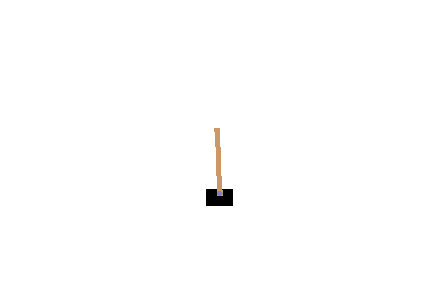
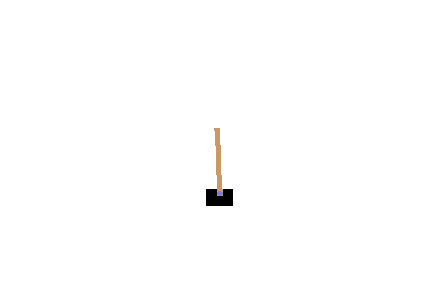
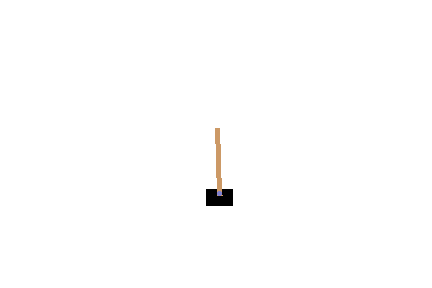
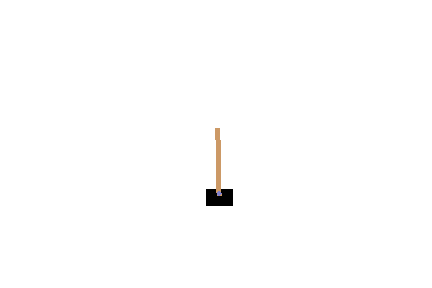
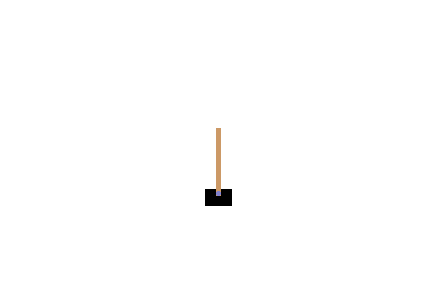
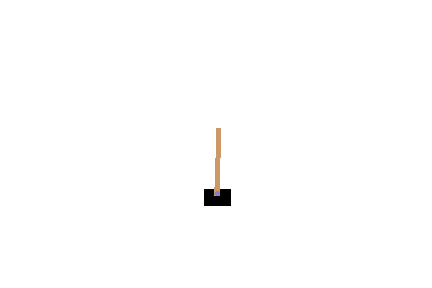
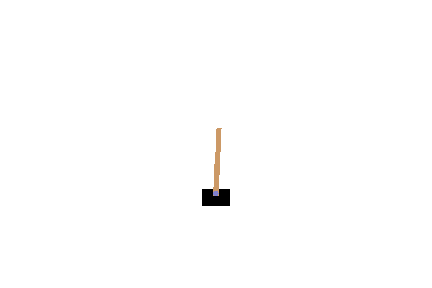
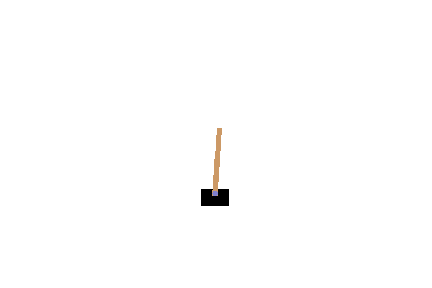
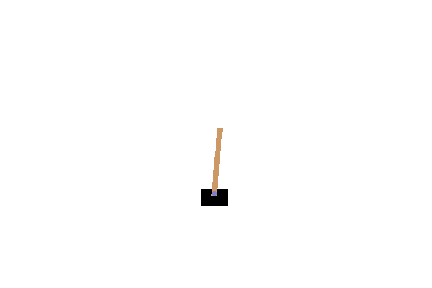
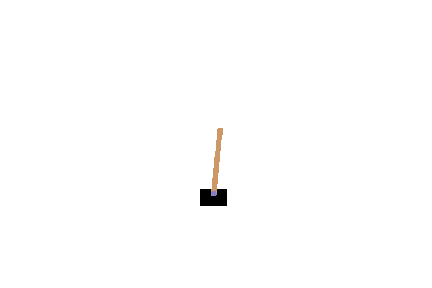
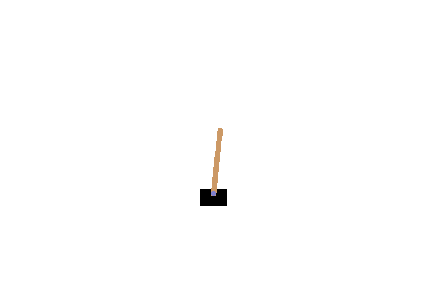
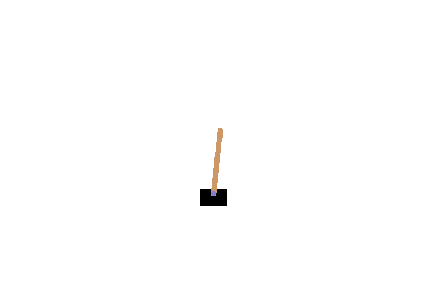
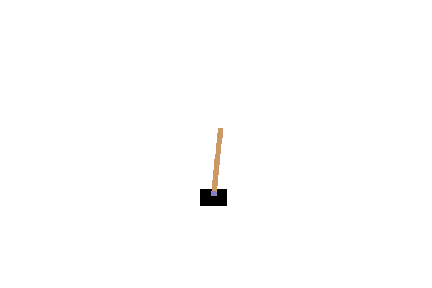
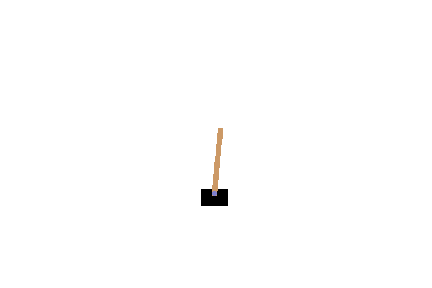
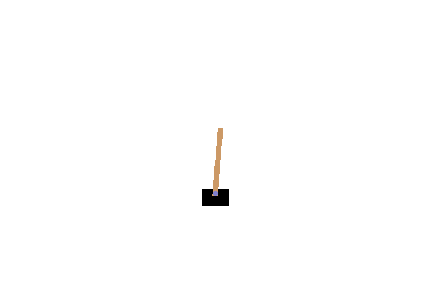
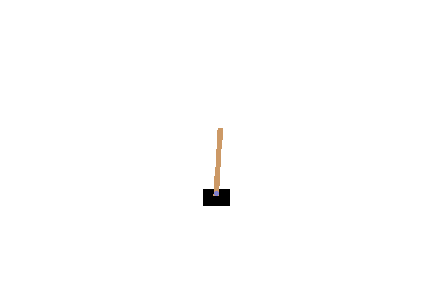
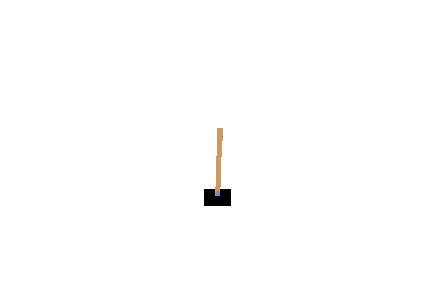
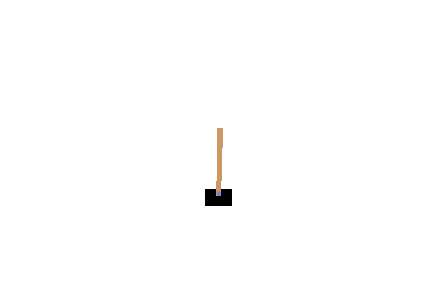
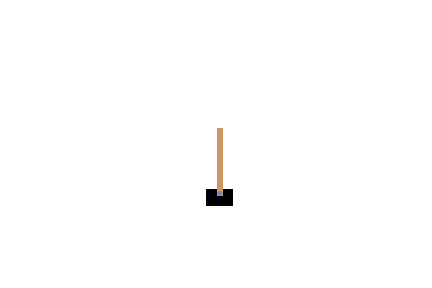
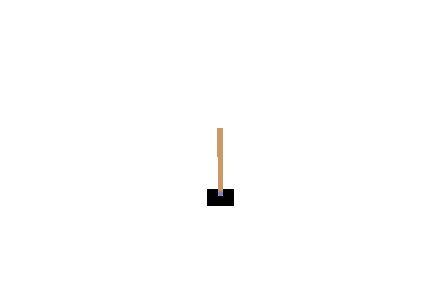
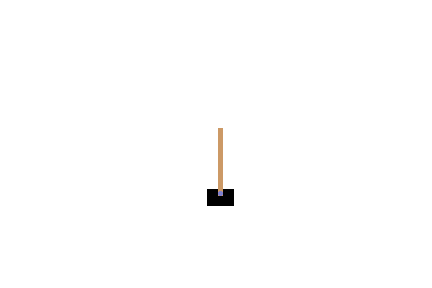
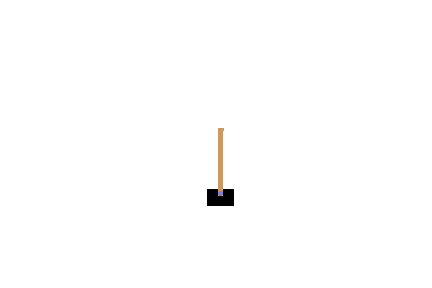
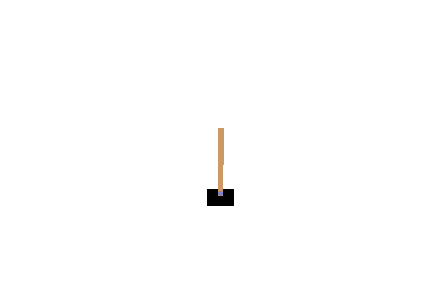
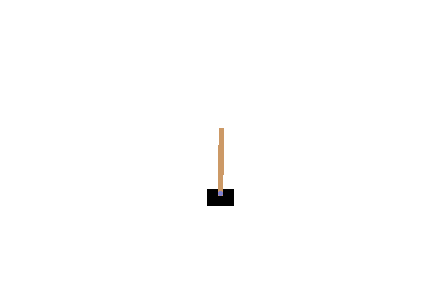
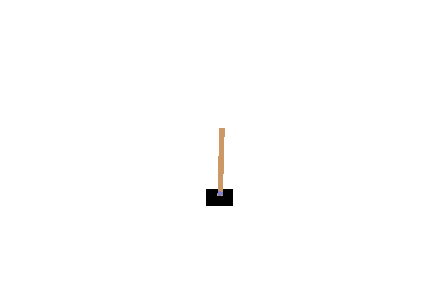
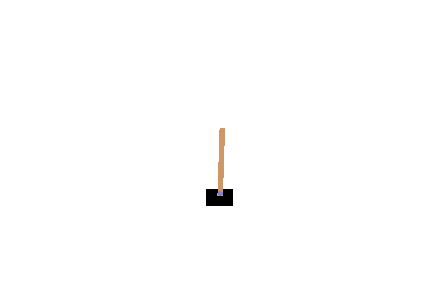
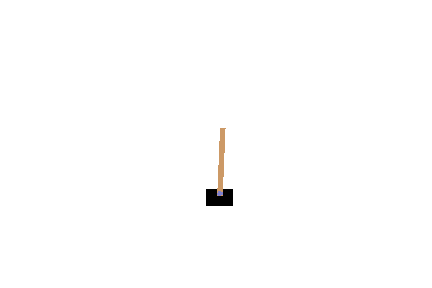
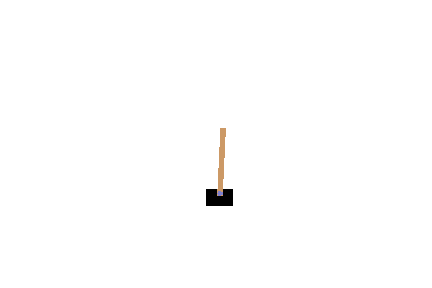
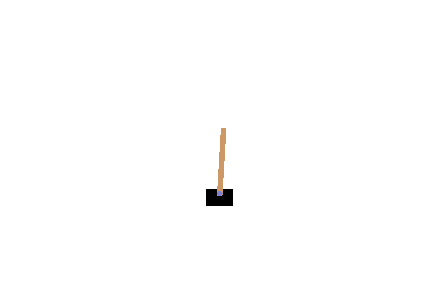
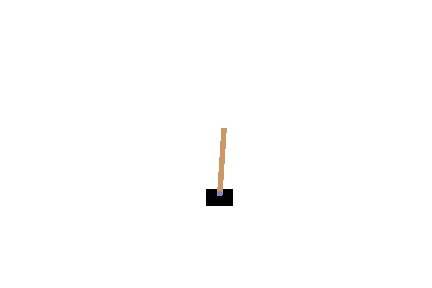
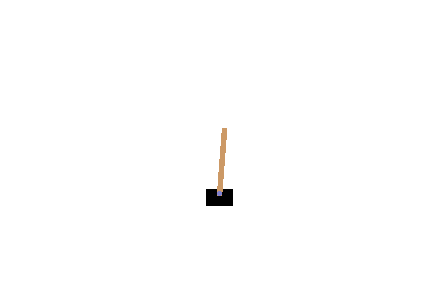
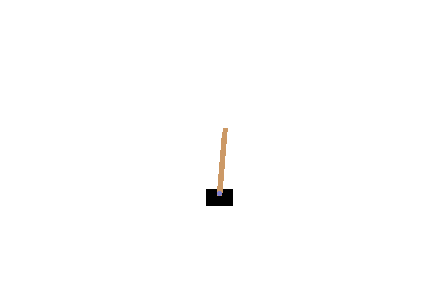
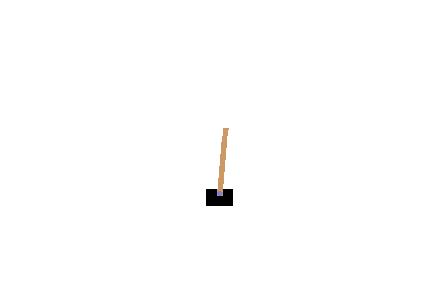
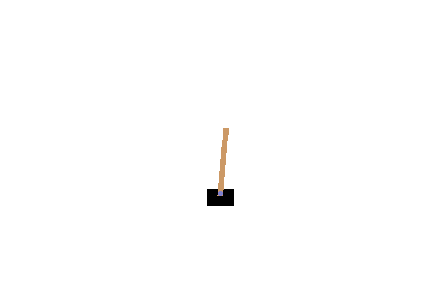
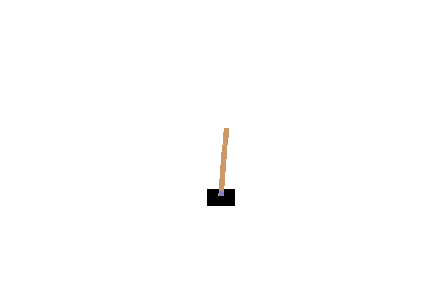
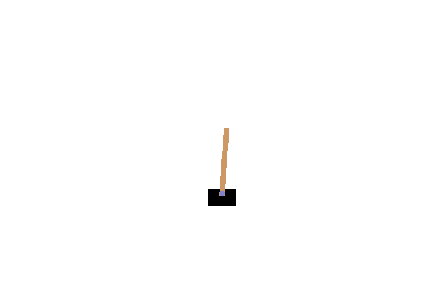
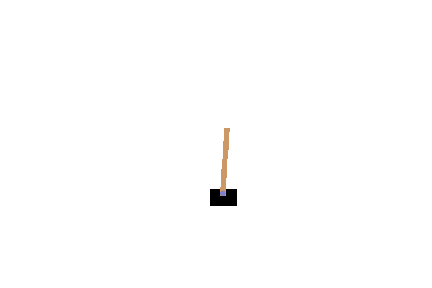
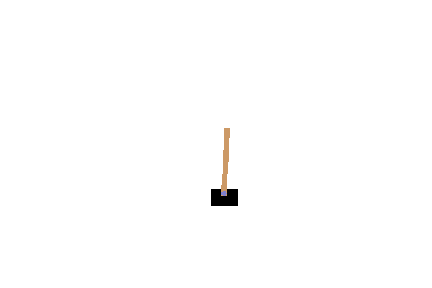
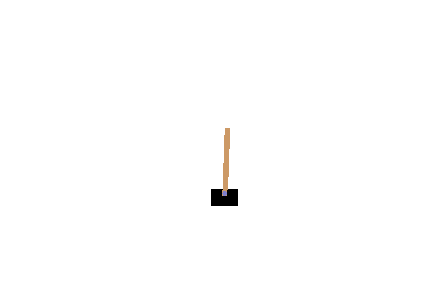
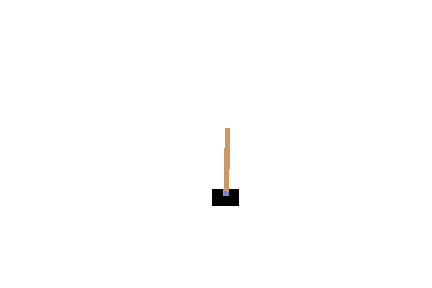
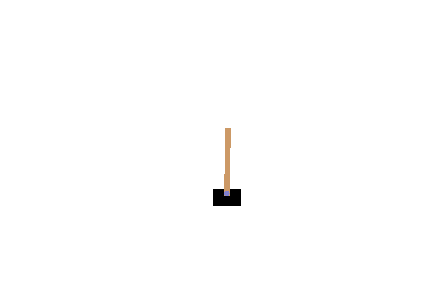
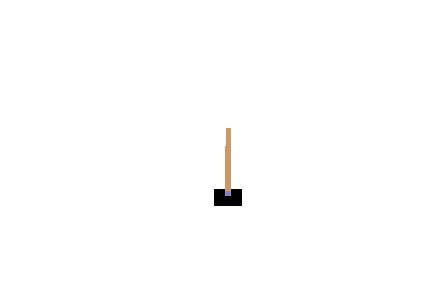
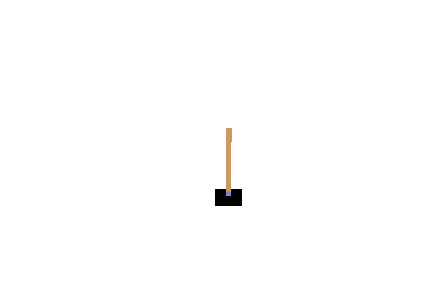
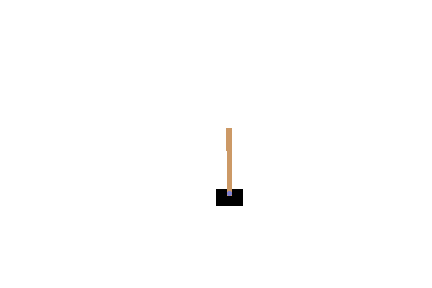
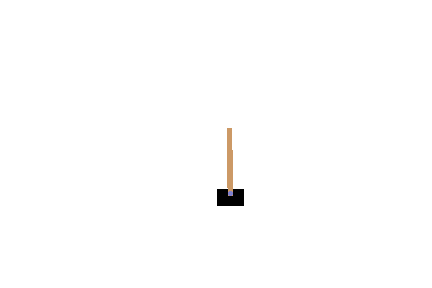
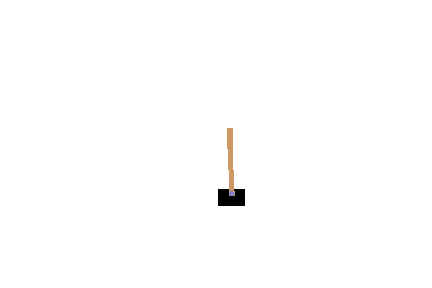
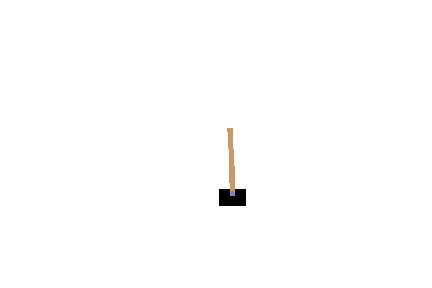
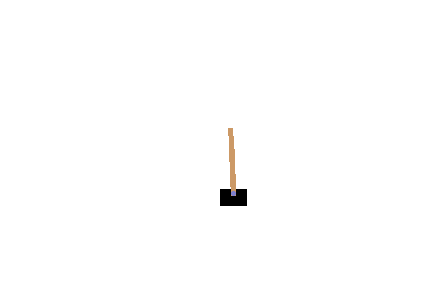
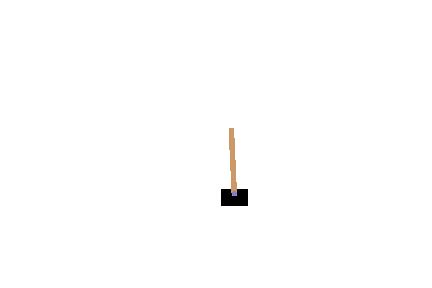
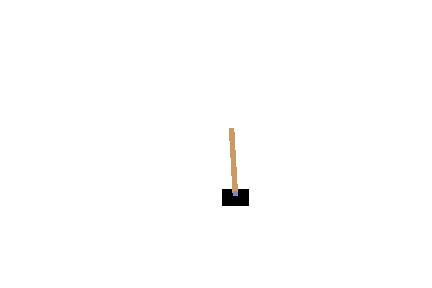
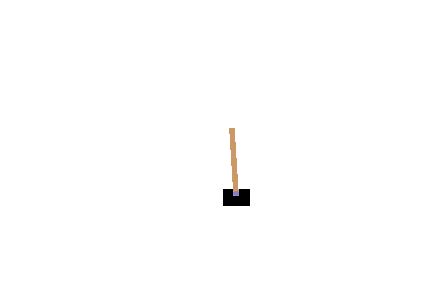
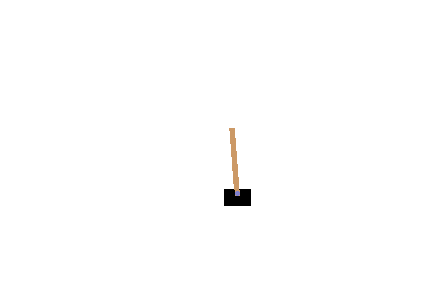
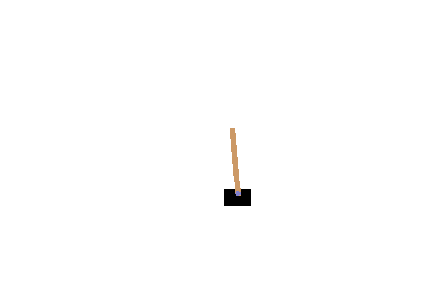
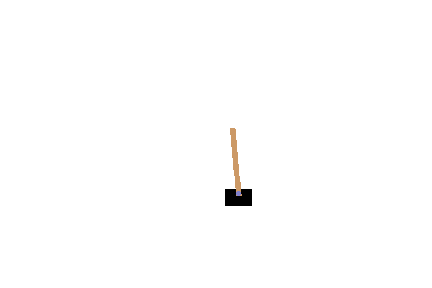
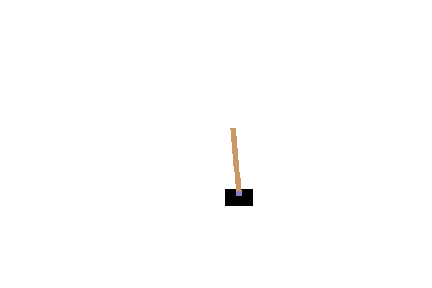
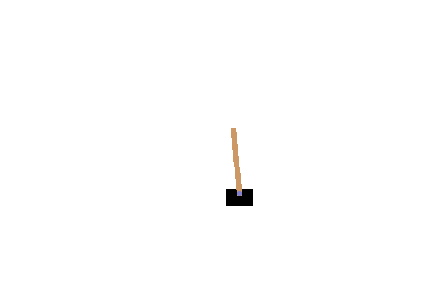
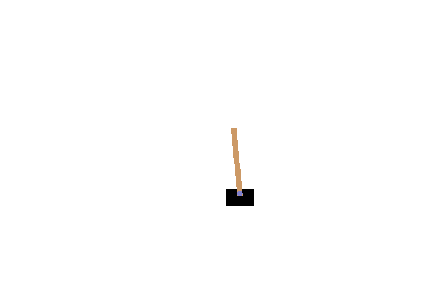
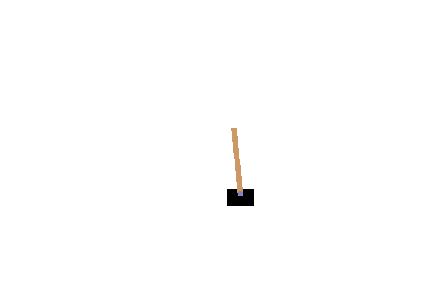
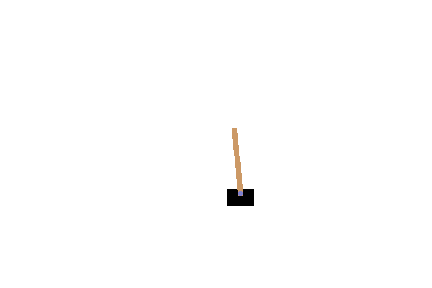
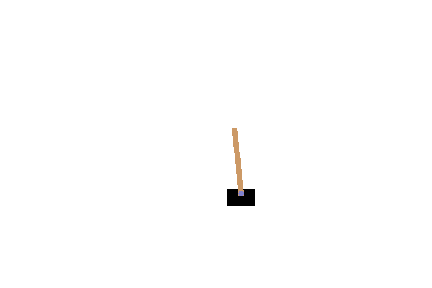
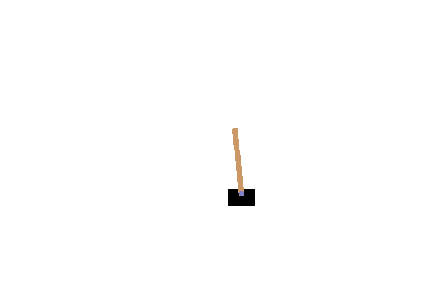
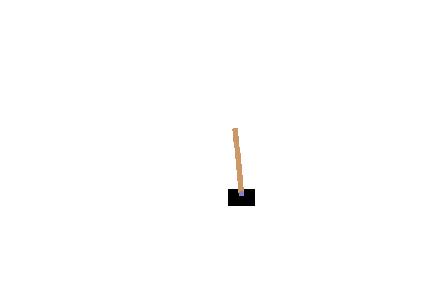
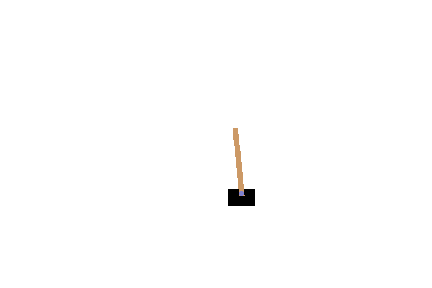
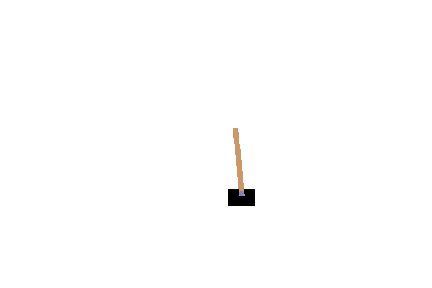
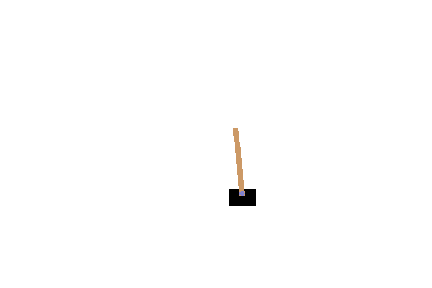
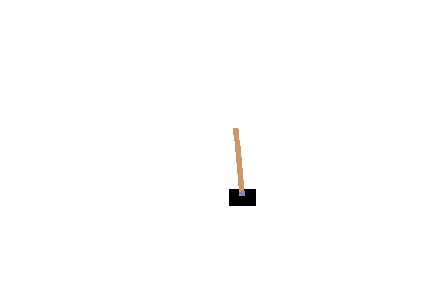
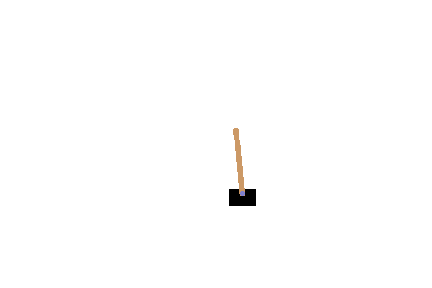
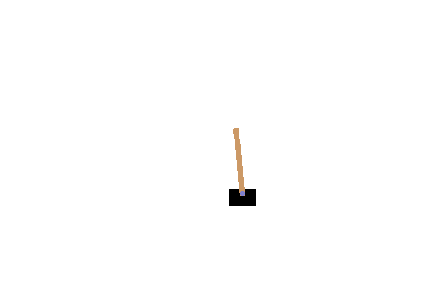
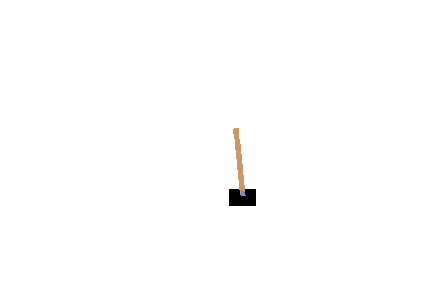
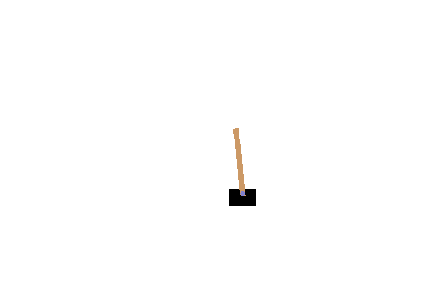
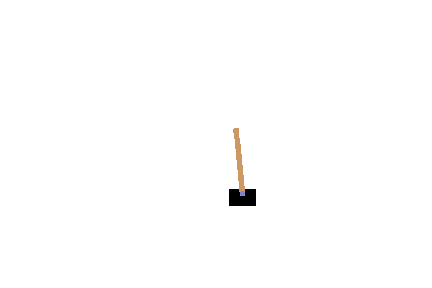
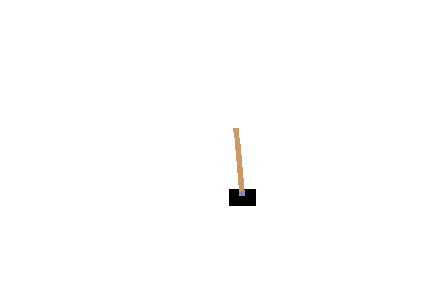
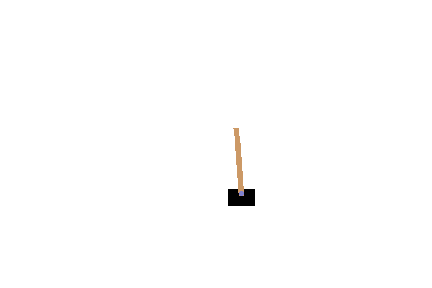
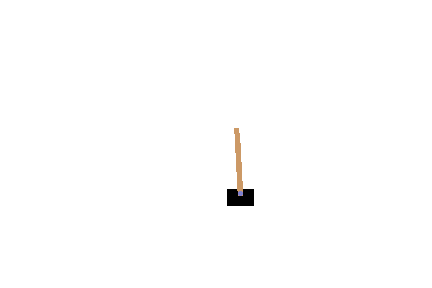
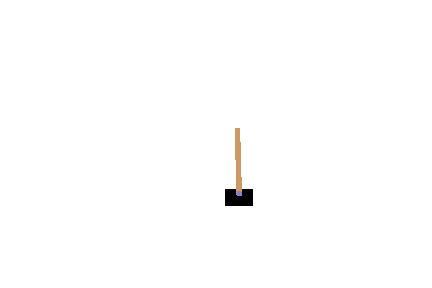
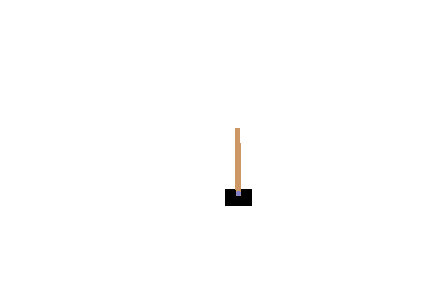
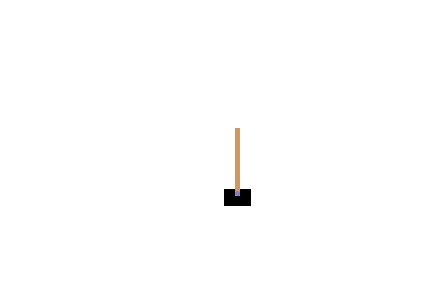
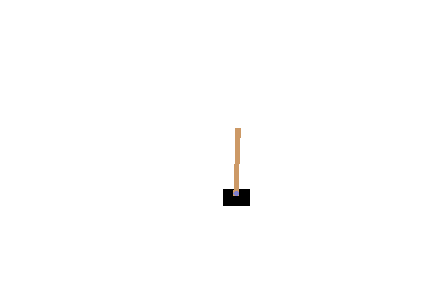
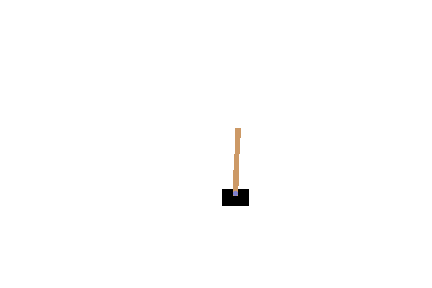
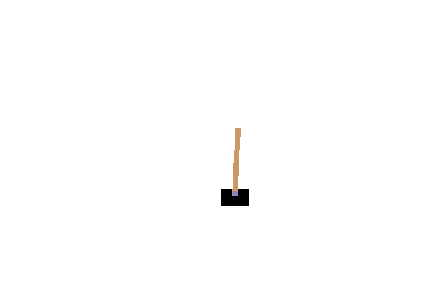
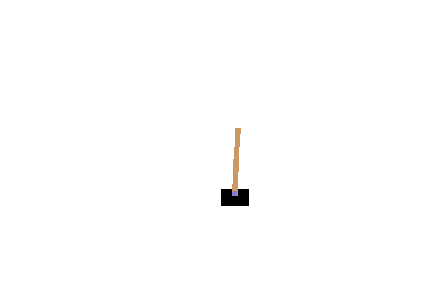
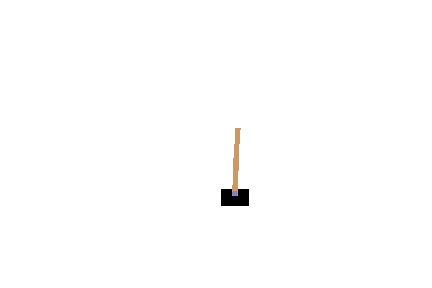
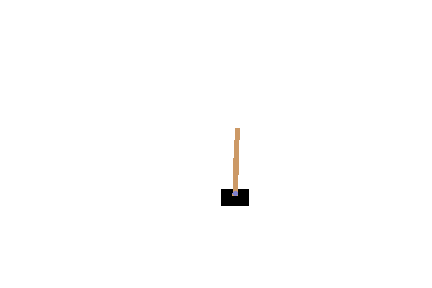
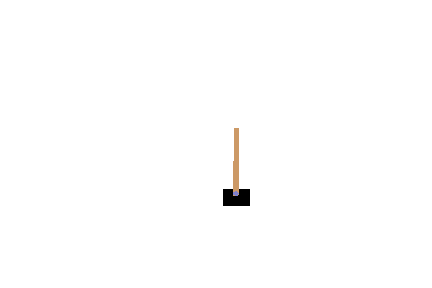
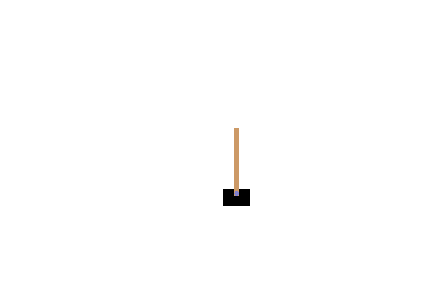
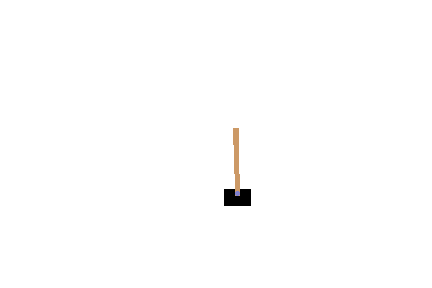
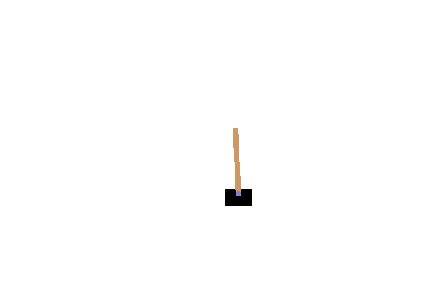
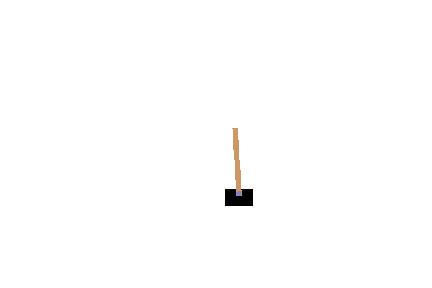
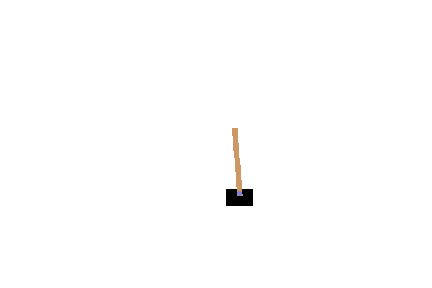
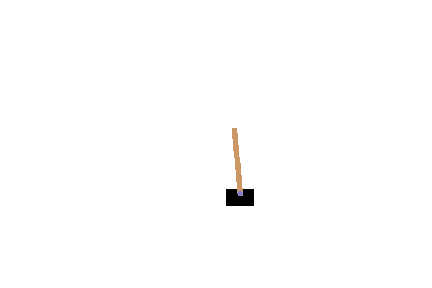
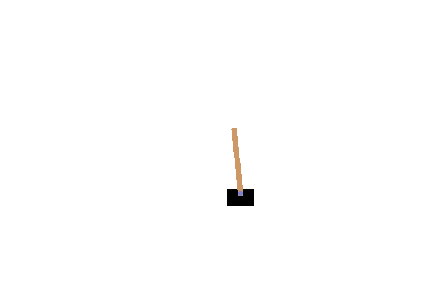
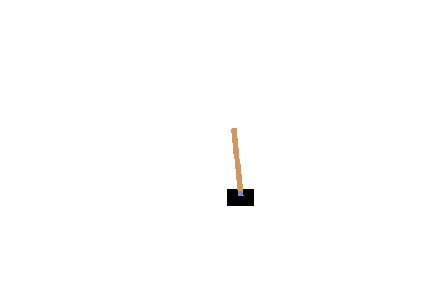
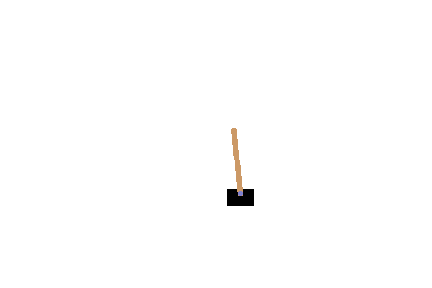
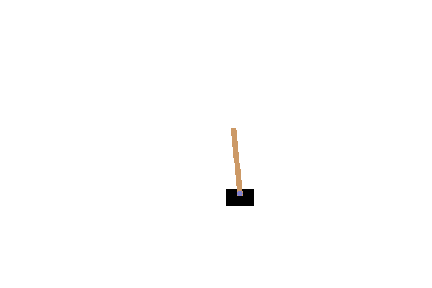
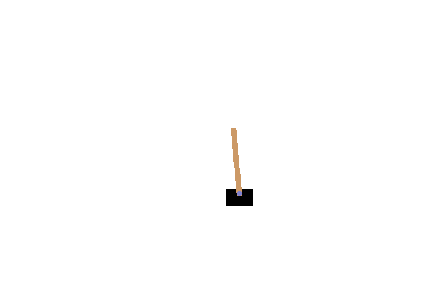
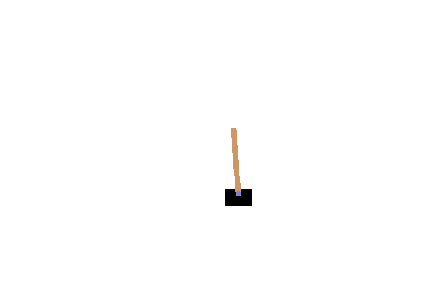
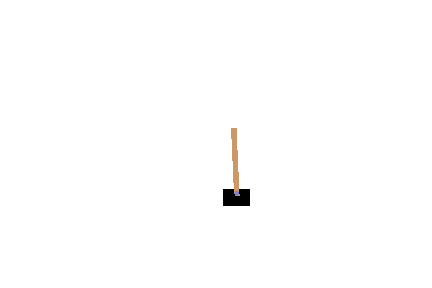
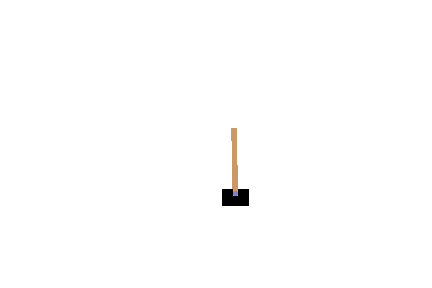
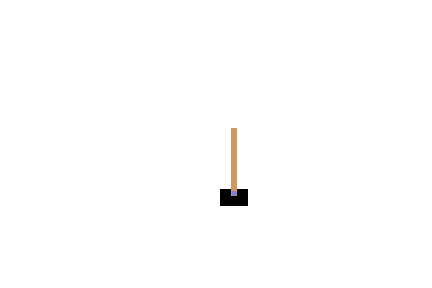
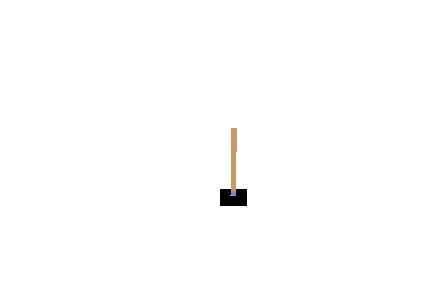
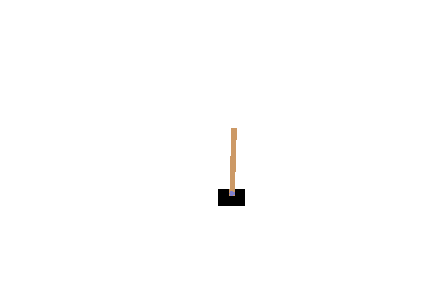
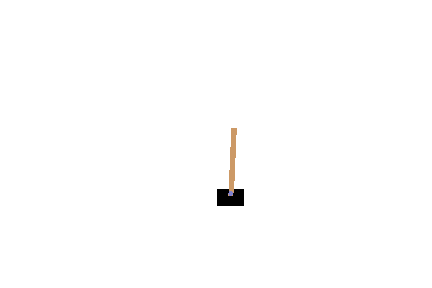
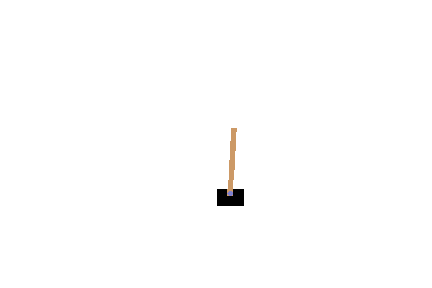
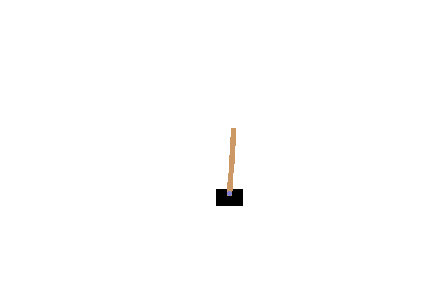
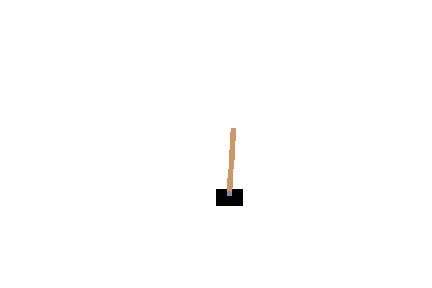
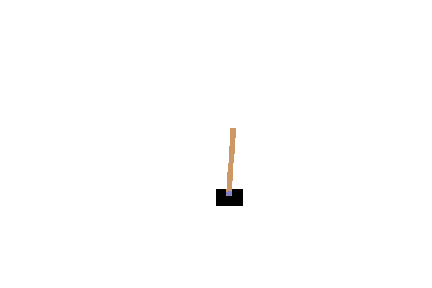
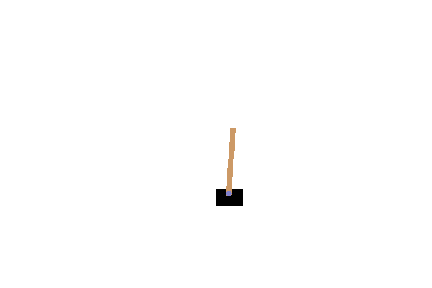
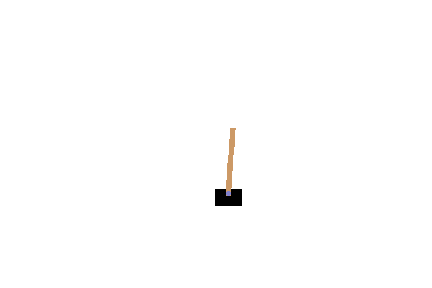
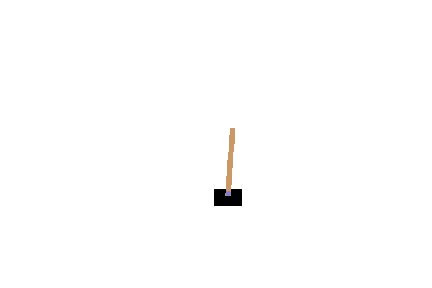
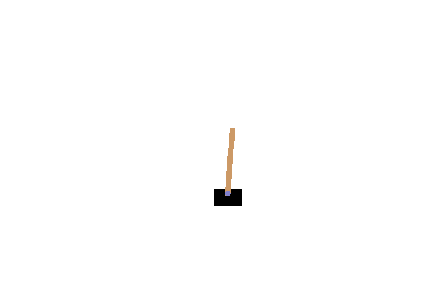
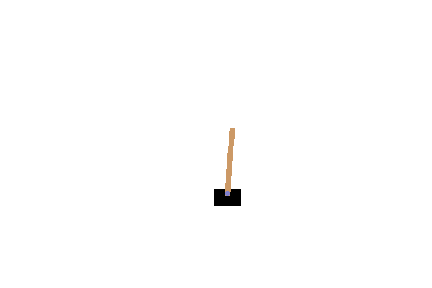
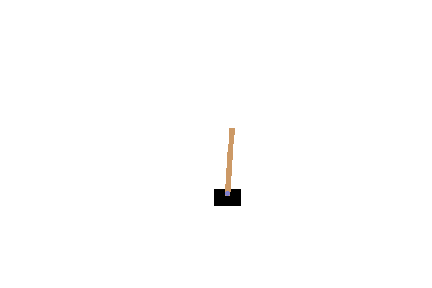
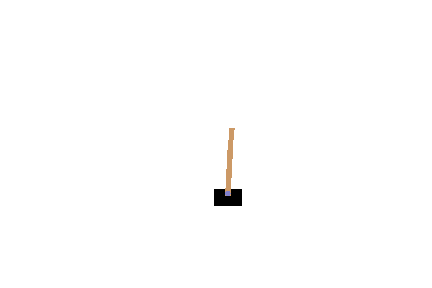
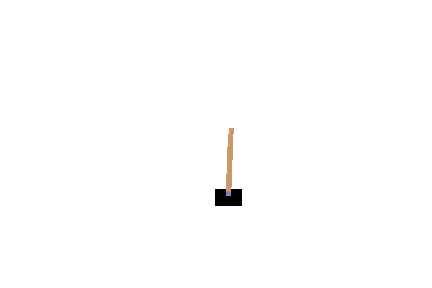
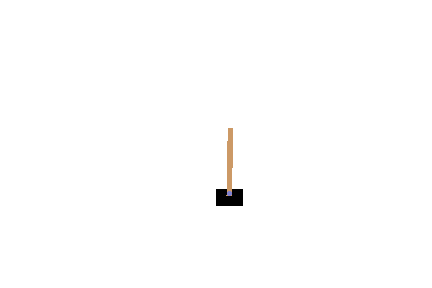
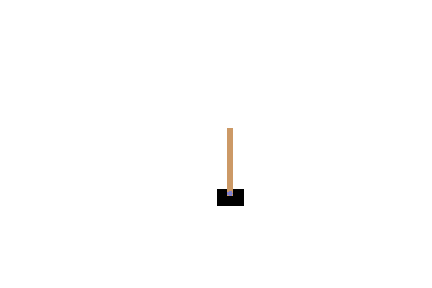
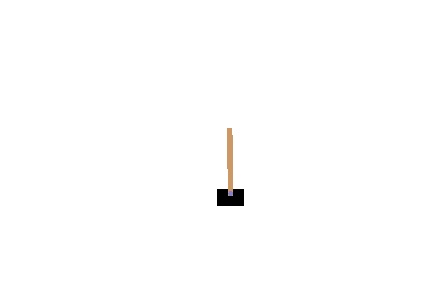
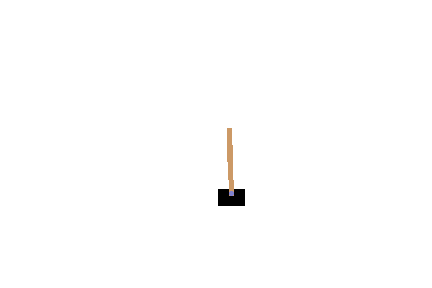
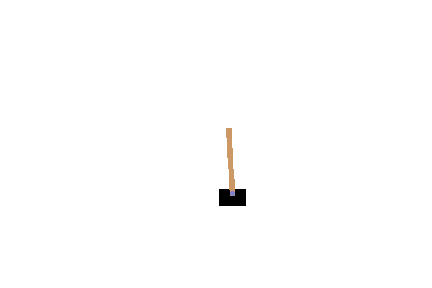
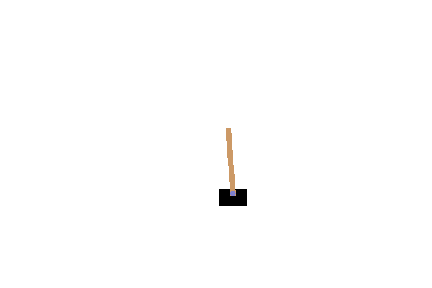
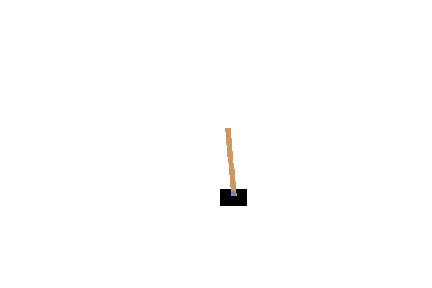
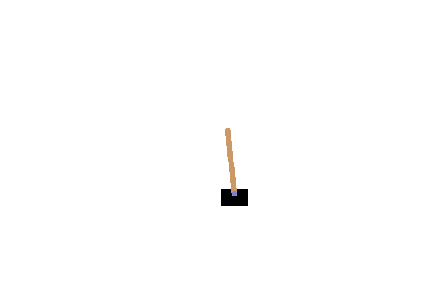
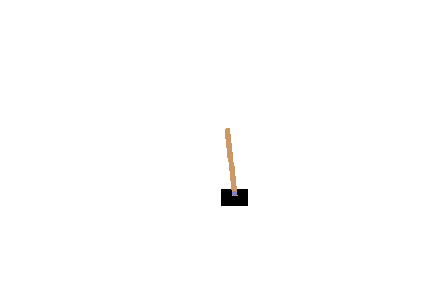
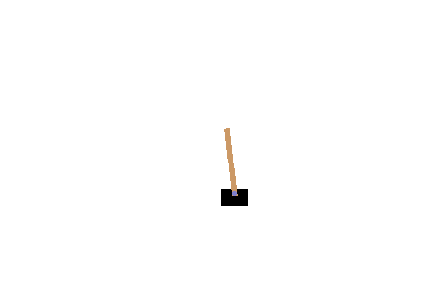
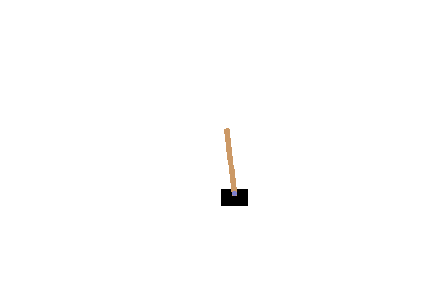
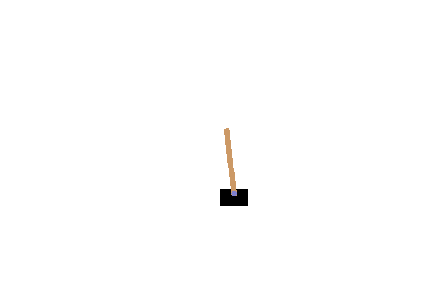
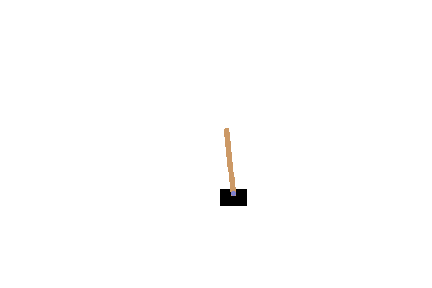
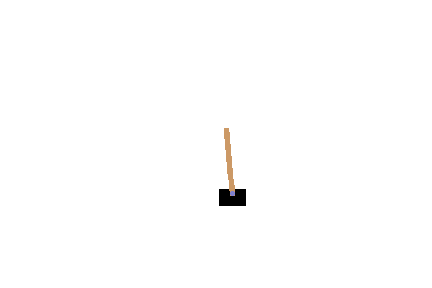
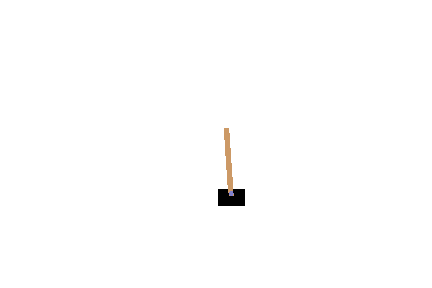
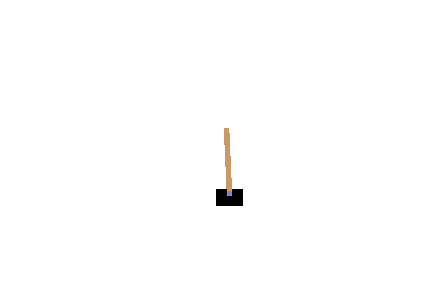
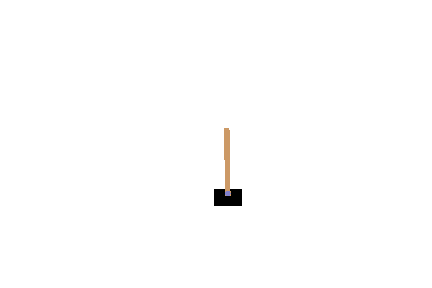
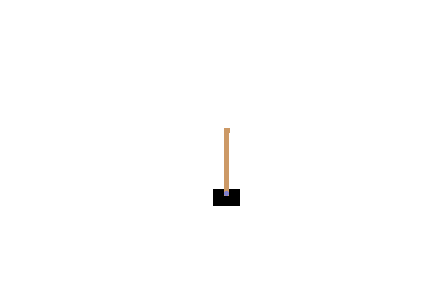
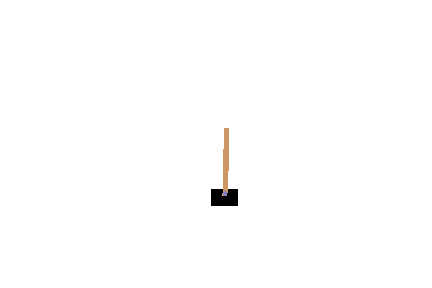
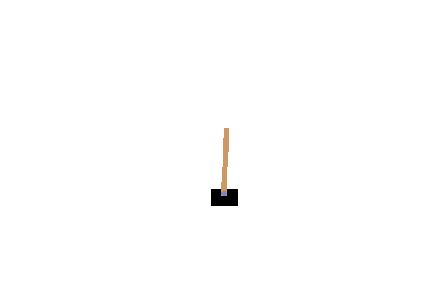
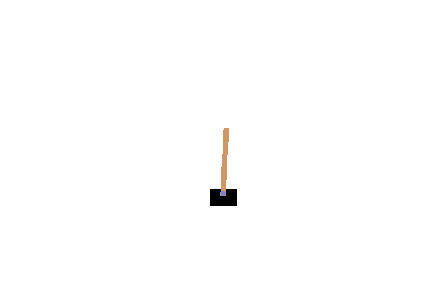
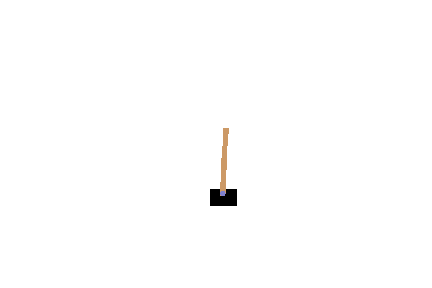
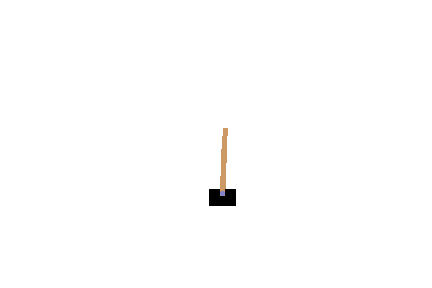
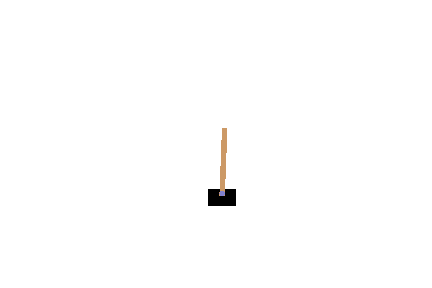
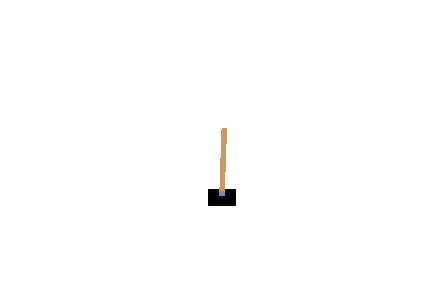
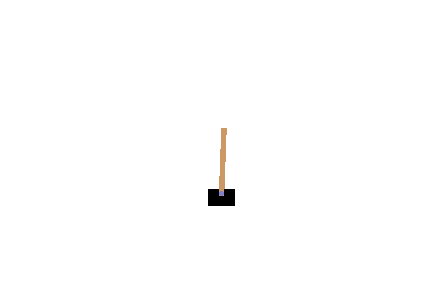
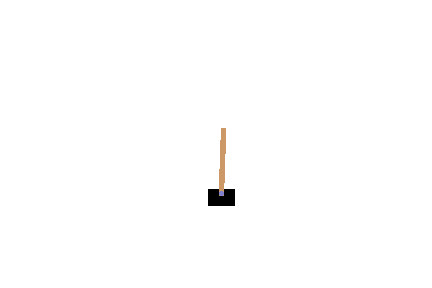
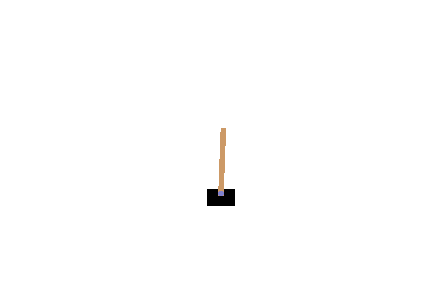
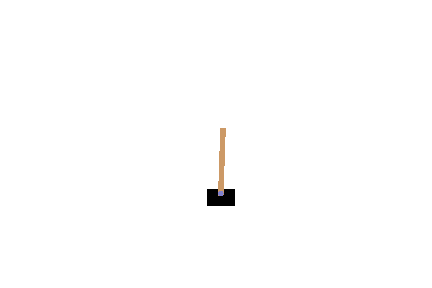
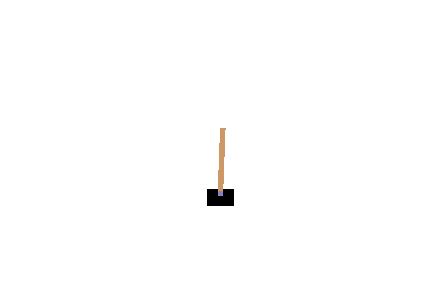
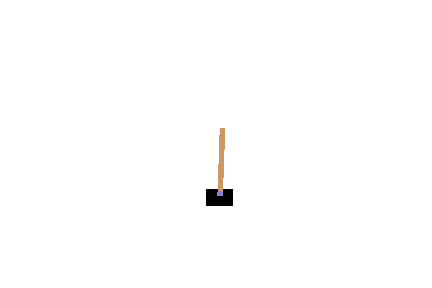
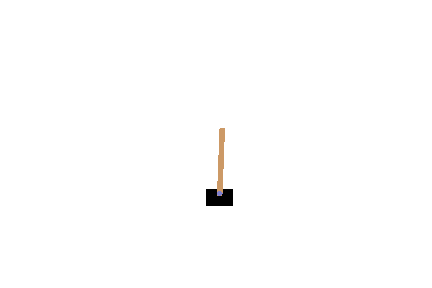
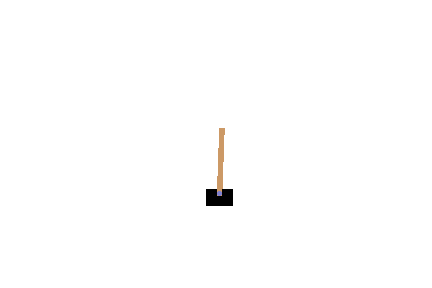
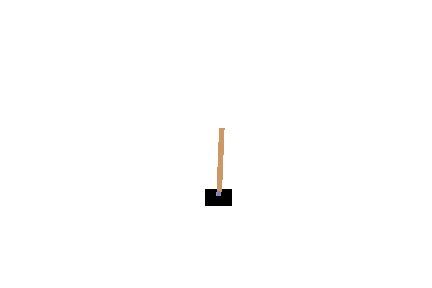
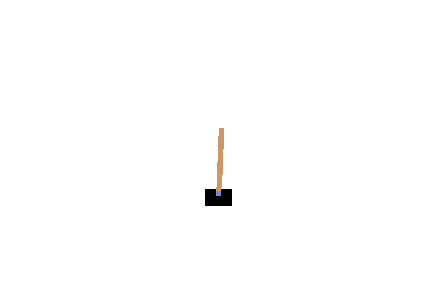
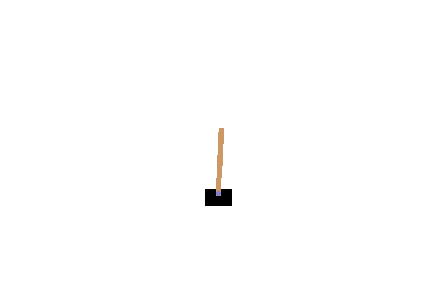
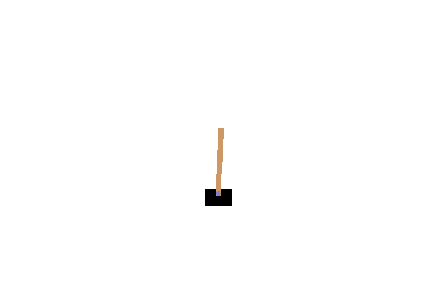
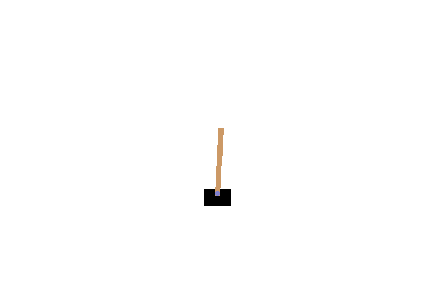
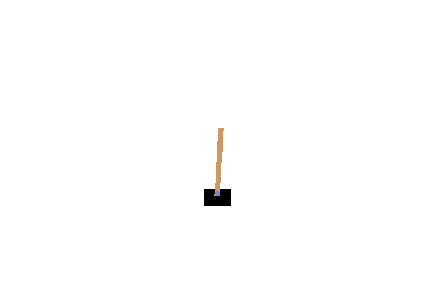
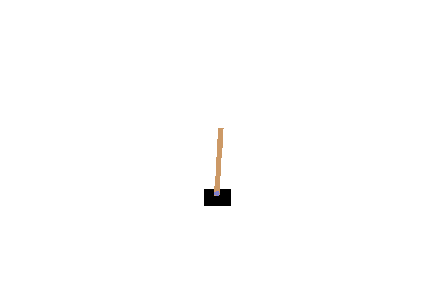
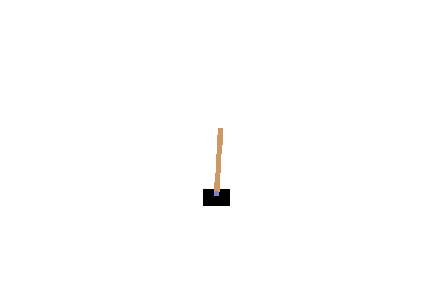
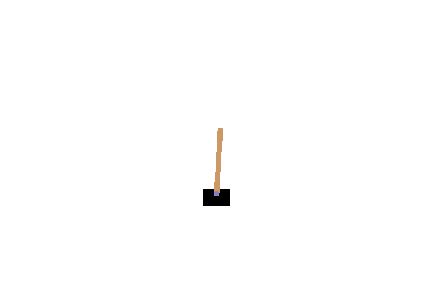
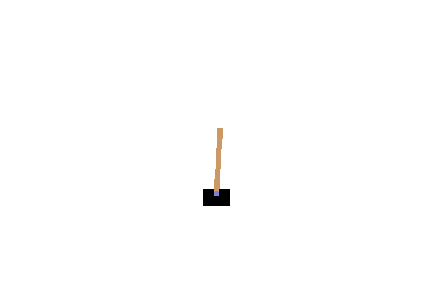
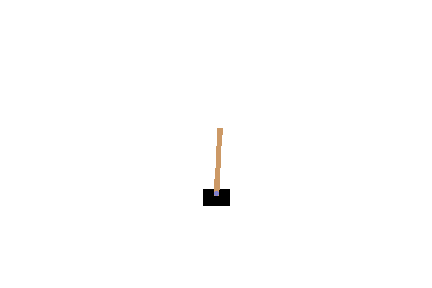
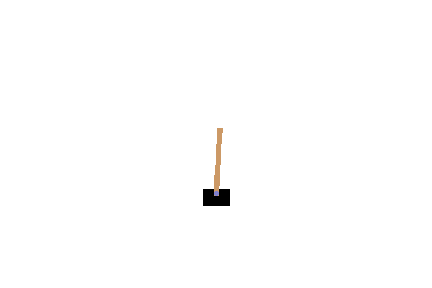
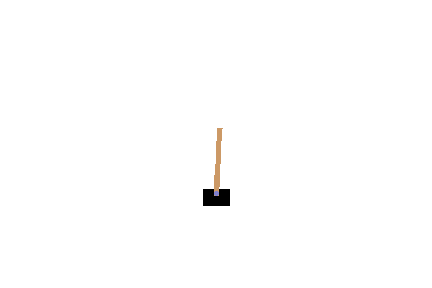
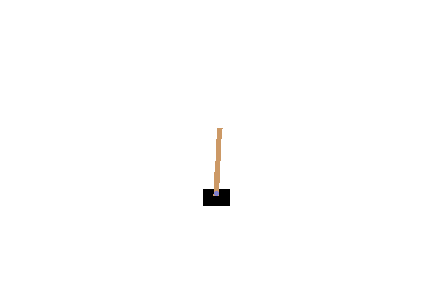
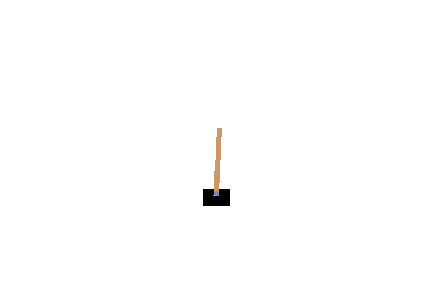
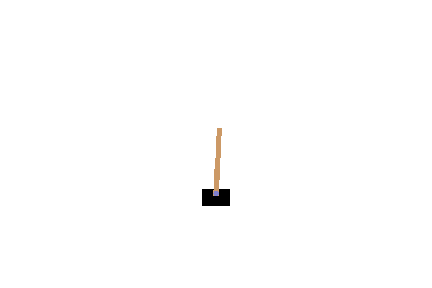
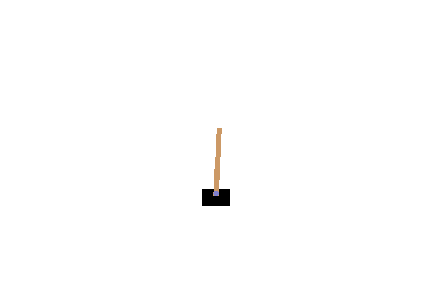
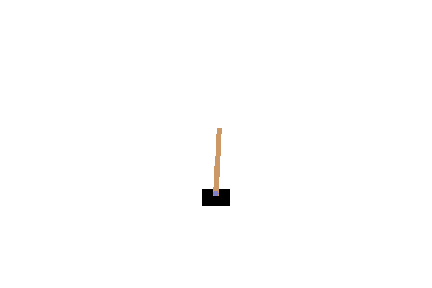
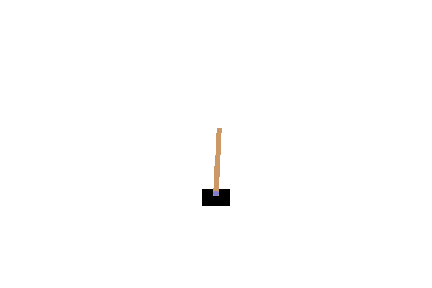
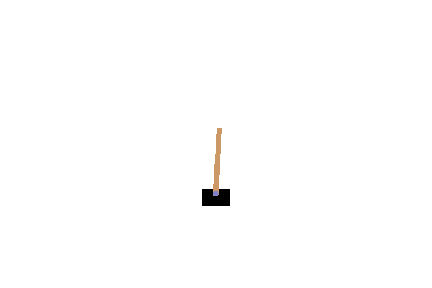
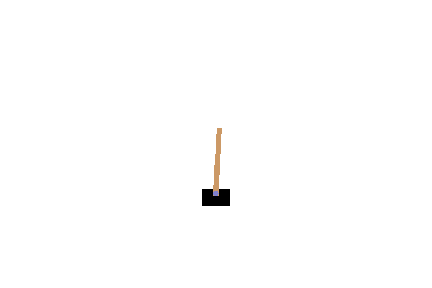
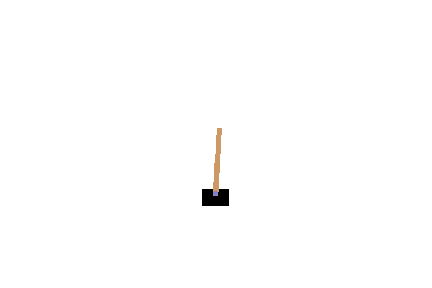
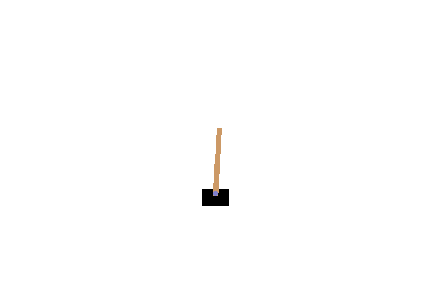
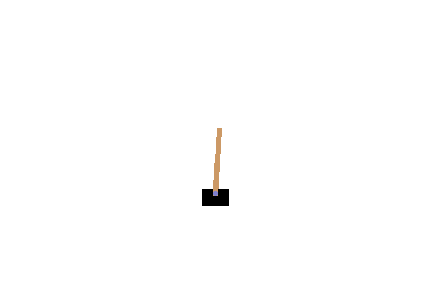
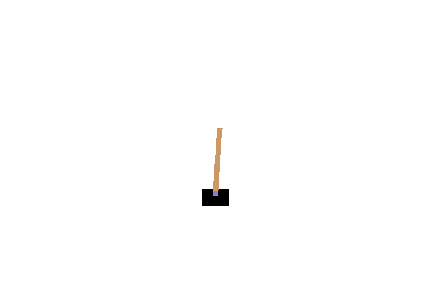
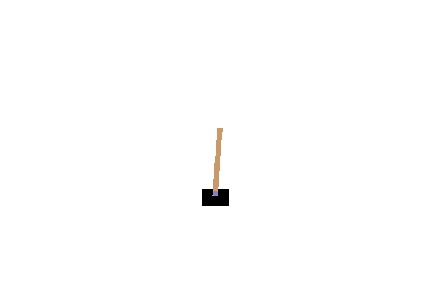
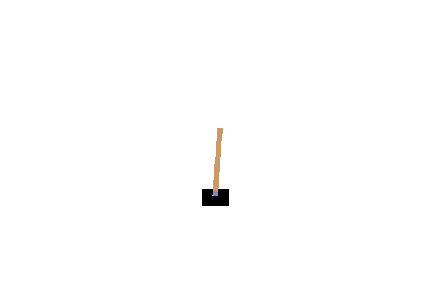
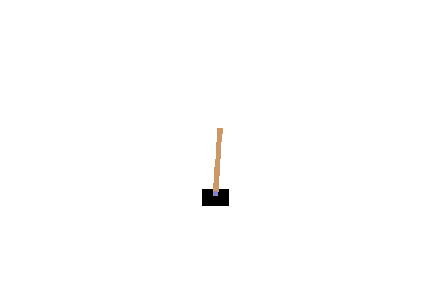
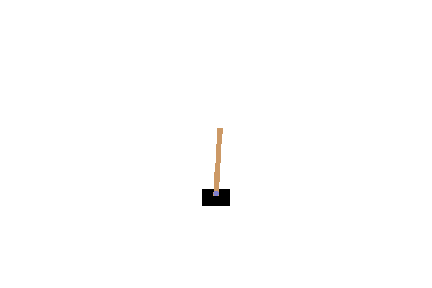
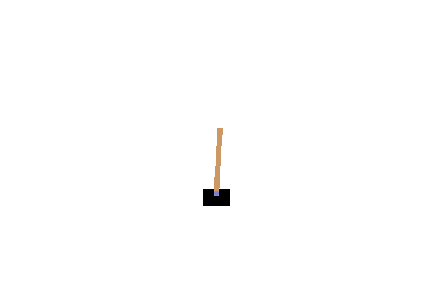
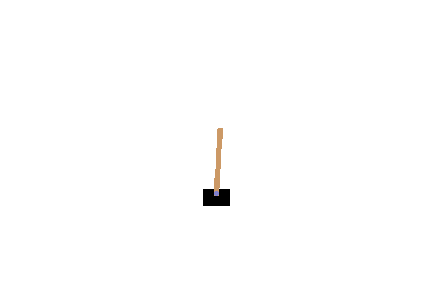
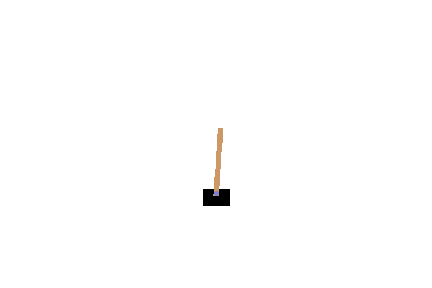
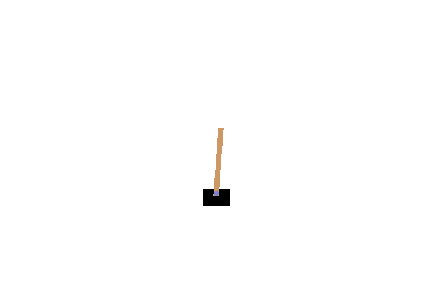
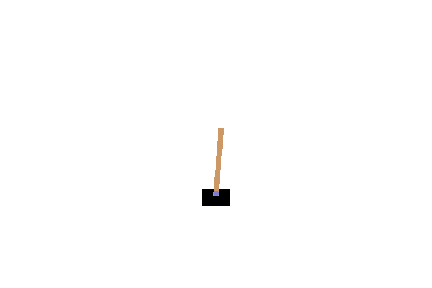
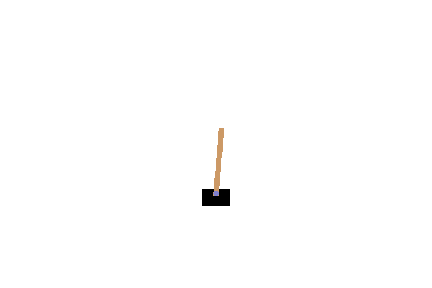
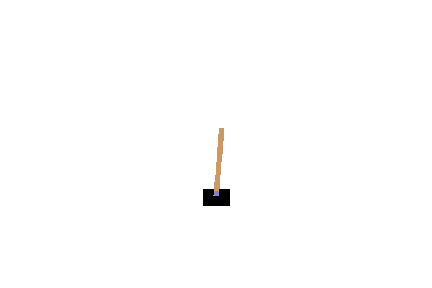
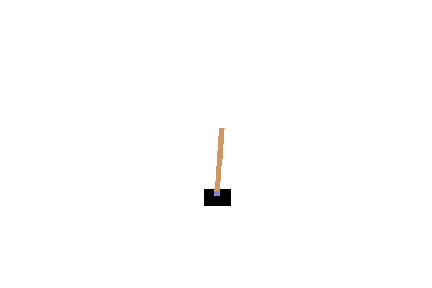
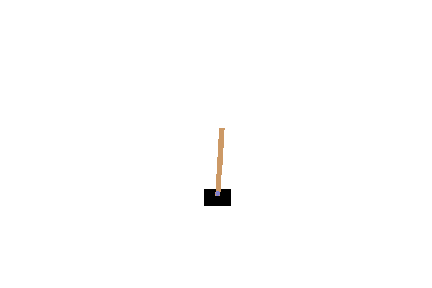
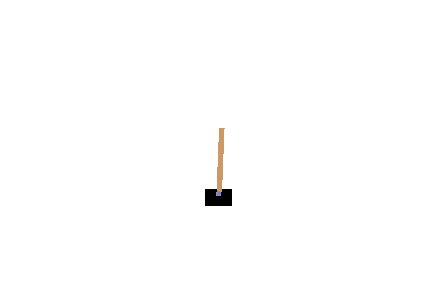
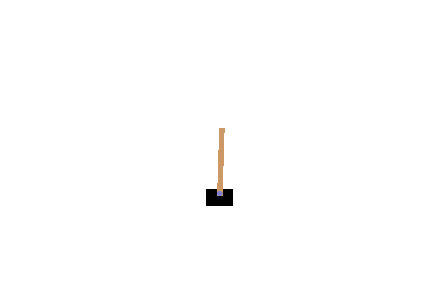
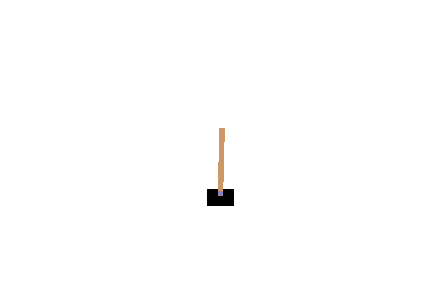
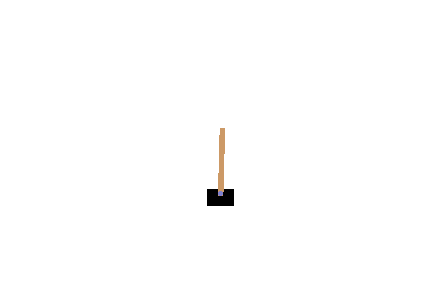
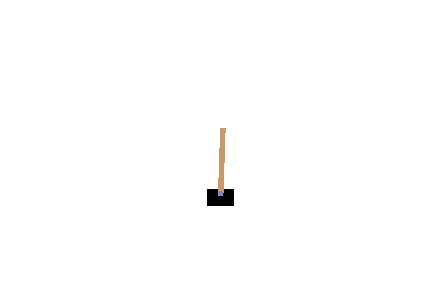
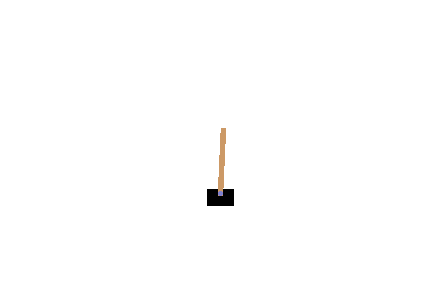
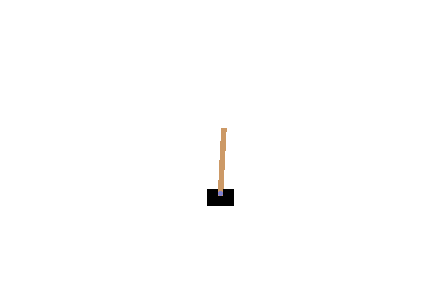
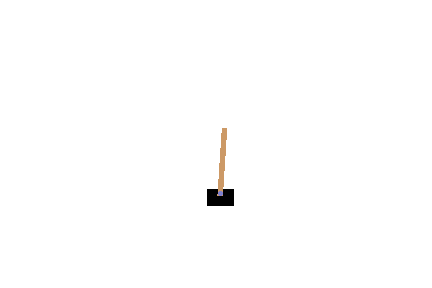
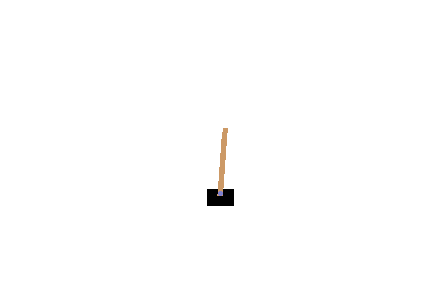
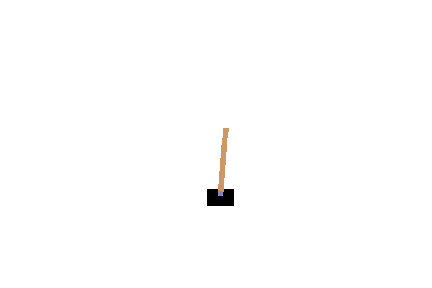
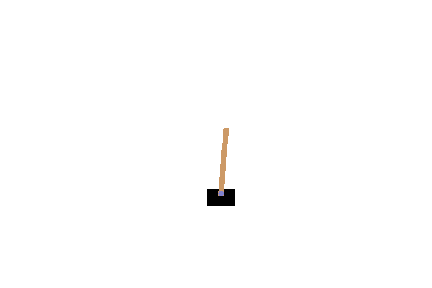
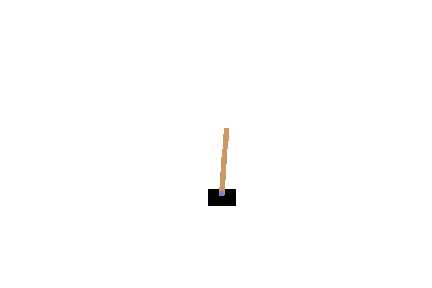
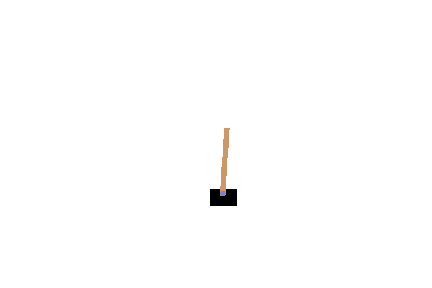
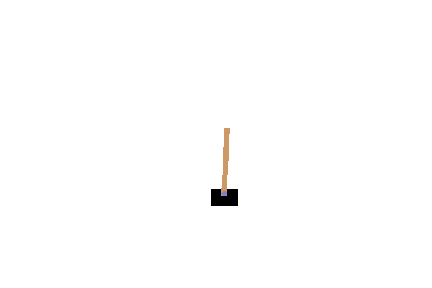
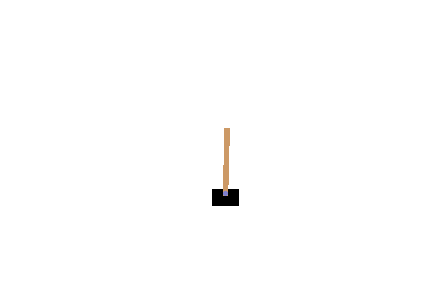

In [15]:
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    state_number = transform(observation)
    action = np.argmax(Q_table[state_number])
    observation, reward, done, info = env.step(action)
    if done:
        print 'Number of step: ', t
        break
env.render(close=True)
helper.display_frames_as_gif(frames)  #<<< This one for Jupyter Notebook Display

# Can you see the difference?

It should be noticed that many entries in the table is 0, this is because we focused on the greedy policy (exploitation) but not on exploration.